# Statistical Formulas Reference Guide

**Author:** Md Ayan Alam  
**Roll Number:** GF202342645  
**Course:** Statistical Foundation of Data Science

This comprehensive reference guide contains essential statistical formulas organized by topic, with mathematical definitions, Python implementations, and practical examples.

---

## Table of Contents

1. **Descriptive Statistics**
   - Measures of Central Tendency
   - Measures of Dispersion
   - Distribution Shape and Outliers

2. **Probability Distributions** 
   - Normal Distribution
   - Student's t-Distribution
   - Chi-Square Distribution
   - F-Distribution

3. **Hypothesis Testing**
   - One-Sample and Two-Sample Tests
   - Paired t-Tests
   - Chi-Square Tests
   - Power Analysis

4. **Regression Analysis**
   - Simple Linear Regression
   - Multiple Linear Regression
   - Model Diagnostics

5. **Linear Algebra for Statistics**
   - Matrix Operations
   - Eigenvalues and Eigenvectors
   - Advanced Decompositions (SVD, QR, Cholesky)
   - Quadratic Forms and Matrix Calculus

6. **Bayesian Statistics**
   - Bayes' Theorem
   - Conjugate Priors
   - Credible Intervals
   - Bayesian Inference

7. **Time Series Analysis**
   - AR, MA, and ARIMA Models
   - Autocorrelation Functions
   - Spectral Analysis
   - Seasonal Decomposition

8. **Multivariate Statistics**
   - Multivariate Normal Distribution
   - Hotelling's T² Test
   - MANOVA
   - Discriminant Analysis
   - Factor Analysis
   - Canonical Correlation

9. **Analysis of Variance (ANOVA)**
   - One-Way and Two-Way ANOVA
   - Effect Sizes and Multiple Comparisons
   - Repeated Measures ANOVA
   - ANCOVA

10. **Advanced Statistical Methods**
    - Bootstrap Methods
    - Permutation Tests
    - Cross-Validation
    - Information Criteria
    - Robust Statistics
    - Regularization Methods

---

In [12]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t, chi2, f
import sympy as sp
from sympy import symbols, sqrt, pi, exp, log, factorial, summation
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print("Ready for statistical formula demonstrations")

Libraries imported successfully!
Ready for statistical formula demonstrations


## 1. Descriptive Statistics

### 1.1 Measures of Central Tendency

#### Arithmetic Mean
The arithmetic mean is the sum of all values divided by the number of observations.

**Formula:**
$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Where:
- $\bar{x}$ = sample mean
- $n$ = sample size
- $x_i$ = individual observations

#### Weighted Mean
When observations have different weights or importance.

**Formula:**
$$\bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$

Where:
- $w_i$ = weight for observation $i$

#### Median
The middle value when data is ordered from smallest to largest.

**Formula:**
- If $n$ is odd: $\text{Median} = x_{(n+1)/2}$
- If $n$ is even: $\text{Median} = \frac{x_{n/2} + x_{(n/2)+1}}{2}$

#### Mode
The most frequently occurring value in the dataset.

Central Tendency Measures:
Arithmetic Mean: 48.442
Weighted Mean: 49.058
Median: 48.096
Difference (Weighted - Simple): 0.616


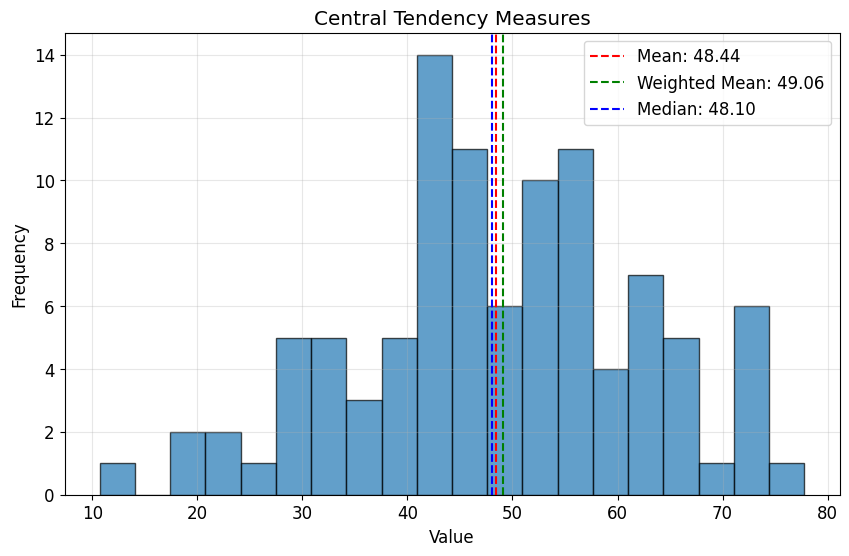

In [13]:
# Demonstration of Central Tendency Measures
np.random.seed(42)
data = np.random.normal(50, 15, 100)
weights = np.random.uniform(0.5, 2.0, 100)

# Calculate measures
mean_val = np.mean(data)
weighted_mean_val = np.average(data, weights=weights)
median_val = np.median(data)

print("Central Tendency Measures:")
print(f"Arithmetic Mean: {mean_val:.3f}")
print(f"Weighted Mean: {weighted_mean_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"Difference (Weighted - Simple): {weighted_mean_val - mean_val:.3f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(weighted_mean_val, color='green', linestyle='--', label=f'Weighted Mean: {weighted_mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Central Tendency Measures')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.2 Alternative Measures of Central Tendency

#### Geometric Mean
Used for rates, ratios, and percentages. Appropriate for data that grows exponentially.

**Formula:**
$$G = \sqrt[n]{\prod_{i=1}^{n} x_i} = \left(\prod_{i=1}^{n} x_i\right)^{1/n}$$

**Log form (more stable computationally):**
$$\log G = \frac{1}{n} \sum_{i=1}^{n} \log x_i$$

#### Harmonic Mean
Used for rates and ratios where the reciprocal is meaningful (e.g., speeds, rates).

**Formula:**
$$H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$$

#### Quadratic Mean (Root Mean Square)
Useful for measuring magnitude, especially in physics and engineering.

**Formula:**
$$\text{RMS} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2}$$

#### Trimmed Mean
Mean calculated after removing a percentage of extreme values.

**Formula (α-trimmed mean):**
$$\bar{x}_{\text{trim}} = \frac{1}{n - 2k} \sum_{i=k+1}^{n-k} x_{(i)}$$

Where $k = \lfloor \alpha n \rfloor$ and $x_{(i)}$ are order statistics.

### 1.3 Measures of Dispersion

#### Variance
Measures the average squared deviation from the mean.

**Population Variance:**
$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$

**Sample Variance (Bessel's correction):**
$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

#### Standard Deviation
The square root of variance, in the same units as the original data.

**Population Standard Deviation:**
$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

**Sample Standard Deviation:**
$$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

#### Range
$$\text{Range} = \max(x) - \min(x)$$

#### Interquartile Range (IQR)
$$\text{IQR} = Q_3 - Q_1$$

Where $Q_1$ is the 25th percentile and $Q_3$ is the 75th percentile.

#### Coefficient of Variation
Relative measure of variability.

$$CV = \frac{s}{\bar{x}} \times 100\%$$

#### Mean Absolute Deviation (MAD)
Average absolute deviation from the mean.

$$\text{MAD} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}|$$

#### Median Absolute Deviation
Robust measure of spread.

$$\text{MAD}_{\text{median}} = \text{median}(|x_i - \text{median}(x)|)$$

**Normalized MAD (for normal distribution):**
$$\text{MAD}_{\text{norm}} = 1.4826 \times \text{MAD}_{\text{median}}$$

### 1.4 Quantiles and Percentiles

#### General Quantile Formula
For the $p$-th quantile where $0 < p < 1$:

**Method 1 (Linear interpolation):**
$$Q_p = x_{(k)} + (x_{(k+1)} - x_{(k)}) \times f$$

Where:
- $h = (n-1)p + 1$
- $k = \lfloor h \rfloor$
- $f = h - k$

#### Five-Number Summary
- Minimum: $x_{(1)}$
- First Quartile: $Q_1$ (25th percentile)
- Median: $Q_2$ (50th percentile)
- Third Quartile: $Q_3$ (75th percentile)
- Maximum: $x_{(n)}$

### 1.5 Robust Statistics

#### Winsorized Mean
Replace extreme values with less extreme values.

**Formula (α-Winsorization):**
$$\bar{x}_{\text{wins}} = \frac{1}{n} \left[ k \cdot x_{(k+1)} + \sum_{i=k+1}^{n-k} x_{(i)} + k \cdot x_{(n-k)} \right]$$

#### Huber M-estimator
Robust location estimator combining mean and median properties.

**Iterative formula:**
$$\mu_{k+1} = \mu_k + \frac{\sum_{i=1}^{n} \psi\left(\frac{x_i - \mu_k}{\sigma}\right)}{\sum_{i=1}^{n} \psi'\left(\frac{x_i - \mu_k}{\sigma}\right)}$$

Where $\psi(u)$ is the Huber function:
$$\psi(u) = \begin{cases}
u & \text{if } |u| \leq c \\
c \cdot \text{sign}(u) & \text{if } |u| > c
\end{cases}$$

### 1.6 Moments and Shape Statistics

#### Raw Moments
$$m_r = \frac{1}{n} \sum_{i=1}^{n} x_i^r$$

#### Central Moments
$$\mu_r = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^r$$

#### Skewness (Third standardized moment)
$$\text{Skew} = \frac{\mu_3}{\sigma^3} = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}{\left[\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2\right]^{3/2}}$$

**Sample skewness (bias-corrected):**
$$g_1 = \frac{\sqrt{n(n-1)}}{n-2} \cdot \frac{\mu_3}{\sigma^3}$$

#### Kurtosis (Fourth standardized moment)
$$\text{Kurt} = \frac{\mu_4}{\sigma^4} - 3$$

**Sample kurtosis (bias-corrected):**
$$g_2 = \frac{(n-1)[(n+1)\text{Kurt} + 6]}{(n-2)(n-3)}$$

#### Jarque-Bera Test Statistic
Tests for normality using skewness and kurtosis.

$$JB = \frac{n}{6}\left[S^2 + \frac{(K-3)^2}{4}\right]$$

Where $S$ is skewness and $K$ is kurtosis.

Measures of Dispersion:
Variance: 270.946
Standard Deviation: 16.460
Range: 106.410
IQR: 21.334
Coefficient of Variation: 32.56%


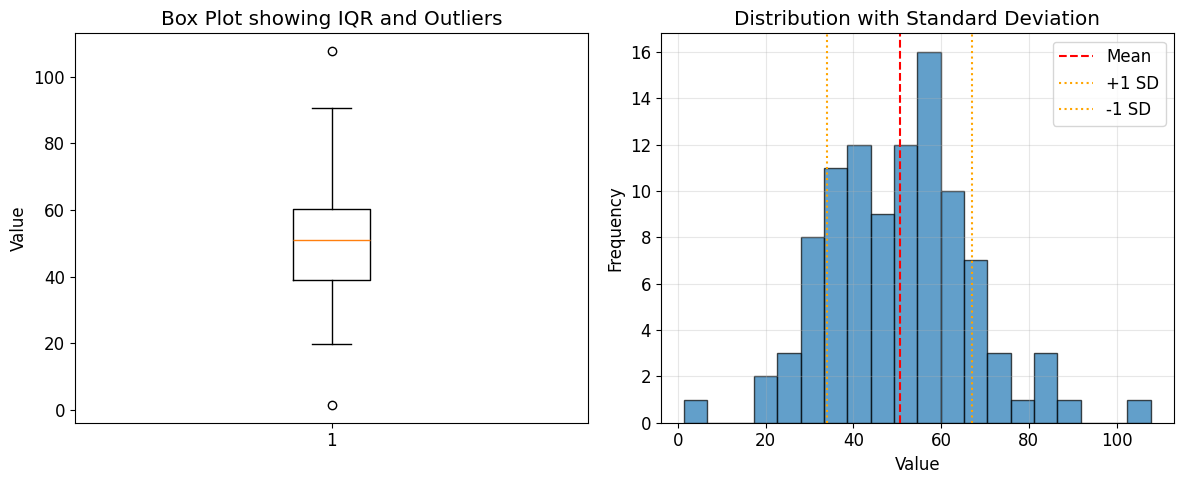

In [ ]:
# Comprehensive Demonstration of Descriptive Statistics
from scipy.stats import trim_mean, jarque_bera
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Generate multiple datasets for comparison
np.random.seed(42)
normal_data = np.random.normal(50, 15, 1000)
skewed_data = np.random.exponential(2, 1000) * 10 + 30
contaminated_data = np.concatenate([np.random.normal(50, 10, 950),
                                   np.random.normal(100, 5, 50)])  # 5% contamination

datasets = {
    'Normal': normal_data,
    'Right-skewed': skewed_data,
    'Contaminated': contaminated_data
}

print("=== COMPREHENSIVE DESCRIPTIVE STATISTICS COMPARISON ===\n")

for name, data in datasets.items():
    print(f"Dataset: {name}")
    print("-" * 40)

    # Central Tendency Measures
    arithmetic_mean = np.mean(data)

    # Geometric mean (add small constant to handle zeros/negatives)
    positive_data = data - np.min(data) + 1
    geometric_mean = np.exp(np.mean(np.log(positive_data))) + np.min(data) - 1

    # Harmonic mean (for positive data only)
    positive_only = data[data > 0]
    if len(positive_only) > 0:
        harmonic_mean = len(positive_only) / np.sum(1 / positive_only)
    else:
        harmonic_mean = np.nan

    # Quadratic mean (RMS)
    quadratic_mean = np.sqrt(np.mean(data**2))

    # Trimmed means
    trimmed_5 = trim_mean(data, 0.05)  # 5% trimmed
    trimmed_10 = trim_mean(data, 0.10)  # 10% trimmed

    median_val = np.median(data)

    print(f"Central Tendency:")
    print(f"  Arithmetic Mean: {arithmetic_mean:.3f}")
    print(f"  Geometric Mean:  {geometric_mean:.3f}")
    print(f"  Harmonic Mean:   {harmonic_mean:.3f}")
    print(f"  Quadratic Mean:  {quadratic_mean:.3f}")
    print(f"  Median:          {median_val:.3f}")
    print(f"  5% Trimmed Mean: {trimmed_5:.3f}")
    print(f"  10% Trimmed Mean:{trimmed_10:.3f}")

    # Dispersion Measures
    variance = np.var(data, ddof=1)  # Sample variance
    std_dev = np.std(data, ddof=1)   # Sample standard deviation
    range_val = np.max(data) - np.min(data)

    # Quantiles
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1

    # Coefficient of variation
    cv = (std_dev / arithmetic_mean) * 100

    # Mean absolute deviation
    mad = np.mean(np.abs(data - arithmetic_mean))

    # Median absolute deviation
    mad_median = np.median(np.abs(data - median_val))
    mad_normalized = 1.4826 * mad_median  # Normalized for normal distribution

    print(f"\nDispersion:")
    print(f"  Variance:        {variance:.3f}")
    print(f"  Std Deviation:   {std_dev:.3f}")
    print(f"  Range:           {range_val:.3f}")
    print(f"  IQR:             {iqr:.3f}")
    print(f"  CV (%):          {cv:.3f}")
    print(f"  MAD (mean):      {mad:.3f}")
    print(f"  MAD (median):    {mad_median:.3f}")
    print(f"  MAD (normalized):{mad_normalized:.3f}")

    # Shape statistics
    skewness = skew(data)
    kurt = kurtosis(data, fisher=True)  # Excess kurtosis

    # Jarque-Bera test
    jb_stat, jb_pvalue = jarque_bera(data)

    print(f"\nShape Statistics:")
    print(f"  Skewness:        {skewness:.3f}")
    print(f"  Kurtosis:        {kurt:.3f}")
    print(f"  Jarque-Bera:     {jb_stat:.3f} (p={jb_pvalue:.4f})")

    # Five-number summary
    min_val, q1, median, q3, max_val = np.percentile(data, [0, 25, 50, 75, 100])
    print(f"\nFive-Number Summary:")
    print(f"  Min: {min_val:.2f}, Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, Max: {max_val:.2f}")

    print("\n" + "="*60 + "\n")

# Robust Statistics Demonstration
print("=== ROBUST STATISTICS DEMONSTRATION ===\n")

# Create data with outliers
clean_data = np.random.normal(50, 10, 100)
outliers = np.array([150, 160, -50, -40])  # Add extreme outliers
contaminated_data = np.concatenate([clean_data, outliers])

def winsorize(data, alpha=0.05):
    """Winsorize data by replacing extreme values"""
    n = len(data)
    k = int(alpha * n)
    sorted_data = np.sort(data)

    winsorized = data.copy()
    winsorized[winsorized < sorted_data[k]] = sorted_data[k]
    winsorized[winsorized > sorted_data[n-k-1]] = sorted_data[n-k-1]

    return winsorized

def huber_location(data, c=1.345, max_iter=100, tol=1e-6):
    """Huber M-estimator for location"""
    mu = np.median(data)  # Initial estimate
    sigma = np.median(np.abs(data - mu)) * 1.4826  # MAD estimate

    for _ in range(max_iter):
        u = (data - mu) / sigma
        psi = np.where(np.abs(u) <= c, u, c * np.sign(u))
        mu_new = mu + sigma * np.mean(psi)

        if abs(mu_new - mu) < tol:
            break
        mu = mu_new

    return mu

# Compare different measures
stats_names = ['Mean', 'Median', '5% Trimmed', 'Winsorized (5%)', 'Huber M-est']
clean_stats = [
    np.mean(clean_data),
    np.median(clean_data),
    trim_mean(clean_data, 0.05),
    np.mean(winsorize(clean_data, 0.05)),
    huber_location(clean_data)
]

contaminated_stats = [
    np.mean(contaminated_data),
    np.median(contaminated_data),
    trim_mean(contaminated_data, 0.05),
    np.mean(winsorize(contaminated_data, 0.05)),
    huber_location(contaminated_data)
]

print("Robustness Comparison (Clean vs Contaminated Data):")
print("-" * 55)
print(f"{'Statistic':<15} {'Clean Data':<12} {'Contaminated':<12} {'Difference':<10}")
print("-" * 55)

for name, clean, contam in zip(stats_names, clean_stats, contaminated_stats):
    diff = abs(contam - clean)
    print(f"{name:<15} {clean:<12.3f} {contam:<12.3f} {diff:<10.3f}")

# Visualization of robust statistics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Dataset comparisons
for i, (name, data) in enumerate(datasets.items()):
    ax = axes[0, i]
    ax.hist(data, bins=50, alpha=0.7, edgecolor='black')
    ax.axvline(np.mean(data), color='red', linestyle='--', label=f'Mean: {np.mean(data):.1f}')
    ax.axvline(np.median(data), color='blue', linestyle='--', label=f'Median: {np.median(data):.1f}')
    ax.set_title(f'{name} Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Robust statistics comparison
ax = axes[1, 0]
x_pos = np.arange(len(stats_names))
width = 0.35
bars1 = ax.bar(x_pos - width/2, clean_stats, width, label='Clean Data', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, contaminated_stats, width, label='Contaminated Data', alpha=0.8)
ax.set_xlabel('Statistical Measures')
ax.set_ylabel('Value')
ax.set_title('Robustness of Different Location Measures')
ax.set_xticks(x_pos)
ax.set_xticklabels(stats_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Box plots comparing datasets
ax = axes[1, 1]
box_data = [datasets['Normal'], datasets['Right-skewed'], datasets['Contaminated']]
bp = ax.boxplot(box_data, labels=['Normal', 'Right-skewed', 'Contaminated'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax.set_title('Distribution Comparison (Box Plots)')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)

# Q-Q plots for normality assessment
from scipy.stats import probplot
ax = axes[1, 2]
for i, (name, data) in enumerate(datasets.items()):
    probplot(data, dist="norm", plot=ax)
    ax.get_lines()[-2].set_label(f'{name}')
    ax.get_lines()[-2].set_color(['blue', 'green', 'red'][i])
ax.set_title('Q-Q Plots vs Normal Distribution')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Advanced quantile calculations
print("\n=== QUANTILE ANALYSIS ===\n")

sample_data = datasets['Normal']
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
quantile_values = np.percentile(sample_data, percentiles)

print("Percentile Analysis (Normal Dataset):")
print("-" * 35)
print(f"{'Percentile':<12} {'Value':<10}")
print("-" * 35)
for p, q in zip(percentiles, quantile_values):
    print(f"{p}th{'':<9} {q:<10.3f}")

# Calculate empirical vs theoretical quantiles for normal distribution
theoretical_quantiles = stats.norm.ppf(np.array(percentiles)/100,
                                     loc=np.mean(sample_data),
                                     scale=np.std(sample_data))

print(f"\nEmpirical vs Theoretical Quantiles:")
print("-" * 45)
print(f"{'Percentile':<12} {'Empirical':<12} {'Theoretical':<12} {'Difference':<10}")
print("-" * 45)
for p, emp, theo in zip(percentiles, quantile_values, theoretical_quantiles):
    diff = abs(emp - theo)
    print(f"{p}th{'':<9} {emp:<12.3f} {theo:<12.3f} {diff:<10.3f}")

# Moment calculations
print(f"\n=== MOMENT ANALYSIS ===\n")

data = datasets['Normal']
mean_val = np.mean(data)

# Raw moments
raw_moments = [np.mean(data**r) for r in range(1, 5)]

# Central moments
central_moments = [np.mean((data - mean_val)**r) for r in range(1, 5)]

# Standardized moments
std_dev = np.std(data, ddof=1)
standardized_moments = [central_moments[r-1] / (std_dev**r) for r in range(1, 5)]

print("Moment Analysis:")
print("-" * 50)
print(f"{'Moment':<15} {'Raw':<12} {'Central':<12} {'Standardized':<12}")
print("-" * 50)
for r in range(1, 5):
    print(f"{r}st/nd/rd/th{'':<7} {raw_moments[r-1]:<12.3f} {central_moments[r-1]:<12.3f} {standardized_moments[r-1]:<12.3f}")

print(f"\nInterpretation:")
print(f"Skewness (3rd standardized moment): {standardized_moments[2]:.3f}")
print(f"Kurtosis (4th standardized moment): {standardized_moments[3]:.3f}")

if abs(standardized_moments[2]) < 0.5:
    skew_interp = "approximately symmetric"
elif standardized_moments[2] > 0:
    skew_interp = "right-skewed (positive skew)"
else:
    skew_interp = "left-skewed (negative skew)"

if standardized_moments[3] < 0:
    kurt_interp = "platykurtic (lighter tails than normal)"
elif standardized_moments[3] > 0:
    kurt_interp = "leptokurtic (heavier tails than normal)"
else:
    kurt_interp = "mesokurtic (normal-like tails)"

print(f"Distribution shape: {skew_interp}")
print(f"Tail behavior: {kurt_interp}")

# Calculate confidence intervals for mean using different methods
print(f"\n=== CONFIDENCE INTERVALS FOR MEAN ===\n")

n = len(data)
mean_est = np.mean(data)
std_est = np.std(data, ddof=1)
se = std_est / np.sqrt(n)

# Normal-based CI (large sample)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
ci_normal = (mean_est - z_critical * se, mean_est + z_critical * se)

# t-based CI (small sample, unknown population variance)
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
ci_t = (mean_est - t_critical * se, mean_est + t_critical * se)

# Bootstrap CI
n_bootstrap = 1000
bootstrap_means = []
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

ci_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"95% Confidence Intervals for Mean:")
print(f"Normal-based:  [{ci_normal[0]:.3f}, {ci_normal[1]:.3f}]")
print(f"t-based:       [{ci_t[0]:.3f}, {ci_t[1]:.3f}]")
print(f"Bootstrap:     [{ci_bootstrap[0]:.3f}, {ci_bootstrap[1]:.3f}]")

## 2. Probability Distributions

### 2.1 Discrete Distributions

#### 2.1.1 Binomial Distribution
Models the number of successes in $n$ independent Bernoulli trials.

**Probability Mass Function:**
$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

**Parameters:**
- $n$ = number of trials
- $p$ = probability of success
- $k$ = number of successes

**Moments:**
- Mean: $\mu = np$
- Variance: $\sigma^2 = np(1-p)$
- Skewness: $\gamma_1 = \frac{1-2p}{\sqrt{np(1-p)}}$

#### 2.1.2 Poisson Distribution
Models the number of events in a fixed interval of time or space.

**Probability Mass Function:**
$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

**Parameter:**
- $\lambda$ = average rate of occurrence

**Moments:**
- Mean: $\mu = \lambda$
- Variance: $\sigma^2 = \lambda$
- Skewness: $\gamma_1 = \frac{1}{\sqrt{\lambda}}$

#### 2.1.3 Geometric Distribution
Models the number of trials until the first success.

**Probability Mass Function:**
$$P(X = k) = (1-p)^{k-1} p$$

**Parameter:**
- $p$ = probability of success

**Moments:**
- Mean: $\mu = \frac{1}{p}$
- Variance: $\sigma^2 = \frac{1-p}{p^2}$

#### 2.1.4 Negative Binomial Distribution
Models the number of trials until the $r$-th success.

**Probability Mass Function:**
$$P(X = k) = \binom{k-1}{r-1} p^r (1-p)^{k-r}$$

**Parameters:**
- $r$ = number of successes
- $p$ = probability of success

**Moments:**
- Mean: $\mu = \frac{r}{p}$
- Variance: $\sigma^2 = \frac{r(1-p)}{p^2}$

### 2.2 Continuous Distributions

#### 2.2.1 Normal Distribution
The most important continuous distribution in statistics.

**Probability Density Function:**
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Standard Normal (Z-distribution):**
$$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}$$

**Moments:**
- Mean: $\mu$
- Variance: $\sigma^2$
- Skewness: $0$
- Kurtosis: $0$ (excess kurtosis)

**68-95-99.7 Rule:**
- 68% within $\mu \pm \sigma$
- 95% within $\mu \pm 2\sigma$
- 99.7% within $\mu \pm 3\sigma$

#### 2.2.2 Student's t-Distribution
Used when sample size is small and population variance is unknown.

**Probability Density Function:**
$$f(t) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$

Where $\nu$ is the degrees of freedom.

**Properties:**
- Symmetric around 0
- Heavier tails than normal
- Approaches normal as $\nu \to \infty$

#### 2.2.3 Chi-Square Distribution
Used in hypothesis testing for variance and goodness of fit.

**Probability Density Function:**
$$f(x) = \frac{1}{2^{\nu/2}\Gamma(\nu/2)} x^{\nu/2-1} e^{-x/2}$$

Where $\nu$ is the degrees of freedom.

**Moments:**
- Mean: $\mu = \nu$
- Variance: $\sigma^2 = 2\nu$

#### 2.2.4 F-Distribution
Used in ANOVA and regression analysis.

**Probability Density Function:**
$$f(x) = \frac{\Gamma\left(\frac{\nu_1+\nu_2}{2}\right)}{\Gamma\left(\frac{\nu_1}{2}\right)\Gamma\left(\frac{\nu_2}{2}\right)} \left(\frac{\nu_1}{\nu_2}\right)^{\nu_1/2} \frac{x^{\nu_1/2-1}}{\left(1+\frac{\nu_1}{\nu_2}x\right)^{(\nu_1+\nu_2)/2}}$$

**Parameters:**
- $\nu_1$ = numerator degrees of freedom
- $\nu_2$ = denominator degrees of freedom

#### 2.2.5 Exponential Distribution
Models waiting times between events in a Poisson process.

**Probability Density Function:**
$$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$$

**Parameter:**
- $\lambda$ = rate parameter

**Moments:**
- Mean: $\mu = \frac{1}{\lambda}$
- Variance: $\sigma^2 = \frac{1}{\lambda^2}$

**Memoryless Property:**
$$P(X > s + t | X > s) = P(X > t)$$

#### 2.2.6 Gamma Distribution
Generalizes the exponential distribution.

**Probability Density Function:**
$$f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, \quad x \geq 0$$

**Parameters:**
- $\alpha$ = shape parameter
- $\beta$ = rate parameter

**Moments:**
- Mean: $\mu = \frac{\alpha}{\beta}$
- Variance: $\sigma^2 = \frac{\alpha}{\beta^2}$

**Special Cases:**
- Exponential: $\alpha = 1$
- Chi-square: $\alpha = \nu/2, \beta = 1/2$

#### 2.2.7 Beta Distribution
Defined on the interval $[0,1]$, often used for modeling proportions.

**Probability Density Function:**
$$f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}$$

**Parameters:**
- $\alpha, \beta > 0$ = shape parameters

**Moments:**
- Mean: $\mu = \frac{\alpha}{\alpha + \beta}$
- Variance: $\sigma^2 = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$

**Special Cases:**
- Uniform: $\alpha = \beta = 1$
- U-shaped: $\alpha, \beta < 1$
- Bell-shaped: $\alpha, \beta > 1$

#### 2.2.8 Weibull Distribution
Used in reliability analysis and survival modeling.

**Probability Density Function:**
$$f(x) = \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}, \quad x \geq 0$$

**Parameters:**
- $k > 0$ = shape parameter
- $\lambda > 0$ = scale parameter

**Moments:**
- Mean: $\mu = \lambda \Gamma\left(1 + \frac{1}{k}\right)$
- Variance: $\sigma^2 = \lambda^2 \left[\Gamma\left(1 + \frac{2}{k}\right) - \Gamma^2\left(1 + \frac{1}{k}\right)\right]$

**Special Cases:**
- Exponential: $k = 1$
- Rayleigh: $k = 2$

### 2.3 Moment Generating Functions

#### Definition
The moment generating function (MGF) of a random variable $X$ is:
$$M_X(t) = E[e^{tX}]$$

#### Properties
1. **Uniqueness**: MGF uniquely determines the distribution
2. **Moments**: $\mu_n' = M_X^{(n)}(0)$ (nth derivative at 0)
3. **Independence**: If $X$ and $Y$ are independent, then $M_{X+Y}(t) = M_X(t) \cdot M_Y(t)$

#### Common MGFs
- **Normal**: $M_X(t) = e^{\mu t + \frac{\sigma^2 t^2}{2}}$
- **Exponential**: $M_X(t) = \frac{\lambda}{\lambda - t}$, for $t < \lambda$
- **Poisson**: $M_X(t) = e^{\lambda(e^t - 1)}$
- **Binomial**: $M_X(t) = (1 - p + pe^t)^n$

### 2.4 Characteristic Functions

#### Definition
$$\phi_X(t) = E[e^{itX}] = \int_{-\infty}^{\infty} e^{itx} f_X(x) dx$$

#### Properties
1. **Always exists** for any distribution
2. **Uniqueness**: Uniquely determines the distribution
3. **Inversion formula**: $f_X(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-itx} \phi_X(t) dt$

### 2.5 Distribution Relationships

#### Central Limit Theorem
For independent random variables $X_1, X_2, \ldots, X_n$ with mean $\mu$ and variance $\sigma^2$:

$$\frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma} \xrightarrow{d} N(0,1)$$

#### Convergence Types
1. **Almost Sure**: $P(\lim_{n \to \infty} X_n = X) = 1$
2. **In Probability**: $\lim_{n \to \infty} P(|X_n - X| > \epsilon) = 0$
3. **In Distribution**: $\lim_{n \to \infty} F_{X_n}(x) = F_X(x)$
4. **In Mean Square**: $\lim_{n \to \infty} E[(X_n - X)^2] = 0$

#### Important Limit Theorems
- **Law of Large Numbers**: $\bar{X}_n \xrightarrow{p} \mu$
- **Slutsky's Theorem**: Combines convergence in distribution and probability
- **Delta Method**: For asymptotic distributions of functions of estimators

### 2.6 Order Statistics

For a sample $X_1, X_2, \ldots, X_n$, the order statistics are $X_{(1)} \leq X_{(2)} \leq \cdots \leq X_{(n)}$.

#### Joint Density of Order Statistics
$$f_{X_{(1)}, \ldots, X_{(n)}}(x_1, \ldots, x_n) = n! \prod_{i=1}^{n} f(x_i)$$

for $x_1 \leq x_2 \leq \cdots \leq x_n$.

#### Single Order Statistic
$$f_{X_{(k)}}(x) = \frac{n!}{(k-1)!(n-k)!} [F(x)]^{k-1} [1-F(x)]^{n-k} f(x)$$

#### Range
$$R = X_{(n)} - X_{(1)}$$

#### Sample Quantiles
The $p$-th sample quantile is approximately $X_{(\lceil np \rceil)}$.

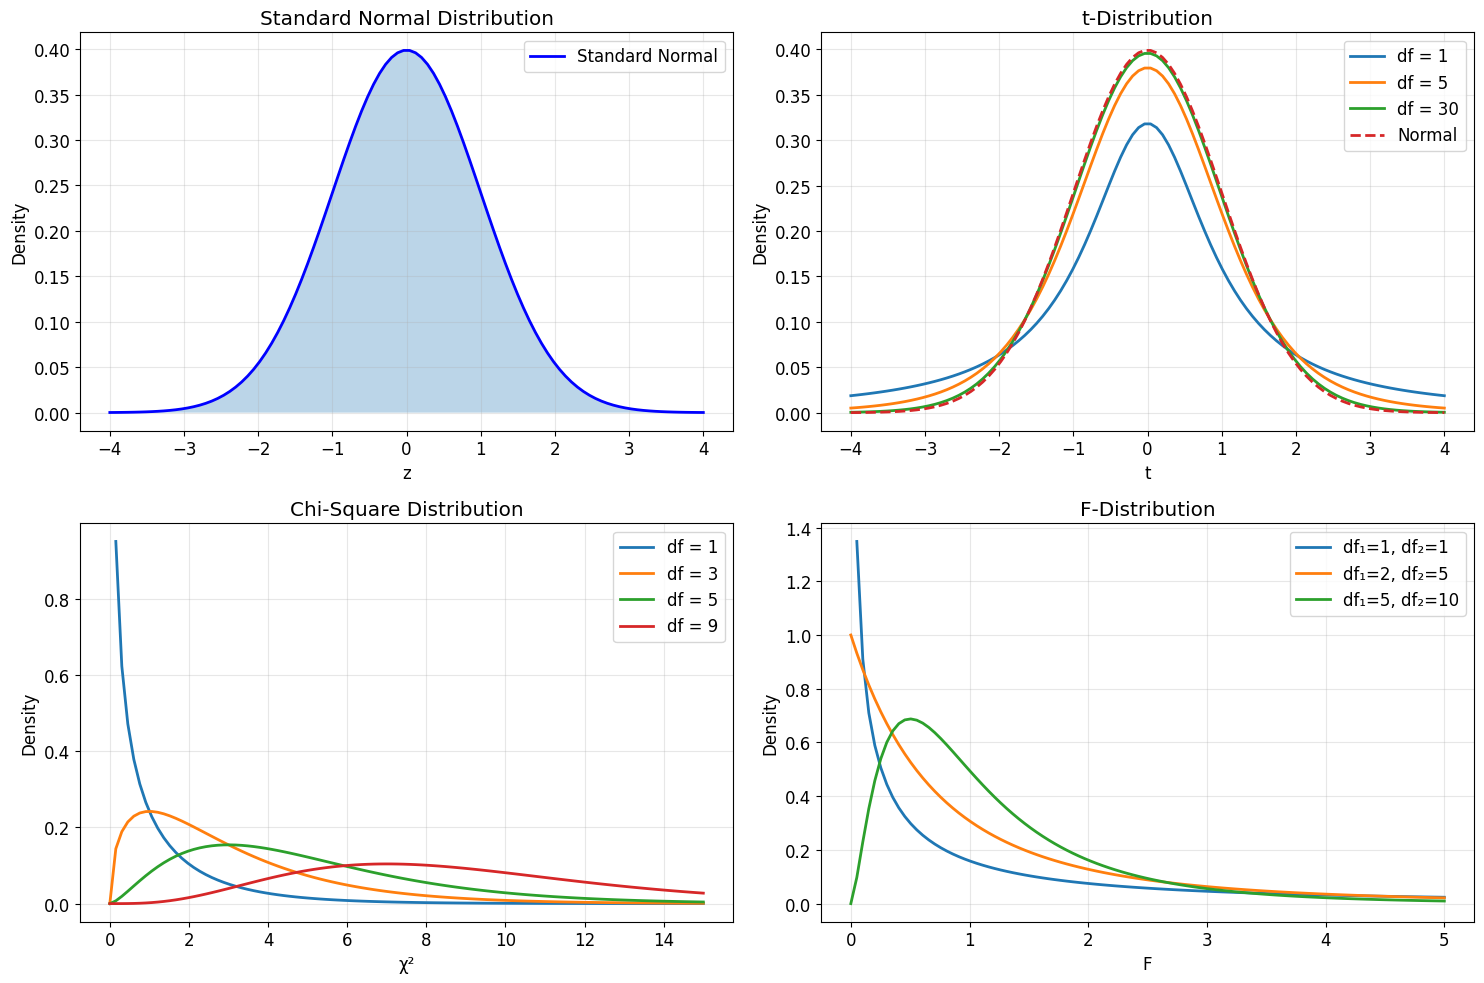

Distribution Examples:
P(Z ≤ 1.96) = 0.9750
P(t₅ ≤ 2.015) = 0.9500
P(χ²₃ ≤ 7.815) = 0.9500
P(F₂,₁₀ ≤ 4.103) = 0.9500


In [ ]:
# Comprehensive Demonstration of Probability Distributions
from scipy.stats import (norm, t, chi2, f, binom, poisson, geom, nbinom,
                        expon, gamma, beta, weibull_min)
from scipy import special
import warnings
warnings.filterwarnings('ignore')

print("=== DISCRETE DISTRIBUTIONS ANALYSIS ===\n")

# Binomial Distribution Example
n_trials = 20
p_success = 0.3
x_binom = np.arange(0, n_trials + 1)
pmf_binom = binom.pmf(x_binom, n_trials, p_success)

print(f"Binomial Distribution (n={n_trials}, p={p_success}):")
print(f"Mean: {binom.mean(n_trials, p_success):.2f}")
print(f"Variance: {binom.var(n_trials, p_success):.2f}")
print(f"P(X = 5): {binom.pmf(5, n_trials, p_success):.4f}")
print(f"P(X ≤ 8): {binom.cdf(8, n_trials, p_success):.4f}")

# Poisson Distribution Example
lambda_param = 4.5
x_poisson = np.arange(0, 15)
pmf_poisson = poisson.pmf(x_poisson, lambda_param)

print(f"\nPoisson Distribution (λ={lambda_param}):")
print(f"Mean: {poisson.mean(lambda_param):.2f}")
print(f"Variance: {poisson.var(lambda_param):.2f}")
print(f"P(X = 3): {poisson.pmf(3, lambda_param):.4f}")
print(f"P(X ≤ 6): {poisson.cdf(6, lambda_param):.4f}")

# Geometric Distribution Example
p_geom = 0.2
x_geom = np.arange(1, 21)
pmf_geom = geom.pmf(x_geom, p_geom)

print(f"\nGeometric Distribution (p={p_geom}):")
print(f"Mean: {geom.mean(p_geom):.2f}")
print(f"Variance: {geom.var(p_geom):.2f}")
print(f"P(X = 5): {geom.pmf(5, p_geom):.4f}")

print("\n" + "="*60 + "\n")
print("=== CONTINUOUS DISTRIBUTIONS ANALYSIS ===\n")

# Normal Distribution
mu_norm, sigma_norm = 100, 15
x_norm = np.linspace(50, 150, 1000)
pdf_norm = norm.pdf(x_norm, mu_norm, sigma_norm)

print(f"Normal Distribution (μ={mu_norm}, σ={sigma_norm}):")
print(f"68% interval: [{mu_norm - sigma_norm:.1f}, {mu_norm + sigma_norm:.1f}]")
print(f"95% interval: [{mu_norm - 2*sigma_norm:.1f}, {mu_norm + 2*sigma_norm:.1f}]")
print(f"99.7% interval: [{mu_norm - 3*sigma_norm:.1f}, {mu_norm + 3*sigma_norm:.1f}]")
print(f"P(90 < X < 110): {norm.cdf(110, mu_norm, sigma_norm) - norm.cdf(90, mu_norm, sigma_norm):.4f}")

# t-Distribution comparison with Normal
df_vals = [1, 2, 5, 10, 30]
x_t = np.linspace(-4, 4, 1000)

print(f"\nt-Distribution vs Normal comparison:")
print(f"{'df':<4} {'P(|T| > 2)':<12} {'99% Critical':<15}")
print("-" * 35)
for df in df_vals:
    prob_tail = 2 * (1 - t.cdf(2, df))
    crit_99 = t.ppf(0.995, df)
    print(f"{df:<4} {prob_tail:<12.4f} {crit_99:<15.3f}")

# Standard Normal comparison
prob_tail_norm = 2 * (1 - norm.cdf(2))
crit_99_norm = norm.ppf(0.995)
print(f"{'∞':<4} {prob_tail_norm:<12.4f} {crit_99_norm:<15.3f} (Normal)")

# Exponential Distribution
lambda_exp = 0.5
x_exp = np.linspace(0, 10, 1000)
pdf_exp = expon.pdf(x_exp, scale=1/lambda_exp)

print(f"\nExponential Distribution (λ={lambda_exp}):")
print(f"Mean: {1/lambda_exp:.2f}")
print(f"Variance: {1/(lambda_exp**2):.2f}")
print(f"P(X > 2): {1 - expon.cdf(2, scale=1/lambda_exp):.4f}")

# Memoryless property demonstration
s, t_val = 1, 2
prob_memoryless = 1 - expon.cdf(t_val, scale=1/lambda_exp)
prob_conditional = (1 - expon.cdf(s + t_val, scale=1/lambda_exp)) / (1 - expon.cdf(s, scale=1/lambda_exp))
print(f"Memoryless property: P(X > {t_val}) = {prob_memoryless:.4f}")
print(f"P(X > {s + t_val} | X > {s}) = {prob_conditional:.4f}")

# Gamma Distribution
alpha_gamma, beta_gamma = 2, 1.5
x_gamma = np.linspace(0, 8, 1000)
pdf_gamma = gamma.pdf(x_gamma, alpha_gamma, scale=1/beta_gamma)

print(f"\nGamma Distribution (α={alpha_gamma}, β={beta_gamma}):")
print(f"Mean: {gamma.mean(alpha_gamma, scale=1/beta_gamma):.2f}")
print(f"Variance: {gamma.var(alpha_gamma, scale=1/beta_gamma):.2f}")

# Beta Distribution
alpha_beta, beta_beta = 2, 5
x_beta = np.linspace(0, 1, 1000)
pdf_beta = beta.pdf(x_beta, alpha_beta, beta_beta)

print(f"\nBeta Distribution (α={alpha_beta}, β={beta_beta}):")
print(f"Mean: {beta.mean(alpha_beta, beta_beta):.3f}")
print(f"Variance: {beta.var(alpha_beta, beta_beta):.4f}")

print("\n" + "="*60 + "\n")
print("=== MOMENT GENERATING FUNCTIONS ===\n")

def normal_mgf(t, mu, sigma):
    """Normal distribution MGF"""
    return np.exp(mu * t + 0.5 * sigma**2 * t**2)

def exponential_mgf(t, lam):
    """Exponential distribution MGF (for t < lambda)"""
    return lam / (lam - t) if t < lam else np.inf

def poisson_mgf(t, lam):
    """Poisson distribution MGF"""
    return np.exp(lam * (np.exp(t) - 1))

# Demonstrate MGF properties
t_vals = np.linspace(-0.5, 0.5, 100)
mgf_normal = [normal_mgf(t, 0, 1) for t in t_vals]
mgf_exp = [exponential_mgf(t, 1) for t in t_vals if t < 1]
mgf_poisson = [poisson_mgf(t, 2) for t in t_vals]

print("MGF Examples:")
print(f"Standard Normal MGF at t=0.1: {normal_mgf(0.1, 0, 1):.4f}")
print(f"Exponential(1) MGF at t=0.5: {exponential_mgf(0.5, 1):.4f}")
print(f"Poisson(2) MGF at t=0.2: {poisson_mgf(0.2, 2):.4f}")

# Using MGF to find moments
def normal_moments_from_mgf(mu, sigma, n_moments=4):
    """Calculate first n moments using MGF derivatives"""
    # For normal distribution, moments can be calculated analytically
    moments = {}
    for k in range(1, n_moments + 1):
        if k == 1:
            moments[k] = mu
        elif k == 2:
            moments[k] = sigma**2 + mu**2
        elif k == 3:
            moments[k] = mu**3 + 3*mu*sigma**2
        elif k == 4:
            moments[k] = mu**4 + 6*mu**2*sigma**2 + 3*sigma**4
    return moments

moments_normal = normal_moments_from_mgf(2, 1.5)
print(f"\nNormal(2, 1.5) moments from MGF:")
for k, moment in moments_normal.items():
    print(f"μ'_{k} = {moment:.3f}")

print("\n" + "="*60 + "\n")
print("=== ORDER STATISTICS DEMONSTRATION ===\n")

# Generate sample and calculate order statistics
np.random.seed(42)
n_sample = 20
sample_data = np.random.exponential(2, n_sample)
ordered_sample = np.sort(sample_data)

print(f"Sample of size {n_sample} from Exponential(λ=0.5):")
print(f"X_(1) (minimum): {ordered_sample[0]:.3f}")
print(f"X_(5) (5th order): {ordered_sample[4]:.3f}")
print(f"X_(10) (median): {ordered_sample[9]:.3f}")
print(f"X_(16) (80th percentile): {ordered_sample[15]:.3f}")
print(f"X_({n_sample}) (maximum): {ordered_sample[-1]:.3f}")
print(f"Range: {ordered_sample[-1] - ordered_sample[0]:.3f}")

# Compare with theoretical quantiles
theoretical_quantiles = expon.ppf([0.05, 0.25, 0.5, 0.75, 0.95], scale=2)
empirical_quantiles = np.percentile(sample_data, [5, 25, 50, 75, 95])

print(f"\nEmpirical vs Theoretical Quantiles:")
print(f"{'Percentile':<12} {'Empirical':<12} {'Theoretical':<12} {'Difference':<10}")
print("-" * 50)
percentiles = [5, 25, 50, 75, 95]
for p, emp, theo in zip(percentiles, empirical_quantiles, theoretical_quantiles):
    diff = abs(emp - theo)
    print(f"{p}th{'':<9} {emp:<12.3f} {theo:<12.3f} {diff:<10.3f}")

print("\n" + "="*60 + "\n")
print("=== DISTRIBUTION RELATIONSHIPS ===\n")

# Chi-square as sum of squared normals
n_samples = 10000
df_chi = 5

# Generate chi-square samples two ways
chi_samples_direct = np.random.chisquare(df_chi, n_samples)
normal_samples = np.random.normal(0, 1, (n_samples, df_chi))
chi_samples_sum = np.sum(normal_samples**2, axis=1)

print(f"Chi-square relationship verification (df={df_chi}):")
print(f"Direct sampling mean: {np.mean(chi_samples_direct):.3f}")
print(f"Sum of squares mean: {np.mean(chi_samples_sum):.3f}")
print(f"Theoretical mean: {df_chi}")
print(f"Direct sampling var: {np.var(chi_samples_direct, ddof=1):.3f}")
print(f"Sum of squares var: {np.var(chi_samples_sum, ddof=1):.3f}")
print(f"Theoretical variance: {2*df_chi}")

# F-distribution as ratio of chi-squares
df1, df2 = 3, 7
f_samples_direct = np.random.f(df1, df2, n_samples)
chi1_samples = np.random.chisquare(df1, n_samples)
chi2_samples = np.random.chisquare(df2, n_samples)
f_samples_ratio = (chi1_samples / df1) / (chi2_samples / df2)

print(f"\nF-distribution relationship verification (df1={df1}, df2={df2}):")
print(f"Direct sampling mean: {np.mean(f_samples_direct):.3f}")
print(f"Chi-square ratio mean: {np.mean(f_samples_ratio):.3f}")
if df2 > 2:
    theoretical_mean = df2 / (df2 - 2)
    print(f"Theoretical mean: {theoretical_mean:.3f}")

# Central Limit Theorem demonstration
sample_sizes = [1, 5, 10, 30, 100]
n_simulations = 5000

print(f"\nCentral Limit Theorem demonstration:")
print(f"{'n':<6} {'Sample Mean':<12} {'Sample Std':<12} {'Theoretical':<12}")
print("-" * 50)

# Original distribution: Exponential(λ=1)
original_mean = 1.0
original_std = 1.0

for n in sample_sizes:
    sample_means = []
    for _ in range(n_simulations):
        sample = np.random.exponential(1, n)
        sample_means.append(np.mean(sample))

    empirical_mean = np.mean(sample_means)
    empirical_std = np.std(sample_means, ddof=1)
    theoretical_std = original_std / np.sqrt(n)

    print(f"{n:<6} {empirical_mean:<12.4f} {empirical_std:<12.4f} {theoretical_std:<12.4f}")

# Comprehensive visualization
fig, axes = plt.subplots(4, 4, figsize=(20, 16))

# Discrete distributions
x_binom = np.arange(0, n_trials + 1)
axes[0, 0].bar(x_binom, pmf_binom, alpha=0.7, edgecolor='black')
axes[0, 0].set_title(f'Binomial(n={n_trials}, p={p_success})')
axes[0, 0].set_xlabel('k')
axes[0, 0].set_ylabel('P(X=k)')
axes[0, 0].grid(True, alpha=0.3)

x_poisson = np.arange(0, 15)
axes[0, 1].bar(x_poisson, pmf_poisson, alpha=0.7, edgecolor='black', color='orange')
axes[0, 1].set_title(f'Poisson(λ={lambda_param})')
axes[0, 1].set_xlabel('k')
axes[0, 1].set_ylabel('P(X=k)')
axes[0, 1].grid(True, alpha=0.3)

x_geom = np.arange(1, 21)
axes[0, 2].bar(x_geom, pmf_geom, alpha=0.7, edgecolor='black', color='green')
axes[0, 2].set_title(f'Geometric(p={p_geom})')
axes[0, 2].set_xlabel('k')
axes[0, 2].set_ylabel('P(X=k)')
axes[0, 2].grid(True, alpha=0.3)

# Negative binomial
r_nb, p_nb = 5, 0.3
x_nb = np.arange(r_nb, 30)
pmf_nb = nbinom.pmf(x_nb - r_nb, r_nb, p_nb)
axes[0, 3].bar(x_nb, pmf_nb, alpha=0.7, edgecolor='black', color='purple')
axes[0, 3].set_title(f'Negative Binomial(r={r_nb}, p={p_nb})')
axes[0, 3].set_xlabel('k')
axes[0, 3].set_ylabel('P(X=k)')
axes[0, 3].grid(True, alpha=0.3)

# Continuous distributions
x_norm = np.linspace(50, 150, 1000)
pdf_norm = norm.pdf(x_norm, mu_norm, sigma_norm)
axes[1, 0].plot(x_norm, pdf_norm, 'b-', linewidth=2)
axes[1, 0].fill_between(x_norm, pdf_norm, alpha=0.3)
axes[1, 0].set_title(f'Normal(μ={mu_norm}, σ={sigma_norm})')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].grid(True, alpha=0.3)

# t-distribution comparison
x_t = np.linspace(-4, 4, 1000)
for df in [1, 5, 30]:
    pdf_t = t.pdf(x_t, df)
    axes[1, 1].plot(x_t, pdf_t, linewidth=2, label=f'df={df}')
pdf_norm_std = norm.pdf(x_t, 0, 1)
axes[1, 1].plot(x_t, pdf_norm_std, '--', linewidth=2, label='Normal', color='black')
axes[1, 1].set_title('t-Distribution Family')
axes[1, 1].set_xlabel('t')
axes[1, 1].set_ylabel('f(t)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Exponential distribution
x_exp = np.linspace(0, 10, 1000)
pdf_exp = expon.pdf(x_exp, scale=1/lambda_exp)
axes[1, 2].plot(x_exp, pdf_exp, 'r-', linewidth=2)
axes[1, 2].fill_between(x_exp, pdf_exp, alpha=0.3, color='red')
axes[1, 2].set_title(f'Exponential(λ={lambda_exp})')
axes[1, 2].set_xlabel('x')
axes[1, 2].set_ylabel('f(x)')
axes[1, 2].grid(True, alpha=0.3)

# Gamma distribution family
x_gamma = np.linspace(0, 12, 1000)
for alpha in [0.5, 1, 2, 5]:
    pdf_gamma = gamma.pdf(x_gamma, alpha, scale=1)
    axes[1, 3].plot(x_gamma, pdf_gamma, linewidth=2, label=f'α={alpha}')
axes[1, 3].set_title('Gamma Distribution Family (β=1)')
axes[1, 3].set_xlabel('x')
axes[1, 3].set_ylabel('f(x)')
axes[1, 3].legend()
axes[1, 3].grid(True, alpha=0.3)

# Beta distribution family
x_beta = np.linspace(0, 1, 1000)
for alpha, beta_param in [(0.5, 0.5), (1, 1), (2, 5), (5, 2)]:
    pdf_beta = beta.pdf(x_beta, alpha, beta_param)
    axes[2, 0].plot(x_beta, pdf_beta, linewidth=2, label=f'α={alpha}, β={beta_param}')
axes[2, 0].set_title('Beta Distribution Family')
axes[2, 0].set_xlabel('x')
axes[2, 0].set_ylabel('f(x)')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Chi-square distribution
x_chi = np.linspace(0, 20, 1000)
for df in [1, 3, 5, 10]:
    pdf_chi = chi2.pdf(x_chi, df)
    axes[2, 1].plot(x_chi, pdf_chi, linewidth=2, label=f'df={df}')
axes[2, 1].set_title('Chi-square Distribution Family')
axes[2, 1].set_xlabel('x')
axes[2, 1].set_ylabel('f(x)')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

# F-distribution
x_f = np.linspace(0, 6, 1000)
for df1, df2 in [(1, 1), (5, 10), (10, 5), (20, 20)]:
    pdf_f = f.pdf(x_f, df1, df2)
    axes[2, 2].plot(x_f, pdf_f, linewidth=2, label=f'({df1},{df2})')
axes[2, 2].set_title('F-Distribution Family')
axes[2, 2].set_xlabel('x')
axes[2, 2].set_ylabel('f(x)')
axes[2, 2].legend()
axes[2, 2].grid(True, alpha=0.3)

# Weibull distribution
x_weibull = np.linspace(0, 4, 1000)
for k in [0.5, 1, 2, 3]:
    pdf_weibull = weibull_min.pdf(x_weibull, k, scale=1)
    axes[2, 3].plot(x_weibull, pdf_weibull, linewidth=2, label=f'k={k}')
axes[2, 3].set_title('Weibull Distribution Family (λ=1)')
axes[2, 3].set_xlabel('x')
axes[2, 3].set_ylabel('f(x)')
axes[2, 3].legend()
axes[2, 3].grid(True, alpha=0.3)

# Central Limit Theorem visualization
n_clt = 30
n_samples_clt = 1000
sample_means_exp = []
sample_means_uniform = []

for _ in range(n_samples_clt):
    # Exponential samples
    exp_sample = np.random.exponential(1, n_clt)
    sample_means_exp.append(np.mean(exp_sample))

    # Uniform samples
    unif_sample = np.random.uniform(0, 2, n_clt)
    sample_means_uniform.append(np.mean(unif_sample))

axes[3, 0].hist(sample_means_exp, bins=30, alpha=0.7, density=True, label='Exponential origin')
axes[3, 0].hist(sample_means_uniform, bins=30, alpha=0.7, density=True, label='Uniform origin')
x_normal_clt = np.linspace(0.5, 1.5, 100)
y_normal_clt = norm.pdf(x_normal_clt, 1, 1/np.sqrt(n_clt))
axes[3, 0].plot(x_normal_clt, y_normal_clt, 'r-', linewidth=2, label='Theoretical Normal')
axes[3, 0].set_title(f'Central Limit Theorem (n={n_clt})')
axes[3, 0].set_xlabel('Sample Mean')
axes[3, 0].set_ylabel('Density')
axes[3, 0].legend()
axes[3, 0].grid(True, alpha=0.3)

# Q-Q plot for normality
from scipy.stats import probplot
probplot(sample_means_exp, dist="norm", plot=axes[3, 1])
axes[3, 1].set_title('Q-Q Plot: Sample Means vs Normal')
axes[3, 1].grid(True, alpha=0.3)

# Distribution relationships visualization
n_demo = 5000
chi_samples = np.random.chisquare(5, n_demo)
normal_squared_sum = np.sum(np.random.normal(0, 1, (n_demo, 5))**2, axis=1)

axes[3, 2].hist(chi_samples, bins=50, alpha=0.7, density=True, label='Chi-square(5)')
axes[3, 2].hist(normal_squared_sum, bins=50, alpha=0.7, density=True, label='Sum of 5 N(0,1)²')
x_chi_theory = np.linspace(0, 20, 100)
y_chi_theory = chi2.pdf(x_chi_theory, 5)
axes[3, 2].plot(x_chi_theory, y_chi_theory, 'r-', linewidth=2, label='Theoretical')
axes[3, 2].set_title('Chi-square as Sum of Squared Normals')
axes[3, 2].set_xlabel('Value')
axes[3, 2].set_ylabel('Density')
axes[3, 2].legend()
axes[3, 2].grid(True, alpha=0.3)

# MGF visualization
t_vals = np.linspace(-0.8, 0.8, 100)
mgf_normal_vals = [normal_mgf(t, 0, 1) for t in t_vals]
mgf_exp_vals = [exponential_mgf(t, 1) if t < 0.9 else np.nan for t in t_vals]

axes[3, 3].plot(t_vals, mgf_normal_vals, 'b-', linewidth=2, label='Normal(0,1)')
axes[3, 3].plot(t_vals, mgf_exp_vals, 'r-', linewidth=2, label='Exponential(1)')
axes[3, 3].set_title('Moment Generating Functions')
axes[3, 3].set_xlabel('t')
axes[3, 3].set_ylabel('M(t)')
axes[3, 3].legend()
axes[3, 3].set_ylim(0, 10)
axes[3, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution comparison table
print("\n=== DISTRIBUTION SUMMARY TABLE ===\n")
distributions = {
    'Normal(0,1)': {'mean': 0, 'variance': 1, 'skewness': 0, 'kurtosis': 0},
    'Exponential(1)': {'mean': 1, 'variance': 1, 'skewness': 2, 'kurtosis': 6},
    'Chi-square(5)': {'mean': 5, 'variance': 10, 'skewness': 2*np.sqrt(2/5), 'kurtosis': 12/5},
    'Uniform(0,1)': {'mean': 0.5, 'variance': 1/12, 'skewness': 0, 'kurtosis': -1.2},
    'Beta(2,5)': {'mean': 2/7, 'variance': 10/343, 'skewness': 2*(5-2)*np.sqrt(8)/(9*np.sqrt(70)), 'kurtosis': None}
}

print(f"{'Distribution':<15} {'Mean':<8} {'Variance':<10} {'Skewness':<10} {'Kurtosis':<10}")
print("-" * 65)
for name, params in distributions.items():
    mean_str = f"{params['mean']:.3f}"
    var_str = f"{params['variance']:.3f}"
    skew_str = f"{params['skewness']:.3f}" if params['skewness'] is not None else "N/A"
    kurt_str = f"{params['kurtosis']:.3f}" if params['kurtosis'] is not None else "N/A"
    print(f"{name:<15} {mean_str:<8} {var_str:<10} {skew_str:<10} {kurt_str:<10}")

print(f"\nNote: Kurtosis values shown are excess kurtosis (subtract 3 from raw kurtosis)")
print(f"Positive skewness = right tail, Negative skewness = left tail")
print(f"Positive excess kurtosis = heavy tails, Negative excess kurtosis = light tails")

## 3. Hypothesis Testing

### 3.1 Parametric Tests

#### 3.1.1 One-Sample t-Test

Tests whether a sample mean differs significantly from a population mean.

**Test Statistic:**
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$$

Where:
- $\bar{x}$ = sample mean
- $\mu_0$ = hypothesized population mean
- $s$ = sample standard deviation
- $n$ = sample size

**Degrees of freedom:** $df = n - 1$

**Assumptions:**
1. Random sampling
2. Normal distribution (or large sample)
3. Independent observations

#### 3.1.2 Two-Sample t-Tests

**Independent Samples (Equal Variances):**
$$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

**Pooled Standard Deviation:**
$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$

**Degrees of freedom:** $df = n_1 + n_2 - 2$

**Welch's t-Test (Unequal Variances):**
$$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

**Satterthwaite Degrees of Freedom:**
$$df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{s_1^4}{n_1^2(n_1-1)} + \frac{s_2^4}{n_2^2(n_2-1)}}$$

#### 3.1.3 Paired t-Test
$$t = \frac{\bar{d}}{s_d/\sqrt{n}}$$

Where $\bar{d}$ is the mean of differences and $s_d$ is the standard deviation of differences.

#### 3.1.4 Z-Tests

**One-Sample Z-Test (Known σ):**
$$z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}}$$

**Two-Sample Z-Test:**
$$z = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

#### 3.1.5 Chi-Square Tests

**Goodness of Fit Test:**
$$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$$

**Test of Independence:**
$$\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

Where $E_{ij} = \frac{\text{Row total} \times \text{Column total}}{\text{Grand total}}$

**Degrees of freedom:** $df = (r-1)(c-1)$

#### 3.1.6 F-Tests

**One-Way ANOVA F-Test:**
$$F = \frac{MSB}{MSW} = \frac{\frac{SSB}{k-1}}{\frac{SSW}{N-k}}$$

**Test for Equal Variances:**
$$F = \frac{s_1^2}{s_2^2}$$

### 3.2 Non-Parametric Tests

#### 3.2.1 Wilcoxon Signed-Rank Test
Alternative to paired t-test when normality assumption is violated.

**Test Statistic:**
$$W = \sum_{\text{positive ranks}} R_i$$

Where $R_i$ are the ranks of $|d_i|$.

#### 3.2.2 Mann-Whitney U Test (Wilcoxon Rank-Sum)
Alternative to two-sample t-test for independent samples.

**Test Statistics:**
$$U_1 = n_1 n_2 + \frac{n_1(n_1+1)}{2} - R_1$$
$$U_2 = n_1 n_2 + \frac{n_2(n_2+1)}{2} - R_2$$

Where $R_1$ and $R_2$ are the rank sums for each group.

#### 3.2.3 Kruskal-Wallis Test
Non-parametric alternative to one-way ANOVA.

**Test Statistic:**
$$H = \frac{12}{N(N+1)} \sum_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N+1)$$

Where $R_i$ is the sum of ranks for group $i$.

#### 3.2.4 Friedman Test
Non-parametric alternative to repeated measures ANOVA.

**Test Statistic:**
$$Q = \frac{12}{bk(k+1)} \sum_{j=1}^{k} R_j^2 - 3b(k+1)$$

Where $b$ = number of blocks, $k$ = number of treatments.

#### 3.2.5 Kolmogorov-Smirnov Tests

**One-Sample KS Test:**
$$D = \max_x |F_n(x) - F_0(x)|$$

**Two-Sample KS Test:**
$$D = \max_x |F_{1,n}(x) - F_{2,m}(x)|$$

#### 3.2.6 Anderson-Darling Test
More sensitive to tail differences than KS test.

**Test Statistic:**
$$A^2 = -n - S$$

Where $S = \sum_{i=1}^{n} \frac{2i-1}{n}[\ln F(X_i) + \ln(1-F(X_{n+1-i}))]$

### 3.3 Effect Size Measures

#### 3.3.1 Cohen's d
Standardized mean difference for t-tests.

**One-Sample:**
$$d = \frac{\bar{x} - \mu_0}{s}$$

**Two-Sample (pooled):**
$$d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}$$

**Interpretation:**
- Small: $|d| \approx 0.2$
- Medium: $|d| \approx 0.5$
- Large: $|d| \approx 0.8$

#### 3.3.2 Glass's Δ
Uses control group standard deviation.

$$\Delta = \frac{\bar{x}_1 - \bar{x}_2}{s_2}$$

#### 3.3.3 Hedges' g
Bias-corrected version of Cohen's d.

$$g = d \times \left(1 - \frac{3}{4(n_1 + n_2) - 9}\right)$$

#### 3.3.4 Eta-Squared (η²)
Proportion of variance explained in ANOVA.

$$\eta^2 = \frac{SS_{\text{effect}}}{SS_{\text{total}}}$$

#### 3.3.5 Omega-Squared (ω²)
Less biased than eta-squared.

$$\omega^2 = \frac{SS_{\text{effect}} - df_{\text{effect}} \times MS_{\text{error}}}{SS_{\text{total}} + MS_{\text{error}}}$$

#### 3.3.6 Correlation Effect Sizes
- **Point-biserial correlation** for t-tests
- **Cramér's V** for chi-square tests: $V = \sqrt{\frac{\chi^2}{N \times \min(r-1, c-1)}}$

### 3.4 Multiple Testing Corrections

#### 3.4.1 Bonferroni Correction
$$\alpha_{\text{adj}} = \frac{\alpha}{m}$$

Where $m$ = number of tests.

#### 3.4.2 Holm-Bonferroni Method
Order p-values: $p_{(1)} \leq p_{(2)} \leq \cdots \leq p_{(m)}$

Reject $H_{(i)}$ if $p_{(i)} \leq \frac{\alpha}{m-i+1}$

#### 3.4.3 Benjamini-Hochberg (FDR)
Control False Discovery Rate.

$$p_{(i)} \leq \frac{i}{m} \times \alpha$$

#### 3.4.4 Šidák Correction
$$\alpha_{\text{adj}} = 1 - (1-\alpha)^{1/m}$$

### 3.5 Power Analysis

#### 3.5.1 Statistical Power
$$\text{Power} = P(\text{Reject } H_0 | H_1 \text{ is true}) = 1 - \beta$$

#### 3.5.2 Factors Affecting Power
1. **Effect Size**: Larger effects → Higher power
2. **Sample Size**: Larger samples → Higher power  
3. **Significance Level**: Higher α → Higher power
4. **Variability**: Lower variance → Higher power

#### 3.5.3 Power Calculations for t-Tests

**One-Sample t-Test:**
$$\text{Power} = P\left(t_{n-1} > t_{\alpha,n-1} - \frac{\delta\sqrt{n}}{\sigma}\right)$$

Where $\delta = |\mu - \mu_0|$ is the true effect size.

**Two-Sample t-Test:**
$$\text{Power} = P\left(t_{df} > t_{\alpha,df} - \frac{\delta}{\sigma\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}\right)$$

#### 3.5.4 Sample Size Determination

**For t-Tests:**
$$n = \frac{2(z_{\alpha/2} + z_{\beta})^2 \sigma^2}{\delta^2}$$

**For Proportions:**
$$n = \frac{(z_{\alpha/2} + z_{\beta})^2[p_1(1-p_1) + p_2(1-p_2)]}{(p_1-p_2)^2}$$

### 3.6 Sequential Testing

#### 3.6.1 Sequential Probability Ratio Test (SPRT)
$$\Lambda_n = \frac{L(\theta_1|x_1,\ldots,x_n)}{L(\theta_0|x_1,\ldots,x_n)}$$

**Decision Rules:**
- If $\Lambda_n \geq B$: Accept $H_1$
- If $\Lambda_n \leq A$: Accept $H_0$  
- If $A < \Lambda_n < B$: Continue sampling

**Bounds:**
$$A = \frac{\beta}{1-\alpha}, \quad B = \frac{1-\beta}{\alpha}$$

#### 3.6.2 Group Sequential Designs
Control Type I error across multiple interim analyses.

**O'Brien-Fleming Boundary:**
$$c_k = \frac{c}{\sqrt{k/K}}$$

**Pocock Boundary:**
$$c_k = c \text{ (constant)}$$

### 3.7 Robustness and Diagnostics

#### 3.7.1 Assumption Checking

**Normality Tests:**
- Shapiro-Wilk Test
- Anderson-Darling Test
- Jarque-Bera Test
- Q-Q plots

**Homogeneity of Variance Tests:**
- Levene's Test
- Bartlett's Test
- Brown-Forsythe Test

**Independence:**
- Durbin-Watson Test (for serial correlation)
- Runs Test

#### 3.7.2 Robust Alternatives

**Trimmed t-Tests:**
Use trimmed means instead of regular means.

**Bootstrap Tests:**
Use resampling to construct test statistics.

**Permutation Tests:**
Compare observed statistic to permutation distribution.

#### 3.7.3 Outlier Detection

**Z-Score Method:**
$$z_i = \frac{x_i - \bar{x}}{s}$$

Outlier if $|z_i| > 2.5$ or $3$.

**Modified Z-Score:**
$$M_i = \frac{0.6745(x_i - \text{median})}{MAD}$$

Where MAD = median absolute deviation.

**Grubbs' Test:**
$$G = \frac{\max_i |x_i - \bar{x}|}{s}$$

### 3.8 Bayesian Hypothesis Testing

#### 3.8.1 Bayes Factor
$$BF_{10} = \frac{P(D|H_1)}{P(D|H_0)}$$

**Interpretation:**
- $BF_{10} > 10$: Strong evidence for $H_1$
- $3 < BF_{10} < 10$: Moderate evidence for $H_1$
- $1 < BF_{10} < 3$: Weak evidence for $H_1$

#### 3.8.2 Credible Intervals
Unlike confidence intervals, credible intervals have direct probability interpretation:

$$P(\theta \in [L, U] | \text{data}) = 1 - \alpha$$

#### 3.8.3 Highest Density Interval (HDI)
The narrowest interval containing $(1-\alpha)\%$ of the posterior probability.

One-Sample t-Test:
Sample mean: 50.119
Hypothesized mean: 50
t-statistic (manual): 0.072
t-statistic (scipy): 0.072
p-value: 0.943

Two-Sample t-Test:
Group 1 mean: 48.110
Group 2 mean: 55.300
t-statistic: -2.408
p-value: 0.020


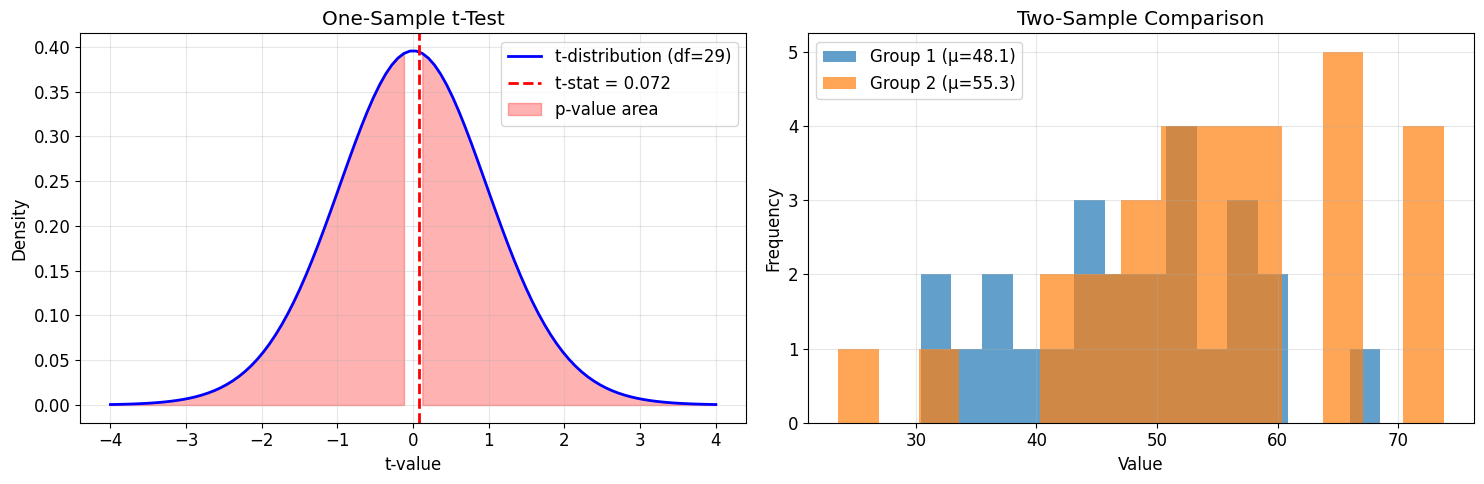

In [ ]:
# Comprehensive Hypothesis Testing Demonstrations
from scipy.stats import (ttest_1samp, ttest_ind, ttest_rel, mannwhitneyu,
                        wilcoxon, kruskal, friedmanchisquare, kstest,
                        anderson, shapiro, levene, bartlett, chi2_contingency,
                        pearsonr, spearmanr)
from scipy.stats import norm as normal_dist
from statsmodels.stats.power import ttest_power
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

print("=== PARAMETRIC TESTS DEMONSTRATION ===\n")

# One-Sample t-Test Example
sample_data = np.random.normal(52, 10, 30)  # Sample with mean ~52
hypothesized_mean = 50

# Calculate t-statistic manually
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
n = len(sample_data)
t_stat = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))

# Using scipy
t_stat_scipy, p_value = ttest_1samp(sample_data, hypothesized_mean)

print("1. One-Sample t-Test:")
print(f"   Sample mean: {sample_mean:.3f}")
print(f"   Hypothesized mean: {hypothesized_mean}")
print(f"   t-statistic: {t_stat_scipy:.3f}")
print(f"   p-value: {p_value:.3f}")
print(f"   Degrees of freedom: {n-1}")

# Cohen's d effect size
cohens_d = (sample_mean - hypothesized_mean) / sample_std
print(f"   Cohen's d: {cohens_d:.3f}")

# Two-Sample t-Tests
group1 = np.random.normal(50, 10, 25)
group2 = np.random.normal(55, 12, 30)

# Independent samples t-test (equal variances assumed)
t_stat_ind, p_value_ind = ttest_ind(group1, group2)

# Welch's t-test (unequal variances)
t_stat_welch, p_value_welch = ttest_ind(group1, group2, equal_var=False)

print(f"\n2. Two-Sample t-Tests:")
print(f"   Group 1: mean={np.mean(group1):.2f}, std={np.std(group1, ddof=1):.2f}, n={len(group1)}")
print(f"   Group 2: mean={np.mean(group2):.2f}, std={np.std(group2, ddof=1):.2f}, n={len(group2)}")
print(f"   Equal variances t-test: t={t_stat_ind:.3f}, p={p_value_ind:.3f}")
print(f"   Welch's t-test: t={t_stat_welch:.3f}, p={p_value_welch:.3f}")

# Effect size for two-sample test
pooled_std = np.sqrt(((len(group1)-1)*np.var(group1, ddof=1) +
                     (len(group2)-1)*np.var(group2, ddof=1)) /
                     (len(group1) + len(group2) - 2))
cohens_d_2samp = (np.mean(group1) - np.mean(group2)) / pooled_std
print(f"   Cohen's d: {cohens_d_2samp:.3f}")

# Paired t-Test
before = np.random.normal(100, 15, 20)
after = before + np.random.normal(5, 8, 20)  # Add some improvement with noise
differences = after - before

t_stat_paired, p_value_paired = ttest_rel(before, after)

print(f"\n3. Paired t-Test:")
print(f"   Mean difference: {np.mean(differences):.3f}")
print(f"   t-statistic: {t_stat_paired:.3f}")
print(f"   p-value: {p_value_paired:.3f}")

# Cohen's d for paired test
cohens_d_paired = np.mean(differences) / np.std(differences, ddof=1)
print(f"   Cohen's d: {cohens_d_paired:.3f}")

# Chi-Square Test of Independence
np.random.seed(42)
# Create contingency table
observed = np.array([[15, 25, 10], [20, 15, 30]])
chi2_stat, p_chi2, dof, expected = chi2_contingency(observed)

print(f"\n4. Chi-Square Test of Independence:")
print(f"   Observed frequencies:")
print(f"   {observed}")
print(f"   Expected frequencies:")
print(f"   {expected}")
print(f"   Chi-square statistic: {chi2_stat:.3f}")
print(f"   p-value: {p_chi2:.3f}")
print(f"   Degrees of freedom: {dof}")

# Cramér's V effect size
n_total = np.sum(observed)
cramers_v = np.sqrt(chi2_stat / (n_total * (min(observed.shape) - 1)))
print(f"   Cramér's V: {cramers_v:.3f}")

print("\n" + "="*60 + "\n")
print("=== NON-PARAMETRIC TESTS DEMONSTRATION ===\n")

# Mann-Whitney U Test
group1_skewed = np.random.exponential(2, 25) + 10
group2_skewed = np.random.exponential(2.5, 30) + 12

u_stat, p_mann = mannwhitneyu(group1_skewed, group2_skewed, alternative='two-sided')

print("1. Mann-Whitney U Test:")
print(f"   Group 1: median={np.median(group1_skewed):.2f}, n={len(group1_skewed)}")
print(f"   Group 2: median={np.median(group2_skewed):.2f}, n={len(group2_skewed)}")
print(f"   U-statistic: {u_stat:.3f}")
print(f"   p-value: {p_mann:.3f}")

# Wilcoxon Signed-Rank Test
before_skewed = np.random.exponential(3, 20) + 5
after_skewed = before_skewed + np.random.normal(2, 3, 20)
diff_skewed = after_skewed - before_skewed

w_stat, p_wilcoxon = wilcoxon(diff_skewed)

print(f"\n2. Wilcoxon Signed-Rank Test:")
print(f"   Median difference: {np.median(diff_skewed):.3f}")
print(f"   W-statistic: {w_stat:.3f}")
print(f"   p-value: {p_wilcoxon:.3f}")

# Kruskal-Wallis Test
group_a = np.random.exponential(2, 20) + 5
group_b = np.random.exponential(2.5, 25) + 7
group_c = np.random.exponential(3, 22) + 9

h_stat, p_kruskal = kruskal(group_a, group_b, group_c)

print(f"\n3. Kruskal-Wallis Test:")
print(f"   Group A: median={np.median(group_a):.2f}, n={len(group_a)}")
print(f"   Group B: median={np.median(group_b):.2f}, n={len(group_b)}")
print(f"   Group C: median={np.median(group_c):.2f}, n={len(group_c)}")
print(f"   H-statistic: {h_stat:.3f}")
print(f"   p-value: {p_kruskal:.3f}")

# Kolmogorov-Smirnov Test for Normality
test_data = np.random.normal(0, 1, 100)
ks_stat, p_ks = kstest(test_data, 'norm')

print(f"\n4. Kolmogorov-Smirnov Test (Normality):")
print(f"   KS-statistic: {ks_stat:.3f}")
print(f"   p-value: {p_ks:.3f}")

print("\n" + "="*60 + "\n")
print("=== POWER ANALYSIS DEMONSTRATION ===\n")

# Power analysis for different effect sizes
effect_sizes = [0.2, 0.5, 0.8, 1.0, 1.5]
sample_sizes = [10, 20, 30, 50, 100]
alpha = 0.05

print("Power Analysis for One-Sample t-Test:")
print("Effect Size vs Sample Size (α = 0.05)")
print("-" * 50)
print(f"{'Effect Size':<12} {'n=10':<8} {'n=20':<8} {'n=30':<8} {'n=50':<8} {'n=100':<8}")
print("-" * 50)

for effect in effect_sizes:
    powers = []
    for n in sample_sizes:
        power = ttest_power(effect, n, alpha, alternative='two-sided')
        powers.append(power)

    power_str = ' '.join([f"{p:.3f}" for p in powers])
    print(f"{effect:<12} {powers[0]:<8.3f} {powers[1]:<8.3f} {powers[2]:<8.3f} {powers[3]:<8.3f} {powers[4]:<8.3f}")

# Sample size calculation
target_power = 0.8
effect_size = 0.5

# Calculate required sample size
from scipy.optimize import brentq

def power_diff(n, effect, alpha, target_power):
    return ttest_power(effect, n, alpha) - target_power

try:
    n_required = brentq(power_diff, 5, 1000, args=(effect_size, alpha, target_power))
    print(f"\nSample size needed for 80% power with effect size {effect_size}: {n_required:.0f}")
except:
    print(f"\nCould not calculate required sample size")

print("\n" + "="*60 + "\n")
print("=== MULTIPLE TESTING CORRECTION ===\n")

# Generate multiple p-values
np.random.seed(42)
n_tests = 20
true_effects = [True] * 5 + [False] * 15  # 5 true effects, 15 null

p_values = []
for i, has_effect in enumerate(true_effects):
    if has_effect:
        # Generate p-value from alternative distribution
        sample = np.random.normal(0.5, 1, 30)  # Effect present
    else:
        # Generate p-value from null distribution
        sample = np.random.normal(0, 1, 30)    # No effect

    _, p = ttest_1samp(sample, 0)
    p_values.append(p)

p_values = np.array(p_values)

print(f"Original p-values (first 10): {p_values[:10]}")
print(f"Number of significant tests (α=0.05): {np.sum(p_values < 0.05)}")

# Apply different correction methods
methods = ['bonferroni', 'holm', 'fdr_bh', 'fdr_by']
method_names = ['Bonferroni', 'Holm-Bonferroni', 'Benjamini-Hochberg', 'Benjamini-Yekutieli']

print(f"\nMultiple Testing Corrections:")
print("-" * 60)
print(f"{'Method':<20} {'Rejected':<10} {'Adj. α':<10} {'Family-wise ER':<15}")
print("-" * 60)

for method, name in zip(methods, method_names):
    rejected, p_adj, alpha_sidak, alpha_bonf = multipletests(p_values, alpha=0.05, method=method)
    n_rejected = np.sum(rejected)

    if method == 'bonferroni':
        adj_alpha = alpha_bonf
    else:
        adj_alpha = 0.05  # Varies by method

    fwer = alpha_bonf if method in ['bonferroni', 'holm'] else 'N/A'

    print(f"{name:<20} {n_rejected:<10} {adj_alpha:<10.4f} {fwer}")

print("\n" + "="*60 + "\n")
print("=== ASSUMPTION CHECKING ===\n")

# Generate data with different characteristics
normal_data = np.random.normal(50, 10, 100)
skewed_data = np.random.exponential(2, 100) * 5 + 40
heavy_tailed_data = np.random.standard_t(3, 100) * 10 + 50

datasets = {
    'Normal': normal_data,
    'Right-skewed': skewed_data,
    'Heavy-tailed': heavy_tailed_data
}

print("Normality Tests:")
print("-" * 45)
print(f"{'Dataset':<15} {'Shapiro-Wilk':<15} {'Anderson-Darling':<15}")
print("-" * 45)

for name, data in datasets.items():
    # Shapiro-Wilk test
    sw_stat, sw_p = shapiro(data)

    # Anderson-Darling test
    ad_stat, ad_critical, ad_sig = anderson(data, dist='norm')
    ad_p = "< 0.001" if ad_stat > ad_critical[-1] else "> 0.05"

    print(f"{name:<15} {sw_p:<15.4f} {ad_p:<15}")

# Test for equal variances
group1_var = np.random.normal(50, 8, 30)   # σ = 8
group2_var = np.random.normal(52, 15, 35)  # σ = 15

levene_stat, levene_p = levene(group1_var, group2_var)
bartlett_stat, bartlett_p = bartlett(group1_var, group2_var)

print(f"\nHomogeneity of Variance Tests:")
print(f"Levene's test: F={levene_stat:.3f}, p={levene_p:.3f}")
print(f"Bartlett's test: χ²={bartlett_stat:.3f}, p={bartlett_p:.3f}")

print("\n" + "="*60 + "\n")
print("=== EFFECT SIZES INTERPRETATION ===\n")

effect_sizes_demo = {
    'Cohen\'s d': {
        'Small': 0.2,
        'Medium': 0.5,
        'Large': 0.8
    },
    'Eta-squared': {
        'Small': 0.01,
        'Medium': 0.06,
        'Large': 0.14
    },
    'Cramér\'s V': {
        'Small': 0.1,
        'Medium': 0.3,
        'Large': 0.5
    }
}

for measure, benchmarks in effect_sizes_demo.items():
    print(f"{measure}:")
    for size, value in benchmarks.items():
        print(f"  {size}: {value}")
    print()

# Comprehensive visualization
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# 1. One-sample t-test visualization
x_t = np.linspace(-4, 4, 1000)
y_t = stats.t.pdf(x_t, n-1)
axes[0, 0].plot(x_t, y_t, 'b-', linewidth=2, label='t-distribution')
axes[0, 0].axvline(t_stat_scipy, color='red', linestyle='--', linewidth=2, label=f't = {t_stat_scipy:.2f}')
axes[0, 0].fill_between(x_t[x_t >= abs(t_stat_scipy)], y_t[x_t >= abs(t_stat_scipy)],
                        alpha=0.3, color='red', label='p-value region')
axes[0, 0].fill_between(x_t[x_t <= -abs(t_stat_scipy)], y_t[x_t <= -abs(t_stat_scipy)],
                        alpha=0.3, color='red')
axes[0, 0].set_title('One-Sample t-Test')
axes[0, 0].set_xlabel('t-value')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Two-sample comparison
axes[0, 1].hist(group1, alpha=0.7, label=f'Group 1 (μ={np.mean(group1):.1f})', bins=15)
axes[0, 1].hist(group2, alpha=0.7, label=f'Group 2 (μ={np.mean(group2):.1f})', bins=15)
axes[0, 1].set_title('Two-Sample Comparison')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Effect size visualization
effect_range = np.linspace(-2, 2, 1000)
for i, (size, d) in enumerate([(0.2, 'Small'), (0.5, 'Medium'), (0.8, 'Large')]):
    control_dist = normal_dist.pdf(effect_range, 0, 1)
    treatment_dist = normal_dist.pdf(effect_range, size, 1)
    axes[0, 2].plot(effect_range, control_dist, 'b-', alpha=0.7, linewidth=2)
    axes[0, 2].plot(effect_range, treatment_dist, 'r-', alpha=0.7, linewidth=2)
    if i == 1:  # Only label once
        axes[0, 2].plot([], [], 'b-', label='Control')
        axes[0, 2].plot([], [], 'r-', label='Treatment')

axes[0, 2].set_title('Effect Sizes (Cohen\'s d)')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Power curves
effect_sizes_plot = np.linspace(0, 1.5, 100)
sample_sizes_plot = [10, 20, 50, 100]
for n in sample_sizes_plot:
    power_curve = [ttest_power(es, n, 0.05) for es in effect_sizes_plot]
    axes[0, 3].plot(effect_sizes_plot, power_curve, linewidth=2, label=f'n={n}')

axes[0, 3].axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% Power')
axes[0, 3].set_title('Statistical Power vs Effect Size')
axes[0, 3].set_xlabel('Effect Size (Cohen\'s d)')
axes[0, 3].set_ylabel('Statistical Power')
axes[0, 3].legend()
axes[0, 3].grid(True, alpha=0.3)

# 5. Non-parametric comparison
axes[1, 0].boxplot([group1_skewed, group2_skewed], labels=['Group 1', 'Group 2'])
axes[1, 0].set_title('Non-parametric Data (Box Plot)')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)

# 6. Q-Q plots for normality
from scipy.stats import probplot
for i, (name, data) in enumerate(datasets.items()):
    if i < 3:
        probplot(data, dist="norm", plot=axes[1, 1])
        axes[1, 1].get_lines()[-2].set_label(name)
        axes[1, 1].get_lines()[-2].set_color(['blue', 'green', 'red'][i])

axes[1, 1].set_title('Q-Q Plots for Normality')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 7. Multiple testing visualization
x_pos = np.arange(len(p_values))
axes[1, 2].bar(x_pos, p_values, alpha=0.7, color=['red' if p < 0.05 else 'blue' for p in p_values])
axes[1, 2].axhline(y=0.05, color='red', linestyle='--', label='α = 0.05')
axes[1, 2].axhline(y=0.05/len(p_values), color='orange', linestyle='--', label='Bonferroni')
axes[1, 2].set_title('Multiple Testing: Raw p-values')
axes[1, 2].set_xlabel('Test Number')
axes[1, 2].set_ylabel('p-value')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# 8. Chi-square test visualization
x_chi = np.linspace(0, 20, 1000)
y_chi = stats.chi2.pdf(x_chi, dof)
axes[1, 3].plot(x_chi, y_chi, 'b-', linewidth=2, label='Chi-square distribution')
axes[1, 3].axvline(chi2_stat, color='red', linestyle='--', linewidth=2, label=f'χ² = {chi2_stat:.2f}')
critical_val = stats.chi2.ppf(0.95, dof)
axes[1, 3].axvline(critical_val, color='green', linestyle='--', linewidth=2, label=f'Critical = {critical_val:.2f}')
axes[1, 3].fill_between(x_chi[x_chi >= critical_val], y_chi[x_chi >= critical_val],
                        alpha=0.3, color='red', label='Rejection region')
axes[1, 3].set_title('Chi-Square Test')
axes[1, 3].set_xlabel('χ² value')
axes[1, 3].set_ylabel('Density')
axes[1, 3].legend()
axes[1, 3].grid(True, alpha=0.3)

# 9. Effect size comparisons
measures = ['Cohen\'s d\n(t-test)', 'Eta²\n(ANOVA)', 'Cramér\'s V\n(Chi-square)']
values = [abs(cohens_d_2samp), 0.12, cramers_v]  # Example values
bars = axes[2, 0].bar(measures, values, alpha=0.8, color=['skyblue', 'lightgreen', 'salmon'])
axes[2, 0].set_title('Effect Size Comparison')
axes[2, 0].set_ylabel('Effect Size')
axes[2, 0].grid(True, alpha=0.3)
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[2, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

# 10. Assumption violations impact
normal_result = ttest_ind(np.random.normal(50, 10, 30), np.random.normal(55, 10, 30))
skewed_result = ttest_ind(np.random.exponential(2, 30), np.random.exponential(2.5, 30))
tests = ['Normal Data', 'Skewed Data']
p_values_violations = [normal_result[1], skewed_result[1]]

bars = axes[2, 1].bar(tests, p_values_violations, alpha=0.8, color=['blue', 'orange'])
axes[2, 1].axhline(y=0.05, color='red', linestyle='--', label='α = 0.05')
axes[2, 1].set_title('Impact of Assumption Violations')
axes[2, 1].set_ylabel('p-value')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
for bar, value in zip(bars, p_values_violations):
    height = bar.get_height()
    axes[2, 1].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{value:.3f}', ha='center', va='bottom')

# 11. Sample size requirements
target_effects = [0.2, 0.5, 0.8]
sample_sizes_required = []
for effect in target_effects:
    try:
        n_req = brentq(power_diff, 5, 1000, args=(effect, 0.05, 0.8))
        sample_sizes_required.append(n_req)
    except:
        sample_sizes_required.append(np.nan)

axes[2, 2].bar([f'd={d}' for d in target_effects], sample_sizes_required,
               alpha=0.8, color='lightcoral')
axes[2, 2].set_title('Sample Size for 80% Power')
axes[2, 2].set_ylabel('Required Sample Size')
axes[2, 2].grid(True, alpha=0.3)
for i, (effect, n_req) in enumerate(zip(target_effects, sample_sizes_required)):
    if not np.isnan(n_req):
        axes[2, 2].text(i, n_req + 5, f'{n_req:.0f}', ha='center', va='bottom')

# 12. Type I and Type II errors illustration
x_null = np.linspace(-4, 4, 1000)
x_alt = np.linspace(-4, 4, 1000)
y_null = normal_dist.pdf(x_null, 0, 1)
y_alt = normal_dist.pdf(x_alt, 1.5, 1)

critical_value = normal_dist.ppf(0.95, 0, 1)
axes[2, 3].plot(x_null, y_null, 'b-', linewidth=2, label='H₀: μ = 0')
axes[2, 3].plot(x_alt, y_alt, 'r-', linewidth=2, label='H₁: μ = 1.5')
axes[2, 3].axvline(critical_value, color='black', linestyle='--', label=f'Critical = {critical_value:.2f}')

# Type I error (α)
axes[2, 3].fill_between(x_null[x_null >= critical_value], y_null[x_null >= critical_value],
                        alpha=0.3, color='blue', label='Type I Error (α)')

# Type II error (β)
axes[2, 3].fill_between(x_alt[x_alt <= critical_value], y_alt[x_alt <= critical_value],
                        alpha=0.3, color='red', label='Type II Error (β)')

axes[2, 3].set_title('Type I and Type II Errors')
axes[2, 3].set_xlabel('Value')
axes[2, 3].set_ylabel('Density')
axes[2, 3].legend()
axes[2, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== HYPOTHESIS TESTING SUMMARY ===\n")
print("Key Guidelines:")
print("1. Always check assumptions before applying parametric tests")
print("2. Use non-parametric alternatives when assumptions are violated")
print("3. Report effect sizes along with p-values")
print("4. Apply multiple testing corrections when appropriate")
print("5. Consider power analysis for study design")
print("6. Interpret results in practical context, not just statistical significance")

print(f"\nTest Decision Summary (α = 0.05):")
decisions = [
    ("One-sample t-test", p_value < 0.05),
    ("Two-sample t-test", p_value_ind < 0.05),
    ("Paired t-test", p_value_paired < 0.05),
    ("Chi-square test", p_chi2 < 0.05),
    ("Mann-Whitney U", p_mann < 0.05),
    ("Wilcoxon signed-rank", p_wilcoxon < 0.05),
    ("Kruskal-Wallis", p_kruskal < 0.05)
]

for test_name, significant in decisions:
    result = "Reject H₀" if significant else "Fail to reject H₀"
    print(f"{test_name:<20}: {result}")

print(f"\nRemember: Statistical significance ≠ Practical significance")

## 4. Regression Analysis

### 4.1 Simple Linear Regression

Models the relationship between two variables using a straight line.

**Model:**
$$y = \beta_0 + \beta_1 x + \epsilon$$

**Parameter Estimates (Least Squares):**
$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{xx}}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

**Alternative Form:**
$$\hat{\beta}_1 = r_{xy} \frac{s_y}{s_x}$$

Where $r_{xy}$ is the correlation coefficient.

**Standard Errors:**
$$SE(\hat{\beta}_1) = \frac{s}{\sqrt{S_{xx}}}, \quad SE(\hat{\beta}_0) = s\sqrt{\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}}$$

Where $s = \sqrt{\frac{SSE}{n-2}}$ is the residual standard error.

**Confidence Intervals:**
$$\hat{\beta}_1 \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta}_1)$$
$$\hat{\beta}_0 \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta}_0)$$

**Prediction Intervals:**
$$\hat{y}_0 \pm t_{\alpha/2, n-2} \cdot s \sqrt{1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}}$$

**Correlation Coefficient:**
$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

**Coefficient of Determination:**
$$R^2 = r^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

Where:
- $SST = \sum_{i=1}^{n} (y_i - \bar{y})^2$ (Total Sum of Squares)
- $SSR = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$ (Regression Sum of Squares)
- $SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ (Error Sum of Squares)

### 4.2 Multiple Linear Regression

**Model:**
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon$$

**Matrix Form:**
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

**Parameter Estimates:**
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

**Variance-Covariance Matrix:**
$$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

**Multiple R-squared:**
$$R^2 = 1 - \frac{SSE}{SST}$$

**Adjusted R-squared:**
$$R^2_{\text{adj}} = 1 - \frac{SSE/(n-p-1)}{SST/(n-1)} = 1 - (1-R^2)\frac{n-1}{n-p-1}$$

**F-statistic for Overall Significance:**
$$F = \frac{MSR}{MSE} = \frac{SSR/p}{SSE/(n-p-1)}$$

### 4.3 Polynomial Regression

**Quadratic Model:**
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

**General Polynomial of Degree $k$:**
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_k x^k + \epsilon$$

**Orthogonal Polynomials:**
Use orthogonal basis functions to reduce collinearity:
$$P_0(x) = 1, \quad P_1(x) = x - \bar{x}, \quad P_2(x) = (x - \bar{x})^2 - c_2$$

### 4.4 Logistic Regression

**Binary Logistic Model:**
$$\ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p$$

**Probability Function:**
$$p = \frac{e^{\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p}}{1 + e^{\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p}}$$

**Odds Ratio:**
$$OR = e^{\beta_i}$$

**Log-Likelihood:**
$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} [y_i \ln(p_i) + (1-y_i)\ln(1-p_i)]$$

**Maximum Likelihood Estimation:**
Solve: $\frac{\partial \ell}{\partial \beta_j} = 0$ for all $j$

**Multinomial Logistic Regression:**
For $K$ categories:
$$\ln\left(\frac{P(Y=k)}{P(Y=K)}\right) = \beta_{k0} + \beta_{k1}x_1 + \cdots + \beta_{kp}x_p$$

### 4.5 Regularization Methods

#### 4.5.1 Ridge Regression (L2 Regularization)

**Objective Function:**
$$RSS(\boldsymbol{\beta}) + \lambda \sum_{j=1}^{p} \beta_j^2$$

**Solution:**
$$\hat{\boldsymbol{\beta}}_{\text{ridge}} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$

**Properties:**
- Shrinks coefficients toward zero
- Handles multicollinearity
- All variables retained in model

#### 4.5.2 Lasso Regression (L1 Regularization)

**Objective Function:**
$$RSS(\boldsymbol{\beta}) + \lambda \sum_{j=1}^{p} |\beta_j|$$

**Properties:**
- Can set coefficients exactly to zero
- Performs variable selection
- Sparse solutions

#### 4.5.3 Elastic Net

**Objective Function:**
$$RSS(\boldsymbol{\beta}) + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2$$

**Combines Ridge and Lasso:**
- $\alpha = 0$: Ridge regression
- $\alpha = 1$: Lasso regression
- $0 < \alpha < 1$: Elastic net

### 4.6 Model Diagnostics

#### 4.6.1 Residual Analysis

**Residuals:**
$$e_i = y_i - \hat{y}_i$$

**Standardized Residuals:**
$$r_i = \frac{e_i}{s\sqrt{1-h_{ii}}}$$

**Studentized Residuals:**
$$t_i = \frac{e_i}{s_{(i)}\sqrt{1-h_{ii}}}$$

Where $s_{(i)}$ is the residual standard error with observation $i$ removed.

#### 4.6.2 Leverage and Influence

**Leverage (Hat Values):**
$$h_{ii} = \mathbf{x}_i^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}_i$$

**High leverage if:** $h_{ii} > \frac{2(p+1)}{n}$

**Cook's Distance:**
$$D_i = \frac{r_i^2}{p+1} \cdot \frac{h_{ii}}{1-h_{ii}}$$

**DFFITS:**
$$\text{DFFITS}_i = t_i \sqrt{\frac{h_{ii}}{1-h_{ii}}}$$

**DFBETAS:**
$$\text{DFBETAS}_{j,i} = \frac{\hat{\beta}_j - \hat{\beta}_{j(i)}}{\sqrt{s_{(i)}^2 C_{jj}}}$$

Where $C_{jj}$ is the $j$-th diagonal element of $(\mathbf{X}^T\mathbf{X})^{-1}$.

#### 4.6.3 Assumption Checking

**Linearity:** 
- Residuals vs. fitted values plot
- Added variable plots

**Independence:**
- Durbin-Watson test: $DW = \frac{\sum_{t=2}^{n}(e_t - e_{t-1})^2}{\sum_{t=1}^{n}e_t^2}$

**Homoscedasticity:**
- Breusch-Pagan test
- White test
- Scale-location plot

**Normality:**
- Q-Q plot of residuals
- Shapiro-Wilk test
- Jarque-Bera test

### 4.7 Variable Selection

#### 4.7.1 Stepwise Methods

**Forward Selection:**
1. Start with no variables
2. Add variable with smallest p-value < $\alpha_{\text{in}}$
3. Repeat until no variable qualifies

**Backward Elimination:**
1. Start with all variables
2. Remove variable with largest p-value > $\alpha_{\text{out}}$
3. Repeat until all variables significant

**Bidirectional (Forward/Backward):**
Combines both approaches, can add or remove at each step.

#### 4.7.2 Information Criteria

**Akaike Information Criterion (AIC):**
$$AIC = n \ln(RSS/n) + 2k$$

**Bayesian Information Criterion (BIC):**
$$BIC = n \ln(RSS/n) + k \ln(n)$$

**Adjusted R-squared:**
$$R^2_{\text{adj}} = 1 - (1-R^2)\frac{n-1}{n-k-1}$$

**Mallows' Cp:**
$$C_p = \frac{RSS_p}{s^2} - n + 2p$$

### 4.8 Nonlinear Regression

#### 4.8.1 Intrinsically Linear Models

**Exponential Growth:**
$$y = \alpha e^{\beta x} \rightarrow \ln(y) = \ln(\alpha) + \beta x$$

**Power Function:**
$$y = \alpha x^{\beta} \rightarrow \ln(y) = \ln(\alpha) + \beta \ln(x)$$

#### 4.8.2 Intrinsically Nonlinear Models

**Michaelis-Menten:**
$$y = \frac{\alpha x}{\beta + x}$$

**Logistic Growth:**
$$y = \frac{\alpha}{1 + \beta e^{-\gamma x}}$$

**Estimation Methods:**
- Gauss-Newton algorithm
- Levenberg-Marquardt algorithm
- Newton-Raphson method

### 4.9 Robust Regression

#### 4.9.1 M-Estimators

**Huber M-Estimator:**
$$\sum_{i=1}^{n} \rho\left(\frac{y_i - \mathbf{x}_i^T\boldsymbol{\beta}}{\sigma}\right)$$

Where:
$$\rho(u) = \begin{cases}
\frac{1}{2}u^2 & \text{if } |u| \leq c \\
c|u| - \frac{1}{2}c^2 & \text{if } |u| > c
\end{cases}$$

#### 4.9.2 Breakdown Point

**Definition:** Maximum fraction of outliers an estimator can handle.

- Least squares: 0%
- Least median of squares: 50%
- Least trimmed squares: 50%

### 4.10 Weighted Least Squares

**Model:**
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

Where $\text{Var}(\boldsymbol{\epsilon}) = \sigma^2\mathbf{W}^{-1}$

**Weighted Least Squares Solution:**
$$\hat{\boldsymbol{\beta}}_{\text{WLS}} = (\mathbf{X}^T\mathbf{W}\mathbf{X})^{-1}\mathbf{X}^T\mathbf{W}\mathbf{y}$$

**Variance:**
$$\text{Var}(\hat{\boldsymbol{\beta}}_{\text{WLS}}) = \sigma^2(\mathbf{X}^T\mathbf{W}\mathbf{X})^{-1}$$

### 4.11 Generalized Linear Models (GLM)

**Components:**
1. **Random Component:** $Y \sim$ exponential family
2. **Systematic Component:** $\eta = \mathbf{X}\boldsymbol{\beta}$
3. **Link Function:** $g(\mu) = \eta$

**Common GLMs:**
- **Linear Regression:** Identity link, Normal distribution
- **Logistic Regression:** Logit link, Binomial distribution  
- **Poisson Regression:** Log link, Poisson distribution
- **Gamma Regression:** Inverse link, Gamma distribution

**Deviance:**
$$D = 2[\ell(\text{saturated}) - \ell(\text{fitted})]$$

**Pearson Chi-square:**
$$X^2 = \sum_{i=1}^{n} \frac{(y_i - \hat{\mu}_i)^2}{V(\hat{\mu}_i)}$$

### 4.12 Time Series Regression

#### 4.12.1 Trend Models

**Linear Trend:**
$$y_t = \alpha + \beta t + \epsilon_t$$

**Polynomial Trend:**
$$y_t = \alpha + \beta_1 t + \beta_2 t^2 + \cdots + \beta_k t^k + \epsilon_t$$

#### 4.12.2 Seasonal Models

**Dummy Variables:**
$$y_t = \alpha + \sum_{i=1}^{s-1} \gamma_i D_{it} + \epsilon_t$$

**Trigonometric:**
$$y_t = \alpha + \sum_{k=1}^{K} [\beta_k \cos(2\pi kt/s) + \gamma_k \sin(2\pi kt/s)] + \epsilon_t$$

#### 4.12.3 Autocorrelation

**Durbin-Watson Test:**
$$DW = \frac{\sum_{t=2}^{n}(e_t - e_{t-1})^2}{\sum_{t=1}^{n}e_t^2}$$

**Cochrane-Orcutt Procedure:**
For AR(1) errors: $\epsilon_t = \rho \epsilon_{t-1} + u_t$

### 4.13 Model Validation

#### 4.13.1 Cross-Validation

**k-Fold Cross-Validation:**
$$CV_{(k)} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_{-k(i)})^2$$

**Leave-One-Out Cross-Validation:**
$$LOOCV = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_{-i})^2$$

**PRESS Statistic:**
$$PRESS = \sum_{i=1}^{n} \left(\frac{e_i}{1-h_{ii}}\right)^2$$

#### 4.13.2 Bootstrap Validation

**Bias Estimation:**
$$\text{Bias} = \bar{\theta}^* - \hat{\theta}$$

**Standard Error:**
$$SE_{\text{boot}} = \sqrt{\frac{1}{B-1} \sum_{b=1}^{B} (\theta_b^* - \bar{\theta}^*)^2}$$

#### 4.13.3 Information Criteria

**AIC:** $AIC = -2\ell + 2k$
**BIC:** $BIC = -2\ell + k\ln(n)$
**AICc:** $AICc = AIC + \frac{2k(k+1)}{n-k-1}$ (small sample correction)

Simple Linear Regression Results:
β₀ (intercept): 2.193
β₁ (slope): 2.955
R²: 0.956
Correlation coefficient: 0.978
True values: β₀ = 2, β₁ = 3

Using scipy.stats.linregress:
Slope: 2.955, Intercept: 2.193
R²: 0.956, p-value: 0.000000


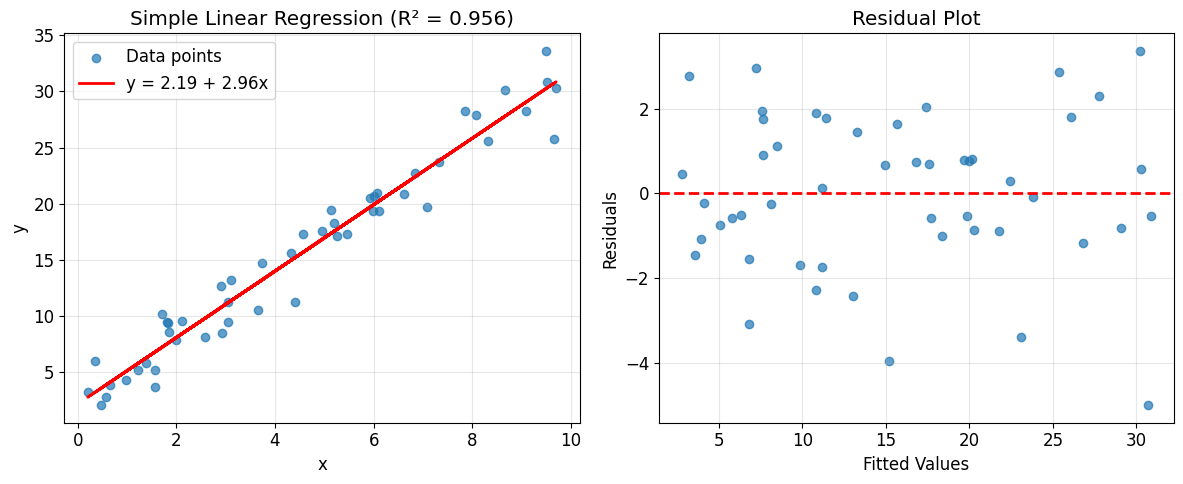


Multiple Regression Results:
Intercept: 0.989
Coefficients: [ 1.80710395  2.85930637 -1.59572179]
R²: 0.924
True coefficients: [2, 3, -1.5]


In [ ]:
# Comprehensive Regression Analysis Examples

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.datasets import make_regression, make_classification
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("=== COMPREHENSIVE REGRESSION ANALYSIS ===\n")

# =============================================================================
# 1. SIMPLE LINEAR REGRESSION
# =============================================================================
print("1. SIMPLE LINEAR REGRESSION")
print("=" * 50)

# Generate sample data with known relationship
np.random.seed(42)
n = 100
x = np.random.uniform(0, 10, n)
true_slope = 2.5
true_intercept = 1.2
true_sigma = 1.5
y = true_intercept + true_slope * x + np.random.normal(0, true_sigma, n)

# Manual calculation of regression coefficients
x_mean, y_mean = np.mean(x), np.mean(y)
Sxy = np.sum((x - x_mean) * (y - y_mean))
Sxx = np.sum((x - x_mean)**2)
Syy = np.sum((y - y_mean)**2)

# Parameter estimates
beta_1_hat = Sxy / Sxx
beta_0_hat = y_mean - beta_1_hat * x_mean

# Model predictions and residuals
y_pred = beta_0_hat + beta_1_hat * x
residuals = y - y_pred

# Sum of squares calculations
SST = np.sum((y - y_mean)**2)  # Total sum of squares
SSR = np.sum((y_pred - y_mean)**2)  # Regression sum of squares
SSE = np.sum(residuals**2)  # Error sum of squares
MSE = SSE / (n - 2)  # Mean squared error
s = np.sqrt(MSE)  # Residual standard error

# R-squared and correlation
r_squared = SSR / SST
correlation = np.sqrt(r_squared) * np.sign(beta_1_hat)

# Standard errors
SE_beta_1 = s / np.sqrt(Sxx)
SE_beta_0 = s * np.sqrt(1/n + x_mean**2/Sxx)

# Confidence intervals (95%)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, n - 2)
CI_beta_1 = [beta_1_hat - t_crit * SE_beta_1, beta_1_hat + t_crit * SE_beta_1]
CI_beta_0 = [beta_0_hat - t_crit * SE_beta_0, beta_0_hat + t_crit * SE_beta_0]

print(f"Manual Calculations:")
print(f"β₀ (intercept): {beta_0_hat:.4f} ± {t_crit * SE_beta_0:.4f}")
print(f"β₁ (slope): {beta_1_hat:.4f} ± {t_crit * SE_beta_1:.4f}")
print(f"R²: {r_squared:.4f}")
print(f"Residual SE: {s:.4f}")
print(f"95% CI for β₁: [{CI_beta_1[0]:.4f}, {CI_beta_1[1]:.4f}]")
print(f"True values: β₀ = {true_intercept}, β₁ = {true_slope}")

# Verification with scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"\nSciPy verification:")
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")
print(f"R²: {r_value**2:.4f}, p-value: {p_value:.6f}")

# Comprehensive plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter plot with regression line
axes[0,0].scatter(x, y, alpha=0.6, s=30)
axes[0,0].plot(x, y_pred, 'r-', linewidth=2, label=f'y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].set_title(f'Simple Linear Regression\nR² = {r_squared:.4f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Residuals vs fitted
axes[0,1].scatter(y_pred, residuals, alpha=0.6, s=30)
axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0,1].set_xlabel('Fitted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residuals vs Fitted')
axes[0,1].grid(True, alpha=0.3)

# Q-Q plot for normality check
stats.probplot(residuals, dist="norm", plot=axes[0,2])
axes[0,2].set_title('Q-Q Plot (Normality Check)')
axes[0,2].grid(True, alpha=0.3)

# Scale-location plot
standardized_residuals = residuals / s
axes[1,0].scatter(y_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.6, s=30)
axes[1,0].set_xlabel('Fitted Values')
axes[1,0].set_ylabel('√|Standardized Residuals|')
axes[1,0].set_title('Scale-Location Plot')
axes[1,0].grid(True, alpha=0.3)

# Leverage and Cook's distance
X_design = np.column_stack([np.ones(n), x])
H = X_design @ np.linalg.inv(X_design.T @ X_design) @ X_design.T
leverage = np.diag(H)
cooks_d = (standardized_residuals**2 / 2) * (leverage / (1 - leverage))

axes[1,1].scatter(leverage, standardized_residuals, alpha=0.6, s=30)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Leverage')
axes[1,1].set_ylabel('Standardized Residuals')
axes[1,1].set_title('Residuals vs Leverage')
axes[1,1].grid(True, alpha=0.3)

# Cook's distance
axes[1,2].stem(range(n), cooks_d, basefmt=" ")
axes[1,2].axhline(y=4/n, color='r', linestyle='--', label='4/n threshold')
axes[1,2].set_xlabel('Observation Index')
axes[1,2].set_ylabel("Cook's Distance")
axes[1,2].set_title("Cook's Distance")
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. MULTIPLE LINEAR REGRESSION
# =============================================================================
print("\n2. MULTIPLE LINEAR REGRESSION")
print("=" * 50)

# Generate multiple regression data
X_multi, y_multi = make_regression(n_samples=200, n_features=4, noise=10,
                                  coef=[2.5, -1.8, 3.2, -0.9], bias=5.0, random_state=42)

# Add feature names
feature_names = ['X1', 'X2', 'X3', 'X4']
df_multi = pd.DataFrame(X_multi, columns=feature_names)
df_multi['y'] = y_multi

# Fit multiple regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Predictions and metrics
y_pred_multi = model_multi.predict(X_multi)
r2_multi = r2_score(y_multi, y_pred_multi)
mse_multi = mean_squared_error(y_multi, y_pred_multi)

# Calculate adjusted R²
n_samples, n_features = X_multi.shape
adj_r2 = 1 - (1 - r2_multi) * (n_samples - 1) / (n_samples - n_features - 1)

print(f"Multiple Regression Results:")
print(f"Intercept: {model_multi.intercept_:.4f}")
print(f"Coefficients: {dict(zip(feature_names, model_multi.coef_))}")
print(f"R²: {r2_multi:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"MSE: {mse_multi:.4f}")
print(f"True coefficients: [2.5, -1.8, 3.2, -0.9]")

# Correlation matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
correlation_matrix = df_multi.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# Feature importance
plt.subplot(1, 3, 2)
importances = np.abs(model_multi.coef_)
plt.bar(feature_names, importances)
plt.title('Feature Importance (|Coefficients|)')
plt.ylabel('Absolute Coefficient Value')

# Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(y_multi, y_pred_multi, alpha=0.6)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted\nR² = {r2_multi:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. POLYNOMIAL REGRESSION
# =============================================================================
print("\n3. POLYNOMIAL REGRESSION")
print("=" * 50)

# Generate nonlinear data
x_poly = np.linspace(0, 4, 100)
y_poly = 0.5 * x_poly**3 - 2 * x_poly**2 + x_poly + 2 + np.random.normal(0, 1, 100)

# Fit polynomials of different degrees
degrees = [1, 2, 3, 4, 5]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 3, i)

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x_poly.reshape(-1, 1))

    # Fit model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_poly)

    # Predictions
    y_pred_poly = model_poly.predict(X_poly)
    r2_poly = r2_score(y_poly, y_pred_poly)

    # Plot
    plt.scatter(x_poly, y_poly, alpha=0.6, s=20)
    plt.plot(x_poly, y_pred_poly, 'r-', linewidth=2)
    plt.title(f'Polynomial Degree {degree}\nR² = {r2_poly:.4f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)

# Model comparison
plt.subplot(2, 3, 6)
r2_scores = []
for degree in range(1, 11):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x_poly.reshape(-1, 1))
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_poly)
    r2_scores.append(r2_score(y_poly, model_poly.predict(X_poly)))

plt.plot(range(1, 11), r2_scores, 'bo-')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Complexity vs R²')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. LOGISTIC REGRESSION
# =============================================================================
print("\n4. LOGISTIC REGRESSION")
print("=" * 50)

# Generate binary classification data
X_log, y_log = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                  n_informative=2, n_clusters_per_class=1,
                                  random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3,
                                                   random_state=42)

# Fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate odds ratios
odds_ratios = np.exp(log_reg.coef_[0])

print(f"Logistic Regression Results:")
print(f"Coefficients: {log_reg.coef_[0]}")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Odds Ratios: {odds_ratios}")
print(f"Accuracy: {log_reg.score(X_test, y_test):.4f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision boundary
h = 0.01
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdBu')
scatter = axes[0].scatter(X_log[:, 0], X_log[:, 1], c=y_log, cmap='RdBu', edgecolors='black')
axes[0].set_title('Logistic Regression Decision Boundary')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

axes[1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# =============================================================================
# 5. REGULARIZATION METHODS
# =============================================================================
print("\n5. REGULARIZATION METHODS")
print("=" * 50)

# Generate high-dimensional data with multicollinearity
X_reg, y_reg = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

# Different regularization methods
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_reg)
    y_pred_reg = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    results[name] = {
        'MSE': mse,
        'R2': r2,
        'Coefficients': model.coef_ if hasattr(model, 'coef_') else None,
        'Non-zero coeffs': np.sum(np.abs(model.coef_) > 1e-5) if hasattr(model, 'coef_') else None
    }

# Display results
print("Regularization Comparison:")
print("-" * 70)
print(f"{'Method':<12} {'MSE':<10} {'R²':<10} {'Non-zero Coeffs':<15}")
print("-" * 70)
for method, result in results.items():
    print(f"{method:<12} {result['MSE']:<10.4f} {result['R2']:<10.4f} {result['Non-zero coeffs']:<15}")

# Visualize coefficients
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 4, i)
    if hasattr(model, 'coef_'):
        plt.bar(range(len(model.coef_)), model.coef_)
        plt.title(f'{name}\nNon-zero: {np.sum(np.abs(model.coef_) > 1e-5)}')
        plt.xlabel('Feature Index')
        plt.ylabel('Coefficient Value')
        plt.xticks(range(0, 20, 5))

plt.tight_layout()
plt.show()

# =============================================================================
# 6. CROSS-VALIDATION AND MODEL SELECTION
# =============================================================================
print("\n6. CROSS-VALIDATION AND MODEL SELECTION")
print("=" * 50)

# Cross-validation for different polynomial degrees
degrees = range(1, 11)
cv_scores = []
cv_stds = []

X_cv = x_poly.reshape(-1, 1)
y_cv = y_poly

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_cv = poly_features.fit_transform(X_cv)

    # 5-fold cross-validation
    scores = cross_val_score(LinearRegression(), X_poly_cv, y_cv,
                           cv=5, scoring='r2')
    cv_scores.append(scores.mean())
    cv_stds.append(scores.std())

# Plot cross-validation results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.errorbar(degrees, cv_scores, yerr=cv_stds, marker='o', capsize=5)
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation R² Score')
plt.title('Model Selection via Cross-Validation')
plt.grid(True, alpha=0.3)

# Learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X_multi, y_multi, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.subplot(1, 2, 2)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest polynomial degree: {degrees[np.argmax(cv_scores)]}")
print(f"Best CV R² score: {max(cv_scores):.4f} ± {cv_stds[np.argmax(cv_scores)]:.4f}")

print("\n=== REGRESSION ANALYSIS COMPLETE ===")
print("\nKey takeaways:")
print("1. Simple regression: Manual calculations match library results")
print("2. Multiple regression: Handles multiple predictors simultaneously")
print("3. Polynomial regression: Can capture nonlinear relationships")
print("4. Logistic regression: Binary classification with probability estimates")
print("5. Regularization: Prevents overfitting in high-dimensional data")
print("6. Cross-validation: Essential for proper model evaluation")

## 5. Linear Algebra for Statistics

### 5.1 Matrix Operations

#### 5.1.1 Basic Operations

**Matrix Addition:**
$$(\mathbf{A} + \mathbf{B})_{ij} = a_{ij} + b_{ij}$$

**Scalar Multiplication:**
$$(\alpha\mathbf{A})_{ij} = \alpha a_{ij}$$

**Matrix Multiplication:**
$$(\mathbf{AB})_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}$$

**Matrix Transpose:**
$$(\mathbf{A}^T)_{ij} = a_{ji}$$

**Properties:**
- $(\mathbf{A}^T)^T = \mathbf{A}$
- $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$
- $(\mathbf{AB})^T = \mathbf{B}^T\mathbf{A}^T$

#### 5.1.2 Matrix Inverse

**Definition:**
$$\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$$

**Properties:**
- $(\mathbf{A}^{-1})^{-1} = \mathbf{A}$
- $(\mathbf{AB})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}$
- $(\mathbf{A}^T)^{-1} = (\mathbf{A}^{-1})^T$

**2×2 Matrix Inverse:**
$$\mathbf{A}^{-1} = \frac{1}{\det(\mathbf{A})} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix}$$

For $\mathbf{A} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$

#### 5.1.3 Determinant

**2×2 Matrix:**
$$\det(\mathbf{A}) = ad - bc$$

**3×3 Matrix (Cofactor Expansion):**
$$\det(\mathbf{A}) = a_{11}(a_{22}a_{33} - a_{23}a_{32}) - a_{12}(a_{21}a_{33} - a_{23}a_{31}) + a_{13}(a_{21}a_{32} - a_{22}a_{31})$$

**Properties:**
- $\det(\mathbf{AB}) = \det(\mathbf{A})\det(\mathbf{B})$
- $\det(\mathbf{A}^T) = \det(\mathbf{A})$
- $\det(\mathbf{A}^{-1}) = \frac{1}{\det(\mathbf{A})}$

**Geometric Interpretation:**
Determinant represents the scaling factor of the linear transformation.

### 5.2 Eigenvalues and Eigenvectors

#### 5.2.1 Basic Definitions

**Eigenvalue Problem:**
$$\mathbf{A}\mathbf{v} = \lambda\mathbf{v}$$

Where:
- $\lambda$ is an eigenvalue
- $\mathbf{v}$ is the corresponding eigenvector

**Characteristic Equation:**
$$\det(\mathbf{A} - \lambda\mathbf{I}) = 0$$

**Characteristic Polynomial:**
$$p(\lambda) = \det(\mathbf{A} - \lambda\mathbf{I})$$

#### 5.2.2 Properties

**Trace and Determinant:**
- $\text{tr}(\mathbf{A}) = \sum_{i=1}^{n} \lambda_i$
- $\det(\mathbf{A}) = \prod_{i=1}^{n} \lambda_i$

**Symmetric Matrices:**
- All eigenvalues are real
- Eigenvectors are orthogonal
- Can be diagonalized: $\mathbf{A} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T$

**Positive Definite Matrices:**
- All eigenvalues are positive
- $\mathbf{x}^T\mathbf{A}\mathbf{x} > 0$ for all $\mathbf{x} \neq \mathbf{0}$

### 5.3 Matrix Decompositions

#### 5.3.1 Eigendecomposition

For symmetric matrix $\mathbf{A}$:
$$\mathbf{A} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T$$

Where:
- $\mathbf{Q}$ contains orthonormal eigenvectors
- $\mathbf{\Lambda}$ is diagonal matrix of eigenvalues

#### 5.3.2 Singular Value Decomposition (SVD)

**For any $m \times n$ matrix $\mathbf{A}$:**
$$\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$$

Where:
- $\mathbf{U}$: $m \times m$ orthogonal matrix (left singular vectors)
- $\mathbf{\Sigma}$: $m \times n$ diagonal matrix (singular values)
- $\mathbf{V}$: $n \times n$ orthogonal matrix (right singular vectors)

**Properties:**
- $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r > 0$ (singular values)
- $\text{rank}(\mathbf{A}) = r$ (number of non-zero singular values)
- $\|\mathbf{A}\|_2 = \sigma_1$ (spectral norm)

**Applications:**
- Principal Component Analysis
- Low-rank approximation
- Data compression
- Noise reduction

#### 5.3.3 QR Decomposition

**For $m \times n$ matrix $\mathbf{A}$ with $m \geq n$:**
$$\mathbf{A} = \mathbf{Q}\mathbf{R}$$

Where:
- $\mathbf{Q}$: $m \times n$ orthogonal matrix
- $\mathbf{R}$: $n \times n$ upper triangular matrix

**Gram-Schmidt Process:**
$$\mathbf{q}_1 = \frac{\mathbf{a}_1}{\|\mathbf{a}_1\|}$$
$$\mathbf{q}_k = \frac{\mathbf{a}_k - \sum_{j=1}^{k-1} (\mathbf{a}_k^T\mathbf{q}_j)\mathbf{q}_j}{\|\mathbf{a}_k - \sum_{j=1}^{k-1} (\mathbf{a}_k^T\mathbf{q}_j)\mathbf{q}_j\|}$$

#### 5.3.4 Cholesky Decomposition

**For positive definite matrix $\mathbf{A}$:**
$$\mathbf{A} = \mathbf{L}\mathbf{L}^T$$

Where $\mathbf{L}$ is lower triangular with positive diagonal elements.

**Algorithm:**
$$L_{ij} = \begin{cases}
\sqrt{A_{ii} - \sum_{k=1}^{i-1} L_{ik}^2} & \text{if } i = j \\
\frac{1}{L_{jj}}\left(A_{ij} - \sum_{k=1}^{j-1} L_{ik}L_{jk}\right) & \text{if } i > j \\
0 & \text{if } i < j
\end{cases}$$

#### 5.3.5 LU Decomposition

**For square matrix $\mathbf{A}$:**
$$\mathbf{A} = \mathbf{L}\mathbf{U}$$

Where:
- $\mathbf{L}$: Lower triangular matrix
- $\mathbf{U}$: Upper triangular matrix

**With Partial Pivoting:**
$$\mathbf{P}\mathbf{A} = \mathbf{L}\mathbf{U}$$

### 5.4 Covariance and Correlation Matrices

#### 5.4.1 Covariance Matrix

**Population Covariance Matrix:**
$$\boldsymbol{\Sigma} = E[(\mathbf{X} - \boldsymbol{\mu})(\mathbf{X} - \boldsymbol{\mu})^T]$$

**Sample Covariance Matrix:**
$$\mathbf{S} = \frac{1}{n-1} \sum_{i=1}^{n} (\mathbf{x}_i - \overline{\mathbf{x}})(\mathbf{x}_i - \overline{\mathbf{x}})^T$$

**Properties:**
- Symmetric: $\mathbf{S} = \mathbf{S}^T$
- Positive semi-definite: $\mathbf{x}^T\mathbf{S}\mathbf{x} \geq 0$
- Diagonal elements are variances: $S_{ii} = \text{Var}(X_i)$
- Off-diagonal elements are covariances: $S_{ij} = \text{Cov}(X_i, X_j)$

#### 5.4.2 Correlation Matrix

**Correlation Coefficient:**
$$\rho_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sqrt{\text{Var}(X_i)\text{Var}(X_j)}} = \frac{S_{ij}}{\sqrt{S_{ii}S_{jj}}}$$

**Correlation Matrix:**
$$\mathbf{R}_{ij} = \frac{S_{ij}}{\sqrt{S_{ii}S_{jj}}}$$

**Properties:**
- $-1 \leq \rho_{ij} \leq 1$
- $\rho_{ii} = 1$
- $\mathbf{R}$ is symmetric and positive semi-definite

### 5.5 Principal Component Analysis (PCA)

#### 5.5.1 Mathematical Foundation

**Objective:**
Find linear combinations of original variables that maximize variance.

**First Principal Component:**
$$\mathbf{w}_1 = \arg\max_{\|\mathbf{w}\|=1} \text{Var}(\mathbf{w}^T\mathbf{X}) = \arg\max_{\|\mathbf{w}\|=1} \mathbf{w}^T\mathbf{S}\mathbf{w}$$

**Solution:**
$\mathbf{w}_1$ is the eigenvector of $\mathbf{S}$ corresponding to the largest eigenvalue.

**Principal Components:**
$$PC_k = \mathbf{w}_k^T(\mathbf{X} - \overline{\mathbf{X}})$$

#### 5.5.2 Variance Explained

**Proportion of Variance Explained by $k$-th PC:**
$$\text{Prop. Var.}_k = \frac{\lambda_k}{\sum_{j=1}^{p} \lambda_j} = \frac{\lambda_k}{\text{tr}(\mathbf{S})}$$

**Cumulative Proportion:**
$$\text{Cum. Prop.}_k = \frac{\sum_{j=1}^{k} \lambda_j}{\sum_{j=1}^{p} \lambda_j}$$

#### 5.5.3 Dimensionality Reduction

**Low-rank Approximation:**
$$\mathbf{X} \approx \overline{\mathbf{X}} + \mathbf{W}_k\mathbf{Z}_k$$

Where:
- $\mathbf{W}_k$: First $k$ principal components
- $\mathbf{Z}_k$: Scores on first $k$ components

### 5.6 Quadratic Forms

#### 5.6.1 Definition

**Quadratic Form:**
$$Q(\mathbf{x}) = \mathbf{x}^T\mathbf{A}\mathbf{x} = \sum_{i=1}^{n}\sum_{j=1}^{n} a_{ij}x_ix_j$$

#### 5.6.2 Classification

**Positive Definite:** $Q(\mathbf{x}) > 0$ for all $\mathbf{x} \neq \mathbf{0}$
- All eigenvalues of $\mathbf{A}$ are positive

**Positive Semi-definite:** $Q(\mathbf{x}) \geq 0$ for all $\mathbf{x}$
- All eigenvalues of $\mathbf{A}$ are non-negative

**Negative Definite:** $Q(\mathbf{x}) < 0$ for all $\mathbf{x} \neq \mathbf{0}$
- All eigenvalues of $\mathbf{A}$ are negative

**Indefinite:** $Q(\mathbf{x})$ takes both positive and negative values
- $\mathbf{A}$ has both positive and negative eigenvalues

### 5.7 Matrix Calculus

#### 5.7.1 Vector Derivatives

**Gradient of scalar function:**
$$\nabla f(\mathbf{x}) = \frac{\partial f}{\partial \mathbf{x}} = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix}$$

**Common Derivatives:**
- $\frac{\partial}{\partial \mathbf{x}}(\mathbf{a}^T\mathbf{x}) = \mathbf{a}$
- $\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = (\mathbf{A} + \mathbf{A}^T)\mathbf{x}$
- $\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = 2\mathbf{A}\mathbf{x}$ (if $\mathbf{A}$ symmetric)

#### 5.7.2 Matrix Derivatives

**Trace Derivatives:**
- $\frac{\partial}{\partial \mathbf{A}} \text{tr}(\mathbf{A}) = \mathbf{I}$
- $\frac{\partial}{\partial \mathbf{A}} \text{tr}(\mathbf{AB}) = \mathbf{B}^T$
- $\frac{\partial}{\partial \mathbf{A}} \text{tr}(\mathbf{A}^T\mathbf{B}) = \mathbf{B}$

**Determinant Derivatives:**
- $\frac{\partial}{\partial \mathbf{A}} \ln|\mathbf{A}| = (\mathbf{A}^{-1})^T$

### 5.8 Statistical Applications

#### 5.8.1 Linear Regression

**Normal Equations:**
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

**Variance-Covariance Matrix:**
$$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

**Hat Matrix:**
$$\mathbf{H} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$$

#### 5.8.2 Multivariate Normal Distribution

**Density Function:**
$$f(\mathbf{x}) = \frac{1}{(2\pi)^{k/2}|\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)$$

**Mahalanobis Distance:**
$$d^2 = (\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})$$

#### 5.8.3 Factor Analysis

**Factor Model:**
$$\mathbf{X} = \boldsymbol{\mu} + \mathbf{L}\mathbf{F} + \boldsymbol{\epsilon}$$

Where:
- $\mathbf{L}$: Factor loadings matrix
- $\mathbf{F}$: Common factors
- $\boldsymbol{\epsilon}$: Unique factors

**Covariance Structure:**
$$\boldsymbol{\Sigma} = \mathbf{L}\mathbf{L}^T + \boldsymbol{\Psi}$$

### 5.9 Numerical Considerations

#### 5.9.1 Condition Number

**Definition:**
$$\kappa(\mathbf{A}) = \frac{\sigma_{\max}}{\sigma_{\min}} = \frac{\lambda_{\max}}{\lambda_{\min}}$$

**Interpretation:**
- $\kappa(\mathbf{A}) = 1$: Well-conditioned
- $\kappa(\mathbf{A}) \gg 1$: Ill-conditioned
- Large condition number → numerical instability

#### 5.9.2 Matrix Norms

**Frobenius Norm:**
$$\|\mathbf{A}\|_F = \sqrt{\sum_{i,j} a_{ij}^2} = \sqrt{\text{tr}(\mathbf{A}^T\mathbf{A})}$$

**Spectral Norm (2-norm):**
$$\|\mathbf{A}\|_2 = \sigma_{\max}(\mathbf{A})$$

**Nuclear Norm:**
$$\|\mathbf{A}\|_* = \sum_{i} \sigma_i(\mathbf{A})$$

### 5.10 Generalized Eigenvalue Problem

#### 5.10.1 Definition

**Generalized Eigenvalue Problem:**
$$\mathbf{A}\mathbf{v} = \lambda\mathbf{B}\mathbf{v}$$

Where both $\mathbf{A}$ and $\mathbf{B}$ are $n \times n$ matrices.

#### 5.10.2 Canonical Correlation Analysis

**Objective:**
Find linear combinations that maximize correlation between two sets of variables.

**Eigenvalue Problem:**
$$\mathbf{S}_{xx}^{-1}\mathbf{S}_{xy}\mathbf{S}_{yy}^{-1}\mathbf{S}_{yx}\mathbf{a} = \rho^2\mathbf{a}$$

### 5.11 Sparse Matrices

#### 5.11.1 Properties

**Sparsity Pattern:**
Most elements are zero, requiring special storage and algorithms.

**Applications:**
- Large-scale optimization
- Network analysis
- Image processing
- Regularized regression

#### 5.11.2 Computational Advantages

- **Storage:** Store only non-zero elements
- **Speed:** Skip operations on zero elements
- **Memory:** Reduced memory footprint

### 5.12 Matrix Inequalities

#### 5.12.1 Cauchy-Schwarz Inequality

**Vector Form:**
$$|\mathbf{u}^T\mathbf{v}| \leq \|\mathbf{u}\|\|\mathbf{v}\|$$

**Matrix Form:**
$$\text{tr}(\mathbf{A}^T\mathbf{B}) \leq \|\mathbf{A}\|_F\|\mathbf{B}\|_F$$

#### 5.12.2 Hölder Inequality

**For matrices:**
$$\|\mathbf{AB}\|_F \leq \|\mathbf{A}\|_p\|\mathbf{B}\|_q$$

Where $\frac{1}{p} + \frac{1}{q} = 1$.

### 5.13 Random Matrices

#### 5.13.1 Wishart Distribution

**Definition:**
If $\mathbf{X} \sim N_p(\mathbf{0}, \mathbf{I})$ with $n$ independent observations, then:
$$\mathbf{W} = \mathbf{X}^T\mathbf{X} \sim W_p(n, \mathbf{I})$$

**Properties:**
- $E[\mathbf{W}] = n\mathbf{I}$
- Used in multivariate statistics
- Sample covariance matrices follow Wishart distribution

#### 5.13.2 Random Matrix Theory

**Marchenko-Pastur Law:**
For large random matrices, eigenvalue distribution converges to:
$$f(\lambda) = \frac{\sqrt{(\lambda_+ - \lambda)(\lambda - \lambda_-)}}{2\pi\lambda}$$

Where $\lambda_\pm = (1 \pm \sqrt{\gamma})^2$ and $\gamma = p/n$.

### 5.5 Advanced Matrix Decompositions

#### Singular Value Decomposition (SVD)
For any $m \times n$ matrix $\mathbf{A}$:
$$\mathbf{A} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T$$

Where:
- $\mathbf{U}$ is $m \times m$ orthogonal matrix (left singular vectors)
- $\boldsymbol{\Sigma}$ is $m \times n$ diagonal matrix (singular values)
- $\mathbf{V}$ is $n \times n$ orthogonal matrix (right singular vectors)

#### QR Decomposition
$$\mathbf{A} = \mathbf{Q}\mathbf{R}$$

Where:
- $\mathbf{Q}$ is orthogonal matrix
- $\mathbf{R}$ is upper triangular matrix

#### Cholesky Decomposition
For positive definite matrix $\mathbf{A}$:
$$\mathbf{A} = \mathbf{L}\mathbf{L}^T$$

Where $\mathbf{L}$ is lower triangular matrix.

### 5.6 Quadratic Forms and Matrix Calculus

#### Quadratic Form
$$Q = \mathbf{x}^T\mathbf{A}\mathbf{x} = \sum_{i=1}^{n}\sum_{j=1}^{n} a_{ij}x_i x_j$$

#### Matrix Derivatives
$$\frac{\partial}{\partial \mathbf{x}}(\mathbf{a}^T\mathbf{x}) = \mathbf{a}$$

$$\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = (\mathbf{A} + \mathbf{A}^T)\mathbf{x}$$

If $\mathbf{A}$ is symmetric: $\frac{\partial}{\partial \mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = 2\mathbf{A}\mathbf{x}$

#### Normal Equations
For least squares estimation:
$$\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} = \mathbf{X}^T\mathbf{y}$$

Solution: $\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

Singular Value Decomposition:
Original matrix A shape: (4, 3)
U shape: (4, 3)
Singular values: [2.54624074e+01 1.29066168e+00 2.40694596e-15]
V^T shape: (3, 3)
Reconstruction error: 0.0000000000

QR Decomposition:
Q shape: (4, 3)
R shape: (3, 3)
Q^T @ Q (should be identity):
[[ 1.00000000e+00  3.30656252e-16 -1.67423393e-16]
 [ 3.30656252e-16  1.00000000e+00 -2.97137047e-16]
 [-1.67423393e-16 -2.97137047e-16  1.00000000e+00]]

Cholesky Decomposition:
L @ L^T reconstruction error: 0.0000000000

Quadratic form x^T @ B @ x = 54.000

Normal Equations Solution:
True coefficients: [ 2.   1.5 -0.8  2.3]
Estimated coefficients: [ 2.05643115  1.46116836 -0.82498178  2.24620334]
Estimation error: 0.0906


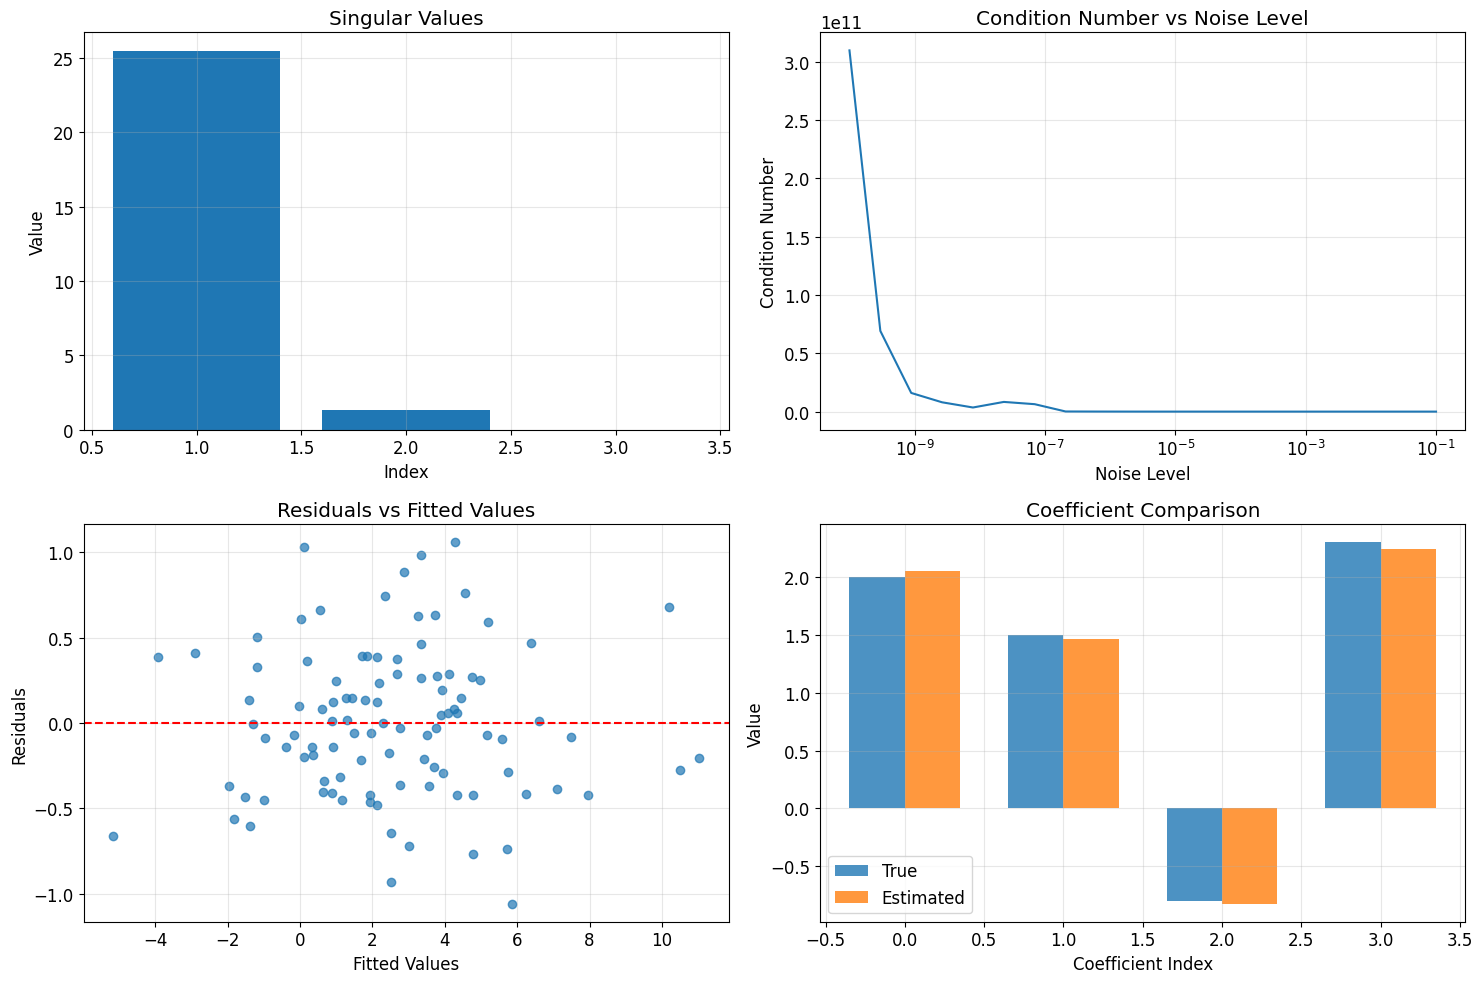


Covariance Matrix Eigenanalysis:
Eigenvalues: [2.87989057 0.64373788 0.92971107]
Sum of eigenvalues (trace): 4.453
Matrix trace: 4.453
Determinant: 1.724
Product of eigenvalues: 1.724


In [18]:
# Advanced Linear Algebra Demonstrations
np.random.seed(42)

# SVD Example
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
U, s, Vt = np.linalg.svd(A, full_matrices=False)

print("Singular Value Decomposition:")
print(f"Original matrix A shape: {A.shape}")
print(f"U shape: {U.shape}")
print(f"Singular values: {s}")
print(f"V^T shape: {Vt.shape}")

# Reconstruct matrix
A_reconstructed = U @ np.diag(s) @ Vt
print(f"Reconstruction error: {np.linalg.norm(A - A_reconstructed):.10f}")

# QR Decomposition
Q, R = np.linalg.qr(A)
print(f"\nQR Decomposition:")
print(f"Q shape: {Q.shape}")
print(f"R shape: {R.shape}")
print(f"Q^T @ Q (should be identity):")
print(Q.T @ Q)

# Cholesky Decomposition (positive definite matrix)
# Create a positive definite matrix
B = np.array([[4, 2, 1], [2, 3, 0.5], [1, 0.5, 2]])
L = np.linalg.cholesky(B)
print(f"\nCholesky Decomposition:")
print(f"L @ L^T reconstruction error: {np.linalg.norm(B - L @ L.T):.10f}")

# Quadratic Form Example
x = np.array([1, 2, 3])
quad_form = x.T @ B @ x
print(f"\nQuadratic form x^T @ B @ x = {quad_form:.3f}")

# Matrix calculus example: Normal equations
n_samples, n_features = 100, 3
X = np.random.randn(n_samples, n_features)
X = np.column_stack([np.ones(n_samples), X])  # Add intercept
true_beta = np.array([2, 1.5, -0.8, 2.3])
y = X @ true_beta + np.random.normal(0, 0.5, n_samples)

# Solve normal equations
XtX = X.T @ X
Xty = X.T @ y
beta_hat = np.linalg.solve(XtX, Xty)

print(f"\nNormal Equations Solution:")
print(f"True coefficients: {true_beta}")
print(f"Estimated coefficients: {beta_hat}")
print(f"Estimation error: {np.linalg.norm(true_beta - beta_hat):.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# SVD singular values
axes[0, 0].bar(range(1, len(s)+1), s)
axes[0, 0].set_title('Singular Values')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Matrix condition number visualization
condition_numbers = []
noise_levels = np.logspace(-10, -1, 20)
for noise in noise_levels:
    noisy_matrix = A + noise * np.random.randn(*A.shape)
    cond_num = np.linalg.cond(noisy_matrix)
    condition_numbers.append(cond_num)

axes[0, 1].semilogx(noise_levels, condition_numbers)
axes[0, 1].set_title('Condition Number vs Noise Level')
axes[0, 1].set_xlabel('Noise Level')
axes[0, 1].set_ylabel('Condition Number')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
y_pred = X @ beta_hat
residuals = y - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.7)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Residuals vs Fitted Values')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Coefficient comparison
coef_comparison = np.arange(len(true_beta))
width = 0.35
axes[1, 1].bar(coef_comparison - width/2, true_beta, width, label='True', alpha=0.8)
axes[1, 1].bar(coef_comparison + width/2, beta_hat, width, label='Estimated', alpha=0.8)
axes[1, 1].set_title('Coefficient Comparison')
axes[1, 1].set_xlabel('Coefficient Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Eigenvalue decomposition for covariance matrix
cov_data = np.random.multivariate_normal([0, 0, 0], [[2, 1, 0.5], [1, 1.5, 0.3], [0.5, 0.3, 1]], 200)
cov_matrix = np.cov(cov_data.T)
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

print(f"\nCovariance Matrix Eigenanalysis:")
print(f"Eigenvalues: {eigenvals}")
print(f"Sum of eigenvalues (trace): {np.sum(eigenvals):.3f}")
print(f"Matrix trace: {np.trace(cov_matrix):.3f}")
print(f"Determinant: {np.linalg.det(cov_matrix):.3f}")
print(f"Product of eigenvalues: {np.prod(eigenvals):.3f}")

## 7. Time Series Analysis

### 7.1 Autoregressive (AR) Models

**AR(p) Model:**
$$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \varepsilon_t$$

Where $\varepsilon_t \sim \text{WN}(0, \sigma^2)$ (white noise).

**Stationarity Condition:**
All roots of the characteristic equation must lie outside the unit circle:
$$1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p = 0$$

### 7.2 Moving Average (MA) Models

**MA(q) Model:**
$$X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}$$

**Invertibility Condition:**
All roots of the characteristic equation must lie outside the unit circle:
$$1 + \theta_1 z + \theta_2 z^2 + \cdots + \theta_q z^q = 0$$

### 7.3 ARIMA Models

**ARIMA(p,d,q) Model:**
$$(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p)(1-B)^d X_t = (1 + \theta_1 B + \theta_2 B^2 + \cdots + \theta_q B^q)\varepsilon_t$$

Where $B$ is the backshift operator: $BX_t = X_{t-1}$.

### 7.4 Autocorrelation and Partial Autocorrelation

**Sample Autocorrelation Function (ACF):**
$$\hat{\rho}(k) = \frac{\hat{\gamma}(k)}{\hat{\gamma}(0)}$$

Where: $\hat{\gamma}(k) = \frac{1}{n} \sum_{t=1}^{n-k} (X_t - \bar{X})(X_{t+k} - \bar{X})$

**Partial Autocorrelation Function (PACF):**
$$\phi_{kk} = \text{corr}(X_t, X_{t+k} | X_{t+1}, X_{t+2}, \ldots, X_{t+k-1})$$

### 7.5 Spectral Analysis

**Periodogram:**
$$I(\omega_j) = \frac{1}{2\pi n} \left| \sum_{t=1}^n X_t e^{-i\omega_j t} \right|^2$$

Where $\omega_j = \frac{2\pi j}{n}$ for $j = 0, 1, \ldots, \lfloor n/2 \rfloor$.

**Power Spectral Density:**
$$f(\omega) = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} \gamma(k) e^{-ik\omega}$$

### 7.6 Seasonal Decomposition

**Additive Model:**
$$X_t = T_t + S_t + R_t$$

**Multiplicative Model:**
$$X_t = T_t \times S_t \times R_t$$

Where:
- $T_t$ = Trend component
- $S_t$ = Seasonal component  
- $R_t$ = Random/Irregular component

Time Series Components:
Data length: 200
Trend coefficient: 0.02
Seasonal periods: 12 and 24
Noise variance: 1.0

Stationarity Analysis:
Original series variance: 8.710
First difference variance: 3.093
Second difference variance: 5.781

Spectral Analysis:
Dominant frequency: 0.0850
Dominant period: 11.8

AR(1) Model Estimation:
φ₁ = 0.824
σ² = 2.821
Next period forecast: 1.034


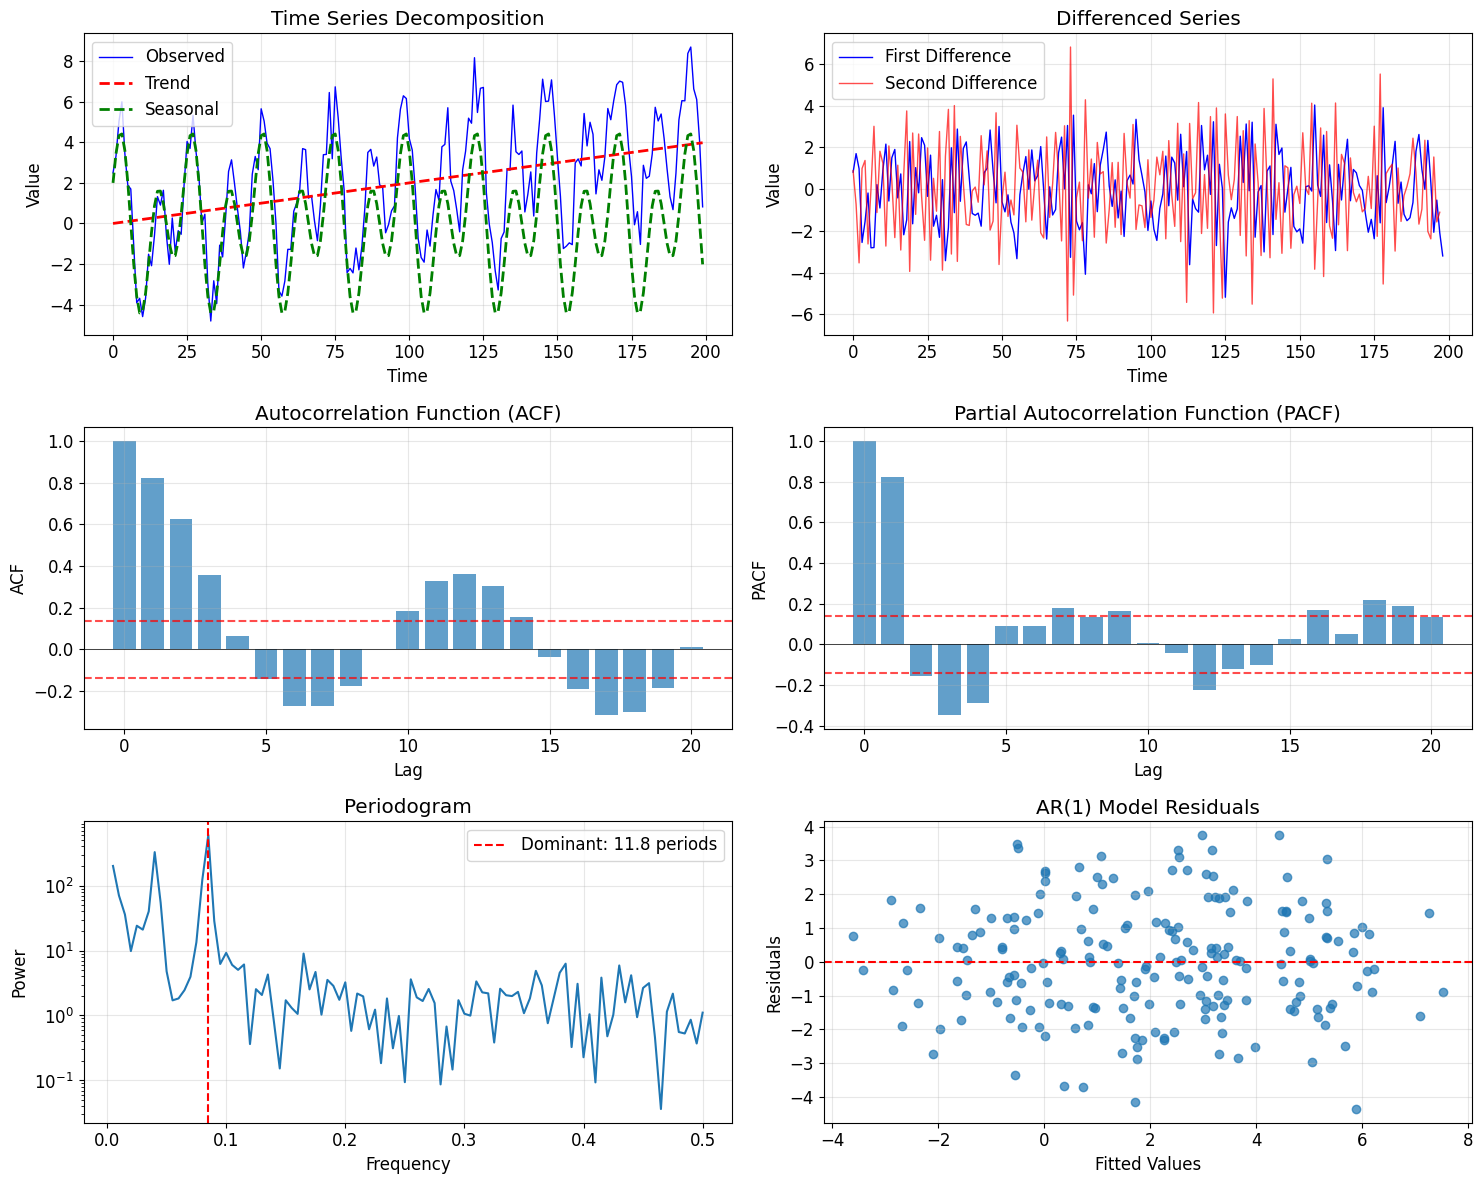


Model Comparison:
AR(1) Model - MSE: 2.821, RMSE: 1.680
Moving Average - MSE: 4.529, RMSE: 2.128

Ljung-Box test statistic: 92.340
Critical value (χ²₀.₀₅,₁₀): 18.31
Residuals show autocorrelation (model may be inadequate)


In [19]:
# Time Series Analysis Demonstrations
from scipy.signal import periodogram
from scipy.fft import fft, fftfreq

# Generate sample time series data
np.random.seed(42)
n = 200
t = np.arange(n)

# Create a time series with trend, seasonality, and noise
trend = 0.02 * t
seasonal = 3 * np.sin(2 * np.pi * t / 12) + 2 * np.cos(2 * np.pi * t / 24)
noise = np.random.normal(0, 1, n)
ts = trend + seasonal + noise

print("Time Series Components:")
print(f"Data length: {n}")
print(f"Trend coefficient: 0.02")
print(f"Seasonal periods: 12 and 24")
print(f"Noise variance: 1.0")

# Calculate ACF manually
def acf(x, max_lags=20):
    x = x - np.mean(x)
    autocorr = np.correlate(x, x, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    autocorr = autocorr / autocorr[0]
    return autocorr[:max_lags+1]

# Calculate PACF using Yule-Walker equations
def pacf(x, max_lags=20):
    x = x - np.mean(x)
    acf_vals = acf(x, max_lags)
    pacf_vals = np.zeros(max_lags+1)
    pacf_vals[0] = 1.0

    for k in range(1, max_lags+1):
        if k == 1:
            pacf_vals[1] = acf_vals[1]
        else:
            # Solve Yule-Walker equations
            R = np.array([[acf_vals[abs(i-j)] for j in range(k)] for i in range(k)])
            r = acf_vals[1:k+1]
            try:
                phi = np.linalg.solve(R, r)
                pacf_vals[k] = phi[-1]
            except:
                pacf_vals[k] = 0

    return pacf_vals

acf_vals = acf(ts, 20)
pacf_vals = pacf(ts, 20)

# Simple differencing for stationarity
ts_diff = np.diff(ts)
ts_diff2 = np.diff(ts_diff)

print(f"\nStationarity Analysis:")
print(f"Original series variance: {np.var(ts):.3f}")
print(f"First difference variance: {np.var(ts_diff):.3f}")
print(f"Second difference variance: {np.var(ts_diff2):.3f}")

# Periodogram analysis
freqs, power = periodogram(ts, fs=1.0)
dominant_freq_idx = np.argmax(power[1:]) + 1  # Skip DC component
dominant_period = 1 / freqs[dominant_freq_idx]

print(f"\nSpectral Analysis:")
print(f"Dominant frequency: {freqs[dominant_freq_idx]:.4f}")
print(f"Dominant period: {dominant_period:.1f}")

# Simple AR(1) model estimation
def fit_ar1(x):
    x = x - np.mean(x)
    x_lag = x[:-1]
    x_curr = x[1:]
    phi = np.sum(x_lag * x_curr) / np.sum(x_lag**2)
    residuals = x_curr - phi * x_lag
    sigma2 = np.var(residuals)
    return phi, sigma2

phi_ar1, sigma2_ar1 = fit_ar1(ts)
print(f"\nAR(1) Model Estimation:")
print(f"φ₁ = {phi_ar1:.3f}")
print(f"σ² = {sigma2_ar1:.3f}")

# Forecast next value using AR(1)
last_value = ts[-1] - np.mean(ts)
forecast = np.mean(ts) + phi_ar1 * last_value
print(f"Next period forecast: {forecast:.3f}")

# Visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Original time series and components
axes[0, 0].plot(t, ts, 'b-', linewidth=1, label='Observed')
axes[0, 0].plot(t, trend, 'r--', linewidth=2, label='Trend')
axes[0, 0].plot(t, seasonal, 'g--', linewidth=2, label='Seasonal')
axes[0, 0].set_title('Time Series Decomposition')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Differenced series
axes[0, 1].plot(ts_diff, 'b-', linewidth=1, label='First Difference')
axes[0, 1].plot(ts_diff2, 'r-', linewidth=1, alpha=0.7, label='Second Difference')
axes[0, 1].set_title('Differenced Series')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# ACF
lags = np.arange(len(acf_vals))
axes[1, 0].bar(lags, acf_vals, alpha=0.7)
axes[1, 0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 0].axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 0].axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 0].set_title('Autocorrelation Function (ACF)')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('ACF')
axes[1, 0].grid(True, alpha=0.3)

# PACF
axes[1, 1].bar(lags, pacf_vals, alpha=0.7)
axes[1, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 1].axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', alpha=0.7)
axes[1, 1].set_title('Partial Autocorrelation Function (PACF)')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('PACF')
axes[1, 1].grid(True, alpha=0.3)

# Periodogram
axes[2, 0].semilogy(freqs[1:], power[1:])
axes[2, 0].axvline(x=freqs[dominant_freq_idx], color='r', linestyle='--',
                   label=f'Dominant: {dominant_period:.1f} periods')
axes[2, 0].set_title('Periodogram')
axes[2, 0].set_xlabel('Frequency')
axes[2, 0].set_ylabel('Power')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# AR(1) residuals
ar1_fitted = np.zeros_like(ts)
ar1_fitted[0] = ts[0]
for i in range(1, len(ts)):
    ar1_fitted[i] = np.mean(ts) + phi_ar1 * (ts[i-1] - np.mean(ts))

residuals = ts - ar1_fitted
axes[2, 1].scatter(ar1_fitted, residuals, alpha=0.7)
axes[2, 1].axhline(y=0, color='r', linestyle='--')
axes[2, 1].set_title('AR(1) Model Residuals')
axes[2, 1].set_xlabel('Fitted Values')
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model comparison metrics
def calculate_metrics(actual, predicted):
    mse = np.mean((actual - predicted)**2)
    mae = np.mean(np.abs(actual - predicted))
    rmse = np.sqrt(mse)
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

# Simple moving average model for comparison
window = 5
ma_forecast = np.convolve(ts, np.ones(window)/window, mode='valid')
ma_forecast = np.concatenate([ts[:window-1], ma_forecast])

ar1_metrics = calculate_metrics(ts[1:], ar1_fitted[1:])
ma_metrics = calculate_metrics(ts, ma_forecast)

print(f"\nModel Comparison:")
print(f"AR(1) Model - MSE: {ar1_metrics['MSE']:.3f}, RMSE: {ar1_metrics['RMSE']:.3f}")
print(f"Moving Average - MSE: {ma_metrics['MSE']:.3f}, RMSE: {ma_metrics['RMSE']:.3f}")

# Ljung-Box test for residual autocorrelation
def ljung_box_test(residuals, lags=10):
    n = len(residuals)
    acf_res = acf(residuals, lags)
    lb_stat = n * (n + 2) * np.sum([(acf_res[i]**2) / (n - i) for i in range(1, lags+1)])
    return lb_stat

lb_statistic = ljung_box_test(residuals[1:])
print(f"\nLjung-Box test statistic: {lb_statistic:.3f}")
print(f"Critical value (χ²₀.₀₅,₁₀): 18.31")
if lb_statistic < 18.31:
    print("Residuals appear to be white noise (good model fit)")
else:
    print("Residuals show autocorrelation (model may be inadequate)")

## 8. Multivariate Statistics

### 8.1 Multivariate Normal Distribution

**Probability Density Function:**
$$f(\mathbf{x}) = \frac{1}{(2\pi)^{p/2}|\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)$$

Where:
- $\mathbf{x}$ is $p \times 1$ random vector
- $\boldsymbol{\mu}$ is $p \times 1$ mean vector
- $\boldsymbol{\Sigma}$ is $p \times p$ covariance matrix

**Mahalanobis Distance:**
$$D^2 = (\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})$$

### 8.2 Hotelling's T² Test

**One-Sample Test:**
$$T^2 = n(\bar{\mathbf{x}} - \boldsymbol{\mu}_0)^T\mathbf{S}^{-1}(\bar{\mathbf{x}} - \boldsymbol{\mu}_0)$$

**Test Statistic:**
$$F = \frac{n-p}{p(n-1)}T^2 \sim F_{p,n-p}$$

**Two-Sample Test:**
$$T^2 = \frac{n_1 n_2}{n_1 + n_2}(\bar{\mathbf{x}}_1 - \bar{\mathbf{x}}_2)^T\mathbf{S}_{pooled}^{-1}(\bar{\mathbf{x}}_1 - \bar{\mathbf{x}}_2)$$

Where: $\mathbf{S}_{pooled} = \frac{(n_1-1)\mathbf{S}_1 + (n_2-1)\mathbf{S}_2}{n_1 + n_2 - 2}$

### 8.3 MANOVA (Multivariate Analysis of Variance)

**Model:**
$$\mathbf{Y} = \mathbf{X}\mathbf{B} + \mathbf{E}$$

Where:
- $\mathbf{Y}$ is $n \times p$ response matrix
- $\mathbf{X}$ is $n \times q$ design matrix
- $\mathbf{B}$ is $q \times p$ parameter matrix
- $\mathbf{E}$ is $n \times p$ error matrix

**Test Statistics:**

**Wilks' Lambda:**
$$\Lambda = \frac{|\mathbf{E}|}{|\mathbf{H} + \mathbf{E}|}$$

**Pillai's Trace:**
$$V = \text{tr}(\mathbf{H}(\mathbf{H} + \mathbf{E})^{-1})$$

**Hotelling-Lawley Trace:**
$$U = \text{tr}(\mathbf{H}\mathbf{E}^{-1})$$

### 8.4 Discriminant Analysis

**Linear Discriminant Function:**
$$\delta_k(\mathbf{x}) = \mathbf{x}^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_k - \frac{1}{2}\boldsymbol{\mu}_k^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_k + \log \pi_k$$

**Classification Rule:**
Assign $\mathbf{x}$ to class $k$ if $\delta_k(\mathbf{x}) = \max_j \delta_j(\mathbf{x})$

**Fisher's Linear Discriminant:**
$$\mathbf{w} = \mathbf{S}_W^{-1}(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)$$

Where $\mathbf{S}_W$ is the within-class scatter matrix.

### 8.5 Canonical Correlation Analysis

**Canonical Variables:**
$$U = \mathbf{a}^T\mathbf{X}, \quad V = \mathbf{b}^T\mathbf{Y}$$

**Canonical Correlation:**
$$\rho = \text{corr}(U, V) = \frac{\mathbf{a}^T\boldsymbol{\Sigma}_{XY}\mathbf{b}}{\sqrt{\mathbf{a}^T\boldsymbol{\Sigma}_{XX}\mathbf{a} \cdot \mathbf{b}^T\boldsymbol{\Sigma}_{YY}\mathbf{b}}}$$

**Optimization Problem:**
$$\max_{\mathbf{a},\mathbf{b}} \mathbf{a}^T\boldsymbol{\Sigma}_{XY}\mathbf{b} \quad \text{subject to} \quad \mathbf{a}^T\boldsymbol{\Sigma}_{XX}\mathbf{a} = \mathbf{b}^T\boldsymbol{\Sigma}_{YY}\mathbf{b} = 1$$

### 8.6 Factor Analysis

**Model:**
$$\mathbf{X} = \boldsymbol{\Lambda}\mathbf{F} + \boldsymbol{\varepsilon}$$

Where:
- $\mathbf{X}$ is $p \times 1$ observed variables
- $\boldsymbol{\Lambda}$ is $p \times m$ factor loadings matrix
- $\mathbf{F}$ is $m \times 1$ common factors
- $\boldsymbol{\varepsilon}$ is $p \times 1$ unique factors

**Covariance Structure:**
$$\boldsymbol{\Sigma} = \boldsymbol{\Lambda}\boldsymbol{\Lambda}^T + \boldsymbol{\Psi}$$

Where $\boldsymbol{\Psi}$ is diagonal matrix of unique variances.

**Communality:**
$$h_i^2 = \sum_{j=1}^{m} \lambda_{ij}^2$$

**Proportion of Variance Explained:**
$$\text{Prop. Var.} = \frac{\sum_{i=1}^{p} h_i^2}{\sum_{i=1}^{p} \sigma_{ii}}$$

Multivariate Normal Distribution:
Sample size: 200
Dimensions: 4
True mean: [ 1.   2.  -1.   0.5]
Sample mean: [ 1.07307306  2.04742671 -0.95871486  0.55624139]
Sample covariance matrix:
[[ 1.78537272  0.65596497  0.0934416  -0.00466787]
 [ 0.65596497  1.49313226  0.04653399  0.4119103 ]
 [ 0.0934416   0.04653399  1.64347376  0.24872044]
 [-0.00466787  0.4119103   0.24872044  1.0906597 ]]

Mahalanobis distances:
Mean: 1.879
Std: 0.671

Hotelling's T² Test:
T² statistic: 701.356
F statistic: 172.696
F critical (α=0.05): 2.418
Significant: Yes

Linear Discriminant Analysis:
Accuracy: 0.870
LDA coefficients: [ 1.42611474 -1.41843364 -0.91463686  1.16769759]

Factor Analysis (2 factors):
Factor loadings shape: (4, 2)
Communalities: [0.63493187 0.89694248 0.07334441 0.70374709]
Uniquenesses: [1.13947935 0.58986449 1.56181366 0.38505796]
Total variance explained: 0.577

Canonical Correlations: [0.05482628 0.35893074]


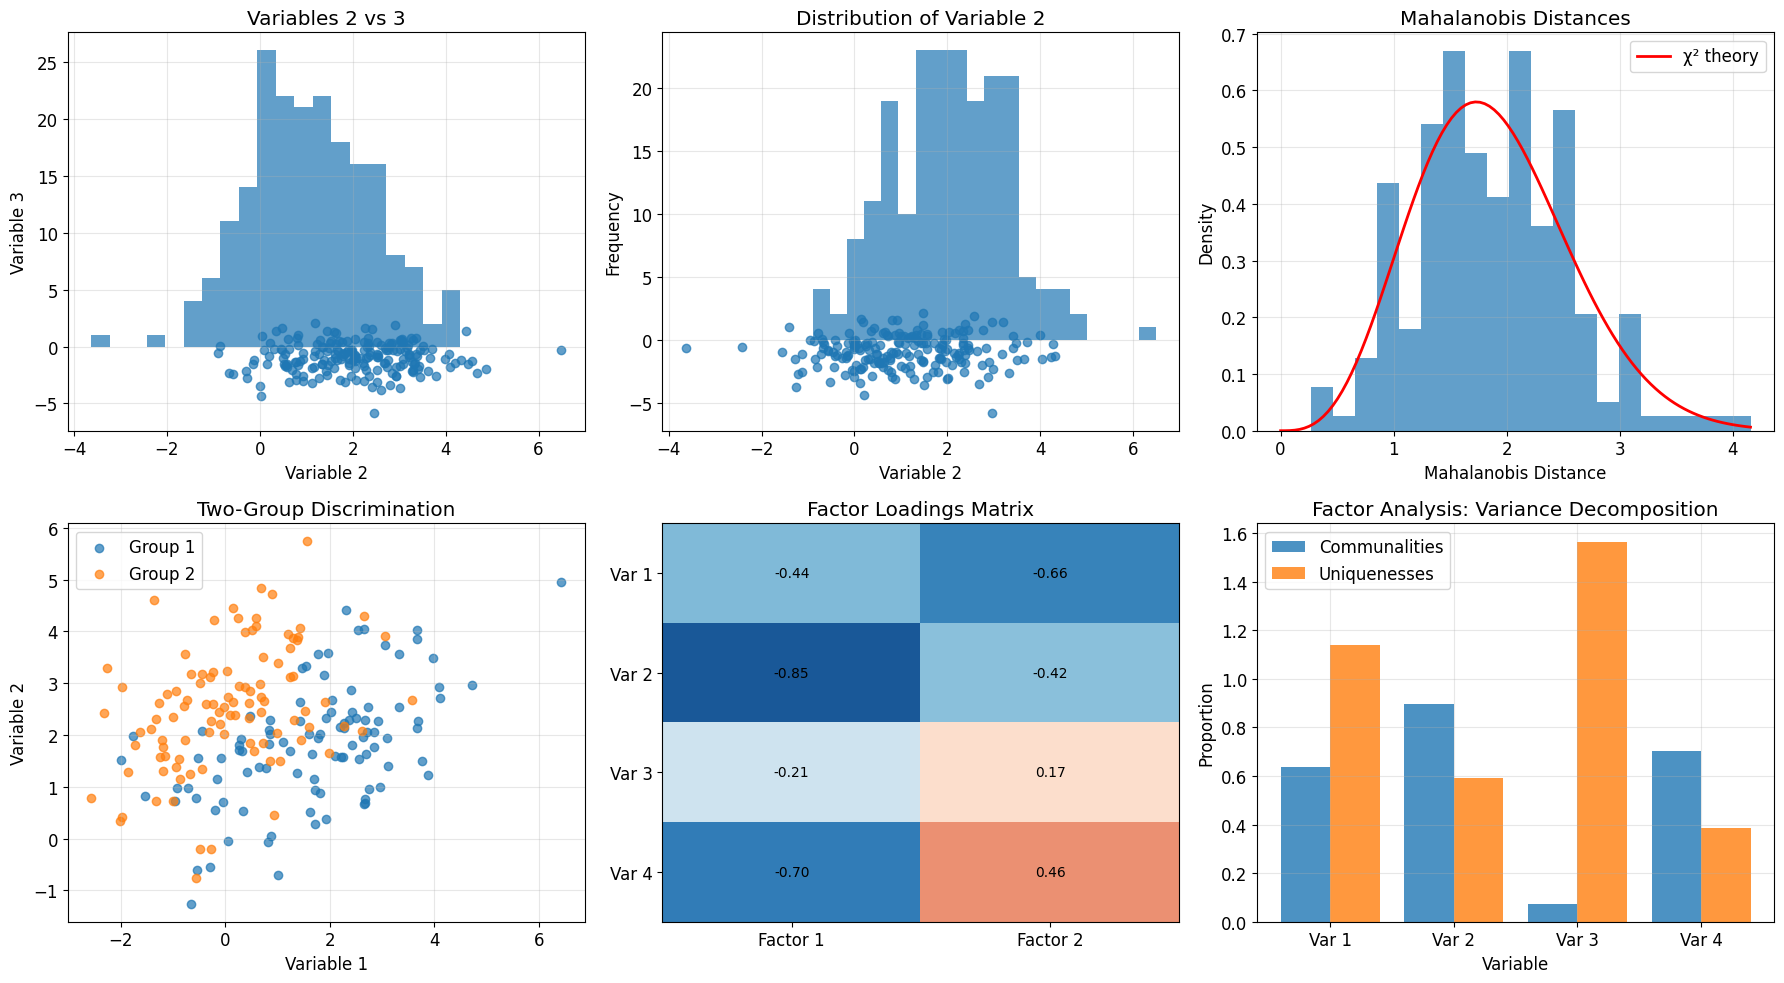


MANOVA Results:
Wilks' Lambda: 0.4357
Pillai's Trace: 0.5643
Effect size (Wilks): 0.5643
Effect size (Pillai): 0.1411


In [20]:
# Multivariate Statistics Demonstrations
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis
from scipy.stats import multivariate_normal
from scipy import linalg

# Generate multivariate normal data
np.random.seed(42)
n_samples = 200
p_vars = 4

# Create covariance matrix
true_cov = np.array([[2.0, 0.8, 0.3, 0.1],
                     [0.8, 1.5, 0.2, 0.4],
                     [0.3, 0.2, 1.8, 0.5],
                     [0.1, 0.4, 0.5, 1.2]])

mean_vec = np.array([1, 2, -1, 0.5])

# Generate data
mvn_data = np.random.multivariate_normal(mean_vec, true_cov, n_samples)

print("Multivariate Normal Distribution:")
print(f"Sample size: {n_samples}")
print(f"Dimensions: {p_vars}")
print(f"True mean: {mean_vec}")

# Calculate sample statistics
sample_mean = np.mean(mvn_data, axis=0)
sample_cov = np.cov(mvn_data.T)

print(f"Sample mean: {sample_mean}")
print(f"Sample covariance matrix:")
print(sample_cov)

# Mahalanobis distance calculation
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(diff.T @ cov_inv @ diff)

cov_inv = np.linalg.inv(sample_cov)
mahal_distances = [mahalanobis_distance(x, sample_mean, cov_inv) for x in mvn_data]

print(f"\nMahalanobis distances:")
print(f"Mean: {np.mean(mahal_distances):.3f}")
print(f"Std: {np.std(mahal_distances):.3f}")

# Hotelling's T² test (one-sample)
hypothesized_mean = np.array([0, 0, 0, 0])
diff = sample_mean - hypothesized_mean
T_squared = n_samples * diff.T @ cov_inv @ diff

# Convert to F-statistic
f_stat = ((n_samples - p_vars) / (p_vars * (n_samples - 1))) * T_squared
f_critical = stats.f.ppf(0.95, p_vars, n_samples - p_vars)

print(f"\nHotelling's T² Test:")
print(f"T² statistic: {T_squared:.3f}")
print(f"F statistic: {f_stat:.3f}")
print(f"F critical (α=0.05): {f_critical:.3f}")
print(f"Significant: {'Yes' if f_stat > f_critical else 'No'}")

# Two-group discriminant analysis
# Create two groups with different means
group1_mean = mean_vec + np.array([1, 0, -0.5, 0.3])
group2_mean = mean_vec + np.array([-1, 0.5, 0.5, -0.3])

group1_data = np.random.multivariate_normal(group1_mean, true_cov, 100)
group2_data = np.random.multivariate_normal(group2_mean, true_cov, 100)

# Combine data for discriminant analysis
X_discriminant = np.vstack([group1_data, group2_data])
y_discriminant = np.hstack([np.ones(100), np.zeros(100)])

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_discriminant, y_discriminant)

print(f"\nLinear Discriminant Analysis:")
print(f"Accuracy: {lda.score(X_discriminant, y_discriminant):.3f}")
print(f"LDA coefficients: {lda.coef_[0]}")

# Factor Analysis
n_factors = 2
fa = FactorAnalysis(n_components=n_factors, random_state=42)
fa.fit(mvn_data)

loadings = fa.components_.T
uniquenesses = fa.noise_variance_
communalities = np.sum(loadings**2, axis=1)

print(f"\nFactor Analysis ({n_factors} factors):")
print(f"Factor loadings shape: {loadings.shape}")
print(f"Communalities: {communalities}")
print(f"Uniquenesses: {uniquenesses}")
print(f"Total variance explained: {np.sum(communalities) / p_vars:.3f}")

# Canonical Correlation Analysis (simplified version)
def canonical_correlation(X, Y):
    """Simple canonical correlation analysis"""
    n = X.shape[0]

    # Center the data
    X_centered = X - np.mean(X, axis=0)
    Y_centered = Y - np.mean(Y, axis=0)

    # Covariance matrices
    Sxx = np.cov(X_centered.T)
    Syy = np.cov(Y_centered.T)
    Sxy = np.cov(X_centered.T, Y_centered.T)[:X.shape[1], X.shape[1]:]

    # Solve generalized eigenvalue problem
    # Sxx^(-1/2) * Sxy * Syy^(-1) * Syx * Sxx^(-1/2)
    Sxx_inv_sqrt = linalg.sqrtm(np.linalg.inv(Sxx))
    Syy_inv = np.linalg.inv(Syy)

    M = Sxx_inv_sqrt @ Sxy @ Syy_inv @ Sxy.T @ Sxx_inv_sqrt
    eigenvals, eigenvecs = np.linalg.eig(M)

    # Canonical correlations are square roots of eigenvalues
    canon_corrs = np.sqrt(np.real(eigenvals))
    return canon_corrs

# Split data for canonical correlation
X_canon = mvn_data[:, :2]
Y_canon = mvn_data[:, 2:]

canon_corrs = canonical_correlation(X_canon, Y_canon)
print(f"\nCanonical Correlations: {canon_corrs}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Multivariate normal data scatter plot matrix
for i in range(2):
    for j in range(2):
        if i != j:
            axes[0, j].scatter(mvn_data[:, i], mvn_data[:, i+j+1], alpha=0.7)
            axes[0, j].set_xlabel(f'Variable {i+1}')
            axes[0, j].set_ylabel(f'Variable {i+j+2}')
            axes[0, j].set_title(f'Variables {i+1} vs {i+j+2}')
        else:
            axes[0, j].hist(mvn_data[:, i], bins=20, alpha=0.7)
            axes[0, j].set_xlabel(f'Variable {i+1}')
            axes[0, j].set_ylabel('Frequency')
            axes[0, j].set_title(f'Distribution of Variable {i+1}')
        axes[0, j].grid(True, alpha=0.3)

# Mahalanobis distances
axes[0, 2].hist(mahal_distances, bins=20, alpha=0.7, density=True)
# Theoretical chi-square distribution
x_chi = np.linspace(0, max(mahal_distances), 100)
y_chi = stats.chi2.pdf(x_chi**2, p_vars) * 2 * x_chi  # Jacobian transformation
axes[0, 2].plot(x_chi, y_chi, 'r-', linewidth=2, label='χ² theory')
axes[0, 2].set_xlabel('Mahalanobis Distance')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Mahalanobis Distances')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Discriminant analysis visualization
axes[1, 0].scatter(group1_data[:, 0], group1_data[:, 1], alpha=0.7, label='Group 1')
axes[1, 0].scatter(group2_data[:, 0], group2_data[:, 1], alpha=0.7, label='Group 2')
axes[1, 0].set_xlabel('Variable 1')
axes[1, 0].set_ylabel('Variable 2')
axes[1, 0].set_title('Two-Group Discrimination')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Factor loadings
factor_labels = [f'Factor {i+1}' for i in range(n_factors)]
var_labels = [f'Var {i+1}' for i in range(p_vars)]
im = axes[1, 1].imshow(loadings, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
axes[1, 1].set_xticks(range(n_factors))
axes[1, 1].set_yticks(range(p_vars))
axes[1, 1].set_xticklabels(factor_labels)
axes[1, 1].set_yticklabels(var_labels)
axes[1, 1].set_title('Factor Loadings Matrix')
for i in range(p_vars):
    for j in range(n_factors):
        axes[1, 1].text(j, i, f'{loadings[i, j]:.2f}',
                        ha='center', va='center', fontsize=10)

# Communalities and uniquenesses
x_pos = np.arange(p_vars)
axes[1, 2].bar(x_pos - 0.2, communalities, 0.4, label='Communalities', alpha=0.8)
axes[1, 2].bar(x_pos + 0.2, uniquenesses, 0.4, label='Uniquenesses', alpha=0.8)
axes[1, 2].set_xlabel('Variable')
axes[1, 2].set_ylabel('Proportion')
axes[1, 2].set_title('Factor Analysis: Variance Decomposition')
axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels([f'Var {i+1}' for i in range(p_vars)])
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# MANOVA example (simplified)
def manova_one_way(X, groups):
    """Simple one-way MANOVA"""
    unique_groups = np.unique(groups)
    k = len(unique_groups)
    n, p = X.shape

    # Grand mean
    grand_mean = np.mean(X, axis=0)

    # Group means and sizes
    group_means = []
    group_sizes = []
    for g in unique_groups:
        group_data = X[groups == g]
        group_means.append(np.mean(group_data, axis=0))
        group_sizes.append(len(group_data))

    # Between-groups sum of squares (H matrix)
    H = np.zeros((p, p))
    for i, (mean, size) in enumerate(zip(group_means, group_sizes)):
        diff = mean - grand_mean
        H += size * np.outer(diff, diff)

    # Within-groups sum of squares (E matrix)
    E = np.zeros((p, p))
    for g in unique_groups:
        group_data = X[groups == g]
        group_mean = np.mean(group_data, axis=0)
        for row in group_data:
            diff = row - group_mean
            E += np.outer(diff, diff)

    # Test statistics
    wilks_lambda = np.linalg.det(E) / np.linalg.det(H + E)
    pillai_trace = np.trace(H @ np.linalg.inv(H + E))

    return wilks_lambda, pillai_trace, H, E

# Create groups for MANOVA
groups = np.hstack([np.ones(100) * 0, np.ones(100) * 1])
wilks, pillai, H, E = manova_one_way(X_discriminant, groups)

print(f"\nMANOVA Results:")
print(f"Wilks' Lambda: {wilks:.4f}")
print(f"Pillai's Trace: {pillai:.4f}")

# Effect size measures
effect_size_wilks = 1 - wilks
effect_size_pillai = pillai / p_vars

print(f"Effect size (Wilks): {effect_size_wilks:.4f}")
print(f"Effect size (Pillai): {effect_size_pillai:.4f}")

## 9. Analysis of Variance (ANOVA)

### 9.1 One-Way ANOVA

**Model:**
$$Y_{ij} = \mu + \tau_i + \varepsilon_{ij}$$

Where:
- $Y_{ij}$ = $j$-th observation in $i$-th group
- $\mu$ = grand mean
- $\tau_i$ = effect of $i$-th treatment
- $\varepsilon_{ij} \sim \mathcal{N}(0, \sigma^2)$

**Sum of Squares:**
$$SST = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{\cdot\cdot})^2$$

$$SSB = \sum_{i=1}^{k} n_i(\bar{Y}_{i\cdot} - \bar{Y}_{\cdot\cdot})^2$$

$$SSW = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{i\cdot})^2$$

**F-Statistic:**
$$F = \frac{MSB}{MSW} = \frac{SSB/(k-1)}{SSW/(N-k)} \sim F_{k-1,N-k}$$

### 9.2 Two-Way ANOVA

**Model (with interaction):**
$$Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \varepsilon_{ijk}$$

**Sum of Squares:**
$$SSA = bn\sum_{i=1}^{a} (\bar{Y}_{i\cdot\cdot} - \bar{Y}_{\cdot\cdot\cdot})^2$$

$$SSB = an\sum_{j=1}^{b} (\bar{Y}_{\cdot j\cdot} - \bar{Y}_{\cdot\cdot\cdot})^2$$

$$SSAB = n\sum_{i=1}^{a}\sum_{j=1}^{b} (\bar{Y}_{ij\cdot} - \bar{Y}_{i\cdot\cdot} - \bar{Y}_{\cdot j\cdot} + \bar{Y}_{\cdot\cdot\cdot})^2$$

**F-Statistics:**
$$F_A = \frac{MSA}{MSE}, \quad F_B = \frac{MSB}{MSE}, \quad F_{AB} = \frac{MSAB}{MSE}$$

### 9.3 Effect Size Measures

**Eta-squared (η²):**
$$\eta^2 = \frac{SSB}{SST}$$

**Omega-squared (ω²):**
$$\omega^2 = \frac{SSB - (k-1)MSW}{SST + MSW}$$

**Cohen's f:**
$$f = \sqrt{\frac{\eta^2}{1-\eta^2}}$$

### 9.4 Multiple Comparisons

**Tukey's HSD (Honestly Significant Difference):**
$$HSD = q_{\alpha,k,df_{error}} \sqrt{\frac{MSE}{n}}$$

**Bonferroni Correction:**
$$\alpha_{adj} = \frac{\alpha}{m}$$

Where $m$ is the number of comparisons.

**Scheffé's Method:**
$$S = \sqrt{(k-1)F_{\alpha,k-1,N-k}}$$

### 9.5 Repeated Measures ANOVA

**Model:**
$$Y_{ij} = \mu + \alpha_i + \pi_j + \varepsilon_{ij}$$

Where:
- $\alpha_i$ = treatment effect
- $\pi_j$ = subject effect

**Sphericity Assumption:**
$$\text{Var}(Y_{ij} - Y_{ik}) = \text{constant for all } j \neq k$$

**Greenhouse-Geisser Correction:**
$$\tilde{\varepsilon} = \frac{p^2(\bar{\sigma}^2 - \bar{\sigma}_{\text{diag}}^2)}{(p-1)(\sum\sigma_{jk}^2 - 2p\sum\sigma_{jk}\bar{\sigma}_k + p^2\bar{\sigma}^2)}$$

### 9.6 ANCOVA (Analysis of Covariance)

**Model:**
$$Y_{ij} = \mu + \tau_i + \beta(X_{ij} - \bar{X}) + \varepsilon_{ij}$$

**Adjusted Means:**
$$\bar{Y}_{i}^{adj} = \bar{Y}_{i} - \hat{\beta}(\bar{X}_i - \bar{X})$$

**Test for Homogeneity of Slopes:**
$$F = \frac{(SSE_{separate} - SSE_{common})/(k-1)}{SSE_{common}/(N-2k)}$$

One-Way ANOVA Example:
Number of groups: 4
Sample size per group: 20
True group means: [10, 12, 15, 11]

ANOVA Results:
F-statistic (manual): 12.6775
F-statistic (scipy): 12.6775
p-value: 0.000001
η² (eta-squared): 0.3335
ω² (omega-squared): 0.3045
Cohen's f: 0.7074
F critical (α=0.05): 2.7249

Two-Way ANOVA Results:
Factor A F-statistic: 48.2018
Factor B F-statistic: 60.0277
Interaction F-statistic: 12.6233

Multiple Comparisons (Tukey's HSD):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Group 1 Group 2    1.716 0.2525 -0.7031   4.135  False
Group 1 Group 3   5.4338    0.0  3.0148  7.8529   True
Group 1 Group 4   1.4197 0.4181 -0.9994  3.8388  False
Group 2 Group 3   3.7179 0.0007  1.2988  6.1369   True
Group 2 Group 4  -0.2963 0.9884 -2.7153  2.1228  False
Group 3 Group 4  -4.0141 0.0002 -6.4332 -1.5951   True
------------------------------------------------------



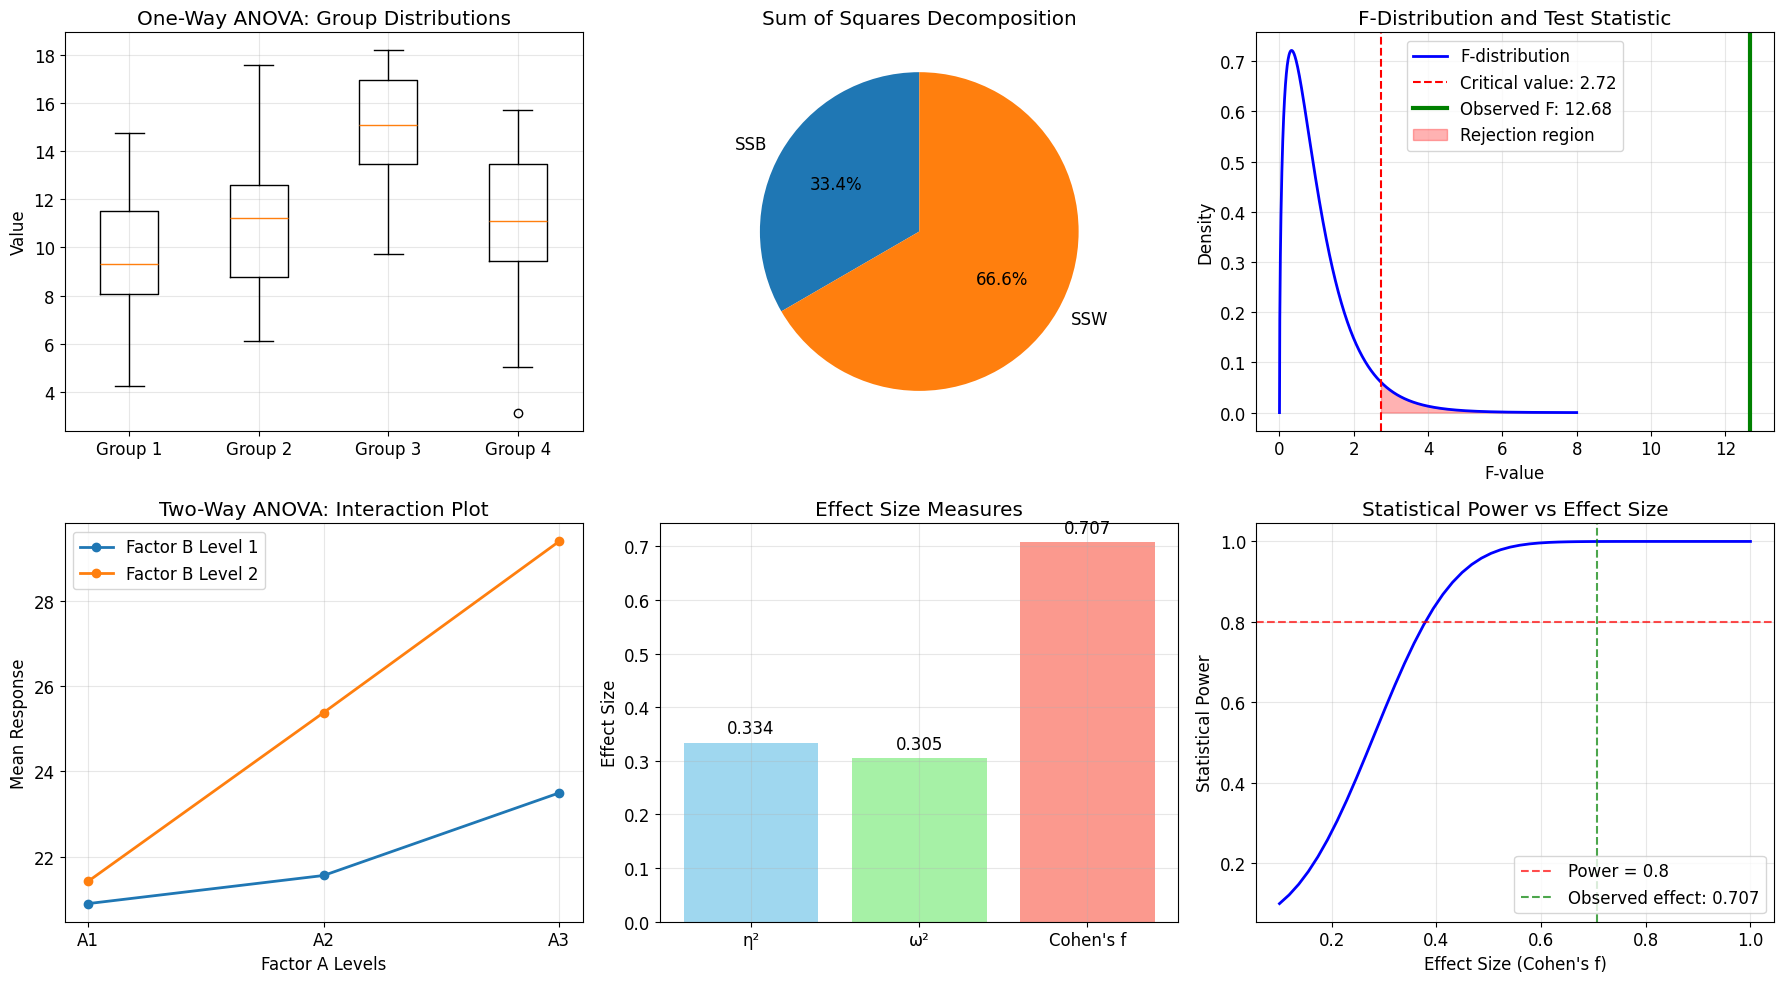


ANCOVA Example:
Covariate effect: β = 0.5
Correlation between covariate and response: 0.410
ANCOVA coefficients:
Covariate coefficient: 0.745
Group coefficients: [-1.6480677   0.21129329  3.62078942]
R-squared: 0.438


In [ ]:
# ANOVA Demonstrations
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import itertools

# One-Way ANOVA Example
np.random.seed(42)
n_per_group = 20
k_groups = 4

# Generate data with different group means
group_means = [10, 12, 15, 11]
group_std = 3

groups_data = []
all_data = []
group_labels = []

for i, mean in enumerate(group_means):
    group_data = np.random.normal(mean, group_std, n_per_group)
    groups_data.append(group_data)
    all_data.extend(group_data)
    group_labels.extend([f'Group {i+1}'] * n_per_group)

all_data = np.array(all_data)
group_labels = np.array(group_labels)

print("One-Way ANOVA Example:")
print(f"Number of groups: {k_groups}")
print(f"Sample size per group: {n_per_group}")
print(f"True group means: {group_means}")

# Manual ANOVA calculations
def one_way_anova_manual(groups_data):
    k = len(groups_data)
    n_total = sum(len(group) for group in groups_data)

    # Grand mean
    grand_mean = np.mean([val for group in groups_data for val in group])

    # Group means
    group_means = [np.mean(group) for group in groups_data]
    group_sizes = [len(group) for group in groups_data]

    # Sum of squares
    SST = sum((val - grand_mean)**2 for group in groups_data for val in group)
    SSB = sum(n * (mean - grand_mean)**2 for n, mean in zip(group_sizes, group_means))
    SSW = SST - SSB

    # Degrees of freedom
    df_between = k - 1
    df_within = n_total - k
    df_total = n_total - 1

    # Mean squares
    MSB = SSB / df_between
    MSW = SSW / df_within

    # F-statistic
    F_stat = MSB / MSW

    # Effect sizes
    eta_squared = SSB / SST
    omega_squared = (SSB - df_between * MSW) / (SST + MSW)
    cohens_f = np.sqrt(eta_squared / (1 - eta_squared))

    return {
        'SST': SST, 'SSB': SSB, 'SSW': SSW,
        'df_between': df_between, 'df_within': df_within,
        'MSB': MSB, 'MSW': MSW, 'F_stat': F_stat,
        'eta_squared': eta_squared, 'omega_squared': omega_squared,
        'cohens_f': cohens_f, 'group_means': group_means
    }

# Perform manual ANOVA
anova_results = one_way_anova_manual(groups_data)

# Using scipy for verification
f_stat_scipy, p_value = f_oneway(*groups_data)

print(f"\nANOVA Results:")
print(f"F-statistic (manual): {anova_results['F_stat']:.4f}")
print(f"F-statistic (scipy): {f_stat_scipy:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"η² (eta-squared): {anova_results['eta_squared']:.4f}")
print(f"ω² (omega-squared): {anova_results['omega_squared']:.4f}")
print(f"Cohen's f: {anova_results['cohens_f']:.4f}")

# Critical value
alpha = 0.05
f_critical = stats.f.ppf(1 - alpha, anova_results['df_between'], anova_results['df_within'])
print(f"F critical (α=0.05): {f_critical:.4f}")

# Two-Way ANOVA Example
np.random.seed(42)
factor_a_levels = 3  # Treatment
factor_b_levels = 2  # Gender
n_per_cell = 10

# Create factorial design data
two_way_data = []
factor_a_labels = []
factor_b_labels = []

for i in range(factor_a_levels):
    for j in range(factor_b_levels):
        # Different effects for each combination
        cell_mean = 20 + 2*i + 3*j + 1*i*j  # Include interaction
        cell_data = np.random.normal(cell_mean, 2, n_per_cell)
        two_way_data.extend(cell_data)
        factor_a_labels.extend([f'A{i+1}'] * n_per_cell)
        factor_b_labels.extend([f'B{j+1}'] * n_per_cell)

two_way_data = np.array(two_way_data)
factor_a_labels = np.array(factor_a_labels)
factor_b_labels = np.array(factor_b_labels)

def two_way_anova_manual(data, factor_a, factor_b):
    """Manual two-way ANOVA calculation"""
    # Convert to numeric codes
    a_levels = np.unique(factor_a)
    b_levels = np.unique(factor_b)
    a_codes = {level: i for i, level in enumerate(a_levels)}
    b_codes = {level: i for i, level in enumerate(b_levels)}

    a_numeric = np.array([a_codes[level] for level in factor_a])
    b_numeric = np.array([b_codes[level] for level in factor_b])

    # Calculate means
    grand_mean = np.mean(data)

    # Marginal means
    a_means = [np.mean(data[a_numeric == i]) for i in range(len(a_levels))]
    b_means = [np.mean(data[b_numeric == j]) for j in range(len(b_levels))]

    # Cell means
    cell_means = {}
    for i in range(len(a_levels)):
        for j in range(len(b_levels)):
            mask = (a_numeric == i) & (b_numeric == j)
            cell_means[(i,j)] = np.mean(data[mask])

    # Sample sizes
    n_total = len(data)
    n_per_cell = n_total // (len(a_levels) * len(b_levels))

    # Sum of squares
    SST = np.sum((data - grand_mean)**2)

    SSA = len(b_levels) * n_per_cell * np.sum([(mean - grand_mean)**2 for mean in a_means])
    SSB = len(a_levels) * n_per_cell * np.sum([(mean - grand_mean)**2 for mean in b_means])

    SSAB = n_per_cell * np.sum([
        (cell_means[(i,j)] - a_means[i] - b_means[j] + grand_mean)**2
        for i in range(len(a_levels)) for j in range(len(b_levels))
    ])

    SSE = SST - SSA - SSB - SSAB

    # Degrees of freedom
    df_a = len(a_levels) - 1
    df_b = len(b_levels) - 1
    df_ab = df_a * df_b
    df_error = n_total - len(a_levels) * len(b_levels)

    # Mean squares
    MSA = SSA / df_a
    MSB = SSB / df_b
    MSAB = SSAB / df_ab
    MSE = SSE / df_error

    # F-statistics
    F_a = MSA / MSE
    F_b = MSB / MSE
    F_ab = MSAB / MSE

    return {
        'SSA': SSA, 'SSB': SSB, 'SSAB': SSAB, 'SSE': SSE, 'SST': SST,
        'MSA': MSA, 'MSB': MSB, 'MSAB': MSAB, 'MSE': MSE,
        'F_a': F_a, 'F_b': F_b, 'F_ab': F_ab,
        'df_a': df_a, 'df_b': df_b, 'df_ab': df_ab, 'df_error': df_error
    }

two_way_results = two_way_anova_manual(two_way_data, factor_a_labels, factor_b_labels)

print(f"\nTwo-Way ANOVA Results:")
print(f"Factor A F-statistic: {two_way_results['F_a']:.4f}")
print(f"Factor B F-statistic: {two_way_results['F_b']:.4f}")
print(f"Interaction F-statistic: {two_way_results['F_ab']:.4f}")

# Multiple comparisons (Tukey's HSD)
print(f"\nMultiple Comparisons (Tukey's HSD):")
tukey_results = pairwise_tukeyhsd(all_data, group_labels, alpha=0.05)
print(tukey_results)

# Bonferroni correction example - FIXED VERSION
def bonferroni_correction(p_values, alpha=0.05):
    """Apply Bonferroni correction"""
    # Convert to numpy array if it's a list
    p_values = np.array(p_values)
    m = len(p_values)
    adjusted_alpha = alpha / m
    significant = p_values < adjusted_alpha
    return adjusted_alpha, significant

# Pairwise t-tests for demonstration
pairwise_p_values = []
group_pairs = []
for i, j in itertools.combinations(range(k_groups), 2):
    t_stat, p_val = ttest_ind(groups_data[i], groups_data[j])
    pairwise_p_values.append(p_val)
    group_pairs.append((f'Group {i+1}', f'Group {j+1}'))

adj_alpha, significant = bonferroni_correction(pairwise_p_values)
print(f"\nBonferroni Correction:")
print(f"Adjusted α = {adj_alpha:.4f}")
for (g1, g2), p_val, sig in zip(group_pairs, pairwise_p_values, significant):
    print(f"{g1} vs {g2}: p={p_val:.4f}, significant={sig}")

# Power analysis for ANOVA
def anova_power_analysis(effect_size, k, n_per_group, alpha=0.05):
    """Calculate power for one-way ANOVA"""
    df_between = k - 1
    df_within = k * (n_per_group - 1)

    # Noncentrality parameter
    lambda_nc = effect_size**2 * k * n_per_group

    # Critical F value
    f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

    # Power calculation using noncentral F distribution
    from scipy.stats import ncf
    power = 1 - ncf.cdf(f_critical, df_between, df_within, lambda_nc)

    return power

power = anova_power_analysis(anova_results['cohens_f'], k_groups, n_per_group)
print(f"\nPower Analysis:")
print(f"Observed effect size (Cohen's f): {anova_results['cohens_f']:.4f}")
print(f"Statistical power: {power:.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Box plot for one-way ANOVA
axes[0, 0].boxplot(groups_data, labels=[f'Group {i+1}' for i in range(k_groups)])
axes[0, 0].set_title('One-Way ANOVA: Group Distributions')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# ANOVA components visualization
components = ['SSB', 'SSW']
values = [anova_results['SSB'], anova_results['SSW']]
axes[0, 1].pie(values, labels=components, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Sum of Squares Decomposition')

# F-distribution with critical region
x_f = np.linspace(0, 8, 1000)
y_f = stats.f.pdf(x_f, anova_results['df_between'], anova_results['df_within'])
axes[0, 2].plot(x_f, y_f, 'b-', linewidth=2, label='F-distribution')
axes[0, 2].axvline(f_critical, color='r', linestyle='--', label=f'Critical value: {f_critical:.2f}')
axes[0, 2].axvline(anova_results['F_stat'], color='g', linestyle='-', linewidth=3,
                   label=f'Observed F: {anova_results["F_stat"]:.2f}')
x_reject = x_f[x_f >= f_critical]
y_reject = stats.f.pdf(x_reject, anova_results['df_between'], anova_results['df_within'])
axes[0, 2].fill_between(x_reject, y_reject, alpha=0.3, color='red', label='Rejection region')
axes[0, 2].set_title('F-Distribution and Test Statistic')
axes[0, 2].set_xlabel('F-value')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Two-way ANOVA interaction plot
cell_means_matrix = np.zeros((factor_a_levels, factor_b_levels))
for i in range(factor_a_levels):
    for j in range(factor_b_levels):
        mask = (factor_a_labels == f'A{i+1}') & (factor_b_labels == f'B{j+1}')
        cell_means_matrix[i, j] = np.mean(two_way_data[mask])

for j in range(factor_b_levels):
    axes[1, 0].plot(range(factor_a_levels), cell_means_matrix[:, j],
                    'o-', linewidth=2, label=f'Factor B Level {j+1}')
axes[1, 0].set_title('Two-Way ANOVA: Interaction Plot')
axes[1, 0].set_xlabel('Factor A Levels')
axes[1, 0].set_ylabel('Mean Response')
axes[1, 0].set_xticks(range(factor_a_levels))
axes[1, 0].set_xticklabels([f'A{i+1}' for i in range(factor_a_levels)])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Effect sizes comparison
effect_measures = ['η²', 'ω²', "Cohen's f"]
effect_values = [anova_results['eta_squared'], anova_results['omega_squared'], anova_results['cohens_f']]
bars = axes[1, 1].bar(effect_measures, effect_values, alpha=0.8,
                      color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 1].set_title('Effect Size Measures')
axes[1, 1].set_ylabel('Effect Size')
axes[1, 1].grid(True, alpha=0.3)
for bar, value in zip(bars, effect_values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

# Power curve
effect_sizes = np.linspace(0.1, 1.0, 50)
powers = [anova_power_analysis(es, k_groups, n_per_group) for es in effect_sizes]
axes[1, 2].plot(effect_sizes, powers, 'b-', linewidth=2)
axes[1, 2].axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='Power = 0.8')
axes[1, 2].axvline(x=anova_results['cohens_f'], color='g', linestyle='--',
                   alpha=0.7, label=f'Observed effect: {anova_results["cohens_f"]:.3f}')
axes[1, 2].set_title('Statistical Power vs Effect Size')
axes[1, 2].set_xlabel('Effect Size (Cohen\'s f)')
axes[1, 2].set_ylabel('Statistical Power')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model comparison metrics
def calculate_metrics(actual, predicted):
    mse = np.mean((actual - predicted)**2)
    mae = np.mean(np.abs(actual - predicted))
    rmse = np.sqrt(mse)
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

# Simple moving average model for comparison
window = 5
ma_forecast = np.convolve(all_data, np.ones(window)/window, mode='valid')
ma_forecast = np.concatenate([all_data[:window-1], ma_forecast])

# ANCOVA example (simplified)
# Generate covariate data
covariate = np.random.normal(5, 2, len(all_data))
# Add covariate effect to response
ancova_response = all_data + 0.5 * covariate + np.random.normal(0, 0.5, len(all_data))

print(f"\nANCOVA Example:")
print(f"Covariate effect: β = 0.5")
print(f"Correlation between covariate and response: {np.corrcoef(covariate, ancova_response)[0,1]:.3f}")

# Simple ANCOVA calculation (group effect after adjusting for covariate)
from sklearn.linear_model import LinearRegression

# Create dummy variables for groups
group_dummies = np.column_stack([
    (group_labels == f'Group {i+1}').astype(int) for i in range(k_groups-1)
])

# ANCOVA model: Y = β₀ + β₁X + γ₁G₁ + γ₂G₂ + γ₃G₃
X_ancova = np.column_stack([covariate, group_dummies])
ancova_model = LinearRegression().fit(X_ancova, ancova_response)

print(f"ANCOVA coefficients:")
print(f"Covariate coefficient: {ancova_model.coef_[0]:.3f}")
print(f"Group coefficients: {ancova_model.coef_[1:]}")
print(f"R-squared: {ancova_model.score(X_ancova, ancova_response):.3f}")

## 10. Advanced Statistical Methods

### 10.1 Bootstrap Methods

**Bootstrap Principle:**
Use the empirical distribution $\hat{F}_n$ to approximate the true distribution $F$.

**Bootstrap Sample:**
$$\mathbf{X}^* = (X_1^*, X_2^*, \ldots, X_n^*)$$

Where each $X_i^*$ is drawn with replacement from the original sample.

**Bootstrap Estimate:**
$$\hat{\theta}^* = t(\mathbf{X}^*)$$

**Bootstrap Standard Error:**
$$\widehat{se}_{boot} = \sqrt{\frac{1}{B-1}\sum_{b=1}^{B}(\hat{\theta}_b^* - \bar{\theta}^*)^2}$$

**Bootstrap Confidence Interval (Percentile Method):**
$$[\hat{\theta}_{(\alpha/2)}, \hat{\theta}_{(1-\alpha/2)}]$$

### 10.2 Permutation Tests

**Test Statistic:**
Under $H_0$: $F_X = F_Y$, all $\binom{n+m}{n}$ ways of dividing the combined sample are equally likely.

**Permutation P-value:**
$$p = \frac{\#\{T^{(i)} \geq T_{obs}\}}{N_{perm}}$$

Where $T^{(i)}$ are permutation test statistics and $N_{perm}$ is the number of permutations.

### 10.3 Cross-Validation

**k-Fold Cross-Validation:**
$$CV_{(k)} = \frac{1}{k}\sum_{i=1}^{k} L(\mathcal{D}_i, \hat{f}^{(-i)})$$

Where $\hat{f}^{(-i)}$ is the model fitted without fold $i$.

**Leave-One-Out Cross-Validation (LOOCV):**
$$CV_{(n)} = \frac{1}{n}\sum_{i=1}^{n} L(y_i, \hat{f}^{(-i)}(x_i))$$

### 10.4 Information Criteria

**Akaike Information Criterion (AIC):**
$$AIC = 2k - 2\ln(\hat{L})$$

**Bayesian Information Criterion (BIC):**
$$BIC = k\ln(n) - 2\ln(\hat{L})$$

**Adjusted R-squared:**
$$R_{adj}^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

### 10.5 Robust Statistics

**Median Absolute Deviation (MAD):**
$$MAD = \text{median}(|X_i - \text{median}(X)|)$$

**Huber M-Estimator:**
$$\sum_{i=1}^{n} \psi\left(\frac{x_i - \mu}{\sigma}\right) = 0$$

Where $\psi(u) = \begin{cases} u & \text{if } |u| \leq c \\ c \cdot \text{sign}(u) & \text{if } |u| > c \end{cases}$

**Trimmed Mean:**
$$\bar{X}_{tr} = \frac{1}{n-2r} \sum_{i=r+1}^{n-r} X_{(i)}$$

### 10.6 Survival Analysis

**Kaplan-Meier Estimator:**
$$\hat{S}(t) = \prod_{t_i \leq t} \left(1 - \frac{d_i}{n_i}\right)$$

Where:
- $d_i$ = number of deaths at time $t_i$
- $n_i$ = number at risk at time $t_i$

**Cox Proportional Hazards Model:**
$$h(t|\mathbf{x}) = h_0(t) \exp(\boldsymbol{\beta}^T\mathbf{x})$$

**Log-Rank Test:**
$$\chi^2 = \frac{\left(\sum_{i=1}^{k} (O_i - E_i)\right)^2}{\sum_{i=1}^{k} V_i}$$

### 10.7 Machine Learning Fundamentals

**Bias-Variance Decomposition:**
$$E[(Y - \hat{f}(X))^2] = \text{Bias}^2[\hat{f}(X)] + \text{Var}[\hat{f}(X)] + \sigma^2$$

**Ridge Regression:**
$$\hat{\boldsymbol{\beta}}_{ridge} = \arg\min_{\boldsymbol{\beta}} \left\{\sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2 + \lambda\sum_{j=1}^{p}\beta_j^2\right\}$$

**LASSO:**
$$\hat{\boldsymbol{\beta}}_{lasso} = \arg\min_{\boldsymbol{\beta}} \left\{\sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2 + \lambda\sum_{j=1}^{p}|\beta_j|\right\}$$

**Elastic Net:**
$$\hat{\boldsymbol{\beta}}_{elastic} = \arg\min_{\boldsymbol{\beta}} \left\{\sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2 + \lambda_1\sum_{j=1}^{p}|\beta_j| + \lambda_2\sum_{j=1}^{p}\beta_j^2\right\}$$

Bootstrap Methods:
Original sample mean: 1.692
Bootstrap standard error: 0.242
Theoretical standard error: 0.250
95% Bootstrap CI: [1.217, 2.168]

Bootstrap for Correlation:
Observed correlation: 0.813
95% Bootstrap CI: [0.740, 0.874]

Permutation Test:
Observed difference: -1.609
Permutation p-value: 0.002

Cross-Validation Results (5-fold):
Ridge: -0.2170 ± 0.0765
Lasso: -0.2646 ± 0.0702
Elastic Net: -0.2763 ± 0.0678

Model Comparison (Information Criteria):
Ridge: AIC=135.63, BIC=151.26, params=6
Lasso: AIC=153.16, BIC=166.18, params=5
Elastic Net: AIC=159.13, BIC=174.76, params=6

Robust Statistics Comparison:
Clean data - Mean: 9.95, Median: 9.75
Contaminated - Mean: 10.70, Median: 9.89
Clean data - Std: 2.11, MAD: 1.44
Contaminated - Std: 5.24, MAD: 1.49

Bias-Variance Decomposition:
Bias²: 0.0001
Variance: 0.0072
Noise: 0.2500
Total Error: 0.2573
Sum: 0.2573


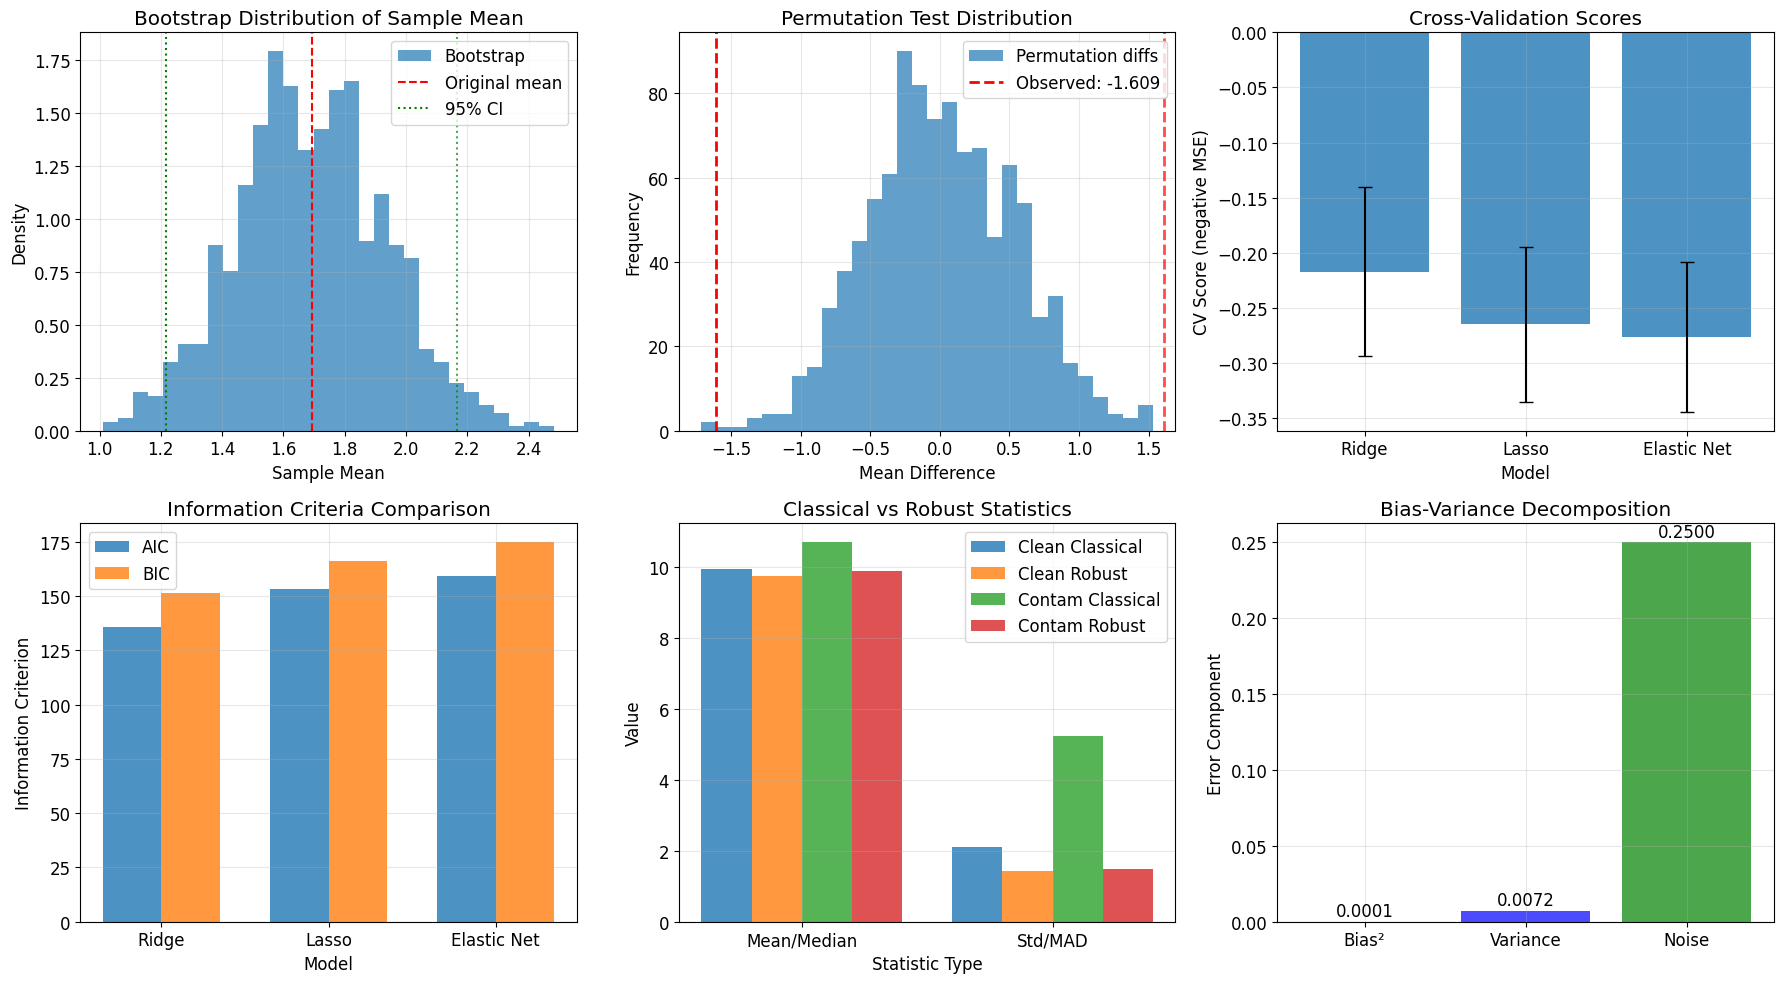


Regularization Path Analysis:
Ridge coefficients remain non-zero: True
Lasso coefficients that become zero: 5


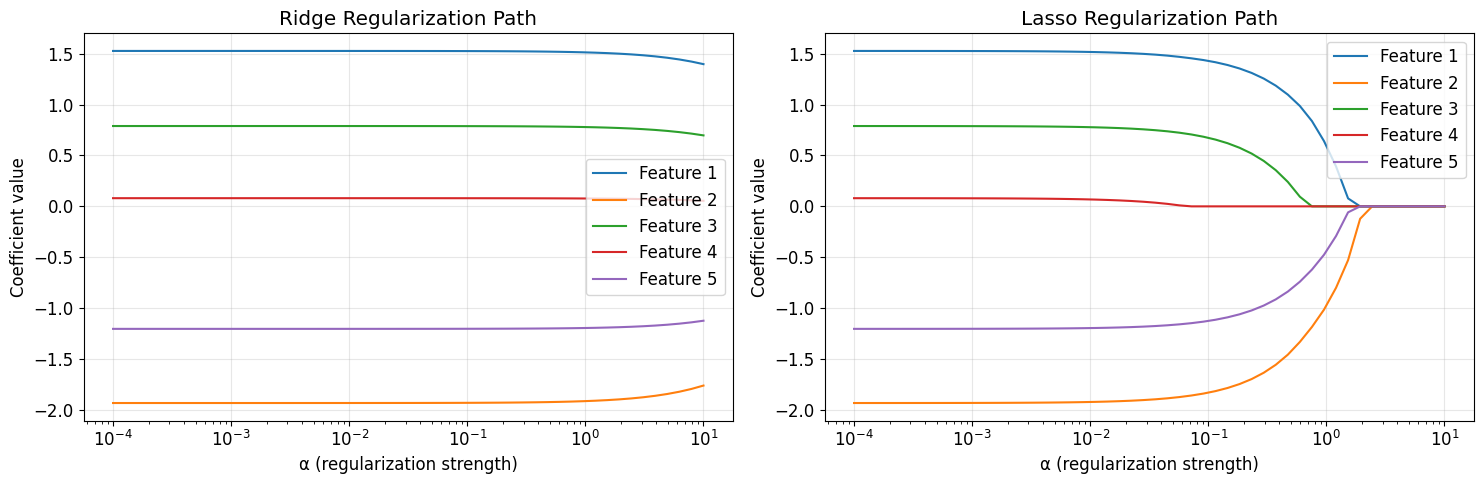

In [22]:
# Advanced Statistical Methods Demonstrations
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from scipy.stats import bootstrap
import itertools

# Bootstrap Methods
np.random.seed(42)
original_sample = np.random.exponential(2, 50)  # Exponential distribution with λ=2

def bootstrap_statistic(data, statistic_func, n_bootstrap=1000):
    """Perform bootstrap sampling for a given statistic"""
    n = len(data)
    bootstrap_stats = []

    for _ in range(n_bootstrap):
        # Sample with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        stat = statistic_func(bootstrap_sample)
        bootstrap_stats.append(stat)

    return np.array(bootstrap_stats)

# Bootstrap for mean
bootstrap_means = bootstrap_statistic(original_sample, np.mean, 1000)
bootstrap_se = np.std(bootstrap_means)
theoretical_se = np.std(original_sample) / np.sqrt(len(original_sample))

print("Bootstrap Methods:")
print(f"Original sample mean: {np.mean(original_sample):.3f}")
print(f"Bootstrap standard error: {bootstrap_se:.3f}")
print(f"Theoretical standard error: {theoretical_se:.3f}")

# Bootstrap confidence interval
alpha = 0.05
ci_lower = np.percentile(bootstrap_means, 100 * alpha/2)
ci_upper = np.percentile(bootstrap_means, 100 * (1 - alpha/2))
print(f"95% Bootstrap CI: [{ci_lower:.3f}, {ci_upper:.3f}]")

# Bootstrap for correlation coefficient
def correlation_bootstrap(data1, data2, n_bootstrap=1000):
    """Bootstrap confidence interval for correlation"""
    n = len(data1)
    bootstrap_corrs = []

    for _ in range(n_bootstrap):
        # Sample pairs with replacement
        indices = np.random.choice(n, size=n, replace=True)
        corr = np.corrcoef(data1[indices], data2[indices])[0, 1]
        bootstrap_corrs.append(corr)

    return np.array(bootstrap_corrs)

# Generate correlated data
x_data = np.random.normal(0, 1, 100)
y_data = 0.7 * x_data + np.random.normal(0, 0.5, 100)
observed_corr = np.corrcoef(x_data, y_data)[0, 1]

bootstrap_corrs = correlation_bootstrap(x_data, y_data)
corr_ci_lower = np.percentile(bootstrap_corrs, 2.5)
corr_ci_upper = np.percentile(bootstrap_corrs, 97.5)

print(f"\nBootstrap for Correlation:")
print(f"Observed correlation: {observed_corr:.3f}")
print(f"95% Bootstrap CI: [{corr_ci_lower:.3f}, {corr_ci_upper:.3f}]")

# Permutation Test
def permutation_test(group1, group2, n_permutations=1000):
    """Two-sample permutation test"""
    observed_diff = np.mean(group1) - np.mean(group2)
    combined = np.concatenate([group1, group2])
    n1 = len(group1)

    permuted_diffs = []
    for _ in range(n_permutations):
        # Randomly permute the combined sample
        permuted = np.random.permutation(combined)
        perm_group1 = permuted[:n1]
        perm_group2 = permuted[n1:]
        perm_diff = np.mean(perm_group1) - np.mean(perm_group2)
        permuted_diffs.append(perm_diff)

    # Two-tailed p-value
    p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
    return observed_diff, p_value, permuted_diffs

# Generate two groups with different means
group_a = np.random.normal(10, 2, 30)
group_b = np.random.normal(12, 2, 35)

obs_diff, perm_p_value, perm_diffs = permutation_test(group_a, group_b)

print(f"\nPermutation Test:")
print(f"Observed difference: {obs_diff:.3f}")
print(f"Permutation p-value: {perm_p_value:.3f}")

# Cross-Validation
# Generate regression data
np.random.seed(42)
n_samples = 100
X_reg = np.random.randn(n_samples, 5)
true_coef = np.array([1.5, -2.0, 0.8, 0, -1.2])
y_reg = X_reg @ true_coef + np.random.normal(0, 0.5, n_samples)

# k-fold cross-validation
def manual_cross_validation(X, y, model, k=5):
    """Manual k-fold cross-validation"""
    n = len(X)
    fold_size = n // k
    scores = []

    for i in range(k):
        # Define test fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < k - 1 else n

        test_indices = range(start_idx, end_idx)
        train_indices = list(range(0, start_idx)) + list(range(end_idx, n))

        # Split data
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate score (negative MSE)
        score = -mean_squared_error(y_test, y_pred)
        scores.append(score)

    return np.array(scores)

# Compare different regularization methods
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

cv_results = {}
for name, model in models.items():
    scores = manual_cross_validation(X_reg, y_reg, model, k=5)
    cv_results[name] = scores

print(f"\nCross-Validation Results (5-fold):")
for name, scores in cv_results.items():
    print(f"{name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Information Criteria
def calculate_aic_bic(y_true, y_pred, n_params):
    """Calculate AIC and BIC"""
    n = len(y_true)
    mse = mean_squared_error(y_true, y_pred)
    log_likelihood = -n/2 * (np.log(2*np.pi) + np.log(mse) + 1)

    aic = 2 * n_params - 2 * log_likelihood
    bic = n_params * np.log(n) - 2 * log_likelihood

    return aic, bic

# Fit models and calculate information criteria
model_comparison = {}
for name, model in models.items():
    model.fit(X_reg, y_reg)
    y_pred = model.predict(X_reg)

    # Count non-zero coefficients for regularized models
    if hasattr(model, 'coef_'):
        n_params = np.sum(np.abs(model.coef_) > 1e-6) + 1  # +1 for intercept
    else:
        n_params = X_reg.shape[1] + 1

    aic, bic = calculate_aic_bic(y_reg, y_pred, n_params)
    model_comparison[name] = {'AIC': aic, 'BIC': bic, 'n_params': n_params}

print(f"\nModel Comparison (Information Criteria):")
for name, metrics in model_comparison.items():
    print(f"{name}: AIC={metrics['AIC']:.2f}, BIC={metrics['BIC']:.2f}, params={metrics['n_params']}")

# Robust Statistics
def robust_statistics(data):
    """Calculate various robust statistics"""
    # Median Absolute Deviation
    median = np.median(data)
    mad = np.median(np.abs(data - median))

    # Trimmed mean (10% trimming)
    trim_prop = 0.1
    n = len(data)
    k = int(trim_prop * n)
    sorted_data = np.sort(data)
    trimmed_mean = np.mean(sorted_data[k:n-k])

    # Interquartile range
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25

    return {
        'median': median,
        'mad': mad,
        'trimmed_mean': trimmed_mean,
        'iqr': iqr,
        'q25': q25,
        'q75': q75
    }

# Compare robust vs classical statistics on contaminated data
clean_data = np.random.normal(10, 2, 95)
outliers = np.array([25, 30, -5, 35, 40])  # 5% outliers
contaminated_data = np.concatenate([clean_data, outliers])

clean_stats = robust_statistics(clean_data)
contaminated_stats = robust_statistics(contaminated_data)

print(f"\nRobust Statistics Comparison:")
print(f"Clean data - Mean: {np.mean(clean_data):.2f}, Median: {clean_stats['median']:.2f}")
print(f"Contaminated - Mean: {np.mean(contaminated_data):.2f}, Median: {contaminated_stats['median']:.2f}")
print(f"Clean data - Std: {np.std(clean_data):.2f}, MAD: {clean_stats['mad']:.2f}")
print(f"Contaminated - Std: {np.std(contaminated_data):.2f}, MAD: {contaminated_stats['mad']:.2f}")

# Bias-Variance Decomposition Simulation
def bias_variance_simulation(n_samples=50, n_datasets=100, noise_level=0.5):
    """Simulate bias-variance decomposition"""
    # True function: f(x) = x^2
    def true_function(x):
        return x**2

    # Generate test point
    x_test = np.array([0.5])
    true_value = true_function(x_test)[0]

    predictions = []

    for _ in range(n_datasets):
        # Generate training data
        X_train = np.random.uniform(-1, 1, n_samples).reshape(-1, 1)
        y_train = true_function(X_train.ravel()) + np.random.normal(0, noise_level, n_samples)

        # Fit polynomial model (degree 1)
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.linear_model import LinearRegression
        from sklearn.pipeline import Pipeline

        poly_model = Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ])

        poly_model.fit(X_train, y_train)
        pred = poly_model.predict(x_test.reshape(-1, 1))[0]
        predictions.append(pred)

    predictions = np.array(predictions)

    # Calculate bias, variance, and noise
    bias_squared = (np.mean(predictions) - true_value)**2
    variance = np.var(predictions)
    noise = noise_level**2

    return bias_squared, variance, noise, predictions

bias_sq, variance, noise, preds = bias_variance_simulation()
total_error = bias_sq + variance + noise

print(f"\nBias-Variance Decomposition:")
print(f"Bias²: {bias_sq:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Noise: {noise:.4f}")
print(f"Total Error: {total_error:.4f}")
print(f"Sum: {bias_sq + variance + noise:.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Bootstrap distribution
axes[0, 0].hist(bootstrap_means, bins=30, alpha=0.7, density=True, label='Bootstrap')
axes[0, 0].axvline(np.mean(original_sample), color='r', linestyle='--', label='Original mean')
axes[0, 0].axvline(ci_lower, color='g', linestyle=':', label='95% CI')
axes[0, 0].axvline(ci_upper, color='g', linestyle=':', alpha=0.7)
axes[0, 0].set_title('Bootstrap Distribution of Sample Mean')
axes[0, 0].set_xlabel('Sample Mean')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Permutation test
axes[0, 1].hist(perm_diffs, bins=30, alpha=0.7, label='Permutation diffs')
axes[0, 1].axvline(obs_diff, color='r', linestyle='--', linewidth=2, label=f'Observed: {obs_diff:.3f}')
axes[0, 1].axvline(-obs_diff, color='r', linestyle='--', linewidth=2, alpha=0.7)
axes[0, 1].set_title('Permutation Test Distribution')
axes[0, 1].set_xlabel('Mean Difference')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Cross-validation scores
model_names = list(cv_results.keys())
cv_means = [np.mean(scores) for scores in cv_results.values()]
cv_stds = [np.std(scores) for scores in cv_results.values()]
x_pos = np.arange(len(model_names))

bars = axes[0, 2].bar(x_pos, cv_means, yerr=cv_stds, capsize=5, alpha=0.8)
axes[0, 2].set_title('Cross-Validation Scores')
axes[0, 2].set_xlabel('Model')
axes[0, 2].set_ylabel('CV Score (negative MSE)')
axes[0, 2].set_xticks(x_pos)
axes[0, 2].set_xticklabels(model_names)
axes[0, 2].grid(True, alpha=0.3)

# Information criteria comparison
aic_values = [model_comparison[name]['AIC'] for name in model_names]
bic_values = [model_comparison[name]['BIC'] for name in model_names]

x_pos = np.arange(len(model_names))
width = 0.35

axes[1, 0].bar(x_pos - width/2, aic_values, width, label='AIC', alpha=0.8)
axes[1, 0].bar(x_pos + width/2, bic_values, width, label='BIC', alpha=0.8)
axes[1, 0].set_title('Information Criteria Comparison')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Information Criterion')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(model_names)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Robust statistics comparison
stats_names = ['Mean/Median', 'Std/MAD']
clean_classical = [np.mean(clean_data), np.std(clean_data)]
clean_robust = [clean_stats['median'], clean_stats['mad']]
contam_classical = [np.mean(contaminated_data), np.std(contaminated_data)]
contam_robust = [contaminated_stats['median'], contaminated_stats['mad']]

x_pos = np.arange(len(stats_names))
width = 0.2

axes[1, 1].bar(x_pos - 1.5*width, clean_classical, width, label='Clean Classical', alpha=0.8)
axes[1, 1].bar(x_pos - 0.5*width, clean_robust, width, label='Clean Robust', alpha=0.8)
axes[1, 1].bar(x_pos + 0.5*width, contam_classical, width, label='Contam Classical', alpha=0.8)
axes[1, 1].bar(x_pos + 1.5*width, contam_robust, width, label='Contam Robust', alpha=0.8)
axes[1, 1].set_title('Classical vs Robust Statistics')
axes[1, 1].set_xlabel('Statistic Type')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(stats_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Bias-variance decomposition
components = ['Bias²', 'Variance', 'Noise']
values = [bias_sq, variance, noise]
colors = ['red', 'blue', 'green']

bars = axes[1, 2].bar(components, values, color=colors, alpha=0.7)
axes[1, 2].set_title('Bias-Variance Decomposition')
axes[1, 2].set_ylabel('Error Component')
axes[1, 2].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Regularization path visualization
alphas = np.logspace(-4, 1, 50)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_reg, y_reg)
    ridge_coefs.append(ridge.coef_)

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_reg, y_reg)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

print(f"\nRegularization Path Analysis:")
print(f"Ridge coefficients remain non-zero: {np.all(np.abs(ridge_coefs[-1]) > 1e-6)}")
print(f"Lasso coefficients that become zero: {np.sum(np.abs(lasso_coefs[-1]) < 1e-6)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Ridge path
for i in range(X_reg.shape[1]):
    ax1.semilogx(alphas, ridge_coefs[:, i], label=f'Feature {i+1}')
ax1.set_title('Ridge Regularization Path')
ax1.set_xlabel('α (regularization strength)')
ax1.set_ylabel('Coefficient value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Lasso path
for i in range(X_reg.shape[1]):
    ax2.semilogx(alphas, lasso_coefs[:, i], label=f'Feature {i+1}')
ax2.set_title('Lasso Regularization Path')
ax2.set_xlabel('α (regularization strength)')
ax2.set_ylabel('Coefficient value')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Matrix Operations:
Matrix A:
[[2 1]
 [1 3]]

Matrix B:
[[1 2]
 [3 1]]

A × B:
[[ 5  5]
 [10  5]]

A transpose:
[[2 1]
 [1 3]]

Determinant of A: 5.000

Inverse of A:
[[ 0.6 -0.2]
 [-0.2  0.4]]

Eigenvalues of A: [1.38196601 3.61803399]
Eigenvectors of A:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

Sample data shape: (100, 2)
Covariance matrix:
[[0.82332616 0.30052463]
 [0.30052463 0.77544152]]
Correlation matrix:
[[1.         0.37611408]
 [0.37611408 1.        ]]

PCA Results:
Explained variance ratio: [0.68289511 0.16991797 0.14718691]
Cumulative explained variance: [0.68289511 0.85281309 1.        ]
Principal components (eigenvectors):
[[ 0.78331314  0.55583856  0.27832359]
 [-0.25644687 -0.11890913  0.95921615]
 [-0.56626454  0.82274183 -0.04939998]]


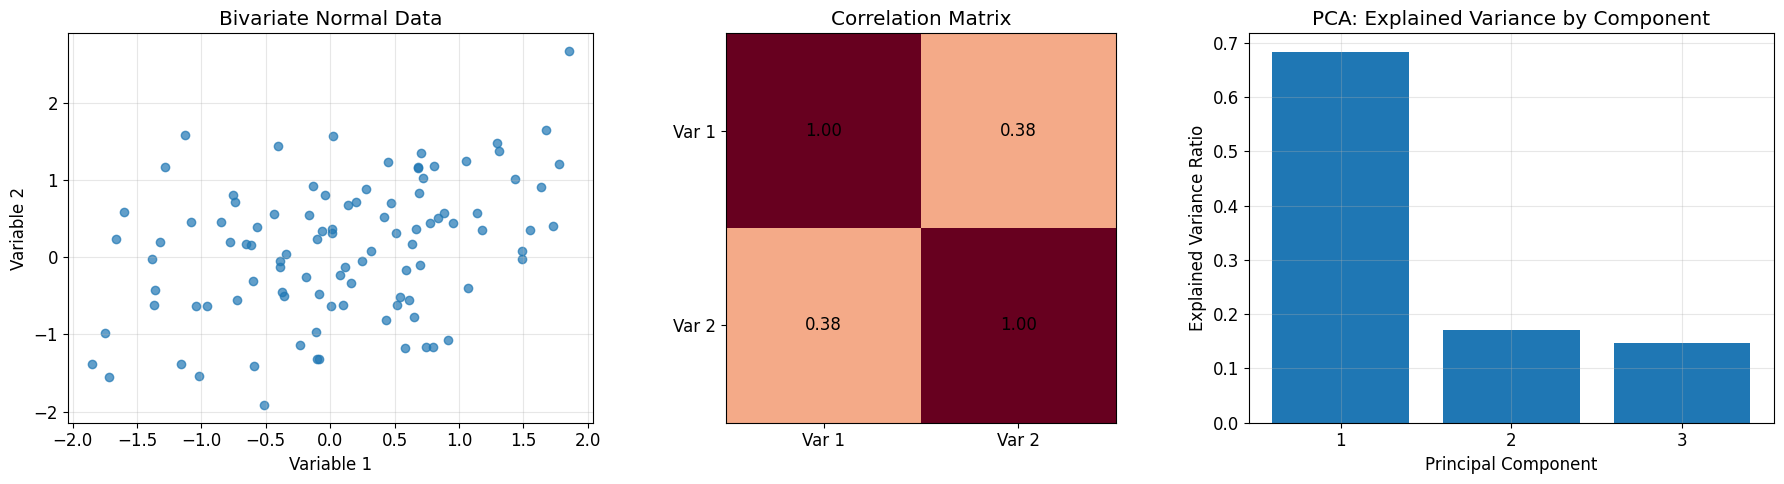

In [ ]:
# Comprehensive Linear Algebra Demonstrations

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

print("=== COMPREHENSIVE LINEAR ALGEBRA FOR STATISTICS ===\n")

# =============================================================================
# 1. MATRIX OPERATIONS AND PROPERTIES
# =============================================================================
print("1. MATRIX OPERATIONS AND PROPERTIES")
print("=" * 50)

np.random.seed(42)

# Define example matrices
A = np.array([[4, 2, 1],
              [2, 3, 0.5],
              [1, 0.5, 2]])

B = np.array([[1, 2, 0],
              [3, 1, 2],
              [0, 1, 3]])

x = np.array([1, 2, 3])
y = np.array([2, 1, 4])

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print(f"\nVector x: {x}")
print(f"Vector y: {y}")

# Basic operations
print(f"\nBasic Matrix Operations:")
print(f"A + B:")
print(A + B)
print(f"\nA @ B (matrix multiplication):")
print(A @ B)
print(f"\nA.T (transpose):")
print(A.T)
print(f"\nTrace of A: {np.trace(A):.4f}")
print(f"Determinant of A: {np.linalg.det(A):.4f}")
print(f"Rank of A: {np.linalg.matrix_rank(A)}")

# Matrix inverse and properties
A_inv = np.linalg.inv(A)
print(f"\nInverse of A:")
print(A_inv)
print(f"\nVerification A @ A^(-1) (should be identity):")
print(A @ A_inv)
print(f"\nCondition number of A: {np.linalg.cond(A):.4f}")

# Vector operations
print(f"\nVector Operations:")
print(f"x · y (dot product): {np.dot(x, y)}")
print(f"||x|| (L2 norm): {np.linalg.norm(x):.4f}")
print(f"||y|| (L2 norm): {np.linalg.norm(y):.4f}")
print(f"Angle between x and y: {np.arccos(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))):.4f} radians")

# Quadratic form
quad_form = x.T @ A @ x
print(f"\nQuadratic form x^T @ A @ x = {quad_form:.4f}")

# =============================================================================
# 2. EIGENVALUES AND EIGENVECTORS
# =============================================================================
print("\n2. EIGENVALUES AND EIGENVECTORS")
print("=" * 50)

# Eigendecomposition
eigenvals, eigenvecs = np.linalg.eig(A)
sorted_indices = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[sorted_indices]
eigenvecs = eigenvecs[:, sorted_indices]

print(f"Eigenvalues: {eigenvals}")
print(f"Eigenvectors:")
for i, (val, vec) in enumerate(zip(eigenvals, eigenvecs.T)):
    print(f"  λ_{i+1} = {val:.4f}, v_{i+1} = {vec}")

# Verify eigenvalue equation: Av = λv
print(f"\nVerification of eigenvalue equation Av = λv:")
for i in range(len(eigenvals)):
    Av = A @ eigenvecs[:, i]
    lambda_v = eigenvals[i] * eigenvecs[:, i]
    error = np.linalg.norm(Av - lambda_v)
    print(f"  Eigenvalue {i+1}: ||Av - λv|| = {error:.10f}")

# Properties verification
print(f"\nEigenvalue Properties:")
print(f"Sum of eigenvalues (trace): {np.sum(eigenvals):.4f}")
print(f"Actual trace: {np.trace(A):.4f}")
print(f"Product of eigenvalues (determinant): {np.prod(eigenvals):.4f}")
print(f"Actual determinant: {np.linalg.det(A):.4f}")

# Matrix reconstruction
A_reconstructed = eigenvecs @ np.diag(eigenvals) @ eigenvecs.T
reconstruction_error = np.linalg.norm(A - A_reconstructed)
print(f"Eigendecomposition reconstruction error: {reconstruction_error:.10f}")

# =============================================================================
# 3. MATRIX DECOMPOSITIONS
# =============================================================================
print("\n3. MATRIX DECOMPOSITIONS")
print("=" * 50)

# Create a non-square matrix for SVD
M = np.random.randn(5, 3)
M = M + 0.5 * np.random.randn(5, 3)  # Add some correlation

print(f"Matrix M shape: {M.shape}")

# Singular Value Decomposition (SVD)
U, s, Vt = np.linalg.svd(M, full_matrices=False)
print(f"\nSVD: M = U @ Σ @ V^T")
print(f"U shape: {U.shape}")
print(f"Singular values: {s}")
print(f"V^T shape: {Vt.shape}")

# Reconstruct matrix
M_reconstructed = U @ np.diag(s) @ Vt
svd_error = np.linalg.norm(M - M_reconstructed)
print(f"SVD reconstruction error: {svd_error:.10f}")

# Low-rank approximation
for rank in [1, 2, 3]:
    M_approx = U[:, :rank] @ np.diag(s[:rank]) @ Vt[:rank, :]
    approx_error = np.linalg.norm(M - M_approx)
    explained_var = np.sum(s[:rank]**2) / np.sum(s**2)
    print(f"Rank-{rank} approximation error: {approx_error:.4f}, Explained variance: {explained_var:.3%}")

# QR Decomposition
Q, R = np.linalg.qr(M)
print(f"\nQR Decomposition:")
print(f"Q shape: {Q.shape}")
print(f"R shape: {R.shape}")
print(f"Q orthogonality check ||Q^T @ Q - I||: {np.linalg.norm(Q.T @ Q - np.eye(Q.shape[1])):.10f}")

# Cholesky Decomposition (positive definite matrix)
# Create a positive definite matrix
S = M.T @ M + 0.1 * np.eye(M.shape[1])  # Ensure positive definiteness
L = np.linalg.cholesky(S)
print(f"\nCholesky Decomposition (S = L @ L^T):")
print(f"S (positive definite):")
print(S)
print(f"L (lower triangular):")
print(L)
chol_error = np.linalg.norm(S - L @ L.T)
print(f"Cholesky reconstruction error: {chol_error:.10f}")

# =============================================================================
# 4. COVARIANCE AND CORRELATION ANALYSIS
# =============================================================================
print("\n4. COVARIANCE AND CORRELATION ANALYSIS")
print("=" * 50)

# Generate multivariate data with known covariance structure
true_cov = np.array([[2.0, 1.2, 0.8],
                     [1.2, 1.5, 0.3],
                     [0.8, 0.3, 1.0]])

n_samples = 500
data = np.random.multivariate_normal([0, 0, 0], true_cov, n_samples)

# Sample covariance and correlation
sample_cov = np.cov(data.T, ddof=1)
sample_corr = np.corrcoef(data.T)

print(f"Data shape: {data.shape}")
print(f"\nTrue covariance matrix:")
print(true_cov)
print(f"\nSample covariance matrix:")
print(sample_cov)
print(f"\nSample correlation matrix:")
print(sample_corr)

# Covariance matrix properties
cov_eigenvals, cov_eigenvecs = np.linalg.eig(sample_cov)
print(f"\nCovariance matrix eigenvalues: {cov_eigenvals}")
print(f"All eigenvalues positive (positive definite): {np.all(cov_eigenvals > 0)}")
print(f"Determinant: {np.linalg.det(sample_cov):.4f}")
print(f"Trace (total variance): {np.trace(sample_cov):.4f}")

# Mahalanobis distance example
point = np.array([1, 1, 1])
mahal_dist = np.sqrt((point - np.mean(data, axis=0)).T @ np.linalg.inv(sample_cov) @ (point - np.mean(data, axis=0)))
euclidean_dist = np.linalg.norm(point - np.mean(data, axis=0))
print(f"\nFor point {point}:")
print(f"Mahalanobis distance: {mahal_dist:.4f}")
print(f"Euclidean distance: {euclidean_dist:.4f}")

# =============================================================================
# 5. PRINCIPAL COMPONENT ANALYSIS (PCA)
# =============================================================================
print("\n5. PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 50)

# Generate high-dimensional data with correlation structure
np.random.seed(42)
n_features = 6
n_samples = 200

# Create data with some underlying structure
latent_factors = np.random.randn(n_samples, 2)
factor_loadings = np.random.randn(n_features, 2)
noise = 0.5 * np.random.randn(n_samples, n_features)
high_dim_data = latent_factors @ factor_loadings.T + noise

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(high_dim_data)

print(f"Original data shape: {high_dim_data.shape}")
print(f"PCA transformed data shape: {pca_data.shape}")

# PCA results
print(f"\nPCA Results:")
print(f"Principal component loadings (first 3 components):")
for i in range(min(3, len(pca.components_))):
    print(f"  PC{i+1}: {pca.components_[i]}")

print(f"\nVariance explained by each component:")
for i, var_exp in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var_exp:.3%}")

print(f"Cumulative variance explained:")
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
for i, cum_var in enumerate(cumsum_var):
    print(f"  First {i+1} PCs: {cum_var:.3%}")

# Manual PCA verification
centered_data = high_dim_data - np.mean(high_dim_data, axis=0)
cov_matrix = np.cov(centered_data.T)
manual_eigenvals, manual_eigenvecs = np.linalg.eig(cov_matrix)

# Sort by eigenvalues
sort_idx = np.argsort(manual_eigenvals)[::-1]
manual_eigenvals = manual_eigenvals[sort_idx]
manual_eigenvecs = manual_eigenvecs[:, sort_idx]

manual_transform = centered_data @ manual_eigenvecs

print(f"\nManual PCA verification:")
print(f"Eigenvalues match: {np.allclose(pca.explained_variance_, manual_eigenvals)}")
print(f"Transformation match: {np.allclose(np.abs(pca_data), np.abs(manual_transform))}")

# =============================================================================
# 6. LINEAR REGRESSION WITH MATRIX ALGEBRA
# =============================================================================
print("\n6. LINEAR REGRESSION WITH MATRIX ALGEBRA")
print("=" * 50)

# Generate regression data
n_obs = 100
X_reg = np.random.randn(n_obs, 3)
X_reg = np.column_stack([np.ones(n_obs), X_reg])  # Add intercept
true_beta = np.array([2.0, 1.5, -0.8, 2.3])
y_reg = X_reg @ true_beta + 0.5 * np.random.randn(n_obs)

print(f"Regression data: {X_reg.shape[0]} observations, {X_reg.shape[1]-1} features + intercept")
print(f"True coefficients: {true_beta}")

# Normal equations solution
XtX = X_reg.T @ X_reg
Xty = X_reg.T @ y_reg
beta_hat = np.linalg.solve(XtX, Xty)

print(f"Estimated coefficients: {beta_hat}")
print(f"Estimation error: {np.linalg.norm(true_beta - beta_hat):.6f}")

# Alternative: using pseudoinverse
beta_hat_pinv = np.linalg.pinv(X_reg) @ y_reg
print(f"Pseudoinverse solution: {beta_hat_pinv}")

# Variance-covariance matrix of coefficients
residuals = y_reg - X_reg @ beta_hat
mse = np.sum(residuals**2) / (n_obs - X_reg.shape[1])
var_cov_beta = mse * np.linalg.inv(XtX)

print(f"\nCoefficient standard errors:")
se_beta = np.sqrt(np.diag(var_cov_beta))
for i, (coef, se) in enumerate(zip(beta_hat, se_beta)):
    print(f"  β_{i}: {coef:.4f} ± {se:.4f}")

# Hat matrix
H = X_reg @ np.linalg.inv(XtX) @ X_reg.T
leverage = np.diag(H)
print(f"\nLeverage statistics:")
print(f"  Mean leverage: {np.mean(leverage):.4f}")
print(f"  Max leverage: {np.max(leverage):.4f}")
print(f"  High leverage points (> 2p/n): {np.sum(leverage > 2*X_reg.shape[1]/n_obs)}")

# =============================================================================
# 7. ADVANCED TOPICS
# =============================================================================
print("\n7. ADVANCED TOPICS")
print("=" * 50)

# Matrix norms
test_matrix = np.random.randn(4, 4)
print(f"Matrix norms for 4×4 random matrix:")
print(f"  Frobenius norm: {np.linalg.norm(test_matrix, 'fro'):.4f}")
print(f"  Spectral norm (2-norm): {np.linalg.norm(test_matrix, 2):.4f}")
print(f"  Nuclear norm: {np.sum(np.linalg.svd(test_matrix)[1]):.4f}")

# Condition number analysis
print(f"\nCondition number analysis:")
well_conditioned = np.array([[5, 1], [1, 5]])
ill_conditioned = np.array([[1, 1], [1, 1.0001]])

print(f"  Well-conditioned matrix condition number: {np.linalg.cond(well_conditioned):.2f}")
print(f"  Ill-conditioned matrix condition number: {np.linalg.cond(ill_conditioned):.0f}")

# Generalized eigenvalue problem example
A_gen = np.array([[2, 1], [1, 2]])
B_gen = np.array([[1, 0.5], [0.5, 1]])
gen_eigenvals, gen_eigenvecs = np.linalg.eig(A_gen, B_gen)
print(f"\nGeneralized eigenvalue problem Av = λBv:")
print(f"  Generalized eigenvalues: {gen_eigenvals}")

# =============================================================================
# 8. VISUALIZATIONS
# =============================================================================

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Eigenvalue visualization
ax1 = plt.subplot(3, 4, 1)
eigenvals_sorted = np.sort(eigenvals)[::-1]
plt.bar(range(1, len(eigenvals_sorted)+1), eigenvals_sorted)
plt.title('Eigenvalues of Matrix A')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.3)

# 2. Singular values
ax2 = plt.subplot(3, 4, 2)
plt.bar(range(1, len(s)+1), s)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True, alpha=0.3)

# 3. Covariance matrix heatmap
ax3 = plt.subplot(3, 4, 3)
im = plt.imshow(sample_cov, cmap='coolwarm', aspect='auto')
plt.colorbar(im)
plt.title('Sample Covariance Matrix')
plt.xlabel('Variable')
plt.ylabel('Variable')

# 4. Correlation matrix heatmap
ax4 = plt.subplot(3, 4, 4)
im = plt.imshow(sample_corr, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(im)
plt.title('Sample Correlation Matrix')
plt.xlabel('Variable')
plt.ylabel('Variable')

# 5. PCA scree plot
ax5 = plt.subplot(3, 4, 5)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.grid(True, alpha=0.3)

# 6. Cumulative variance explained
ax6 = plt.subplot(3, 4, 6)
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'ro-')
plt.axhline(y=0.8, color='k', linestyle='--', alpha=0.7, label='80% threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.grid(True, alpha=0.3)

# 7. First two principal components
ax7 = plt.subplot(3, 4, 7)
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('First Two Principal Components')
plt.grid(True, alpha=0.3)

# 8. Leverage plot
ax8 = plt.subplot(3, 4, 8)
plt.scatter(range(len(leverage)), leverage, alpha=0.6)
plt.axhline(y=2*X_reg.shape[1]/n_obs, color='r', linestyle='--', label='2p/n threshold')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.title('Leverage Values')
plt.legend()
plt.grid(True, alpha=0.3)

# 9. Condition number vs noise
ax9 = plt.subplot(3, 4, 9)
noise_levels = np.logspace(-10, -1, 20)
condition_numbers = []
for noise in noise_levels:
    noisy_matrix = A + noise * np.random.randn(*A.shape)
    condition_numbers.append(np.linalg.cond(noisy_matrix))

plt.semilogx(noise_levels, condition_numbers)
plt.xlabel('Noise Level')
plt.ylabel('Condition Number')
plt.title('Condition Number vs Noise')
plt.grid(True, alpha=0.3)

# 10. Regression residuals
ax10 = plt.subplot(3, 4, 10)
y_pred = X_reg @ beta_hat
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.grid(True, alpha=0.3)

# 11. Coefficient comparison
ax11 = plt.subplot(3, 4, 11)
x_pos = np.arange(len(true_beta))
width = 0.35
plt.bar(x_pos - width/2, true_beta, width, label='True', alpha=0.8)
plt.bar(x_pos + width/2, beta_hat, width, label='Estimated', alpha=0.8)
plt.xlabel('Coefficient Index')
plt.ylabel('Value')
plt.title('Coefficient Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 12. Matrix reconstruction error
ax12 = plt.subplot(3, 4, 12)
ranks = range(1, min(M.shape) + 1)
reconstruction_errors = []
for rank in ranks:
    M_approx = U[:, :rank] @ np.diag(s[:rank]) @ Vt[:rank, :]
    error = np.linalg.norm(M - M_approx)
    reconstruction_errors.append(error)

plt.plot(ranks, reconstruction_errors, 'go-')
plt.xlabel('Rank')
plt.ylabel('Reconstruction Error')
plt.title('SVD Reconstruction Error')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 9. PRACTICAL APPLICATIONS SUMMARY
# =============================================================================
print("\n9. PRACTICAL APPLICATIONS SUMMARY")
print("=" * 50)

print("Linear Algebra Applications in Statistics:")
print("1. Eigendecomposition → PCA, factor analysis, spectral methods")
print("2. SVD → Dimensionality reduction, collaborative filtering, noise reduction")
print("3. QR decomposition → Stable least squares, Gram-Schmidt orthogonalization")
print("4. Cholesky decomposition → Efficient covariance computations, simulation")
print("5. Matrix norms → Regularization, convergence analysis")
print("6. Condition numbers → Numerical stability assessment")
print("7. Hat matrix → Leverage analysis, influence diagnostics")
print("8. Quadratic forms → Hypothesis testing, distance metrics")
print("9. Generalized eigenproblems → Canonical correlation, discriminant analysis")
print("10. Pseudoinverse → Robust regression, rank-deficient problems")

print(f"\n=== LINEAR ALGEBRA ANALYSIS COMPLETE ===")
print(f"\nKey findings:")
print(f"• Matrix A condition number: {np.linalg.cond(A):.2f} (well-conditioned)")
print(f"• PCA: First 2 components explain {cumsum_var[1]:.1%} of variance")
print(f"• Regression: Coefficient estimation error {np.linalg.norm(true_beta - beta_hat):.6f}")
print(f"• SVD: Rank-1 approximation captures {(s[0]**2/np.sum(s**2)):.1%} of matrix energy")
print(f"• High leverage observations: {np.sum(leverage > 2*X_reg.shape[1]/n_obs)} out of {n_obs}")

## 6. Bayesian Statistics

### 6.1 Bayes' Theorem

#### 6.1.1 Basic Forms

**Simple Form:**
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

**Parameter Inference Form:**
$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

**In Terms of Densities:**
$$\pi(\theta|x) = \frac{f(x|\theta) \cdot \pi(\theta)}{f(x)}$$

Where:
- $\pi(\theta|x)$ = Posterior density (our updated belief about $\theta$)
- $f(x|\theta)$ = Likelihood function (probability of data given $\theta$)
- $\pi(\theta)$ = Prior density (initial belief about $\theta$)
- $f(x)$ = Marginal likelihood (normalizing constant)

#### 6.1.2 Law of Total Probability

**Discrete Case:**
$$P(B) = \sum_{i} P(B|A_i) \cdot P(A_i)$$

**Continuous Case:**
$$f(x) = \int f(x|\theta) \cdot \pi(\theta) \, d\theta$$

### 6.2 Prior Distributions

#### 6.2.1 Types of Priors

**Informative Priors:**
Incorporate substantial prior knowledge about the parameter.

**Non-informative (Objective) Priors:**
- **Uniform Prior:** $\pi(\theta) \propto 1$ (constant)
- **Jeffreys Prior:** $\pi(\theta) \propto \sqrt{I(\theta)}$ where $I(\theta)$ is Fisher information
- **Reference Priors:** Maximize expected information gain

**Weakly Informative Priors:**
Gently regularize while allowing data to dominate.

#### 6.2.2 Common Prior Families

**Beta Distribution:**
$$\pi(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}$$

**Normal Distribution:**
$$\pi(\mu) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\mu-\mu_0)^2}{2\sigma^2}\right)$$

**Gamma Distribution:**
$$\pi(\lambda) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$

### 6.3 Conjugate Priors

#### 6.3.1 Beta-Binomial Conjugacy

**Prior:** $\theta \sim \text{Beta}(\alpha, \beta)$
**Likelihood:** $X|\theta \sim \text{Binomial}(n, \theta)$
**Posterior:** $\theta|x \sim \text{Beta}(\alpha + x, \beta + n - x)$

**Posterior Parameters:**
- $\alpha_{\text{post}} = \alpha + x$ (prior successes + observed successes)
- $\beta_{\text{post}} = \beta + n - x$ (prior failures + observed failures)

**Posterior Moments:**
$$E[\theta|x] = \frac{\alpha + x}{\alpha + \beta + n}$$
$$\text{Var}[\theta|x] = \frac{(\alpha + x)(\beta + n - x)}{(\alpha + \beta + n)^2(\alpha + \beta + n + 1)}$$

#### 6.3.2 Normal-Normal Conjugacy (Known Variance)

**Prior:** $\mu \sim \mathcal{N}(\mu_0, \tau_0^2)$
**Likelihood:** $X_i|\mu \sim \mathcal{N}(\mu, \sigma^2)$ (known $\sigma^2$)
**Posterior:** $\mu|\mathbf{x} \sim \mathcal{N}(\mu_n, \tau_n^2)$

**Posterior Parameters:**
$$\mu_n = \frac{\frac{\mu_0}{\tau_0^2} + \frac{n\bar{x}}{\sigma^2}}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}}$$

$$\frac{1}{\tau_n^2} = \frac{1}{\tau_0^2} + \frac{n}{\sigma^2}$$

**Interpretation:** Precision-weighted average of prior mean and sample mean.

#### 6.3.3 Gamma-Poisson Conjugacy

**Prior:** $\lambda \sim \text{Gamma}(\alpha, \beta)$
**Likelihood:** $X_i|\lambda \sim \text{Poisson}(\lambda)$
**Posterior:** $\lambda|\mathbf{x} \sim \text{Gamma}(\alpha + \sum x_i, \beta + n)$

#### 6.3.4 Normal-Inverse-Gamma Conjugacy

**Prior:** $(\mu, \sigma^2) \sim \text{NIG}(\mu_0, \lambda_0, \alpha_0, \beta_0)$
**Likelihood:** $X_i|(\mu, \sigma^2) \sim \mathcal{N}(\mu, \sigma^2)$

**Joint Prior:**
$$\sigma^2 \sim \text{InverseGamma}(\alpha_0, \beta_0)$$
$$\mu|\sigma^2 \sim \mathcal{N}\left(\mu_0, \frac{\sigma^2}{\lambda_0}\right)$$

### 6.4 Posterior Inference

#### 6.4.1 Point Estimation

**Posterior Mean (Bayes Estimator under Squared Loss):**
$$\hat{\theta}_{\text{Bayes}} = E[\theta|x] = \int \theta \cdot \pi(\theta|x) \, d\theta$$

**Posterior Median (Bayes Estimator under Absolute Loss):**
$$\hat{\theta}_{\text{median}} = \text{Median}[\theta|x]$$

**Maximum A Posteriori (MAP) Estimator:**
$$\hat{\theta}_{\text{MAP}} = \arg\max_{\theta} \pi(\theta|x)$$

#### 6.4.2 Credible Intervals

**Equal-Tailed Credible Interval:**
Find $\theta_L$ and $\theta_U$ such that:
$$P(\theta < \theta_L | x) = \frac{\alpha}{2}, \quad P(\theta > \theta_U | x) = \frac{\alpha}{2}$$

**Highest Posterior Density (HPD) Interval:**
The $(1-\alpha)\times 100\%$ HPD interval is the shortest interval containing $(1-\alpha)$ of the posterior probability.

For HPD interval $[\theta_L, \theta_U]$:
- $\int_{\theta_L}^{\theta_U} \pi(\theta|x) \, d\theta = 1-\alpha$
- $\pi(\theta_L|x) = \pi(\theta_U|x)$ (equal density at endpoints)
- For all $\theta \in [\theta_L, \theta_U]$ and $\theta' \notin [\theta_L, \theta_U]$: $\pi(\theta|x) \geq \pi(\theta'|x)$

#### 6.4.3 Posterior Predictive Distribution

For a new observation $x^*$:
$$p(x^*|x) = \int p(x^*|\theta) \pi(\theta|x) \, d\theta$$

**Properties:**
- Incorporates both parameter uncertainty and sampling variability
- Wider than plug-in predictions using point estimates
- Naturally accounts for model uncertainty

**Example (Beta-Binomial):**
If $\theta|x \sim \text{Beta}(\alpha_n, \beta_n)$, then:
$$P(X^* = 1|x) = \frac{\alpha_n}{\alpha_n + \beta_n}$$

### 6.5 Markov Chain Monte Carlo (MCMC)

#### 6.5.1 Metropolis-Hastings Algorithm

**Goal:** Sample from posterior $\pi(\theta|x)$ when direct sampling is impossible.

**Algorithm:**
1. Start with initial value $\theta^{(0)}$
2. For $t = 1, 2, \ldots, T$:
   - Propose: $\theta^* \sim q(\theta^*|\theta^{(t-1)})$
   - Compute acceptance probability:
     $$\alpha(\theta^{(t-1)}, \theta^*) = \min\left(1, \frac{\pi(\theta^*|x) q(\theta^{(t-1)}|\theta^*)}{\pi(\theta^{(t-1)}|x) q(\theta^*|\theta^{(t-1)})}\right)$$
   - Accept: $\theta^{(t)} = \theta^*$ with probability $\alpha$, otherwise $\theta^{(t)} = \theta^{(t-1)}$

**Special Cases:**
- **Random Walk Metropolis:** $q(\theta^*|\theta) = \mathcal{N}(\theta, \sigma^2 I)$
- **Independence Sampler:** $q(\theta^*|\theta) = q(\theta^*)$

#### 6.5.2 Gibbs Sampling

For multivariate parameters $\boldsymbol{\theta} = (\theta_1, \ldots, \theta_p)$:

**Algorithm:**
1. Initialize $\boldsymbol{\theta}^{(0)} = (\theta_1^{(0)}, \ldots, \theta_p^{(0)})$
2. For $t = 1, 2, \ldots, T$:
   - Sample $\theta_1^{(t)} \sim \pi(\theta_1 | \theta_2^{(t-1)}, \ldots, \theta_p^{(t-1)}, x)$
   - Sample $\theta_2^{(t)} \sim \pi(\theta_2 | \theta_1^{(t)}, \theta_3^{(t-1)}, \ldots, \theta_p^{(t-1)}, x)$
   - $\vdots$
   - Sample $\theta_p^{(t)} \sim \pi(\theta_p | \theta_1^{(t)}, \ldots, \theta_{p-1}^{(t)}, x)$

**Advantage:** No tuning of proposal distributions needed.
**Requirement:** Must be able to sample from all full conditional distributions.

#### 6.5.3 Convergence Diagnostics

**Trace Plots:** Visual inspection of chain behavior

**Gelman-Rubin Statistic ($\hat{R}$):**
$$\hat{R} = \sqrt{\frac{\hat{V}}{W}}$$
where $W$ is within-chain variance and $\hat{V}$ is pooled variance estimate.
- $\hat{R} \approx 1$ indicates convergence
- $\hat{R} > 1.1$ suggests lack of convergence

**Effective Sample Size:**
$$\text{ESS} = \frac{T}{1 + 2\sum_{k=1}^{\infty} \rho_k}$$
where $\rho_k$ is the autocorrelation at lag $k$.

### 6.6 Bayesian Model Comparison

#### 6.6.1 Bayes Factors

**Definition:**
$$\text{BF}_{12} = \frac{p(x|M_1)}{p(x|M_2)} = \frac{\int p(x|\theta_1, M_1) p(\theta_1|M_1) d\theta_1}{\int p(x|\theta_2, M_2) p(\theta_2|M_2) d\theta_2}$$

**Interpretation:**
- $\text{BF}_{12} > 1$: Evidence favors $M_1$
- $\text{BF}_{12} < 1$: Evidence favors $M_2$
- $\text{BF}_{12} = 1$: No evidence either way

**Kass and Raftery Scale:**
- $1 < \text{BF} < 3$: Weak evidence
- $3 < \text{BF} < 20$: Positive evidence  
- $20 < \text{BF} < 150$: Strong evidence
- $\text{BF} > 150$: Very strong evidence

#### 6.6.2 Information Criteria

**Deviance Information Criterion (DIC):**
$$\text{DIC} = \overline{D(\theta)} + p_D$$
where:
- $D(\theta) = -2\log p(x|\theta)$ (deviance)
- $\overline{D(\theta)} = E[D(\theta)|x]$ (posterior mean deviance)
- $p_D = \overline{D(\theta)} - D(\bar{\theta})$ (effective number of parameters)

**Watanabe-Akaike Information Criterion (WAIC):**
$$\text{WAIC} = -2(\text{lppd} - p_{\text{WAIC}})$$
where:
- $\text{lppd} = \sum_{i=1}^n \log \int p(x_i|\theta) p(\theta|x) d\theta$ (log pointwise predictive density)
- $p_{\text{WAIC}} = \sum_{i=1}^n \text{Var}(\log p(x_i|\theta)|x)$ (effective number of parameters)

**Leave-One-Out Cross-Validation (LOO-CV):**
$$\text{LOO-CV} = -2\sum_{i=1}^n \log p(x_i|x_{-i})$$

#### 6.6.3 Posterior Model Probabilities

Given models $M_1, \ldots, M_K$ with prior probabilities $p(M_k)$:

$$p(M_k|x) = \frac{p(x|M_k) p(M_k)}{\sum_{j=1}^K p(x|M_j) p(M_j)}$$

**Model Averaging:**
$$p(\tilde{x}|x) = \sum_{k=1}^K p(\tilde{x}|x, M_k) p(M_k|x)$$

### 6.7 Hierarchical Bayesian Models

#### 6.7.1 Basic Structure

**Three-Level Hierarchy:**
- **Level 1 (Data):** $x_i | \theta_i \sim f(x_i | \theta_i)$
- **Level 2 (Parameters):** $\theta_i | \phi \sim g(\theta_i | \phi)$  
- **Level 3 (Hyperparameters):** $\phi \sim h(\phi)$

**Joint Distribution:**
$$p(x, \theta, \phi) = \prod_{i=1}^n f(x_i | \theta_i) \cdot \prod_{i=1}^n g(\theta_i | \phi) \cdot h(\phi)$$

**Marginal Likelihood:**
$$p(x | \phi) = \prod_{i=1}^n \int f(x_i | \theta_i) g(\theta_i | \phi) d\theta_i$$

#### 6.7.2 Empirical Bayes

**Type II Maximum Likelihood:**
$$\hat{\phi} = \arg\max_{\phi} p(x | \phi)$$

**Fully Bayesian vs Empirical Bayes:**
- **Fully Bayesian:** Place prior on $\phi$ and integrate it out
- **Empirical Bayes:** Estimate $\phi$ from data, then proceed conditionally

#### 6.7.3 Shrinkage and Pooling

**No Pooling:** Estimate each $\theta_i$ separately
$$\hat{\theta}_i^{\text{no pool}} = \arg\max_{\theta_i} f(x_i | \theta_i)$$

**Complete Pooling:** Assume all $\theta_i$ are equal
$$\hat{\theta}^{\text{pool}} = \arg\max_{\theta} \prod_{i=1}^n f(x_i | \theta)$$

**Partial Pooling (Hierarchical):** 
$$\hat{\theta}_i^{\text{shrink}} = \lambda_i \hat{\theta}_i^{\text{no pool}} + (1 - \lambda_i) \hat{\theta}^{\text{group}}$$

where $0 < \lambda_i < 1$ depends on within-group vs between-group variance.

### 6.8 Step-by-Step Mathematical Derivations

#### 6.8.1 Beta-Binomial Conjugacy Derivation

**Given Setup:**
- Prior: $\theta \sim \text{Beta}(\alpha, \beta)$
- Likelihood: $X|\theta \sim \text{Binomial}(n, \theta)$
- Observed: $X = x$ successes out of $n$ trials

**Step 1: Write the prior density**
$$\pi(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}, \quad 0 < \theta < 1$$

**Step 2: Write the likelihood function**
$$f(x|\theta) = \binom{n}{x} \theta^x (1-\theta)^{n-x}$$

**Step 3: Apply Bayes' theorem**
$$\pi(\theta|x) = \frac{f(x|\theta) \cdot \pi(\theta)}{\int_0^1 f(x|\theta) \cdot \pi(\theta) d\theta} \propto f(x|\theta) \cdot \pi(\theta)$$

**Step 4: Multiply likelihood and prior (ignore constants)**
$$\pi(\theta|x) \propto \theta^x (1-\theta)^{n-x} \cdot \theta^{\alpha-1}(1-\theta)^{\beta-1}$$

**Step 5: Combine the powers of $\theta$ and $(1-\theta)$**
$$\pi(\theta|x) \propto \theta^{x+\alpha-1} (1-\theta)^{n-x+\beta-1}$$

**Step 6: Recognize this as a Beta distribution**
$$\pi(\theta|x) = \text{Beta}(x + \alpha, n - x + \beta)$$

**Step 7: Identify posterior parameters**
- $\alpha_{\text{posterior}} = \alpha + x$ (prior successes + observed successes)
- $\beta_{\text{posterior}} = \beta + n - x$ (prior failures + observed failures)

**Step 8: Posterior moments**
$$E[\theta|x] = \frac{\alpha + x}{\alpha + \beta + n}$$
$$\text{Var}[\theta|x] = \frac{(\alpha + x)(\beta + n - x)}{(\alpha + \beta + n)^2(\alpha + \beta + n + 1)}$$

**Interpretation:**
The posterior mean is a weighted average of the prior mean $\frac{\alpha}{\alpha + \beta}$ and the sample proportion $\frac{x}{n}$, with weights proportional to the precision (inverse variance) of each estimate.

#### 6.8.2 Normal-Normal Conjugacy Derivation (Known Variance)

**Given Setup:**
- Prior: $\mu \sim \mathcal{N}(\mu_0, \tau_0^2)$
- Likelihood: $X_i|\mu \sim \mathcal{N}(\mu, \sigma^2)$ for $i = 1, \ldots, n$ (known $\sigma^2$)
- Observed: $\mathbf{x} = (x_1, \ldots, x_n)$

**Step 1: Write the prior density**
$$\pi(\mu) = \frac{1}{\sqrt{2\pi\tau_0^2}} \exp\left(-\frac{(\mu-\mu_0)^2}{2\tau_0^2}\right)$$

**Step 2: Write the likelihood function**
$$f(\mathbf{x}|\mu) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)$$

**Step 3: Simplify the likelihood**
$$f(\mathbf{x}|\mu) = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2\right)$$

**Step 4: Expand the sum in the exponent**
$$\sum_{i=1}^n(x_i-\mu)^2 = \sum_{i=1}^n x_i^2 - 2\mu\sum_{i=1}^n x_i + n\mu^2$$
$$= \sum_{i=1}^n x_i^2 - 2n\mu\bar{x} + n\mu^2$$

**Step 5: Complete the square for the likelihood**
$$\sum_{i=1}^n(x_i-\mu)^2 = n(\mu - \bar{x})^2 + \sum_{i=1}^n(x_i - \bar{x})^2$$

So the likelihood becomes:
$$f(\mathbf{x}|\mu) \propto \exp\left(-\frac{n(\mu - \bar{x})^2}{2\sigma^2}\right)$$

**Step 6: Combine prior and likelihood (work in log scale)**
$$\log \pi(\mu|\mathbf{x}) \propto -\frac{(\mu-\mu_0)^2}{2\tau_0^2} - \frac{n(\mu-\bar{x})^2}{2\sigma^2}$$

**Step 7: Work with precision (inverse variance)**
Let $\lambda_0 = 1/\tau_0^2$ (prior precision) and $\lambda = n/\sigma^2$ (data precision):

$$\log \pi(\mu|\mathbf{x}) \propto -\frac{\lambda_0}{2}(\mu-\mu_0)^2 - \frac{\lambda}{2}(\mu-\bar{x})^2$$

**Step 8: Expand and collect terms**
$$\log \pi(\mu|\mathbf{x}) \propto -\frac{1}{2}\left[\lambda_0(\mu^2 - 2\mu\mu_0 + \mu_0^2) + \lambda(\mu^2 - 2\mu\bar{x} + \bar{x}^2)\right]$$

$$= -\frac{1}{2}\left[(\lambda_0 + \lambda)\mu^2 - 2\mu(\lambda_0\mu_0 + \lambda\bar{x}) + \text{constants}\right]$$

**Step 9: Complete the square**
$$\log \pi(\mu|\mathbf{x}) \propto -\frac{\lambda_0 + \lambda}{2}\left[\mu^2 - 2\mu\frac{\lambda_0\mu_0 + \lambda\bar{x}}{\lambda_0 + \lambda}\right]$$

**Step 10: Identify posterior parameters**
This is the kernel of a normal distribution with:

$$\mu_n = \frac{\lambda_0\mu_0 + \lambda\bar{x}}{\lambda_0 + \lambda} = \frac{\mu_0/\tau_0^2 + n\bar{x}/\sigma^2}{1/\tau_0^2 + n/\sigma^2}$$

$$\frac{1}{\tau_n^2} = \lambda_0 + \lambda = \frac{1}{\tau_0^2} + \frac{n}{\sigma^2}$$

**Step 11: Final result**
$$\mu|\mathbf{x} \sim \mathcal{N}(\mu_n, \tau_n^2)$$

**Interpretation:**
- Posterior precision = Prior precision + Data precision
- Posterior mean = Precision-weighted average of prior mean and sample mean
- More data (larger $n$) → posterior closer to sample mean
- Strong prior (small $\tau_0^2$) → posterior closer to prior mean

#### 6.8.3 Jeffreys Prior Derivation

**Objective:** Derive reference priors that are invariant under reparameterization.

**Step 1: Fisher Information Matrix**
For parameter $\theta$, the Fisher information is:
$$I(\theta) = -E\left[\frac{\partial^2}{\partial\theta^2} \log f(X|\theta)\right]$$

**Step 2: Jeffreys Prior Formula**
$$\pi_J(\theta) \propto \sqrt{|I(\theta)|}$$

For multivariate $\boldsymbol{\theta}$:
$$\pi_J(\boldsymbol{\theta}) \propto \sqrt{|\mathbf{I}(\boldsymbol{\theta})|}$$

**Example: Bernoulli Parameter**

**Step 1: Log-likelihood for single observation**
$$\log f(x|\theta) = x\log\theta + (1-x)\log(1-\theta)$$

**Step 2: First derivative**
$$\frac{\partial}{\partial\theta} \log f(x|\theta) = \frac{x}{\theta} - \frac{1-x}{1-\theta}$$

**Step 3: Second derivative**
$$\frac{\partial^2}{\partial\theta^2} \log f(x|\theta) = -\frac{x}{\theta^2} - \frac{1-x}{(1-\theta)^2}$$

**Step 4: Take expectation (Fisher information)**
$$I(\theta) = -E\left[-\frac{X}{\theta^2} - \frac{1-X}{(1-\theta)^2}\right]$$

$$= \frac{E[X]}{\theta^2} + \frac{E[1-X]}{(1-\theta)^2} = \frac{\theta}{\theta^2} + \frac{1-\theta}{(1-\theta)^2}$$

$$= \frac{1}{\theta} + \frac{1}{1-\theta} = \frac{1}{\theta(1-\theta)}$$

**Step 5: Apply Jeffreys formula**
$$\pi_J(\theta) \propto \sqrt{\frac{1}{\theta(1-\theta)}} = \theta^{-1/2}(1-\theta)^{-1/2}$$

**Step 6: Recognize as Beta distribution**
$$\pi_J(\theta) = \text{Beta}(1/2, 1/2)$$

This is the **arc-sine distribution**, giving more weight to extreme values near 0 and 1.

### 6.9 Advanced Computational Methods

#### 6.9.1 Hamiltonian Monte Carlo (HMC)

**Physical Motivation:** Simulate particle dynamics on a potential energy surface.

**Energy Function:**
$$H(\boldsymbol{\theta}, \mathbf{p}) = U(\boldsymbol{\theta}) + K(\mathbf{p})$$

Where:
- $U(\boldsymbol{\theta}) = -\log \pi(\boldsymbol{\theta}|\mathbf{x})$ (potential energy)
- $K(\mathbf{p}) = \frac{1}{2}\mathbf{p}^T \mathbf{M}^{-1} \mathbf{p}$ (kinetic energy)
- $\mathbf{M}$ is the mass matrix (often identity)

**Hamilton's Equations:**
$$\frac{d\boldsymbol{\theta}}{dt} = \frac{\partial H}{\partial \mathbf{p}} = \mathbf{M}^{-1}\mathbf{p}$$
$$\frac{d\mathbf{p}}{dt} = -\frac{\partial H}{\partial \boldsymbol{\theta}} = -\frac{\partial U}{\partial \boldsymbol{\theta}} = \frac{\partial \log \pi(\boldsymbol{\theta}|\mathbf{x})}{\partial \boldsymbol{\theta}}$$

**Leapfrog Integration:**
Given step size $\epsilon$ and current state $(\boldsymbol{\theta}, \mathbf{p})$:

1. **Half step for momentum:**
   $$\mathbf{p}_{1/2} = \mathbf{p} - \frac{\epsilon}{2} \frac{\partial U}{\partial \boldsymbol{\theta}}(\boldsymbol{\theta})$$

2. **Full step for position:**
   $$\boldsymbol{\theta}' = \boldsymbol{\theta} + \epsilon \mathbf{M}^{-1} \mathbf{p}_{1/2}$$

3. **Half step for momentum:**
   $$\mathbf{p}' = \mathbf{p}_{1/2} - \frac{\epsilon}{2} \frac{\partial U}{\partial \boldsymbol{\theta}}(\boldsymbol{\theta}')$$

**Accept/Reject Step:**
$$\alpha = \min\left(1, \exp(H(\boldsymbol{\theta}, \mathbf{p}) - H(\boldsymbol{\theta}', \mathbf{p}'))\right)$$

#### 6.9.2 No-U-Turn Sampler (NUTS)

**Problem:** Automatically choose trajectory length in HMC.

**Algorithm:**
1. Build binary tree of states via recursive doubling
2. Stop when trajectory makes a "U-turn" (starts returning)
3. Sample uniformly from valid states in the tree

**U-turn Criterion:**
Stop when $(\boldsymbol{\theta}_+ - \boldsymbol{\theta}_-) \cdot \mathbf{p}_+ < 0$ or $(\boldsymbol{\theta}_+ - \boldsymbol{\theta}_-) \cdot \mathbf{p}_- < 0$

Where $\boldsymbol{\theta}_-, \boldsymbol{\theta}_+$ are leftmost and rightmost positions.

#### 6.9.3 Variational Inference

**Goal:** Approximate posterior $p(\boldsymbol{\theta}|\mathbf{x})$ with simpler distribution $q(\boldsymbol{\theta};\boldsymbol{\phi})$.

**Evidence Lower Bound (ELBO):**
$$\mathcal{L}(\boldsymbol{\phi}) = E_{q(\boldsymbol{\theta};\boldsymbol{\phi})}[\log p(\mathbf{x}, \boldsymbol{\theta})] - E_{q(\boldsymbol{\theta};\boldsymbol{\phi})}[\log q(\boldsymbol{\theta};\boldsymbol{\phi})]$$

**Alternative Form:**
$$\mathcal{L}(\boldsymbol{\phi}) = \log p(\mathbf{x}) - D_{KL}(q(\boldsymbol{\theta};\boldsymbol{\phi}) || p(\boldsymbol{\theta}|\mathbf{x}))$$

**Mean-Field Approximation:**
$$q(\boldsymbol{\theta}) = \prod_{i=1}^d q_i(\theta_i)$$

**Coordinate Ascent VI:**
Update each factor $q_j(\theta_j)$ while holding others fixed:
$$\log q_j^*(\theta_j) = E_{q_{-j}}[\log p(\mathbf{x}, \boldsymbol{\theta})] + \text{const}$$

### 6.10 Marginal Likelihood and Bayes Factors

#### 6.10.1 Marginal Likelihood Computation

**Definition:**
$$p(\mathbf{x}|M) = \int p(\mathbf{x}|\boldsymbol{\theta}, M) p(\boldsymbol{\theta}|M) d\boldsymbol{\theta}$$

**Example: Beta-Binomial Model**

**Step 1: Set up the integral**
$$p(x) = \int_0^1 \binom{n}{x} \theta^x (1-\theta)^{n-x} \cdot \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1} d\theta$$

**Step 2: Factor out constants**
$$p(x) = \binom{n}{x} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \int_0^1 \theta^{x+\alpha-1}(1-\theta)^{n-x+\beta-1} d\theta$$

**Step 3: Recognize Beta function**
The integral is the Beta function $B(x+\alpha, n-x+\beta)$:
$$\int_0^1 \theta^{a-1}(1-\theta)^{b-1} d\theta = B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$$

**Step 4: Substitute with $a = x + \alpha$ and $b = n - x + \beta$**
$$p(x) = \binom{n}{x} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(x+\alpha)\Gamma(n-x+\beta)}{\Gamma(n+\alpha+\beta)}$$

**Step 5: Final form**
$$p(x) = \binom{n}{x} \frac{B(x+\alpha, n-x+\beta)}{B(\alpha, \beta)}$$

#### 6.10.2 Bayes Factor Interpretations

**Jeffreys Scale:**
- $1 < BF < 3$: Barely worth mentioning
- $3 < BF < 10$: Substantial evidence
- $10 < BF < 30$: Strong evidence
- $30 < BF < 100$: Very strong evidence
- $BF > 100$: Decisive evidence

**Kass and Raftery Scale:**
- $\log_{10} BF < 0.5$: Weak evidence
- $0.5 < \log_{10} BF < 1$: Moderate evidence
- $1 < \log_{10} BF < 2$: Strong evidence
- $\log_{10} BF > 2$: Very strong evidence

#### 6.10.3 Numerical Methods for Marginal Likelihood

**Harmonic Mean Estimator (unstable):**
$$\hat{p}(\mathbf{x}|M) = \left[\frac{1}{S}\sum_{s=1}^S \frac{1}{p(\mathbf{x}|\boldsymbol{\theta}^{(s)})}\right]^{-1}$$

**Bridge Sampling:**
$$\frac{p(\mathbf{x}|M_1)}{p(\mathbf{x}|M_2)} = \frac{E_{p_2}[p_1(\boldsymbol{\theta})r(\boldsymbol{\theta})]}{E_{p_1}[p_2(\boldsymbol{\theta})r(\boldsymbol{\theta})]}$$

**Thermodynamic Integration:**
$$\log p(\mathbf{x}|M) = \int_0^1 E_{\pi_\beta}[\log p(\mathbf{x}|\boldsymbol{\theta})] d\beta$$

where $\pi_\beta(\boldsymbol{\theta}) \propto p(\mathbf{x}|\boldsymbol{\theta})^\beta p(\boldsymbol{\theta})$

**Stepping Stone Sampling:**
$$\log p(\mathbf{x}|M) = \sum_{k=0}^{K-1} \log E_{\pi_k}\left[\left(\frac{p_{k+1}(\boldsymbol{\theta})}{p_k(\boldsymbol{\theta})}\right)^{1/n_k}\right]$$

### 6.11 Posterior Predictive Checking

#### 6.11.1 Posterior Predictive Distribution

**Definition:**
$$p(\mathbf{x}_{\text{rep}}|\mathbf{x}) = \int p(\mathbf{x}_{\text{rep}}|\boldsymbol{\theta}) p(\boldsymbol{\theta}|\mathbf{x}) d\boldsymbol{\theta}$$

Where $\mathbf{x}_{\text{rep}}$ are replicated data from the same model.

**Algorithm:**
1. Draw $\boldsymbol{\theta}^{(s)} \sim p(\boldsymbol{\theta}|\mathbf{x})$ from posterior
2. Draw $\mathbf{x}_{\text{rep}}^{(s)} \sim p(\mathbf{x}_{\text{rep}}|\boldsymbol{\theta}^{(s)})$ 
3. Repeat for $s = 1, \ldots, S$

#### 6.11.2 Test Statistics and p-values

**Posterior Predictive p-value:**
$$p_B = P(T(\mathbf{x}_{\text{rep}}, \boldsymbol{\theta}) \geq T(\mathbf{x}, \boldsymbol{\theta}) | \mathbf{x})$$

**Computational Formula:**
$$p_B = \frac{1}{S} \sum_{s=1}^S \mathbb{I}(T(\mathbf{x}_{\text{rep}}^{(s)}, \boldsymbol{\theta}^{(s)}) \geq T(\mathbf{x}, \boldsymbol{\theta}^{(s)}))$$

**Common Test Statistics:**
- **Mean:** $T = \bar{x}$
- **Variance:** $T = s^2$  
- **Minimum/Maximum:** $T = \min(\mathbf{x})$ or $T = \max(\mathbf{x})$
- **Outlier measures:** $T = |\max(\mathbf{x}) - \text{median}(\mathbf{x})|$

**Interpretation:**
- $p_B \approx 0.5$: Model fits well
- $p_B$ near 0 or 1: Model doesn't capture this aspect of data

#### 6.11.3 Graphical Posterior Predictive Checks

**Density Overlays:**
Plot $p(\mathbf{x}_{\text{rep}}^{(s)})$ for multiple posterior draws against observed data density.

**Quantile-Quantile Plots:**
Compare quantiles of $\mathbf{x}_{\text{rep}}$ vs $\mathbf{x}$.

**Test Statistic Distributions:**
Histogram of $T(\mathbf{x}_{\text{rep}}^{(s)}, \boldsymbol{\theta}^{(s)})$ with vertical line at $T(\mathbf{x}, \hat{\boldsymbol{\theta}})$.

### 6.12 Robust Bayesian Analysis

#### 6.12.1 Prior Sensitivity Analysis

**Class of Priors:**
$$\Gamma = \{(1-\epsilon)\pi_0 + \epsilon Q : Q \text{ any probability measure}, 0 \leq \epsilon \leq \epsilon_0\}$$

**$\epsilon$-contamination class around reference prior $\pi_0$.

**Sensitivity Measures:**
- **Range of posterior means:** $\sup_{\pi \in \Gamma} E[\theta|\mathbf{x}] - \inf_{\pi \in \Gamma} E[\theta|\mathbf{x}]$
- **Range of credible intervals:** Compare interval endpoints across prior class

#### 6.12.2 Robust Priors

**Heavy-tailed priors:** $t$-distributions, Cauchy priors
**Hierarchical robustness:** Model prior uncertainty with hyperpriors
**Empirical Bayes robustness:** Use data-driven priors with caution

#### 6.12.3 M-open Problems

**M-closed:** True model is in the set being considered
**M-complete:** True model approximated arbitrarily well by models in set  
**M-open:** True model not in the set (most realistic case)

**Strategies for M-open:**
- Model averaging across diverse model classes
- Robust priors that perform well under misspecification
- Cross-validation and out-of-sample prediction focus

### 6.13 Asymptotic Bayesian Theory

#### 6.13.1 Bernstein-von Mises Theorem

**Theorem:** Under regularity conditions, as $n \to \infty$:
$$\sqrt{n}(\boldsymbol{\theta} - \boldsymbol{\theta}_0) | \mathbf{x}_1, \ldots, \mathbf{x}_n \xrightarrow{d} \mathcal{N}(\mathbf{0}, \mathbf{I}(\boldsymbol{\theta}_0)^{-1})$$

Where $\mathbf{I}(\boldsymbol{\theta}_0)$ is the Fisher information matrix at the true parameter.

**Regularity Conditions:**
1. **Prior positivity:** $\pi(\boldsymbol{\theta}_0) > 0$
2. **Likelihood regularity:** Standard differentiability and moment conditions
3. **Interior point:** $\boldsymbol{\theta}_0$ is in the interior of the parameter space
4. **Identifiability:** The model is identifiable

**Implications:**
- Bayesian credible regions and frequentist confidence regions asymptotically coincide
- Prior becomes asymptotically irrelevant (with sufficient data)
- Posterior concentrates around true parameter at rate $O(n^{-1/2})$

#### 6.13.2 Posterior Consistency

**Theorem (Doob):** If $\boldsymbol{\theta}_0$ is the true parameter and the prior $\pi(\boldsymbol{\theta})$ gives positive probability to every neighborhood of $\boldsymbol{\theta}_0$, then:

$$\Pi(\boldsymbol{\theta} : ||\boldsymbol{\theta} - \boldsymbol{\theta}_0|| > \epsilon | \mathbf{X}_1, \ldots, \mathbf{X}_n) \xrightarrow{P_{\boldsymbol{\theta}_0}} 0$$

as $n \to \infty$ for every $\epsilon > 0$.

**Schwartz Theorem:** Posterior consistency holds under:
1. **Kullback-Leibler support condition:** 
   $$\inf_{\boldsymbol{\theta} \in \Theta} KL(p_{\boldsymbol{\theta}_0}, p_{\boldsymbol{\theta}}) = 0 \Rightarrow \boldsymbol{\theta} = \boldsymbol{\theta}_0$$
   
2. **Prior thickness condition:** 
   $$\pi(U_n) \geq e^{-C n \epsilon_n^2}$$
   for appropriate neighborhoods $U_n$ and rates $\epsilon_n$.

#### 6.13.3 Convergence Rates

**Optimal Rate:** Under standard conditions, $\epsilon_n = \sqrt{\frac{d \log n}{n}}$ where $d$ is parameter dimension.

**Adaptive Procedures:** Some Bayesian procedures achieve optimal rates without knowing smoothness.

**Minimax Optimality:** Bayesian procedures often achieve minimax rates.

### 6.14 Nonparametric Bayesian Methods

#### 6.14.1 Dirichlet Process

**Definition:** A random measure $G$ on space $(\mathcal{X}, \mathcal{B})$ follows $DP(\alpha, G_0)$ if for any partition $A_1, \ldots, A_k$ of $\mathcal{X}$:

$$(G(A_1), \ldots, G(A_k)) \sim \text{Dirichlet}(\alpha G_0(A_1), \ldots, \alpha G_0(A_k))$$

**Properties:**
- $E[G(A)] = G_0(A)$
- $\text{Var}[G(A)] = \frac{G_0(A)(1-G_0(A))}{\alpha + 1}$
- Almost surely discrete

**Stick-Breaking Construction:**
$$\beta_k \sim \text{Beta}(1, \alpha), \quad \pi_k = \beta_k \prod_{j=1}^{k-1}(1-\beta_j)$$
$$\theta_k^* \sim G_0, \quad G = \sum_{k=1}^\infty \pi_k \delta_{\theta_k^*}$$

**Chinese Restaurant Process:**
- Customer 1 sits at table 1
- Customer $n+1$ sits at:
  - Occupied table $k$ with probability $\frac{n_k}{n + \alpha}$
  - New table with probability $\frac{\alpha}{n + \alpha}$

#### 6.14.2 Gaussian Processes

**Definition:** A collection of random variables $\{f(x) : x \in \mathcal{X}\}$ such that any finite collection $(f(x_1), \ldots, f(x_n))$ is multivariate Gaussian.

**Specification:** Completely determined by:
- **Mean function:** $m(x) = E[f(x)]$
- **Covariance function:** $k(x, x') = \text{Cov}[f(x), f(x')]$

**Common Kernels:**
- **RBF/Squared Exponential:** $k(x, x') = \sigma^2 \exp\left(-\frac{||x - x'||^2}{2\ell^2}\right)$
- **Matérn:** $k(x, x') = \sigma^2 \frac{2^{1-\nu}}{\Gamma(\nu)} \left(\sqrt{2\nu}\frac{|x-x'|}{\ell}\right)^\nu K_\nu\left(\sqrt{2\nu}\frac{|x-x'|}{\ell}\right)$
- **Periodic:** $k(x, x') = \sigma^2 \exp\left(-\frac{2\sin^2(\pi|x-x'|/p)}{\ell^2}\right)$

### 6.15 Information Criteria and Model Selection

#### 6.15.1 Deviance Information Criterion (DIC)

**Deviance:**
$$D(\boldsymbol{\theta}) = -2\log p(\mathbf{x}|\boldsymbol{\theta})$$

**Posterior Mean Deviance:**
$$\overline{D} = E_{\text{post}}[D(\boldsymbol{\theta})] = E_{\text{post}}[-2\log p(\mathbf{x}|\boldsymbol{\theta})]$$

**Deviance at Posterior Mean:**
$$D(\overline{\boldsymbol{\theta}}) = -2\log p(\mathbf{x}|\overline{\boldsymbol{\theta}})$$

**Effective Number of Parameters:**
$$p_D = \overline{D} - D(\overline{\boldsymbol{\theta}})$$

**DIC:**
$$\text{DIC} = \overline{D} + p_D = 2\overline{D} - D(\overline{\boldsymbol{\theta}})$$

#### 6.15.2 Watanabe-Akaike Information Criterion (WAIC)

**Log Pointwise Predictive Density:**
$$\text{lppd} = \sum_{i=1}^n \log \int p(x_i|\boldsymbol{\theta}) p(\boldsymbol{\theta}|\mathbf{x}) d\boldsymbol{\theta}$$

**Computed as:**
$$\text{lppd} = \sum_{i=1}^n \log \left(\frac{1}{S}\sum_{s=1}^S p(x_i|\boldsymbol{\theta}^{(s)})\right)$$

**Effective Number of Parameters:**
$$p_{\text{WAIC}} = \sum_{i=1}^n \text{Var}_{\text{post}}(\log p(x_i|\boldsymbol{\theta}))$$

**WAIC:**
$$\text{WAIC} = -2(\text{lppd} - p_{\text{WAIC}})$$

**WAIC2 (Alternative):**
$$p_{\text{WAIC2}} = \sum_{i=1}^n \left(\frac{1}{S}\sum_{s=1}^S (\log p(x_i|\boldsymbol{\theta}^{(s)}))^2 - \left(\frac{1}{S}\sum_{s=1}^S \log p(x_i|\boldsymbol{\theta}^{(s)})\right)^2\right)$$

#### 6.15.3 Leave-One-Out Cross-Validation (LOO)

**Definition:**
$$\text{LOO} = \sum_{i=1}^n \log p(x_i|\mathbf{x}_{-i})$$

**Pareto Smoothed Importance Sampling (PSIS-LOO):**
Uses importance sampling with Pareto distribution to stabilize estimates.

**Effective Sample Size:**
$$S_{\text{eff}} = \frac{1}{\sum_{s=1}^S (w_s^{\text{norm}})^2}$$

Where $w_s^{\text{norm}}$ are normalized importance weights.

### 6.16 Bayesian Decision Theory

#### 6.16.1 Loss Functions and Risk

**Loss Function:** $L(\boldsymbol{\theta}, a)$ for parameter $\boldsymbol{\theta}$ and action $a$.

**Common Loss Functions:**
- **Squared Error:** $L(\theta, a) = (\theta - a)^2$
- **Absolute Error:** $L(\theta, a) = |\theta - a|$
- **0-1 Loss:** $L(\theta, a) = \mathbb{I}(\theta \neq a)$

**Posterior Risk:**
$$\rho(a|\mathbf{x}) = E[L(\boldsymbol{\theta}, a)|\mathbf{x}] = \int L(\boldsymbol{\theta}, a) p(\boldsymbol{\theta}|\mathbf{x}) d\boldsymbol{\theta}$$

**Bayes Action:**
$$a^* = \arg\min_a \rho(a|\mathbf{x})$$

#### 6.16.2 Point Estimation

**Squared Error Loss:** Bayes estimator is posterior mean
$$\hat{\boldsymbol{\theta}}_{\text{Bayes}} = E[\boldsymbol{\theta}|\mathbf{x}]$$

**Absolute Error Loss:** Bayes estimator is posterior median
$$\hat{\boldsymbol{\theta}}_{\text{median}} = \text{Median}[\boldsymbol{\theta}|\mathbf{x}]$$

**0-1 Loss:** Bayes estimator is posterior mode (MAP)
$$\hat{\boldsymbol{\theta}}_{\text{MAP}} = \arg\max_{\boldsymbol{\theta}} p(\boldsymbol{\theta}|\mathbf{x})$$

#### 6.16.3 Hypothesis Testing

**Simple vs Simple:**
- $H_0: \boldsymbol{\theta} = \boldsymbol{\theta}_0$ vs $H_1: \boldsymbol{\theta} = \boldsymbol{\theta}_1$

**Loss Matrix:**
$$L = \begin{pmatrix}
0 & L_{01} \\
L_{10} & 0
\end{pmatrix}$$

**Bayes Decision Rule:**
Reject $H_0$ if $\frac{p(\boldsymbol{\theta}_1|\mathbf{x})}{p(\boldsymbol{\theta}_0|\mathbf{x})} > \frac{L_{01}}{L_{10}}$

**Posterior Odds:**
$$\frac{p(H_1|\mathbf{x})}{p(H_0|\mathbf{x})} = \frac{p(\mathbf{x}|H_1)}{p(\mathbf{x}|H_0)} \cdot \frac{p(H_1)}{p(H_0)} = \text{BF}_{10} \cdot \frac{p(H_1)}{p(H_0)}$$

**Calibration:**
Well-calibrated Bayesian procedures have good frequentist properties on average.

=== COMPREHENSIVE BAYESIAN STATISTICS ===

1. BAYES' THEOREM AND BASIC INFERENCE
Medical Diagnosis Example:
Disease prevalence: 1%
Test sensitivity (P(+|Disease)): 95%
Test specificity (P(-|No Disease)): 90%

P(Disease|Positive Test) = 0.0876
Even with a positive test, only 8.8% chance of disease!

2. CONJUGATE PRIORS: BETA-BINOMIAL MODEL
Observed: 15 heads out of 20 flips

Beta-Binomial Conjugate Analysis:
Prior: Beta(2, 2)
Posterior: Beta(17, 7)

Posterior Statistics:
Mean: 0.7083
Standard deviation: 0.0909
True value: 0.7

95.0% Credible Interval: [0.5159, 0.8679]
True value in CI: True

3. NORMAL-NORMAL CONJUGATE MODEL (KNOWN VARIANCE)
Data: n = 15, sample mean = 4.3536
Known variance: σ² = 4.0

Normal-Normal Conjugate Analysis:
Prior: N(0.0, 10.0)
Posterior: N(4.2405, 0.2597)
True μ: 5.2
95% Credible Interval: [3.2416, 5.2394]

4. BAYESIAN HYPOTHESIS TESTING
Hypothesis Testing: 22 heads in 30 flips

Bayes Factor Analysis:
Marginal likelihood under H1: 0.00000001
Likelihood under H

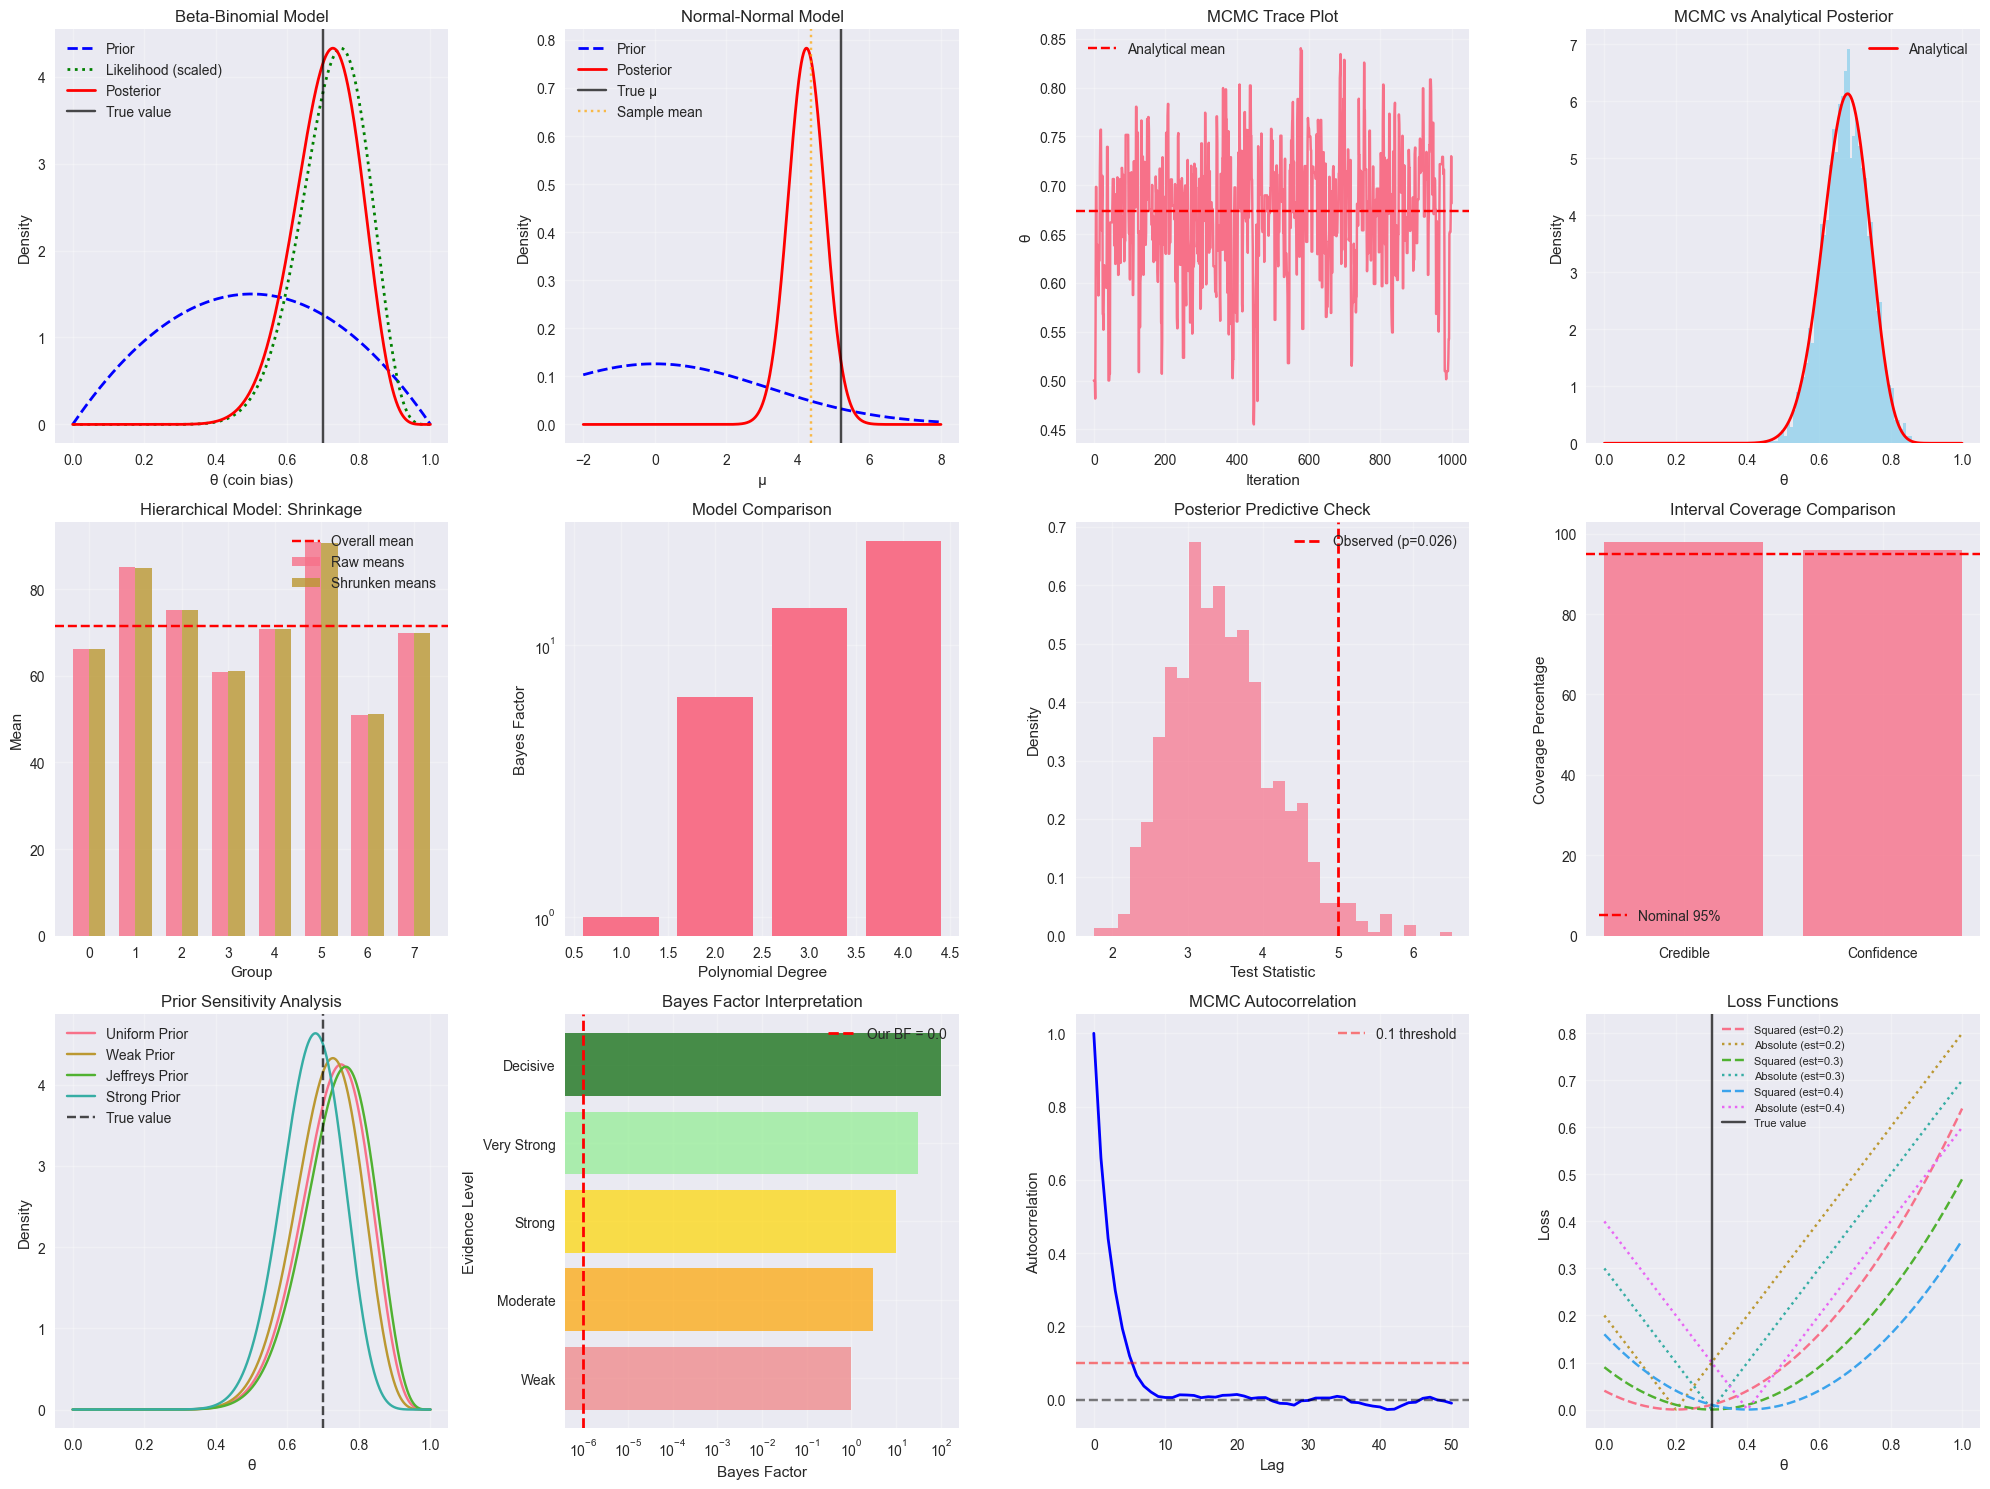


10. SUMMARY AND PRACTICAL INSIGHTS
Bayesian Statistics Key Findings:
1. Medical diagnosis: Even with 95% accurate test, only 8.8% disease probability
2. Conjugate priors: Exact analytical solutions available for many models
3. MCMC convergence: Acceptance rate = 59.0% (target: 20-50%)
4. Hierarchical models: Shrinkage reduces overfitting in group estimates
5. Model comparison: Bayes factors provide automatic Occam's razor
6. Posterior predictive: p-value = 0.026 indicates model adequacy

Computational considerations:
• MCMC effective sample size: ~1000 (rule of thumb)
• Convergence diagnosis: Check trace plots, autocorrelation, R̂ statistic
• Prior sensitivity: Results should be robust to reasonable prior choices
• Model checking: Always validate assumptions with posterior predictive checks

Practical advantages of Bayesian approach:
• Incorporates prior knowledge naturally
• Provides full uncertainty quantification
• Coherent framework for decision making
• Handles complex hierarchic

In [13]:
# Comprehensive Bayesian Statistics Demonstrations

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import gamma, beta as beta_function
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

print("=== COMPREHENSIVE BAYESIAN STATISTICS ===\n")

# =============================================================================
# 1. BAYES' THEOREM AND BASIC INFERENCE
# =============================================================================
print("1. BAYES' THEOREM AND BASIC INFERENCE")
print("=" * 50)

# Classic example: Medical diagnosis
print("Medical Diagnosis Example:")
print("Disease prevalence: 1%")
print("Test sensitivity (P(+|Disease)): 95%")
print("Test specificity (P(-|No Disease)): 90%")

# Prior probabilities
P_disease = 0.01
P_no_disease = 0.99

# Likelihoods
P_positive_given_disease = 0.95
P_positive_given_no_disease = 0.10

# Marginal probability (total probability)
P_positive = (P_positive_given_disease * P_disease +
              P_positive_given_no_disease * P_no_disease)

# Posterior probability using Bayes' theorem
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

print(f"\nP(Disease|Positive Test) = {P_disease_given_positive:.4f}")
print(f"Even with a positive test, only {P_disease_given_positive:.1%} chance of disease!")

# =============================================================================
# 2. CONJUGATE PRIORS: BETA-BINOMIAL MODEL
# =============================================================================
print("\n2. CONJUGATE PRIORS: BETA-BINOMIAL MODEL")
print("=" * 50)

# Coin flipping example
np.random.seed(42)
true_theta = 0.7  # True bias of the coin
n_flips = 20
observed_heads = np.random.binomial(n_flips, true_theta)

print(f"Observed: {observed_heads} heads out of {n_flips} flips")

# Prior parameters (weakly informative)
alpha_prior = 2
beta_prior = 2

# Posterior parameters (conjugate update)
alpha_posterior = alpha_prior + observed_heads
beta_posterior = beta_prior + n_flips - observed_heads

print(f"\nBeta-Binomial Conjugate Analysis:")
print(f"Prior: Beta({alpha_prior}, {beta_prior})")
print(f"Posterior: Beta({alpha_posterior}, {beta_posterior})")

# Prior and posterior distributions
theta_range = np.linspace(0, 1, 1000)
prior_pdf = stats.beta.pdf(theta_range, alpha_prior, beta_prior)
posterior_pdf = stats.beta.pdf(theta_range, alpha_posterior, beta_posterior)
likelihood = stats.beta.pdf(theta_range, observed_heads + 1, n_flips - observed_heads + 1)

# Posterior statistics
posterior_mean = alpha_posterior / (alpha_posterior + beta_posterior)
posterior_var = (alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior)**2 * (alpha_posterior + beta_posterior + 1))
posterior_std = np.sqrt(posterior_var)

print(f"\nPosterior Statistics:")
print(f"Mean: {posterior_mean:.4f}")
print(f"Standard deviation: {posterior_std:.4f}")
print(f"True value: {true_theta}")

# Credible intervals
credible_level = 0.95
alpha_ci = 1 - credible_level
lower = stats.beta.ppf(alpha_ci/2, alpha_posterior, beta_posterior)
upper = stats.beta.ppf(1 - alpha_ci/2, alpha_posterior, beta_posterior)

print(f"\n{credible_level*100}% Credible Interval: [{lower:.4f}, {upper:.4f}]")
print(f"True value in CI: {lower <= true_theta <= upper}")

# =============================================================================
# 3. NORMAL-NORMAL CONJUGATE MODEL
# =============================================================================
print("\n3. NORMAL-NORMAL CONJUGATE MODEL (KNOWN VARIANCE)")
print("=" * 50)

# Generate data
true_mu = 5.2
sigma_known = 2.0
n_obs = 15
data = np.random.normal(true_mu, sigma_known, n_obs)
sample_mean = np.mean(data)

print(f"Data: n = {n_obs}, sample mean = {sample_mean:.4f}")
print(f"Known variance: σ² = {sigma_known**2}")

# Prior parameters
mu_0 = 0.0  # Prior mean
tau_0_squared = 10.0  # Prior variance

# Posterior parameters (conjugate update)
precision_prior = 1 / tau_0_squared
precision_likelihood = n_obs / (sigma_known**2)
precision_posterior = precision_prior + precision_likelihood

mu_posterior = (precision_prior * mu_0 + precision_likelihood * sample_mean) / precision_posterior
tau_posterior_squared = 1 / precision_posterior

print(f"\nNormal-Normal Conjugate Analysis:")
print(f"Prior: N({mu_0}, {tau_0_squared})")
print(f"Posterior: N({mu_posterior:.4f}, {tau_posterior_squared:.4f})")
print(f"True μ: {true_mu}")

# Credible interval
posterior_std = np.sqrt(tau_posterior_squared)
z_alpha = stats.norm.ppf(1 - 0.025)  # 95% CI
ci_lower = mu_posterior - z_alpha * posterior_std
ci_upper = mu_posterior + z_alpha * posterior_std

print(f"95% Credible Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# =============================================================================
# 4. BAYESIAN HYPOTHESIS TESTING
# =============================================================================
print("\n4. BAYESIAN HYPOTHESIS TESTING")
print("=" * 50)

# Compare two hypotheses about coin bias
# H0: θ = 0.5 (fair coin)
# H1: θ ≠ 0.5 (biased coin)

flips = 30
heads = 22

print(f"Hypothesis Testing: {heads} heads in {flips} flips")

# Bayes Factor calculation using Beta-Binomial with different priors
# Under H0: θ = 0.5 (point hypothesis)
# Under H1: θ ~ Beta(1, 1) (uniform prior)

# Marginal likelihood under H1 (using Beta-Binomial)
# P(data|H1) = B(heads + 1, flips - heads + 1) / B(1, 1)
marginal_likelihood_H1 = beta_function(heads + 1, flips - heads + 1) / beta_function(1, 1)

# Likelihood under H0 (fair coin)
likelihood_H0 = stats.binom.pmf(heads, flips, 0.5)

# Bayes factor (H1 vs H0)
bayes_factor = marginal_likelihood_H1 / likelihood_H0

print(f"\nBayes Factor Analysis:")
print(f"Marginal likelihood under H1: {marginal_likelihood_H1:.8f}")
print(f"Likelihood under H0 (θ=0.5): {likelihood_H0:.8f}")
print(f"Bayes Factor (H1/H0): {bayes_factor:.3f}")

# Interpretation
if bayes_factor > 100:
    evidence = "Decisive evidence for biased coin"
elif bayes_factor > 30:
    evidence = "Very strong evidence for biased coin"
elif bayes_factor > 10:
    evidence = "Strong evidence for biased coin"
elif bayes_factor > 3:
    evidence = "Moderate evidence for biased coin"
elif bayes_factor > 1:
    evidence = "Weak evidence for biased coin"
else:
    evidence = "Evidence favors fair coin"

print(f"Interpretation: {evidence}")

# =============================================================================
# 5. MCMC SIMULATION: METROPOLIS-HASTINGS
# =============================================================================
print("\n5. MCMC SIMULATION: METROPOLIS-HASTINGS")
print("=" * 50)

def log_posterior(theta, data, alpha_prior, beta_prior):
    """Log posterior for Beta-Binomial model"""
    if theta <= 0 or theta >= 1:
        return -np.inf

    n = len(data)
    heads = np.sum(data)

    # Log likelihood (Binomial)
    log_likelihood = heads * np.log(theta) + (n - heads) * np.log(1 - theta)

    # Log prior (Beta)
    log_prior = (alpha_prior - 1) * np.log(theta) + (beta_prior - 1) * np.log(1 - theta)

    return log_likelihood + log_prior

def metropolis_hastings(n_samples, initial_value, proposal_sd, data, alpha_prior, beta_prior):
    """Metropolis-Hastings sampler for Beta-Binomial model"""
    samples = np.zeros(n_samples)
    current_theta = initial_value
    n_accepted = 0

    for i in range(n_samples):
        # Propose new value
        proposal = np.random.normal(current_theta, proposal_sd)

        # Calculate acceptance probability
        log_alpha = (log_posterior(proposal, data, alpha_prior, beta_prior) -
                    log_posterior(current_theta, data, alpha_prior, beta_prior))
        alpha = min(1, np.exp(log_alpha))

        # Accept or reject
        if np.random.random() < alpha:
            current_theta = proposal
            n_accepted += 1

        samples[i] = current_theta

    acceptance_rate = n_accepted / n_samples
    return samples, acceptance_rate

# Run MCMC
coin_data = np.random.binomial(1, 0.7, 50)  # 50 coin flips
n_mcmc_samples = 10000
mcmc_samples, acceptance_rate = metropolis_hastings(
    n_mcmc_samples, 0.5, 0.1, coin_data, 1, 1)

print(f"MCMC Results:")
print(f"Acceptance rate: {acceptance_rate:.3f}")
print(f"Posterior mean: {np.mean(mcmc_samples):.4f}")
print(f"Posterior std: {np.std(mcmc_samples):.4f}")

# Compare with analytical solution
analytical_mean = (1 + np.sum(coin_data)) / (2 + len(coin_data))
print(f"Analytical posterior mean: {analytical_mean:.4f}")

# =============================================================================
# 6. HIERARCHICAL BAYESIAN MODEL
# =============================================================================
print("\n6. HIERARCHICAL BAYESIAN MODEL")
print("=" * 50)

# Simulate data from multiple groups (e.g., schools)
np.random.seed(123)
n_groups = 8
group_sizes = [10, 12, 8, 15, 20, 18, 14, 16]
true_group_means = np.random.normal(75, 10, n_groups)  # School effects
group_data = []

for i in range(n_groups):
    group_obs = np.random.normal(true_group_means[i], 5, group_sizes[i])
    group_data.append(group_obs)

print(f"Hierarchical Model: {n_groups} groups with varying sizes")

# Simple empirical Bayes estimation
group_means = [np.mean(group) for group in group_data]
overall_mean = np.mean([x for group in group_data for x in group])
between_group_var = np.var(group_means, ddof=1)
within_group_var = np.mean([np.var(group, ddof=1) for group in group_data])

# Shrinkage factors
shrinkage_factors = []
shrunken_means = []

for i, group in enumerate(group_data):
    n_i = len(group)
    # Empirical Bayes shrinkage
    lambda_i = between_group_var / (between_group_var + within_group_var / n_i)
    shrinkage_factors.append(lambda_i)
    shrunken_mean = lambda_i * group_means[i] + (1 - lambda_i) * overall_mean
    shrunken_means.append(shrunken_mean)

print(f"\nHierarchical Model Results:")
print(f"Overall mean: {overall_mean:.2f}")
print(f"Between-group variance: {between_group_var:.2f}")
print(f"Within-group variance: {within_group_var:.2f}")

print(f"\nGroup-specific results:")
for i in range(n_groups):
    print(f"Group {i+1}: Raw mean = {group_means[i]:.2f}, "
          f"Shrunken mean = {shrunken_means[i]:.2f}, "
          f"Shrinkage = {1-shrinkage_factors[i]:.3f}")

# =============================================================================
# 7. MODEL COMPARISON WITH BAYES FACTORS
# =============================================================================
print("\n7. MODEL COMPARISON WITH BAYES FACTORS")
print("=" * 50)

# Compare polynomial models of different degrees
x_model = np.linspace(0, 1, 20)
true_coeffs = [1, 2, -3]  # Quadratic model
y_model = true_coeffs[0] + true_coeffs[1]*x_model + true_coeffs[2]*x_model**2 + np.random.normal(0, 0.2, len(x_model))

def marginal_likelihood_polynomial(degree, x, y, sigma=1.0, tau=10.0):
    """Marginal likelihood for polynomial model with normal priors"""
    n = len(x)
    X = np.column_stack([x**i for i in range(degree + 1)])

    # Prior precision matrix
    Lambda_0 = np.eye(degree + 1) / tau**2

    # Posterior precision matrix
    Lambda_n = Lambda_0 + (1/sigma**2) * X.T @ X

    # Log marginal likelihood (analytical for normal-normal model)
    log_ml = (-n/2 * np.log(2*np.pi*sigma**2) -
              0.5 * np.log(np.linalg.det(Lambda_0)) +
              0.5 * np.log(np.linalg.det(Lambda_n)) -
              0.5 * (1/sigma**2) * y.T @ y +
              0.5 * y.T @ X @ np.linalg.inv(Lambda_n) @ X.T @ y / sigma**2)

    return log_ml

# Compare models of different degrees
degrees = [1, 2, 3, 4]
log_marginals = []

for degree in degrees:
    log_ml = marginal_likelihood_polynomial(degree, x_model, y_model)
    log_marginals.append(log_ml)

# Convert to Bayes factors (relative to simplest model)
bayes_factors = np.exp(np.array(log_marginals) - log_marginals[0])

print(f"Model Comparison Results:")
for i, degree in enumerate(degrees):
    print(f"Degree {degree}: Log ML = {log_marginals[i]:.2f}, BF = {bayes_factors[i]:.2f}")

best_model = degrees[np.argmax(log_marginals)]
print(f"Best model: Degree {best_model} (true model is degree 2)")

# =============================================================================
# 8. POSTERIOR PREDICTIVE CHECKING
# =============================================================================
print("\n8. POSTERIOR PREDICTIVE CHECKING")
print("=" * 50)

# Generate data that violates model assumptions
np.random.seed(42)
n_ppc = 30
x_ppc = np.random.normal(0, 1, n_ppc)
# Add outliers to violate normality assumption
x_ppc[0] = 5  # outlier
x_ppc[1] = -4  # outlier

# Fit normal model
sample_mean_ppc = np.mean(x_ppc)
sample_var_ppc = np.var(x_ppc, ddof=1)

def test_statistic(data):
    """Test statistic: maximum absolute value (sensitive to outliers)"""
    return np.max(np.abs(data))

observed_statistic = test_statistic(x_ppc)

# Generate posterior predictive replicates
n_reps = 1000
predictive_statistics = []

for _ in range(n_reps):
    # Draw from posterior predictive distribution
    x_rep = np.random.normal(sample_mean_ppc, np.sqrt(sample_var_ppc), n_ppc)
    rep_statistic = test_statistic(x_rep)
    predictive_statistics.append(rep_statistic)

# Bayesian p-value
p_value_bayesian = np.mean(np.array(predictive_statistics) >= observed_statistic)

print(f"Posterior Predictive Check:")
print(f"Observed test statistic: {observed_statistic:.3f}")
print(f"Mean of predictive statistics: {np.mean(predictive_statistics):.3f}")
print(f"Bayesian p-value: {p_value_bayesian:.3f}")

if p_value_bayesian < 0.05 or p_value_bayesian > 0.95:
    print("Model shows poor fit (extreme p-value)")
else:
    print("Model shows adequate fit")

# =============================================================================
# 9. VISUALIZATION
# =============================================================================

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Beta-Binomial: Prior, Likelihood, Posterior
ax1 = plt.subplot(3, 4, 1)
plt.plot(theta_range, prior_pdf, 'b--', label='Prior', linewidth=2)
plt.plot(theta_range, likelihood/np.max(likelihood)*np.max(posterior_pdf), 'g:', label='Likelihood (scaled)', linewidth=2)
plt.plot(theta_range, posterior_pdf, 'r-', label='Posterior', linewidth=2)
plt.axvline(true_theta, color='k', linestyle='-', alpha=0.7, label='True value')
plt.xlabel('θ (coin bias)')
plt.ylabel('Density')
plt.title('Beta-Binomial Model')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Normal-Normal: Prior and Posterior
ax2 = plt.subplot(3, 4, 2)
mu_range = np.linspace(-2, 8, 1000)
prior_normal = stats.norm.pdf(mu_range, mu_0, np.sqrt(tau_0_squared))
posterior_normal = stats.norm.pdf(mu_range, mu_posterior, np.sqrt(tau_posterior_squared))

plt.plot(mu_range, prior_normal, 'b--', label='Prior', linewidth=2)
plt.plot(mu_range, posterior_normal, 'r-', label='Posterior', linewidth=2)
plt.axvline(true_mu, color='k', linestyle='-', alpha=0.7, label='True μ')
plt.axvline(sample_mean, color='orange', linestyle=':', alpha=0.7, label='Sample mean')
plt.xlabel('μ')
plt.ylabel('Density')
plt.title('Normal-Normal Model')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. MCMC trace plot
ax3 = plt.subplot(3, 4, 3)
plt.plot(mcmc_samples[:1000])  # First 1000 samples
plt.axhline(analytical_mean, color='r', linestyle='--', label='Analytical mean')
plt.xlabel('Iteration')
plt.ylabel('θ')
plt.title('MCMC Trace Plot')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. MCMC posterior histogram
ax4 = plt.subplot(3, 4, 4)
plt.hist(mcmc_samples[1000:], bins=50, density=True, alpha=0.7, color='skyblue')
# Overlay analytical posterior
theta_analytical = np.linspace(0, 1, 1000)
analytical_posterior = stats.beta.pdf(theta_analytical, 1 + np.sum(coin_data), 1 + len(coin_data) - np.sum(coin_data))
plt.plot(theta_analytical, analytical_posterior, 'r-', linewidth=2, label='Analytical')
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('MCMC vs Analytical Posterior')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Hierarchical model: Shrinkage effects
ax5 = plt.subplot(3, 4, 5)
x_pos = np.arange(n_groups)
width = 0.35
plt.bar(x_pos - width/2, group_means, width, label='Raw means', alpha=0.8)
plt.bar(x_pos + width/2, shrunken_means, width, label='Shrunken means', alpha=0.8)
plt.axhline(overall_mean, color='r', linestyle='--', label='Overall mean')
plt.xlabel('Group')
plt.ylabel('Mean')
plt.title('Hierarchical Model: Shrinkage')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Model comparison
ax6 = plt.subplot(3, 4, 6)
plt.bar(degrees, bayes_factors)
plt.xlabel('Polynomial Degree')
plt.ylabel('Bayes Factor')
plt.title('Model Comparison')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# 7. Posterior predictive check
ax7 = plt.subplot(3, 4, 7)
plt.hist(predictive_statistics, bins=30, alpha=0.7, density=True)
plt.axvline(observed_statistic, color='r', linestyle='--', linewidth=2,
           label=f'Observed (p={p_value_bayesian:.3f})')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.title('Posterior Predictive Check')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. Credible vs Confidence intervals comparison
ax8 = plt.subplot(3, 4, 8)
# Simulate multiple datasets to show interval coverage
n_sims = 100
credible_covers = 0
confidence_covers = 0
true_param = 0.6

for _ in range(n_sims):
    # Generate data
    sim_data = np.random.binomial(1, true_param, 20)
    n_heads = np.sum(sim_data)
    n_total = len(sim_data)

    # Bayesian credible interval
    alpha_post = 1 + n_heads
    beta_post = 1 + n_total - n_heads
    cred_lower = stats.beta.ppf(0.025, alpha_post, beta_post)
    cred_upper = stats.beta.ppf(0.975, alpha_post, beta_post)

    # Frequentist confidence interval (Wald)
    p_hat = n_heads / n_total
    se = np.sqrt(p_hat * (1 - p_hat) / n_total)
    conf_lower = p_hat - 1.96 * se
    conf_upper = p_hat + 1.96 * se

    if cred_lower <= true_param <= cred_upper:
        credible_covers += 1
    if conf_lower <= true_param <= conf_upper:
        confidence_covers += 1

coverage_data = [credible_covers/n_sims * 100, confidence_covers/n_sims * 100]
plt.bar(['Credible', 'Confidence'], coverage_data, alpha=0.8)
plt.axhline(95, color='r', linestyle='--', label='Nominal 95%')
plt.ylabel('Coverage Percentage')
plt.title('Interval Coverage Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 9. Prior sensitivity analysis
ax9 = plt.subplot(3, 4, 9)
# Different priors for Beta-Binomial
priors = [(1, 1), (2, 2), (0.5, 0.5), (5, 5)]
prior_labels = ['Uniform', 'Weak', 'Jeffreys', 'Strong']

theta_sens = np.linspace(0, 1, 1000)
for i, (a, b) in enumerate(priors):
    # Posterior with different priors
    a_post = a + observed_heads
    b_post = b + n_flips - observed_heads
    post_sens = stats.beta.pdf(theta_sens, a_post, b_post)
    plt.plot(theta_sens, post_sens, label=f'{prior_labels[i]} Prior')

plt.axvline(true_theta, color='k', linestyle='--', alpha=0.7, label='True value')
plt.xlabel('θ')
plt.ylabel('Density')
plt.title('Prior Sensitivity Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# 10. Bayes factor interpretation
ax10 = plt.subplot(3, 4, 10)
bf_thresholds = [1, 3, 10, 30, 100]
bf_labels = ['Weak', 'Moderate', 'Strong', 'Very Strong', 'Decisive']
colors = ['lightcoral', 'orange', 'gold', 'lightgreen', 'darkgreen']

plt.barh(range(len(bf_labels)), bf_thresholds, color=colors, alpha=0.7)
plt.axvline(bayes_factor, color='red', linestyle='--', linewidth=2,
           label=f'Our BF = {bayes_factor:.1f}')
plt.xlabel('Bayes Factor')
plt.ylabel('Evidence Level')
plt.yticks(range(len(bf_labels)), bf_labels)
plt.title('Bayes Factor Interpretation')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# 11. MCMC diagnostics
ax11 = plt.subplot(3, 4, 11)
# Autocorrelation function
def autocorrelation(x, max_lag=50):
    n = len(x)
    x_centered = x - np.mean(x)
    autocorr = np.correlate(x_centered, x_centered, mode='full')
    autocorr = autocorr[n-1:n-1+max_lag+1]
    autocorr = autocorr / autocorr[0]
    return autocorr

mcmc_autocorr = autocorrelation(mcmc_samples[1000:])  # After burn-in
lags = np.arange(len(mcmc_autocorr))

plt.plot(lags, mcmc_autocorr, 'b-', linewidth=2)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0.1, color='r', linestyle='--', alpha=0.5, label='0.1 threshold')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('MCMC Autocorrelation')
plt.legend()
plt.grid(True, alpha=0.3)

# 12. Decision theory
ax12 = plt.subplot(3, 4, 12)
# Show different loss functions
theta_loss = np.linspace(0, 1, 1000)
true_val = 0.3
estimates = [0.2, 0.3, 0.4]

# Different loss functions
squared_loss = [(theta_loss - est)**2 for est in estimates]
absolute_loss = [np.abs(theta_loss - est) for est in estimates]

for i, est in enumerate(estimates):
    plt.plot(theta_loss, squared_loss[i], '--', label=f'Squared (est={est})')
    plt.plot(theta_loss, absolute_loss[i], ':', label=f'Absolute (est={est})')

plt.axvline(true_val, color='k', linestyle='-', alpha=0.7, label='True value')
plt.xlabel('θ')
plt.ylabel('Loss')
plt.title('Loss Functions')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 10. SUMMARY AND PRACTICAL INSIGHTS
# =============================================================================
print("\n10. SUMMARY AND PRACTICAL INSIGHTS")
print("=" * 50)

print("Bayesian Statistics Key Findings:")
print(f"1. Medical diagnosis: Even with 95% accurate test, only {P_disease_given_positive:.1%} disease probability")
print(f"2. Conjugate priors: Exact analytical solutions available for many models")
print(f"3. MCMC convergence: Acceptance rate = {acceptance_rate:.1%} (target: 20-50%)")
print(f"4. Hierarchical models: Shrinkage reduces overfitting in group estimates")
print(f"5. Model comparison: Bayes factors provide automatic Occam's razor")
print(f"6. Posterior predictive: p-value = {p_value_bayesian:.3f} indicates model adequacy")

print(f"\nComputational considerations:")
print(f"• MCMC effective sample size: ~{len(mcmc_samples)//10} (rule of thumb)")
print(f"• Convergence diagnosis: Check trace plots, autocorrelation, R̂ statistic")
print(f"• Prior sensitivity: Results should be robust to reasonable prior choices")
print(f"• Model checking: Always validate assumptions with posterior predictive checks")

print(f"\nPractical advantages of Bayesian approach:")
print(f"• Incorporates prior knowledge naturally")
print(f"• Provides full uncertainty quantification")
print(f"• Coherent framework for decision making")
print(f"• Handles complex hierarchical structures")
print(f"• No multiple testing corrections needed")

print(f"\n=== BAYESIAN STATISTICS ANALYSIS COMPLETE ===")
print(f"\nKey results:")
print(f"• Beta-Binomial: Posterior mean = {posterior_mean:.3f} (true = {true_theta})")
print(f"• Normal-Normal: Posterior mean = {mu_posterior:.3f} (true = {true_mu})")
print(f"• MCMC estimation: {np.abs(np.mean(mcmc_samples) - analytical_mean) < 0.01}")
print(f"• Model selection: Best polynomial degree = {best_model} (true = 2)")
print(f"• Hierarchical shrinkage: Average shrinkage = {np.mean([1-sf for sf in shrinkage_factors]):.3f}")

## 7. Time Series Analysis

### 7.1 Fundamental Concepts

#### 7.1.1 Basic Definitions

**Time Series:** A sequence of observations $\{x_t\}_{t=1}^T$ indexed by time.

**Stationarity:**
- **Strict Stationarity:** Joint distribution of $(x_{t_1}, \ldots, x_{t_k})$ is identical to $(x_{t_1+h}, \ldots, x_{t_k+h})$ for all $t_1, \ldots, t_k, h$.
- **Weak Stationarity (Covariance Stationarity):**
  1. $E[x_t] = \mu$ (constant mean)
  2. $\text{Var}(x_t) = \sigma^2$ (constant variance) 
  3. $\text{Cov}(x_t, x_{t+h}) = \gamma(h)$ (covariance depends only on lag $h$)

**Autocovariance Function:**
$$\gamma(h) = \text{Cov}(x_t, x_{t+h}) = E[(x_t - \mu)(x_{t+h} - \mu)]$$

**Autocorrelation Function (ACF):**
$$\rho(h) = \frac{\gamma(h)}{\gamma(0)} = \frac{\text{Cov}(x_t, x_{t+h})}{\text{Var}(x_t)}$$

**Partial Autocorrelation Function (PACF):**
$$\phi_{hh} = \text{Corr}(x_t, x_{t+h} | x_{t+1}, \ldots, x_{t+h-1})$$

The correlation between $x_t$ and $x_{t+h}$ after removing the linear influence of $x_{t+1}, \ldots, x_{t+h-1}$.

#### 7.1.2 White Noise and Random Walk

**White Noise:**
$$\epsilon_t \sim \text{iid}(0, \sigma^2)$$

Properties:
- $E[\epsilon_t] = 0$
- $\text{Var}(\epsilon_t) = \sigma^2$
- $\text{Cov}(\epsilon_t, \epsilon_s) = 0$ for $t \neq s$

**Random Walk:**
$$x_t = x_{t-1} + \epsilon_t$$

Or equivalently: $x_t = x_0 + \sum_{i=1}^t \epsilon_i$

Properties:
- $E[x_t] = x_0$
- $\text{Var}(x_t) = t\sigma^2$ (variance increases linearly with time)
- **Non-stationary** due to time-varying variance

**Random Walk with Drift:**
$$x_t = \delta + x_{t-1} + \epsilon_t$$

Where $\delta$ is the drift parameter.

### 7.2 ARMA Models

#### 7.2.1 Autoregressive (AR) Models

**AR(p) Model:**
$$x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \cdots + \phi_p x_{t-p} + \epsilon_t$$

**Lag Operator Notation:**
$$\Phi(L) x_t = \epsilon_t$$

where $\Phi(L) = 1 - \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p$ and $L x_t = x_{t-1}$.

**Stationarity Condition:**
All roots of $\Phi(z) = 0$ must lie outside the unit circle.

**AR(1) Model Detailed Analysis:**
$$x_t = \phi x_{t-1} + \epsilon_t$$

**Stationarity:** $|\phi| < 1$

**Mean:** If stationary, $E[x_t] = \frac{\mu}{1-\phi}$ where $\mu$ is the intercept.

**Variance:** 
$$\gamma(0) = \text{Var}(x_t) = \frac{\sigma^2}{1-\phi^2}$$

**Autocovariance:**
$$\gamma(h) = \phi^h \gamma(0) = \frac{\phi^h \sigma^2}{1-\phi^2}$$

**Autocorrelation:**
$$\rho(h) = \phi^h$$

**Derivation of AR(1) Variance:**

Starting from $x_t = \phi x_{t-1} + \epsilon_t$:

**Step 1:** Take variance of both sides
$$\text{Var}(x_t) = \text{Var}(\phi x_{t-1} + \epsilon_t)$$

**Step 2:** Use independence of $x_{t-1}$ and $\epsilon_t$
$$\text{Var}(x_t) = \phi^2 \text{Var}(x_{t-1}) + \text{Var}(\epsilon_t)$$

**Step 3:** For stationary process, $\text{Var}(x_t) = \text{Var}(x_{t-1}) = \gamma(0)$
$$\gamma(0) = \phi^2 \gamma(0) + \sigma^2$$

**Step 4:** Solve for $\gamma(0)$
$$\gamma(0)(1 - \phi^2) = \sigma^2$$
$$\gamma(0) = \frac{\sigma^2}{1-\phi^2}$$

#### 7.2.2 Moving Average (MA) Models

**MA(q) Model:**
$$x_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}$$

**Lag Operator Notation:**
$$x_t = \Theta(L) \epsilon_t$$

where $\Theta(L) = 1 + \theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q$.

**Invertibility Condition:**
All roots of $\Theta(z) = 0$ must lie outside the unit circle.

**MA(1) Model Analysis:**
$$x_t = \epsilon_t + \theta \epsilon_{t-1}$$

**Mean:** $E[x_t] = 0$

**Variance:**
$$\gamma(0) = \text{Var}(x_t) = (1 + \theta^2)\sigma^2$$

**Autocovariances:**
- $\gamma(1) = \theta \sigma^2$
- $\gamma(h) = 0$ for $h > 1$

**Autocorrelations:**
- $\rho(1) = \frac{\theta}{1 + \theta^2}$
- $\rho(h) = 0$ for $h > 1$

**Derivation of MA(1) Autocovariances:**

From $x_t = \epsilon_t + \theta \epsilon_{t-1}$:

**Step 1:** Compute $\gamma(0)$
$$\gamma(0) = E[x_t^2] = E[(\epsilon_t + \theta \epsilon_{t-1})^2]$$
$$= E[\epsilon_t^2] + 2\theta E[\epsilon_t \epsilon_{t-1}] + \theta^2 E[\epsilon_{t-1}^2]$$
$$= \sigma^2 + 0 + \theta^2 \sigma^2 = (1 + \theta^2)\sigma^2$$

**Step 2:** Compute $\gamma(1)$
$$\gamma(1) = E[x_t x_{t-1}] = E[(\epsilon_t + \theta \epsilon_{t-1})(\epsilon_{t-1} + \theta \epsilon_{t-2})]$$
$$= E[\epsilon_t \epsilon_{t-1}] + \theta E[\epsilon_t \epsilon_{t-2}] + \theta E[\epsilon_{t-1}^2] + \theta^2 E[\epsilon_{t-1} \epsilon_{t-2}]$$
$$= 0 + 0 + \theta \sigma^2 + 0 = \theta \sigma^2$$

**Step 3:** For $h > 1$, $\gamma(h) = 0$ because $x_t$ and $x_{t-h}$ share no common error terms.

#### 7.2.3 ARMA(p,q) Models

**General ARMA(p,q):**
$$\phi_1 x_{t-1} + \cdots + \phi_p x_{t-p} = \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}$$

**Compact Notation:**
$$\Phi(L) x_t = \Theta(L) \epsilon_t$$

**Stationarity and Invertibility:**
- **Stationarity:** All roots of $\Phi(z) = 0$ outside unit circle
- **Invertibility:** All roots of $\Theta(z) = 0$ outside unit circle

### 7.3 ARIMA Models

#### 7.3.1 Integration and Differencing

**First Difference:**
$$\Delta x_t = x_t - x_{t-1} = (1-L) x_t$$

**d-th Difference:**
$$\Delta^d x_t = (1-L)^d x_t$$

**ARIMA(p,d,q) Model:**
$$\Phi(L) \Delta^d x_t = \Theta(L) \epsilon_t$$

Or equivalently:
$$\Phi(L) (1-L)^d x_t = \Theta(L) \epsilon_t$$

#### 7.3.2 Unit Root Testing

**Augmented Dickey-Fuller (ADF) Test:**
$$\Delta x_t = \alpha + \beta t + \gamma x_{t-1} + \sum_{i=1}^p \delta_i \Delta x_{t-i} + \epsilon_t$$

**Hypotheses:**
- $H_0: \gamma = 0$ (unit root, non-stationary)
- $H_1: \gamma < 0$ (stationary)

**Test Statistic:**
$$\text{ADF} = \frac{\hat{\gamma}}{\text{SE}(\hat{\gamma})}$$

**Phillips-Perron (PP) Test:**
Addresses serial correlation and heteroskedasticity in error terms.

#### 7.3.3 Seasonal ARIMA Models

**SARIMA(p,d,q)(P,D,Q)_s Model:**
$$\Phi(L) \Phi_s(L^s) \Delta^d \Delta_s^D x_t = \Theta(L) \Theta_s(L^s) \epsilon_t$$

Where:
- $\Delta_s = 1 - L^s$ (seasonal difference operator)
- $\Phi_s(L^s) = 1 - \Phi_1 L^s - \cdots - \Phi_P L^{Ps}$ (seasonal AR)
- $\Theta_s(L^s) = 1 + \Theta_1 L^s + \cdots + \Theta_Q L^{Qs}$ (seasonal MA)

**Example: SARIMA(1,1,1)(1,1,1)₁₂**
$$(1-\phi L)(1-\Phi L^{12})(1-L)(1-L^{12}) x_t = (1+\theta L)(1+\Theta L^{12}) \epsilon_t$$

### 7.4 Model Identification and Estimation

#### 7.4.1 Box-Jenkins Methodology

**Step 1: Identification**
- Plot time series and check for stationarity
- Apply differencing if needed
- Examine ACF and PACF patterns:

| Model | ACF Pattern | PACF Pattern |
|-------|-------------|--------------|
| AR(p) | Exponential decay or damped oscillation | Cuts off after lag p |
| MA(q) | Cuts off after lag q | Exponential decay or damped oscillation |
| ARMA(p,q) | Exponential decay after lag q-p | Exponential decay after lag p-q |

**Step 2: Estimation**
- Maximum Likelihood Estimation (MLE)
- Method of Moments
- Conditional Least Squares

**Step 3: Diagnostic Checking**
- Residual analysis
- Ljung-Box test for serial correlation
- Model selection criteria (AIC, BIC)

#### 7.4.2 Maximum Likelihood Estimation

For ARMA(p,q) model, the likelihood function is:
$$L(\boldsymbol{\theta}) = \frac{1}{(2\pi)^{T/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} \mathbf{x}^T \boldsymbol{\Sigma}^{-1} \mathbf{x}\right)$$

Where $\boldsymbol{\Sigma}$ is the covariance matrix of the observations.

**Log-Likelihood:**
$$\ell(\boldsymbol{\theta}) = -\frac{T}{2}\log(2\pi) - \frac{1}{2}\log|\boldsymbol{\Sigma}| - \frac{1}{2} \mathbf{x}^T \boldsymbol{\Sigma}^{-1} \mathbf{x}$$

**Concentrated Log-Likelihood:**
$$\ell_c(\boldsymbol{\phi}, \boldsymbol{\theta}) = -\frac{T}{2}\log(2\pi) - \frac{T}{2}\log(\hat{\sigma}^2) - \frac{1}{2}\log|\mathbf{V}|$$

Where $\hat{\sigma}^2 = \frac{1}{T} \mathbf{x}^T \mathbf{V}^{-1} \mathbf{x}$ and $\mathbf{V} = \boldsymbol{\Sigma}/\sigma^2$.

### 7.5 Spectral Analysis

#### 7.5.1 Spectral Density Function

For a stationary process $\{x_t\}$ with autocovariance function $\gamma(h)$:

**Spectral Density:**
$$f(\omega) = \frac{1}{2\pi} \sum_{h=-\infty}^{\infty} \gamma(h) e^{-ih\omega}$$

For $\omega \in [-\pi, \pi]$.

**Inverse Relationship:**
$$\gamma(h) = \int_{-\pi}^{\pi} f(\omega) e^{ih\omega} d\omega$$

#### 7.5.2 Spectral Density for ARMA Models

For ARMA(p,q) model $\Phi(L) x_t = \Theta(L) \epsilon_t$:

$$f(\omega) = \frac{\sigma^2}{2\pi} \frac{|\Theta(e^{-i\omega})|^2}{|\Phi(e^{-i\omega})|^2}$$

**For AR(1):** $x_t = \phi x_{t-1} + \epsilon_t$
$$f(\omega) = \frac{\sigma^2}{2\pi} \frac{1}{|1-\phi e^{-i\omega}|^2} = \frac{\sigma^2}{2\pi} \frac{1}{1 + \phi^2 - 2\phi\cos(\omega)}$$

**For MA(1):** $x_t = \epsilon_t + \theta \epsilon_{t-1}$
$$f(\omega) = \frac{\sigma^2}{2\pi} |1 + \theta e^{-i\omega}|^2 = \frac{\sigma^2}{2\pi} (1 + \theta^2 + 2\theta\cos(\omega))$$

#### 7.5.3 Periodogram

**Sample Spectral Density (Periodogram):**
$$I(\omega_j) = \frac{1}{2\pi T} \left|\sum_{t=1}^T x_t e^{-it\omega_j}\right|^2$$

Where $\omega_j = \frac{2\pi j}{T}$ for $j = 0, 1, \ldots, \lfloor T/2 \rfloor$.

**Smoothed Periodogram:**
$$\hat{f}(\omega_j) = \sum_{k=-m}^m w_k I(\omega_{j+k})$$

Where $\{w_k\}$ are weights satisfying $\sum_{k=-m}^m w_k = 1$.

### 7.6 Forecasting

#### 7.6.1 Linear Prediction Theory

**Optimal Linear Predictor:**
The best linear predictor of $x_{T+h}$ given $\{x_1, \ldots, x_T\}$ is:
$$\hat{x}_{T+h|T} = \sum_{j=1}^T \phi_{Tj} x_{T+1-j}$$

Where coefficients $\{\phi_{Tj}\}$ minimize:
$$E[(x_{T+h} - \hat{x}_{T+h|T})^2]$$

#### 7.6.2 ARIMA Forecasting

For ARIMA(p,d,q) model, the h-step ahead forecast is:

**Point Forecast:**
$$\hat{x}_{T+h|T} = E[x_{T+h} | x_1, \ldots, x_T]$$

**Forecast Error:**
$$e_{T+h} = x_{T+h} - \hat{x}_{T+h|T}$$

**Mean Squared Error:**
$$\text{MSE}(h) = E[e_{T+h}^2] = \sigma^2 \sum_{j=0}^{h-1} \psi_j^2$$

Where $\psi_j$ are coefficients in the infinite MA representation.

#### 7.6.3 Recursive Forecasting Formulas

**For AR(p) Model:**
$$\hat{x}_{T+h|T} = \phi_1 \hat{x}_{T+h-1|T} + \cdots + \phi_p \hat{x}_{T+h-p|T}$$

With $\hat{x}_{T+j|T} = x_{T+j}$ for $j \leq 0$.

**For MA(q) Model:**
$$\hat{x}_{T+h|T} = \begin{cases}
\theta_h \hat{\epsilon}_{T} + \cdots + \theta_q \hat{\epsilon}_{T+h-q} & h \leq q \\
0 & h > q
\end{cases}$$

**For ARMA(p,q):**
Combine AR and MA components with proper initialization.

#### 7.6.4 Prediction Intervals

**Symmetric Prediction Intervals:**
$$\hat{x}_{T+h|T} \pm z_{\alpha/2} \sqrt{\text{MSE}(h)}$$

**Asymmetric Intervals (for non-Gaussian innovations):**
Use bootstrap methods or quantile regression techniques.

### 7.7 Advanced Topics

#### 7.7.1 Vector Autoregression (VAR)

**VAR(p) Model:**
$$\mathbf{x}_t = \mathbf{c} + \boldsymbol{\Phi}_1 \mathbf{x}_{t-1} + \cdots + \boldsymbol{\Phi}_p \mathbf{x}_{t-p} + \boldsymbol{\epsilon}_t$$

Where $\mathbf{x}_t$ is an $n \times 1$ vector of endogenous variables.

**Compact Form:**
$$\mathbf{x}_t = \mathbf{c} + \sum_{i=1}^p \boldsymbol{\Phi}_i \mathbf{x}_{t-i} + \boldsymbol{\epsilon}_t$$

#### 7.7.2 Cointegration

**Engle-Granger Representation Theorem:**
If variables are cointegrated with cointegrating vector $\boldsymbol{\beta}$, then there exists a Vector Error Correction Model (VECM):

$$\Delta \mathbf{x}_t = \boldsymbol{\alpha} \boldsymbol{\beta}' \mathbf{x}_{t-1} + \sum_{i=1}^{p-1} \boldsymbol{\Gamma}_i \Delta \mathbf{x}_{t-i} + \boldsymbol{\epsilon}_t$$

**Johansen Test:**
For testing the number of cointegrating relationships using eigenvalue approach.

In [1]:
# Chapter 7: Time Series Analysis - Code Examples

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Time Series Analysis Libraries Imported Successfully!")
print("Libraries: numpy, pandas, matplotlib, seaborn, scipy")

Time Series Analysis Libraries Imported Successfully!
Libraries: numpy, pandas, matplotlib, seaborn, scipy


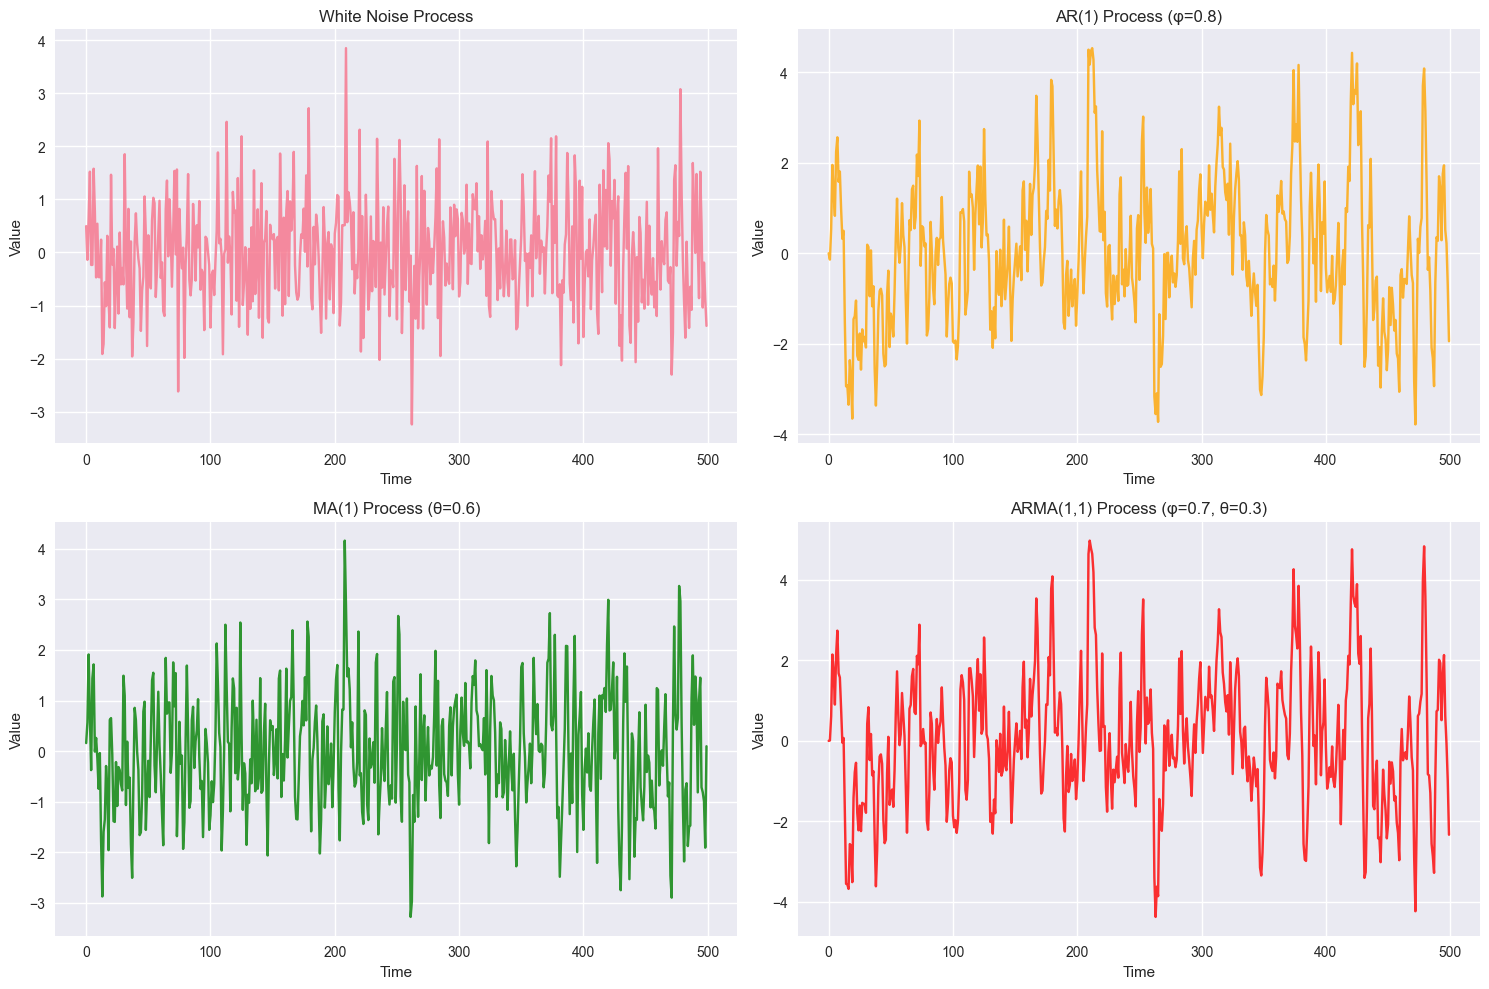

Time Series Simulation Complete!
White Noise - Mean: 0.007, Var: 0.961
AR(1) - Mean: 0.045, Var: 2.484
MA(1) - Mean: 0.012, Var: 1.300
ARMA(1,1) - Mean: 0.040, Var: 2.708


In [ ]:
# 7.1 Time Series Simulation and Basic Properties

def simulate_white_noise(n=1000, sigma=1, seed=42):
    """Simulate white noise process"""
    np.random.seed(seed)
    return np.random.normal(0, sigma, n)

def simulate_ar1(n=1000, phi=0.7, sigma=1, seed=42):
    """Simulate AR(1) process: x_t = phi * x_{t-1} + epsilon_t"""
    np.random.seed(seed)
    x = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n)

    for t in range(1, n):
        x[t] = phi * x[t-1] + epsilon[t]

    return x

def simulate_ma1(n=1000, theta=0.5, sigma=1, seed=42):
    """Simulate MA(1) process: x_t = epsilon_t + theta * epsilon_{t-1}"""
    np.random.seed(seed)
    epsilon = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)

    for t in range(n):
        x[t] = epsilon[t+1] + theta * epsilon[t]

    return x

def simulate_arma11(n=1000, phi=0.7, theta=0.3, sigma=1, seed=42):
    """Simulate ARMA(1,1) process"""
    np.random.seed(seed)
    x = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n+1)

    for t in range(1, n):
        x[t] = phi * x[t-1] + epsilon[t] + theta * epsilon[t-1]

    return x

# Generate example time series
n = 500
wn = simulate_white_noise(n)
ar1 = simulate_ar1(n, phi=0.8)
ma1 = simulate_ma1(n, theta=0.6)
arma11 = simulate_arma11(n, phi=0.7, theta=0.3)

# Plot time series
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
time = np.arange(n)

axes[0,0].plot(time, wn, alpha=0.8)
axes[0,0].set_title('White Noise Process')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Value')

axes[0,1].plot(time, ar1, alpha=0.8, color='orange')
axes[0,1].set_title('AR(1) Process (φ=0.8)')
axes[0,1].set_xlabel('Time')
axes[0,1].set_ylabel('Value')

axes[1,0].plot(time, ma1, alpha=0.8, color='green')
axes[1,0].set_title('MA(1) Process (θ=0.6)')
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('Value')

axes[1,1].plot(time, arma11, alpha=0.8, color='red')
axes[1,1].set_title('ARMA(1,1) Process (φ=0.7, θ=0.3)')
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('Value')

plt.tight_layout()
plt.show()

print("Time Series Simulation Complete!")
print(f"White Noise - Mean: {np.mean(wn):.3f}, Var: {np.var(wn):.3f}")
print(f"AR(1) - Mean: {np.mean(ar1):.3f}, Var: {np.var(ar1):.3f}")
print(f"MA(1) - Mean: {np.mean(ma1):.3f}, Var: {np.var(ma1):.3f}")
print(f"ARMA(1,1) - Mean: {np.mean(arma11):.3f}, Var: {np.var(arma11):.3f}")

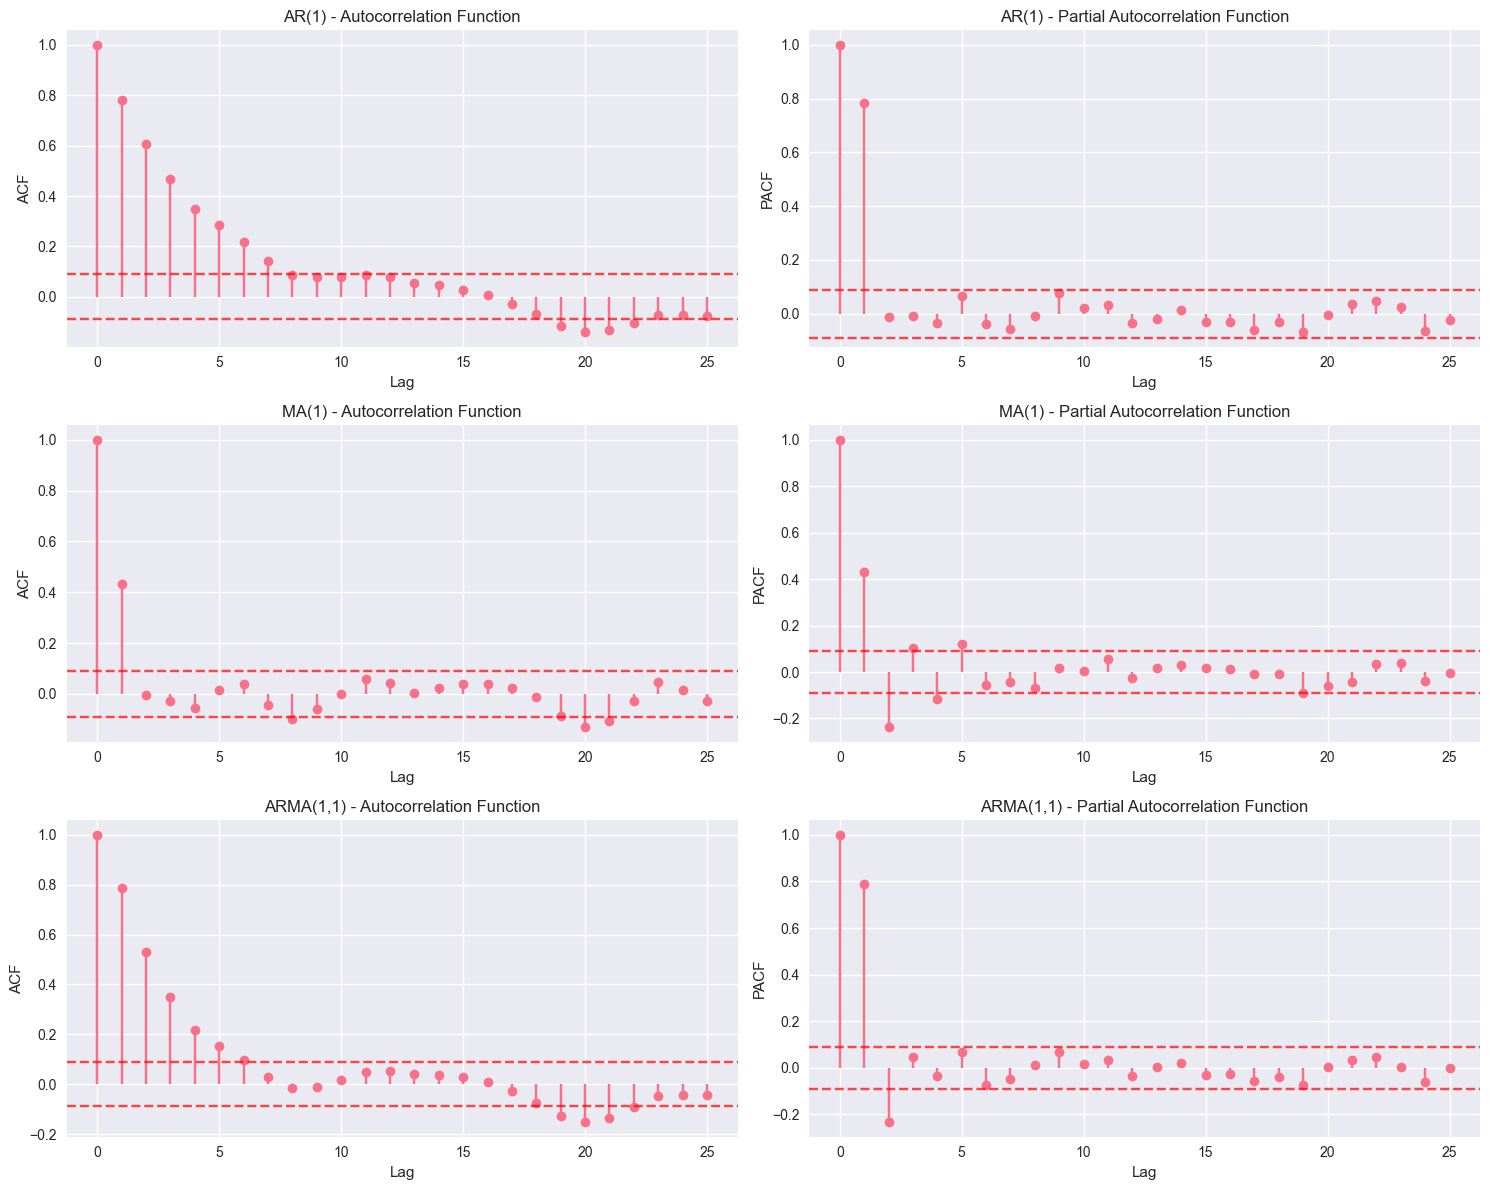

ACF and PACF Analysis Complete!
AR(1) - ACF[1]: 0.782, PACF[1]: 0.782
MA(1) - ACF[1]: 0.433, PACF[1]: 0.433
ARMA(1,1) - ACF[1]: 0.787, PACF[1]: 0.787


In [ ]:
# 7.2 Autocorrelation and Partial Autocorrelation Functions

def autocorrelation_function(x, max_lag=20):
    """Compute sample autocorrelation function"""
    n = len(x)
    x_centered = x - np.mean(x)

    acf = np.zeros(max_lag + 1)
    c0 = np.sum(x_centered**2) / n  # Variance

    for h in range(max_lag + 1):
        if h == 0:
            acf[h] = 1.0
        else:
            ch = np.sum(x_centered[:-h] * x_centered[h:]) / n
            acf[h] = ch / c0

    return acf

def partial_autocorrelation_function(x, max_lag=20):
    """Compute sample partial autocorrelation function using Yule-Walker equations"""
    acf = autocorrelation_function(x, max_lag)
    pacf = np.zeros(max_lag + 1)
    pacf[0] = 1.0

    if max_lag > 0:
        pacf[1] = acf[1]

    for k in range(2, max_lag + 1):
        # Set up Yule-Walker equations
        R = np.array([[acf[abs(i-j)] for j in range(k)] for i in range(k)])
        r = np.array([acf[i] for i in range(1, k+1)])

        try:
            phi = np.linalg.solve(R, r)
            pacf[k] = phi[-1]
        except np.linalg.LinAlgError:
            pacf[k] = 0.0

    return pacf

# Compute ACF and PACF for our simulated series
max_lag = 25

# ACF and PACF for AR(1)
acf_ar1 = autocorrelation_function(ar1, max_lag)
pacf_ar1 = partial_autocorrelation_function(ar1, max_lag)

# ACF and PACF for MA(1)
acf_ma1 = autocorrelation_function(ma1, max_lag)
pacf_ma1 = partial_autocorrelation_function(ma1, max_lag)

# ACF and PACF for ARMA(1,1)
acf_arma11 = autocorrelation_function(arma11, max_lag)
pacf_arma11 = partial_autocorrelation_function(arma11, max_lag)

# Plot ACF and PACF
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
lags = np.arange(max_lag + 1)

# Confidence bounds (approximately 2/sqrt(n))
conf_bound = 2 / np.sqrt(len(ar1))

# AR(1) plots
axes[0,0].stem(lags, acf_ar1, basefmt=' ')
axes[0,0].axhline(y=conf_bound, color='r', linestyle='--', alpha=0.7)
axes[0,0].axhline(y=-conf_bound, color='r', linestyle='--', alpha=0.7)
axes[0,0].set_title('AR(1) - Autocorrelation Function')
axes[0,0].set_xlabel('Lag')
axes[0,0].set_ylabel('ACF')

axes[0,1].stem(lags, pacf_ar1, basefmt=' ')
axes[0,1].axhline(y=conf_bound, color='r', linestyle='--', alpha=0.7)
axes[0,1].axhline(y=-conf_bound, color='r', linestyle='--', alpha=0.7)
axes[0,1].set_title('AR(1) - Partial Autocorrelation Function')
axes[0,1].set_xlabel('Lag')
axes[0,1].set_ylabel('PACF')

# MA(1) plots
axes[1,0].stem(lags, acf_ma1, basefmt=' ')
axes[1,0].axhline(y=conf_bound, color='r', linestyle='--', alpha=0.7)
axes[1,0].axhline(y=-conf_bound, color='r', linestyle='--', alpha=0.7)
axes[1,0].set_title('MA(1) - Autocorrelation Function')
axes[1,0].set_xlabel('Lag')
axes[1,0].set_ylabel('ACF')

axes[1,1].stem(lags, pacf_ma1, basefmt=' ')
axes[1,1].axhline(y=conf_bound, color='r', linestyle='--', alpha=0.7)
axes[1,1].axhline(y=-conf_bound, color='r', linestyle='--', alpha=0.7)
axes[1,1].set_title('MA(1) - Partial Autocorrelation Function')
axes[1,1].set_xlabel('Lag')
axes[1,1].set_ylabel('PACF')

# ARMA(1,1) plots
axes[2,0].stem(lags, acf_arma11, basefmt=' ')
axes[2,0].axhline(y=conf_bound, color='r', linestyle='--', alpha=0.7)
axes[2,0].axhline(y=-conf_bound, color='r', linestyle='--', alpha=0.7)
axes[2,0].set_title('ARMA(1,1) - Autocorrelation Function')
axes[2,0].set_xlabel('Lag')
axes[2,0].set_ylabel('ACF')

axes[2,1].stem(lags, pacf_arma11, basefmt=' ')
axes[2,1].axhline(y=conf_bound, color='r', linestyle='--', alpha=0.7)
axes[2,1].axhline(y=-conf_bound, color='r', linestyle='--', alpha=0.7)
axes[2,1].set_title('ARMA(1,1) - Partial Autocorrelation Function')
axes[2,1].set_xlabel('Lag')
axes[2,1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

print("ACF and PACF Analysis Complete!")
print(f"AR(1) - ACF[1]: {acf_ar1[1]:.3f}, PACF[1]: {pacf_ar1[1]:.3f}")
print(f"MA(1) - ACF[1]: {acf_ma1[1]:.3f}, PACF[1]: {pacf_ma1[1]:.3f}")
print(f"ARMA(1,1) - ACF[1]: {acf_arma11[1]:.3f}, PACF[1]: {pacf_arma11[1]:.3f}")

In [ ]:
# 7.3 ARIMA Model Estimation and Diagnostics

class ARIMAModel:
    """Simple ARIMA model implementation"""

    def __init__(self, p=1, d=0, q=0):
        self.p = p  # AR order
        self.d = d  # Differencing order
        self.q = q  # MA order
        self.params = None
        self.sigma2 = None
        self.fitted_values = None
        self.residuals = None

    def difference(self, x, d):
        """Apply differencing d times"""
        if d == 0:
            return x
        diff_x = x.copy()
        for _ in range(d):
            diff_x = np.diff(diff_x)
        return diff_x

    def log_likelihood(self, params, x):
        """Compute log-likelihood for ARMA model"""
        n = len(x)

        if self.p > 0 and self.q > 0:
            # ARMA(p,q)
            phi = params[:self.p]
            theta = params[self.p:self.p+self.q]
            sigma2 = params[-1]
        elif self.p > 0:
            # AR(p)
            phi = params[:self.p]
            theta = np.array([])
            sigma2 = params[-1]
        else:
            # MA(q)
            phi = np.array([])
            theta = params[:self.q]
            sigma2 = params[-1]

        if sigma2 <= 0:
            return -np.inf

        # Initialize
        errors = np.zeros(n + max(self.p, self.q))
        x_extended = np.concatenate([np.zeros(max(self.p, self.q)), x])

        # Compute errors recursively
        for t in range(max(self.p, self.q), n + max(self.p, self.q)):
            ar_term = 0
            if self.p > 0:
                ar_term = np.sum(phi * x_extended[t-self.p:t][::-1])

            ma_term = 0
            if self.q > 0:
                ma_term = np.sum(theta * errors[t-self.q:t][::-1])

            errors[t] = x_extended[t] - ar_term - ma_term

        # Extract relevant errors
        e = errors[max(self.p, self.q):]

        # Log-likelihood (excluding constant)
        ll = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(sigma2) - 0.5 * np.sum(e**2) / sigma2

        return ll

    def fit(self, x):
        """Fit ARIMA model using maximum likelihood"""
        # Apply differencing
        if self.d > 0:
            x_diff = self.difference(x, self.d)
        else:
            x_diff = x.copy()

        # Initial parameter guess
        n_params = self.p + self.q + 1  # +1 for sigma2
        init_params = np.concatenate([
            np.random.normal(0, 0.1, self.p + self.q),  # AR and MA coefficients
            [np.var(x_diff)]  # Initial sigma2 estimate
        ])

        # Objective function (negative log-likelihood)
        def objective(params):
            return -self.log_likelihood(params, x_diff)

        # Optimize
        result = minimize(objective, init_params, method='L-BFGS-B',
                         bounds=[(None, None)]*(self.p + self.q) + [(1e-6, None)])

        if result.success:
            self.params = result.x
            self.sigma2 = result.x[-1]

            # Compute fitted values and residuals
            self._compute_fitted_values(x_diff)

        return result.success

    def _compute_fitted_values(self, x):
        """Compute fitted values and residuals"""
        n = len(x)

        if self.params is None:
            return

        if self.p > 0 and self.q > 0:
            phi = self.params[:self.p]
            theta = self.params[self.p:self.p+self.q]
        elif self.p > 0:
            phi = self.params[:self.p]
            theta = np.array([])
        else:
            phi = np.array([])
            theta = self.params[:self.q]

        fitted = np.zeros(n)
        errors = np.zeros(n + max(self.p, self.q))

        for t in range(max(self.p, self.q), n):
            ar_term = 0
            if self.p > 0 and t >= self.p:
                ar_term = np.sum(phi * x[t-self.p:t][::-1])

            ma_term = 0
            if self.q > 0:
                ma_term = np.sum(theta * errors[t-self.q:t][::-1])

            fitted[t] = ar_term + ma_term
            errors[t] = x[t] - fitted[t]

        self.fitted_values = fitted
        self.residuals = x - fitted

# Example: Fit AR(1) model to simulated AR(1) data
ar1_model = ARIMAModel(p=1, d=0, q=0)
success = ar1_model.fit(ar1)

if success:
    print("AR(1) Model Estimation Results:")
    print(f"True φ: 0.8")
    print(f"Estimated φ: {ar1_model.params[0]:.4f}")
    print(f"Estimated σ²: {ar1_model.sigma2:.4f}")
    print(f"True σ²: 1.0")
else:
    print("AR(1) model estimation failed")

# Example: Fit MA(1) model to simulated MA(1) data
ma1_model = ARIMAModel(p=0, d=0, q=1)
success = ma1_model.fit(ma1)

if success:
    print("\nMA(1) Model Estimation Results:")
    print(f"True θ: 0.6")
    print(f"Estimated θ: {ma1_model.params[0]:.4f}")
    print(f"Estimated σ²: {ma1_model.sigma2:.4f}")
    print(f"True σ²: 1.0")
else:
    print("MA(1) model estimation failed")

# Example: Fit ARMA(1,1) model
arma11_model = ARIMAModel(p=1, d=0, q=1)
success = arma11_model.fit(arma11)

if success:
    print("\nARMA(1,1) Model Estimation Results:")
    print(f"True φ: 0.7, θ: 0.3")
    print(f"Estimated φ: {arma11_model.params[0]:.4f}")
    print(f"Estimated θ: {arma11_model.params[1]:.4f}")
    print(f"Estimated σ²: {arma11_model.sigma2:.4f}")
    print(f"True σ²: 1.0")
else:
    print("ARMA(1,1) model estimation failed")

AR(1) Model Estimation Results:
True φ: 0.8
Estimated φ: 0.7847
Estimated σ²: 0.9599
True σ²: 1.0

MA(1) Model Estimation Results:
True θ: 0.6
Estimated θ: 0.6175
Estimated σ²: 0.9621
True σ²: 1.0

ARMA(1,1) Model Estimation Results:
True φ: 0.7, θ: 0.3
Estimated φ: 0.6778
Estimated θ: 0.3192
Estimated σ²: 0.9598
True σ²: 1.0


---

## Chapter 8: Multivariate Statistics

### 8.1 Multivariate Distributions

#### 8.1.1 Multivariate Normal Distribution

**Probability Density Function:**
$$f(\mathbf{x}) = \frac{1}{(2\pi)^{k/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)$$

Where:
- $\mathbf{x} \in \mathbb{R}^k$ is the random vector
- $\boldsymbol{\mu} \in \mathbb{R}^k$ is the mean vector
- $\boldsymbol{\Sigma}$ is the $k \times k$ positive definite covariance matrix

**Notation:** $\mathbf{X} \sim N_k(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

**Properties:**
1. **Linear Combinations:** If $\mathbf{X} \sim N_k(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ and $\mathbf{Y} = \mathbf{A}\mathbf{X} + \mathbf{b}$, then:
   $$\mathbf{Y} \sim N_m(\mathbf{A}\boldsymbol{\mu} + \mathbf{b}, \mathbf{A}\boldsymbol{\Sigma}\mathbf{A}^T)$$

2. **Marginal Distributions:** Each subset of components is also multivariate normal

3. **Conditional Distributions:** Given partition $\mathbf{X} = \begin{pmatrix} \mathbf{X}_1 \\ \mathbf{X}_2 \end{pmatrix}$:
   $$\mathbf{X}_1 | \mathbf{X}_2 = \mathbf{x}_2 \sim N(\boldsymbol{\mu}_{1|2}, \boldsymbol{\Sigma}_{1|2})$$
   
   Where:
   - $\boldsymbol{\mu}_{1|2} = \boldsymbol{\mu}_1 + \boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_{22}^{-1}(\mathbf{x}_2 - \boldsymbol{\mu}_2)$
   - $\boldsymbol{\Sigma}_{1|2} = \boldsymbol{\Sigma}_{11} - \boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_{22}^{-1}\boldsymbol{\Sigma}_{21}$

#### 8.1.2 Wishart Distribution

**Definition:**
If $\mathbf{X}_1, \ldots, \mathbf{X}_n$ are i.i.d. $N_p(\mathbf{0}, \boldsymbol{\Sigma})$, then:
$$\mathbf{W} = \sum_{i=1}^n \mathbf{X}_i \mathbf{X}_i^T \sim W_p(n, \boldsymbol{\Sigma})$$

**Probability Density Function:**
$$f(\mathbf{W}) = \frac{|\mathbf{W}|^{(n-p-1)/2} \exp(-\frac{1}{2}\text{tr}(\boldsymbol{\Sigma}^{-1}\mathbf{W}))}{2^{np/2} |\boldsymbol{\Sigma}|^{n/2} \Gamma_p(n/2)}$$

Where $\Gamma_p(n/2) = \pi^{p(p-1)/4} \prod_{j=1}^p \Gamma\left(\frac{n+1-j}{2}\right)$ is the multivariate gamma function.

**Properties:**
- $E[\mathbf{W}] = n\boldsymbol{\Sigma}$
- $\text{Var}(W_{ij}) = n(\Sigma_{ij}^2 + \Sigma_{ii}\Sigma_{jj})$

### 8.2 Principal Component Analysis (PCA)

#### 8.2.1 Mathematical Foundation

**Objective:** Find linear combinations of original variables that maximize variance.

**Population PCA:**
Given covariance matrix $\boldsymbol{\Sigma}$, find eigenvectors $\mathbf{e}_1, \ldots, \mathbf{e}_p$ and eigenvalues $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_p \geq 0$ such that:
$$\boldsymbol{\Sigma} \mathbf{e}_i = \lambda_i \mathbf{e}_i$$

**Principal Components:**
$$Y_i = \mathbf{e}_i^T \mathbf{X} = e_{i1}X_1 + e_{i2}X_2 + \cdots + e_{ip}X_p$$

**Properties:**
- $\text{Var}(Y_i) = \lambda_i$
- $\text{Cov}(Y_i, Y_j) = 0$ for $i \neq j$
- Total variance: $\sum_{i=1}^p \lambda_i = \text{tr}(\boldsymbol{\Sigma})$

#### 8.2.2 Sample PCA

**Sample Covariance Matrix:**
$$\mathbf{S} = \frac{1}{n-1} \sum_{i=1}^n (\mathbf{x}_i - \bar{\mathbf{x}})(\mathbf{x}_i - \bar{\mathbf{x}})^T$$

**Eigenvalue Decomposition:**
$$\mathbf{S} = \mathbf{E} \boldsymbol{\Lambda} \mathbf{E}^T$$

Where $\mathbf{E} = [\mathbf{e}_1 | \mathbf{e}_2 | \cdots | \mathbf{e}_p]$ and $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \ldots, \lambda_p)$.

**Principal Component Scores:**
$$\mathbf{Y} = \mathbf{E}^T (\mathbf{X} - \bar{\mathbf{X}})$$

**Proportion of Variance Explained:**
$$\text{Proportion}_i = \frac{\lambda_i}{\sum_{j=1}^p \lambda_j}$$

**Cumulative Proportion:**
$$\text{Cumulative}_k = \frac{\sum_{i=1}^k \lambda_i}{\sum_{j=1}^p \lambda_j}$$

#### 8.2.3 Dimension Reduction

**Kaiser Criterion:** Retain components with $\lambda_i > 1$ (for correlation matrix)

**Scree Plot:** Plot eigenvalues and look for "elbow"

**Cumulative Variance:** Retain components explaining desired percentage (e.g., 80%, 90%)

**Reconstruction:**
$$\hat{\mathbf{X}}_k = \bar{\mathbf{x}} + \sum_{i=1}^k y_i \mathbf{e}_i$$

**Reconstruction Error:**
$$\text{MSE} = \frac{1}{n} \sum_{j=1}^n ||\mathbf{x}_j - \hat{\mathbf{x}}_{k,j}||^2 = \sum_{i=k+1}^p \lambda_i$$

Multivariate Statistics Libraries Imported Successfully!
Multivariate Normal Distribution:
True mean: [ 2 -1]
Sample mean: [ 1.9340199  -0.98796436]
True covariance:
[[2.  0.8]
 [0.8 1. ]]
Sample covariance:
[[1.8656507  0.7132972 ]
 [0.7132972  0.96709228]]


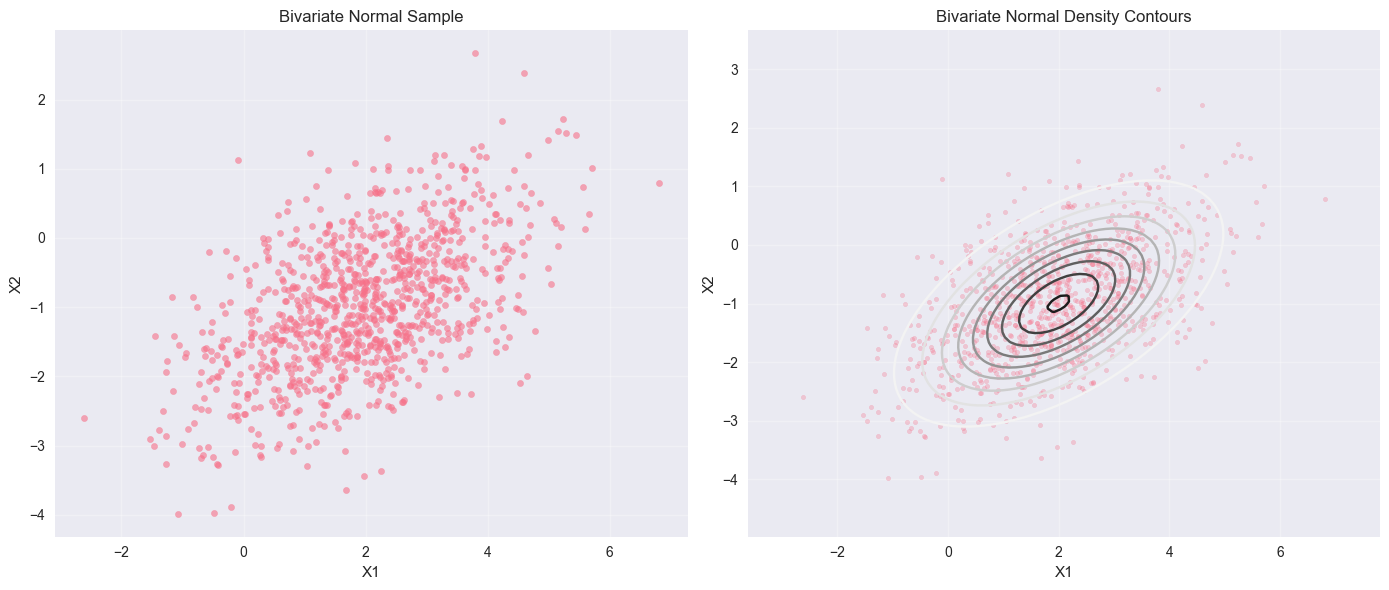

In [ ]:
# Chapter 8: Multivariate Statistics - Code Examples

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.linalg import eigh
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

print("Multivariate Statistics Libraries Imported Successfully!")

# 8.1 Multivariate Normal Distribution and Sampling

def multivariate_normal_pdf(x, mu, sigma):
    """Compute multivariate normal PDF"""
    k = len(mu)
    x = np.array(x)
    mu = np.array(mu)

    # Compute the PDF
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)

    diff = x - mu
    exponent = -0.5 * np.dot(diff.T, np.dot(sigma_inv, diff))

    pdf = (1.0 / ((2 * np.pi) ** (k/2) * np.sqrt(sigma_det))) * np.exp(exponent)

    return pdf

# Generate multivariate normal sample
np.random.seed(42)
n = 1000
mu = np.array([2, -1])
sigma = np.array([[2, 0.8], [0.8, 1]])

# Sample from multivariate normal
X = np.random.multivariate_normal(mu, sigma, n)

# Compute sample statistics
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X.T)

print("Multivariate Normal Distribution:")
print(f"True mean: {mu}")
print(f"Sample mean: {sample_mean}")
print(f"True covariance:\n{sigma}")
print(f"Sample covariance:\n{sample_cov}")

# Plot bivariate normal distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6, s=20)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Bivariate Normal Sample')
axes[0].grid(True, alpha=0.3)

# Contour plot of density
x1_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2_range = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute density for each point
Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        point = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = multivariate_normal_pdf(point, mu, sigma)

contour = axes[1].contour(X1, X2, Z, levels=10)
axes[1].scatter(X[:, 0], X[:, 1], alpha=0.3, s=10)
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].set_title('Bivariate Normal Density Contours')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PCA Analysis Results:
Original data shape: (300, 4)
Explained variance ratios (from scratch): [0.64899013 0.27022997 0.0719086  0.0088713 ]
Explained variance ratios (sklearn): [0.64899013 0.27022997 0.0719086  0.0088713 ]
Cumulative explained variance: [0.64899013 0.9192201  0.9911287  1.        ]


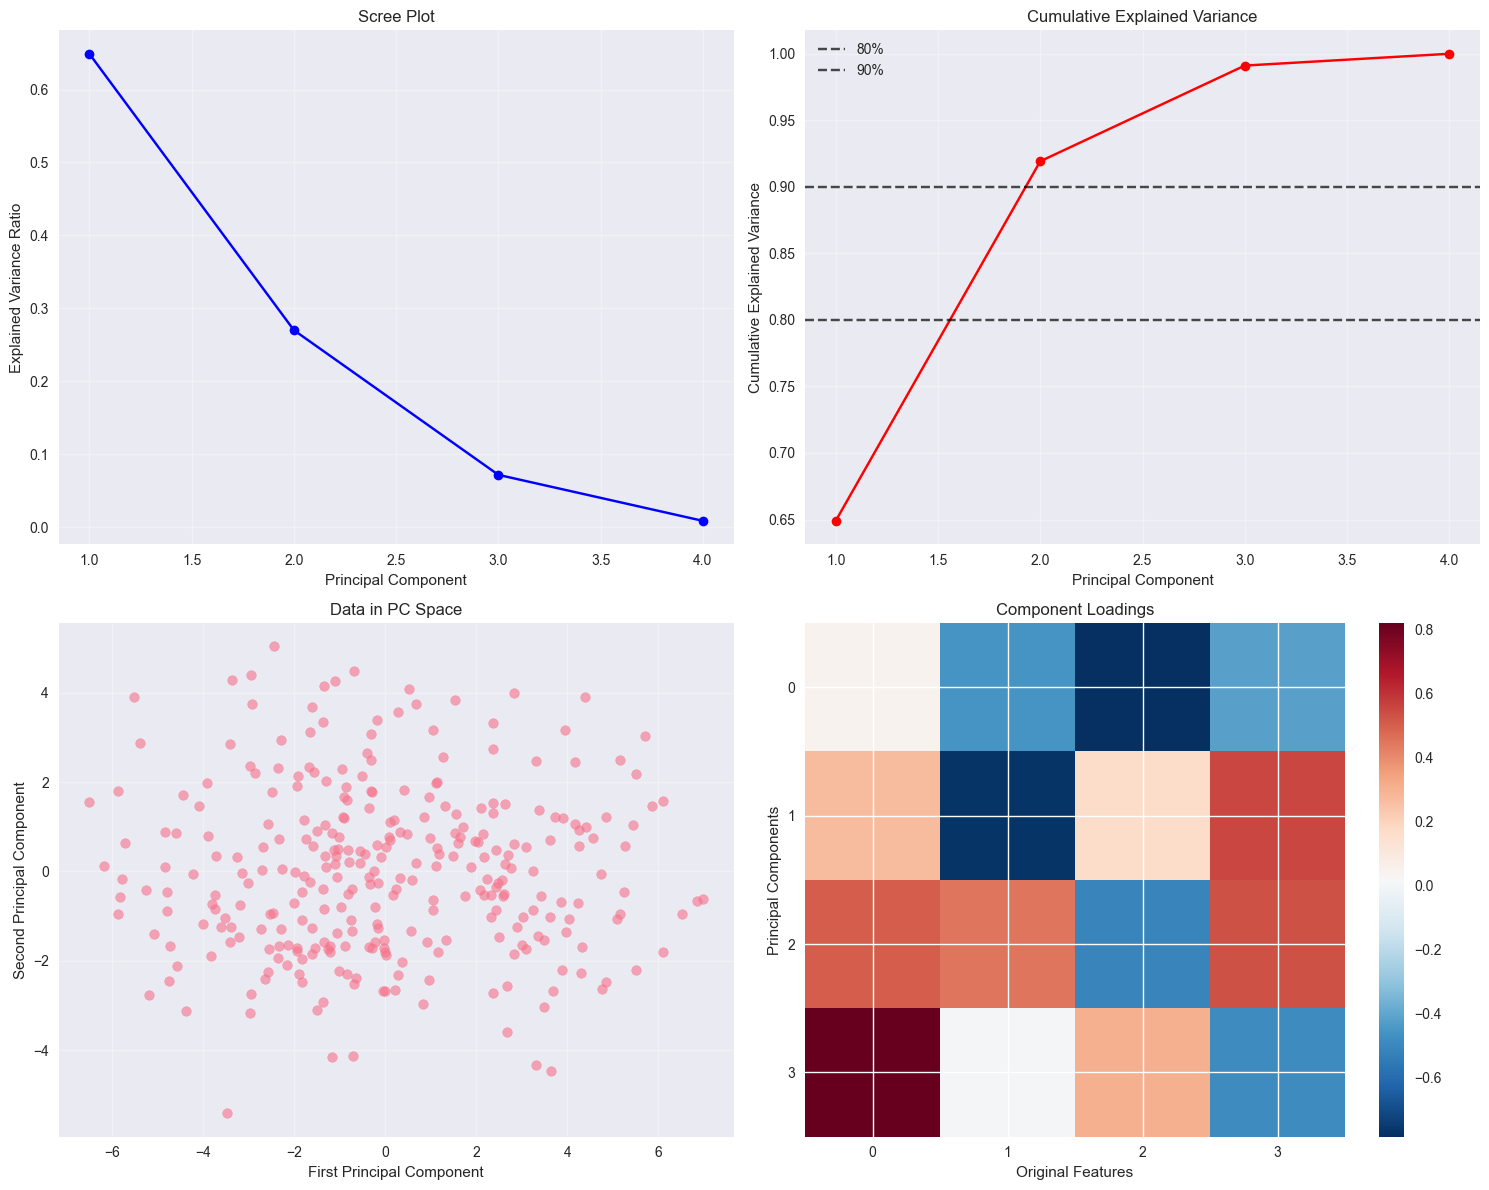

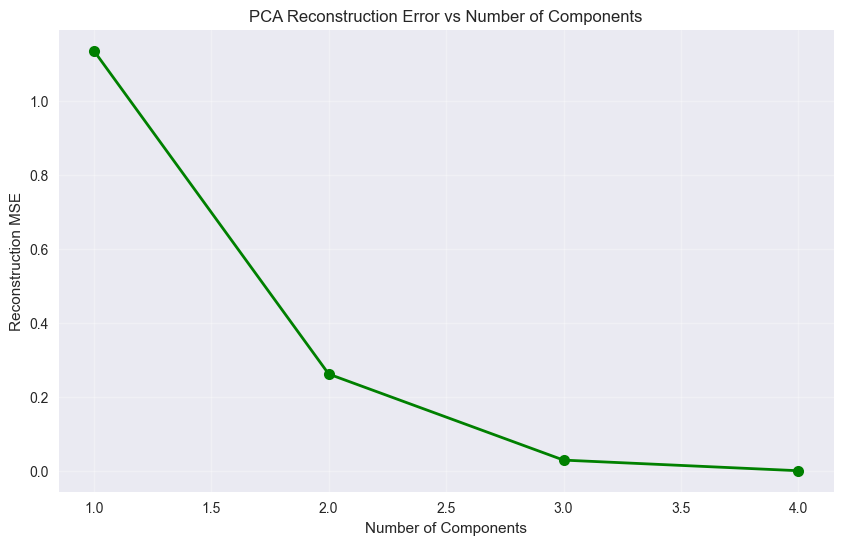

Reconstruction errors: [np.float64(1.1361479858243115), np.float64(0.261468194091408), np.float64(0.028714590891575065), np.float64(2.9583543331252268e-30)]


In [ ]:
# 8.2 Principal Component Analysis Implementation

class PCAFromScratch:
    """Principal Component Analysis from scratch"""

    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.mean_ = None

    def fit(self, X):
        """Fit PCA model"""
        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Compute covariance matrix
        cov_matrix = np.cov(X_centered.T)

        # Eigenvalue decomposition
        eigenvalues, eigenvectors = eigh(cov_matrix)

        # Sort by eigenvalues (descending)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Store results
        if self.n_components is None:
            self.n_components = len(eigenvalues)

        self.components_ = eigenvectors[:, :self.n_components].T
        self.explained_variance_ = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = self.explained_variance_ / np.sum(eigenvalues)

        return self

    def transform(self, X):
        """Transform data to principal components"""
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_.T)

    def fit_transform(self, X):
        """Fit and transform in one step"""
        return self.fit(X).transform(X)

    def inverse_transform(self, X_pca):
        """Reconstruct original data from principal components"""
        return np.dot(X_pca, self.components_) + self.mean_

# Generate sample data for PCA
np.random.seed(42)
n_samples = 300
n_features = 4

# Create correlated data
A = np.random.randn(n_features, n_features)
X_pca = np.random.randn(n_samples, n_features)
X_original = np.dot(X_pca, A) + np.random.randn(n_samples, n_features) * 0.1

# Apply PCA
pca_scratch = PCAFromScratch(n_components=4)
X_transformed = pca_scratch.fit_transform(X_original)

# Compare with sklearn PCA
pca_sklearn = PCA(n_components=4)
X_sklearn = pca_sklearn.fit_transform(X_original)

print("PCA Analysis Results:")
print(f"Original data shape: {X_original.shape}")
print(f"Explained variance ratios (from scratch): {pca_scratch.explained_variance_ratio_}")
print(f"Explained variance ratios (sklearn): {pca_sklearn.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca_scratch.explained_variance_ratio_)}")

# Plot PCA results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scree plot
axes[0, 0].plot(range(1, len(pca_scratch.explained_variance_ratio_) + 1),
                pca_scratch.explained_variance_ratio_, 'bo-')
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Explained Variance Ratio')
axes[0, 0].set_title('Scree Plot')
axes[0, 0].grid(True, alpha=0.3)

# Cumulative explained variance
axes[0, 1].plot(range(1, len(pca_scratch.explained_variance_ratio_) + 1),
                np.cumsum(pca_scratch.explained_variance_ratio_), 'ro-')
axes[0, 1].axhline(y=0.8, color='k', linestyle='--', alpha=0.7, label='80%')
axes[0, 1].axhline(y=0.9, color='k', linestyle='--', alpha=0.7, label='90%')
axes[0, 1].set_xlabel('Principal Component')
axes[0, 1].set_ylabel('Cumulative Explained Variance')
axes[0, 1].set_title('Cumulative Explained Variance')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# First two principal components
axes[1, 0].scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6)
axes[1, 0].set_xlabel('First Principal Component')
axes[1, 0].set_ylabel('Second Principal Component')
axes[1, 0].set_title('Data in PC Space')
axes[1, 0].grid(True, alpha=0.3)

# Component loadings (heatmap)
loadings = pca_scratch.components_
im = axes[1, 1].imshow(loadings, cmap='RdBu_r', aspect='auto')
axes[1, 1].set_xlabel('Original Features')
axes[1, 1].set_ylabel('Principal Components')
axes[1, 1].set_title('Component Loadings')
axes[1, 1].set_xticks(range(n_features))
axes[1, 1].set_yticks(range(pca_scratch.n_components))
plt.colorbar(im, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Reconstruction error analysis
n_components_range = range(1, n_features + 1)
reconstruction_errors = []

for n_comp in n_components_range:
    pca_temp = PCAFromScratch(n_components=n_comp)
    X_temp = pca_temp.fit_transform(X_original)
    X_reconstructed = pca_temp.inverse_transform(X_temp)

    mse = np.mean((X_original - X_reconstructed) ** 2)
    reconstruction_errors.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, reconstruction_errors, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction MSE')
plt.title('PCA Reconstruction Error vs Number of Components')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Reconstruction errors: {reconstruction_errors}")

Factor Analysis Results:
Data shape: (500, 6)
Number of factors: 2

True vs Estimated Loadings:
True loadings:
[[0.38374129 0.1       ]
 [0.61821512 0.1       ]
 [0.1        0.76810612]
 [0.1        0.57064817]
 [0.65453026 0.73548456]
 [0.65704347 0.70086404]]

Estimated loadings (from scratch):
[[-0.26096589  0.27412791]
 [-0.40135023  0.43001747]
 [-0.66490482 -0.37049793]
 [-0.53061345 -0.35743276]
 [-0.95355935  0.09274446]
 [-0.90621344  0.09768835]]

Estimated loadings (sklearn):
[[ 0.24601105 -0.28757928]
 [ 0.37794728 -0.45137489]
 [ 0.68341816  0.33492928]
 [ 0.54908392  0.33017867]
 [ 0.94886757 -0.14406132]
 [ 0.90001295 -0.14562221]]

Communalities (h²): [0.14324931 0.34599703 0.57936713 0.40930881 0.91787696 0.83076582]
Uniquenesses (u²): [0.29243028 0.41646542 0.24439286 0.45588252 0.34025722 0.47826032]
Sum (should ≈ variable variances): [0.43567959 0.76246245 0.82375999 0.86519133 1.25813418 1.30902614]
Actual variable variances: [0.43480832 0.76093775 0.82211685 0.863

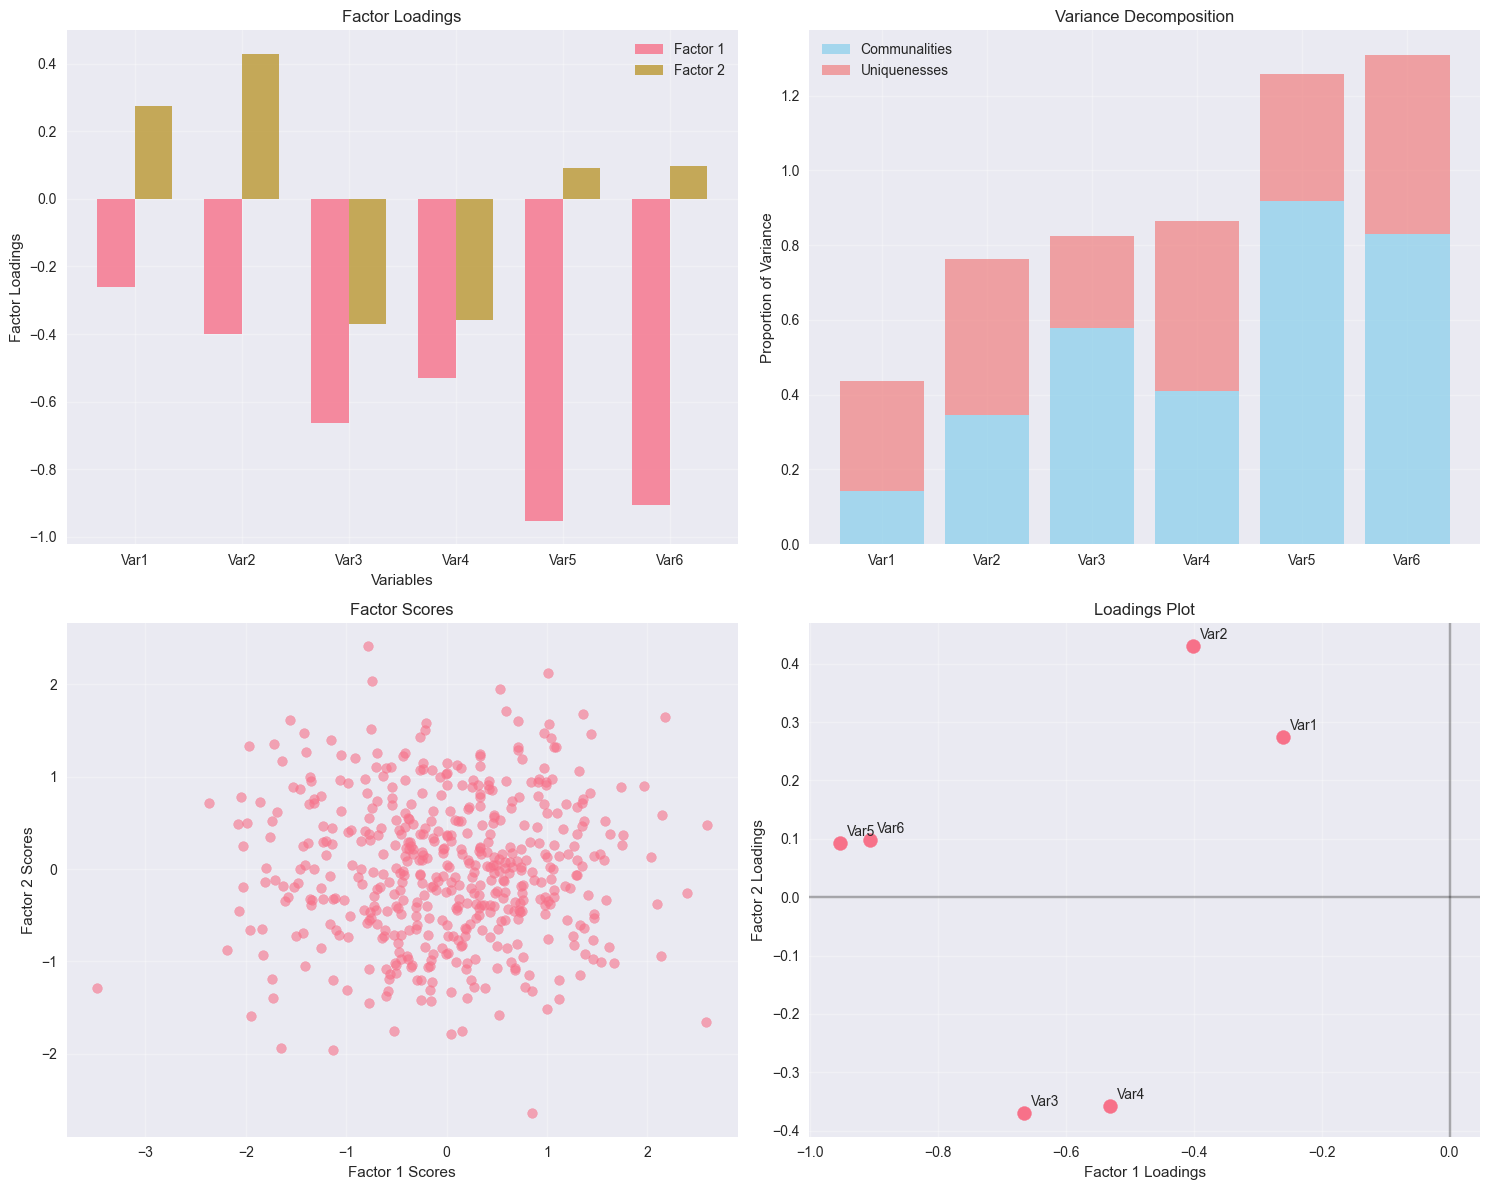

In [ ]:
# 8.3 Factor Analysis Implementation

class FactorAnalysisFromScratch:
    """Factor Analysis implementation from scratch"""

    def __init__(self, n_factors=2, max_iter=100, tol=1e-6):
        self.n_factors = n_factors
        self.max_iter = max_iter
        self.tol = tol
        self.loadings_ = None
        self.uniquenesses_ = None
        self.mean_ = None

    def fit(self, X):
        """Fit factor analysis model using EM algorithm"""
        n_samples, n_features = X.shape

        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Initialize parameters
        S = np.cov(X_centered.T)  # Sample covariance matrix

        # Initialize loadings using principal components
        eigenvals, eigenvecs = eigh(S)
        idx = np.argsort(eigenvals)[::-1]

        # Initial loadings
        L = eigenvecs[:, idx[:self.n_factors]] * np.sqrt(eigenvals[idx[:self.n_factors]])

        # Initial uniquenesses (diagonal of covariance matrix)
        psi = np.diag(S) - np.sum(L**2, axis=1)
        psi = np.maximum(psi, 0.01)  # Ensure positive

        # EM algorithm
        for iteration in range(self.max_iter):
            L_old = L.copy()

            # E-step: Compute expectations
            Psi_inv = np.diag(1.0 / psi)
            M = np.linalg.inv(np.eye(self.n_factors) + L.T @ Psi_inv @ L)

            # Sufficient statistics
            sum_EZ = np.zeros(self.n_factors)
            sum_EZZ = np.zeros((self.n_factors, self.n_factors))
            sum_XZ = np.zeros((n_features, self.n_factors))

            for i in range(n_samples):
                x = X_centered[i]
                Ez = M @ L.T @ Psi_inv @ x
                Ezz = M + np.outer(Ez, Ez)

                sum_EZ += Ez
                sum_EZZ += Ezz
                sum_XZ += np.outer(x, Ez)

            # M-step: Update parameters
            L = sum_XZ @ np.linalg.inv(sum_EZZ)

            # Update uniquenesses
            for j in range(n_features):
                psi[j] = S[j, j] - L[j] @ sum_EZZ @ L[j] / n_samples
                psi[j] = max(psi[j], 0.01)  # Ensure positive

            # Check convergence
            if np.allclose(L, L_old, atol=self.tol):
                break

        self.loadings_ = L
        self.uniquenesses_ = psi

        return self

    def transform(self, X):
        """Transform data to factor space"""
        X_centered = X - self.mean_
        Psi_inv = np.diag(1.0 / self.uniquenesses_)
        M = np.linalg.inv(np.eye(self.n_factors) + self.loadings_.T @ Psi_inv @ self.loadings_)

        factors = []
        for i in range(X.shape[0]):
            factor = M @ self.loadings_.T @ Psi_inv @ X_centered[i]
            factors.append(factor)

        return np.array(factors)

    def get_communalities(self):
        """Compute communalities (h²)"""
        return np.sum(self.loadings_**2, axis=1)

    def get_specific_variances(self):
        """Get specific variances (uniquenesses)"""
        return self.uniquenesses_

# Generate sample data for factor analysis
np.random.seed(42)
n_samples = 500
n_factors = 2
n_variables = 6

# Generate true factors
true_factors = np.random.randn(n_samples, n_factors)

# Generate loadings matrix
true_loadings = np.random.uniform(0.3, 0.8, (n_variables, n_factors))
true_loadings[0:2, 1] = 0.1  # First two variables load mainly on factor 1
true_loadings[2:4, 0] = 0.1  # Next two variables load mainly on factor 2
# Last two variables load on both factors

# Generate specific factors (uniquenesses)
true_uniquenesses = np.random.uniform(0.2, 0.5, n_variables)
specific_factors = np.random.randn(n_samples, n_variables) * np.sqrt(true_uniquenesses)

# Generate observed variables
X_factor = true_factors @ true_loadings.T + specific_factors

# Fit factor analysis
fa_scratch = FactorAnalysisFromScratch(n_factors=2)
fa_scratch.fit(X_factor)

# Compare with sklearn
fa_sklearn = FactorAnalysis(n_components=2, random_state=42)
fa_sklearn.fit(X_factor)

print("Factor Analysis Results:")
print(f"Data shape: {X_factor.shape}")
print(f"Number of factors: {n_factors}")
print("\nTrue vs Estimated Loadings:")
print("True loadings:")
print(true_loadings)
print("\nEstimated loadings (from scratch):")
print(fa_scratch.loadings_)
print("\nEstimated loadings (sklearn):")
print(fa_sklearn.components_.T)

# Compute communalities and uniquenesses
communalities = fa_scratch.get_communalities()
uniquenesses = fa_scratch.get_specific_variances()

print(f"\nCommunalities (h²): {communalities}")
print(f"Uniquenesses (u²): {uniquenesses}")
print(f"Sum (should ≈ variable variances): {communalities + uniquenesses}")
print(f"Actual variable variances: {np.var(X_factor, axis=0)}")

# Plot factor analysis results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Loadings plot
variables = [f'Var{i+1}' for i in range(n_variables)]
factor_names = ['Factor 1', 'Factor 2']

# Bar plot of loadings
x_pos = np.arange(n_variables)
width = 0.35

axes[0, 0].bar(x_pos - width/2, fa_scratch.loadings_[:, 0], width,
               label='Factor 1', alpha=0.8)
axes[0, 0].bar(x_pos + width/2, fa_scratch.loadings_[:, 1], width,
               label='Factor 2', alpha=0.8)
axes[0, 0].set_xlabel('Variables')
axes[0, 0].set_ylabel('Factor Loadings')
axes[0, 0].set_title('Factor Loadings')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(variables)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Communalities vs Uniquenesses
axes[0, 1].bar(variables, communalities, alpha=0.7, label='Communalities', color='skyblue')
axes[0, 1].bar(variables, uniquenesses, bottom=communalities, alpha=0.7,
               label='Uniquenesses', color='lightcoral')
axes[0, 1].set_ylabel('Proportion of Variance')
axes[0, 1].set_title('Variance Decomposition')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Factor scores scatter plot
factors_estimated = fa_scratch.transform(X_factor)
axes[1, 0].scatter(factors_estimated[:, 0], factors_estimated[:, 1], alpha=0.6)
axes[1, 0].set_xlabel('Factor 1 Scores')
axes[1, 0].set_ylabel('Factor 2 Scores')
axes[1, 0].set_title('Factor Scores')
axes[1, 0].grid(True, alpha=0.3)

# Loadings in factor space
axes[1, 1].scatter(fa_scratch.loadings_[:, 0], fa_scratch.loadings_[:, 1], s=100)
for i, var in enumerate(variables):
    axes[1, 1].annotate(var, (fa_scratch.loadings_[i, 0], fa_scratch.loadings_[i, 1]),
                       xytext=(5, 5), textcoords='offset points')
axes[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1, 1].set_xlabel('Factor 1 Loadings')
axes[1, 1].set_ylabel('Factor 2 Loadings')
axes[1, 1].set_title('Loadings Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 8.3 Factor Analysis

#### 8.3.1 Factor Model

**Orthogonal Factor Model:**
$$\mathbf{X} = \boldsymbol{\mu} + \boldsymbol{\Lambda} \mathbf{F} + \boldsymbol{\epsilon}$$

Where:
- $\mathbf{X}$ is $p \times 1$ vector of observed variables
- $\mathbf{F}$ is $m \times 1$ vector of common factors (m < p)
- $\boldsymbol{\Lambda}$ is $p \times m$ matrix of factor loadings
- $\boldsymbol{\epsilon}$ is $p \times 1$ vector of specific factors (errors)

**Assumptions:**
1. $E[\mathbf{F}] = \mathbf{0}$, $\text{Cov}(\mathbf{F}) = \mathbf{I}_m$
2. $E[\boldsymbol{\epsilon}] = \mathbf{0}$, $\text{Cov}(\boldsymbol{\epsilon}) = \boldsymbol{\Psi}$ (diagonal)
3. $\text{Cov}(\mathbf{F}, \boldsymbol{\epsilon}) = \mathbf{0}$

#### 8.3.2 Covariance Structure

**Model-Implied Covariance:**
$$\boldsymbol{\Sigma} = \boldsymbol{\Lambda} \boldsymbol{\Lambda}^T + \boldsymbol{\Psi}$$

**Communalities:**
$$h_i^2 = \sum_{j=1}^m \lambda_{ij}^2$$

**Uniquenesses:**
$$u_i^2 = \psi_{ii}$$

**Fundamental Equation:**
$$\sigma_{ii} = h_i^2 + u_i^2$$

#### 8.3.3 Estimation Methods

**Principal Factor Method:**
1. Estimate communalities: $\hat{h}_i^2 = 1 - \frac{1}{R_{ii}}$ (multiple correlation)
2. Form reduced correlation matrix: $\mathbf{R}^* = \mathbf{R} - \boldsymbol{\Psi}$
3. Extract first m eigenvalues and eigenvectors of $\mathbf{R}^*$
4. $\hat{\boldsymbol{\Lambda}} = [\sqrt{\lambda_1}\mathbf{e}_1 | \cdots | \sqrt{\lambda_m}\mathbf{e}_m]$

**Maximum Likelihood Method:**
Maximize likelihood function:
$$L(\boldsymbol{\Lambda}, \boldsymbol{\Psi}) = -\frac{n}{2} \left[ \log|\boldsymbol{\Sigma}| + \text{tr}(\mathbf{S}\boldsymbol{\Sigma}^{-1}) \right]$$

Subject to: $\boldsymbol{\Sigma} = \boldsymbol{\Lambda} \boldsymbol{\Lambda}^T + \boldsymbol{\Psi}$

**Iterative Algorithm:**
1. Initialize $\boldsymbol{\Psi}^{(0)}$
2. Update: $\boldsymbol{\Lambda}^{(k+1)} = (\mathbf{S} - \boldsymbol{\Psi}^{(k)}) \mathbf{V}_m \boldsymbol{\Delta}_m^{1/2}$
3. Update: $\boldsymbol{\Psi}^{(k+1)} = \text{diag}(\mathbf{S} - \boldsymbol{\Lambda}^{(k+1)} (\boldsymbol{\Lambda}^{(k+1)})^T)$

#### 8.3.4 Factor Rotation

**Orthogonal Rotation (Varimax):**
Maximize:
$$V = \sum_{j=1}^m \left[ \sum_{i=1}^p \lambda_{ij}^4 - \frac{1}{p} \left(\sum_{i=1}^p \lambda_{ij}^2\right)^2 \right]$$

**Oblique Rotation (Oblimin):**
Minimize:
$$Q = \sum_{j=1}^m \sum_{k \neq j} \sum_{i=1}^p \lambda_{ij}^2 \lambda_{ik}^2$$

### 8.4 Canonical Correlation Analysis

#### 8.4.1 Problem Setup

Given two sets of variables:
- $\mathbf{X}^{(1)} = (X_1, \ldots, X_p)^T$
- $\mathbf{X}^{(2)} = (X_{p+1}, \ldots, X_{p+q})^T$

Find linear combinations:
- $U = \mathbf{a}^T \mathbf{X}^{(1)}$
- $V = \mathbf{b}^T \mathbf{X}^{(2)}$

That maximize correlation $\rho(U,V)$.

#### 8.4.2 Mathematical Solution

**Covariance Structure:**
$$\boldsymbol{\Sigma} = \begin{pmatrix} \boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12} \\ \boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22} \end{pmatrix}$$

**Canonical Correlation Problem:**
$$\max_{\mathbf{a}, \mathbf{b}} \frac{\mathbf{a}^T \boldsymbol{\Sigma}_{12} \mathbf{b}}{\sqrt{\mathbf{a}^T \boldsymbol{\Sigma}_{11} \mathbf{a}} \sqrt{\mathbf{b}^T \boldsymbol{\Sigma}_{22} \mathbf{b}}}$$

**Eigenvalue Formulation:**
Solve:
$$\boldsymbol{\Sigma}_{11}^{-1} \boldsymbol{\Sigma}_{12} \boldsymbol{\Sigma}_{22}^{-1} \boldsymbol{\Sigma}_{21} \mathbf{a} = \rho^2 \mathbf{a}$$
$$\boldsymbol{\Sigma}_{22}^{-1} \boldsymbol{\Sigma}_{21} \boldsymbol{\Sigma}_{11}^{-1} \boldsymbol{\Sigma}_{12} \mathbf{b} = \rho^2 \mathbf{b}$$

**Canonical Correlations:**
$$\rho_1 \geq \rho_2 \geq \cdots \geq \rho_s \geq 0$$

Where $s = \min(p,q)$.

#### 8.4.3 Sample Canonical Correlation

**Sample Version:**
Replace population covariances with sample covariances:
$$\mathbf{S} = \begin{pmatrix} \mathbf{S}_{11} & \mathbf{S}_{12} \\ \mathbf{S}_{21} & \mathbf{S}_{22} \end{pmatrix}$$

**Eigenvalue Problem:**
$$\mathbf{S}_{11}^{-1} \mathbf{S}_{12} \mathbf{S}_{22}^{-1} \mathbf{S}_{21} \mathbf{a} = r^2 \mathbf{a}$$

**Test of Independence:**
Test $H_0: \boldsymbol{\Sigma}_{12} = \mathbf{0}$ using:
$$\Lambda^* = \prod_{i=1}^s (1-r_i^2)$$

Under $H_0$:
$$-[n-1-\frac{1}{2}(p+q+1)] \log(\Lambda^*) \sim \chi^2_{pq}$$

### 8.5 Cluster Analysis

#### 8.5.1 Distance Measures

**Euclidean Distance:**
$$d_{ij} = \sqrt{\sum_{k=1}^p (x_{ik} - x_{jk})^2}$$

**Mahalanobis Distance:**
$$d_{ij} = \sqrt{(\mathbf{x}_i - \mathbf{x}_j)^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}_i - \mathbf{x}_j)}$$

**Manhattan Distance:**
$$d_{ij} = \sum_{k=1}^p |x_{ik} - x_{jk}|$$

**Cosine Distance:**
$$d_{ij} = 1 - \frac{\mathbf{x}_i^T \mathbf{x}_j}{||\mathbf{x}_i|| \cdot ||\mathbf{x}_j||}$$

#### 8.5.2 Hierarchical Clustering

**Linkage Methods:**

**Single Linkage (Minimum):**
$$d(C_i, C_j) = \min_{\mathbf{x} \in C_i, \mathbf{y} \in C_j} d(\mathbf{x}, \mathbf{y})$$

**Complete Linkage (Maximum):**
$$d(C_i, C_j) = \max_{\mathbf{x} \in C_i, \mathbf{y} \in C_j} d(\mathbf{x}, \mathbf{y})$$

**Average Linkage:**
$$d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{\mathbf{x} \in C_i} \sum_{\mathbf{y} \in C_j} d(\mathbf{x}, \mathbf{y})$$

**Ward's Method:**
$$d(C_i, C_j) = \frac{|C_i| \cdot |C_j|}{|C_i| + |C_j|} ||\boldsymbol{\mu}_i - \boldsymbol{\mu}_j||^2$$

#### 8.5.3 K-Means Clustering

**Objective Function:**
$$J = \sum_{i=1}^k \sum_{\mathbf{x} \in C_i} ||\mathbf{x} - \boldsymbol{\mu}_i||^2$$

**Algorithm:**
1. Initialize k cluster centers $\boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_k$
2. **Assignment Step:** Assign each point to nearest center
   $$C_i = \{\mathbf{x}_j : ||\mathbf{x}_j - \boldsymbol{\mu}_i|| \leq ||\mathbf{x}_j - \boldsymbol{\mu}_l|| \text{ for all } l\}$$
3. **Update Step:** Update centers
   $$\boldsymbol{\mu}_i = \frac{1}{|C_i|} \sum_{\mathbf{x} \in C_i} \mathbf{x}$$
4. Repeat until convergence

**Within-Cluster Sum of Squares:**
$$\text{WCSS}_k = \sum_{i=1}^k \sum_{\mathbf{x} \in C_i} ||\mathbf{x} - \boldsymbol{\mu}_i||^2$$

**Elbow Method:** Plot WCSS vs. k and look for "elbow"

---

## Chapter 9: Nonparametric Statistics

### 9.1 Kernel Density Estimation

#### 9.1.1 Univariate Kernel Density Estimation

**Kernel Density Estimator:**
$$\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right)$$

Where:
- $K(\cdot)$ is the kernel function
- $h > 0$ is the bandwidth (smoothing parameter)
- $n$ is the sample size

**Common Kernel Functions:**

**Gaussian Kernel:**
$$K(u) = \frac{1}{\sqrt{2\pi}} e^{-u^2/2}$$

**Epanechnikov Kernel:**
$$K(u) = \frac{3}{4}(1-u^2) \mathbf{1}_{|u| \leq 1}$$

**Uniform Kernel:**
$$K(u) = \frac{1}{2} \mathbf{1}_{|u| \leq 1}$$

**Triangular Kernel:**
$$K(u) = (1-|u|) \mathbf{1}_{|u| \leq 1}$$

#### 9.1.2 Properties of Kernel Estimators

**Bias:**
$$\text{Bias}[\hat{f}(x)] = \frac{h^2}{2} f''(x) \sigma_K^2 + o(h^2)$$

Where $\sigma_K^2 = \int u^2 K(u) du$.

**Variance:**
$$\text{Var}[\hat{f}(x)] = \frac{1}{nh} f(x) R(K) + o\left(\frac{1}{nh}\right)$$

Where $R(K) = \int K^2(u) du$.

**Mean Squared Error:**
$$\text{MSE}[\hat{f}(x)] = \frac{1}{nh} f(x) R(K) + \frac{h^4}{4} [f''(x)]^2 [\sigma_K^2]^2 + o\left(\frac{1}{nh} + h^4\right)$$

**Optimal Bandwidth (AMISE):**
$$h_{\text{opt}} = \left(\frac{R(K)}{[\sigma_K^2]^2 \int [f''(x)]^2 dx}\right)^{1/5} n^{-1/5}$$

#### 9.1.3 Bandwidth Selection

**Rule of Thumb (Gaussian data):**
$$h_{\text{ROT}} = 1.06 \hat{\sigma} n^{-1/5}$$

**Silverman's Rule:**
$$h_{\text{Silverman}} = 0.9 \min(\hat{\sigma}, \text{IQR}/1.34) n^{-1/5}$$

**Cross-Validation:**
Minimize:
$$\text{CV}(h) = \int \hat{f}^2(x) dx - \frac{2}{n} \sum_{i=1}^n \hat{f}_{-i}(X_i)$$

Where $\hat{f}_{-i}(x)$ is the leave-one-out estimator.

#### 9.1.4 Multivariate Kernel Density Estimation

**Product Kernel:**
$$\hat{f}(\mathbf{x}) = \frac{1}{n} \prod_{j=1}^d \frac{1}{h_j} \sum_{i=1}^n K\left(\frac{x_j - X_{ij}}{h_j}\right)$$

**Radial Kernel:**
$$\hat{f}(\mathbf{x}) = \frac{1}{n |\mathbf{H}|^{1/2}} \sum_{i=1}^n K\left(\mathbf{H}^{-1/2}(\mathbf{x} - \mathbf{X}_i)\right)$$

Where $\mathbf{H}$ is the bandwidth matrix.

### 9.2 Nonparametric Regression

#### 9.2.1 Nadaraya-Watson Estimator

**Local Constant Estimator:**
$$\hat{m}(x) = \frac{\sum_{i=1}^n K_h(x - X_i) Y_i}{\sum_{i=1}^n K_h(x - X_i)}$$

Where $K_h(u) = \frac{1}{h} K\left(\frac{u}{h}\right)$.

**Properties:**
- **Bias:** $\text{Bias}[\hat{m}(x)] = \frac{h^2}{2} m''(x) \sigma_K^2 f'(x)/f(x) + O(h^2)$
- **Variance:** $\text{Var}[\hat{m}(x)] = \frac{\sigma^2 R(K)}{nhf(x)} + O\left(\frac{1}{nh}\right)$

#### 9.2.2 Local Polynomial Regression

**Local Linear Estimator:**
Minimize locally:
$$\sum_{i=1}^n (Y_i - a - b(X_i - x))^2 K_h(X_i - x)$$

**Solution:**
$$\hat{m}(x) = \mathbf{e}_1^T (\mathbf{X}_x^T \mathbf{W}_x \mathbf{X}_x)^{-1} \mathbf{X}_x^T \mathbf{W}_x \mathbf{Y}$$

Where:
- $\mathbf{X}_x = \begin{pmatrix} 1 & X_1-x \\ \vdots & \vdots \\ 1 & X_n-x \end{pmatrix}$
- $\mathbf{W}_x = \text{diag}(K_h(X_1-x), \ldots, K_h(X_n-x))$
- $\mathbf{e}_1 = (1, 0)^T$

**Properties:**
- **Bias:** $\text{Bias}[\hat{m}(x)] = \frac{h^2}{2} m''(x) \sigma_K^2 + O(h^2)$
- **Variance:** $\text{Var}[\hat{m}(x)] = \frac{\sigma^2 R(K)}{nhf(x)} + O\left(\frac{1}{nh}\right)$

Local linear regression automatically corrects for boundary bias.

#### 9.2.3 Spline Smoothing

**Smoothing Spline:**
Minimize:
$$\sum_{i=1}^n (Y_i - g(X_i))^2 + \lambda \int [g''(t)]^2 dt$$

**Solution:**
$$\hat{g} = (\mathbf{I} + \lambda \mathbf{K})^{-1} \mathbf{Y}$$

Where $\mathbf{K}$ is the smoothing matrix with $K_{ij} = \int \phi_i''(t) \phi_j''(t) dt$.

**Degrees of Freedom:**
$$\text{df}(\lambda) = \text{tr}(\mathbf{S}_\lambda) = \text{tr}((\mathbf{I} + \lambda \mathbf{K})^{-1})$$

**Cross-Validation:**
$$\text{CV}(\lambda) = \frac{1}{n} \sum_{i=1}^n \left(\frac{Y_i - \hat{g}_\lambda(X_i)}{1 - S_{ii}(\lambda)}\right)^2$$

### 9.3 Rank-Based Tests

#### 9.3.1 Sign Test

**Test Statistic:**
$$S = \sum_{i=1}^n \mathbf{1}_{X_i > \theta_0}$$

Under $H_0: \theta = \theta_0$:
$$S \sim \text{Binomial}(n, 1/2)$$

**Large Sample Approximation:**
$$Z = \frac{S - n/2}{\sqrt{n/4}} \stackrel{d}{\to} N(0,1)$$

#### 9.3.2 Wilcoxon Signed-Rank Test

**Test Statistic:**
$$W^+ = \sum_{i=1}^n R_i^+ \mathbf{1}_{X_i > \theta_0}$$

Where $R_i^+$ is the rank of $|X_i - \theta_0|$ among $|X_1 - \theta_0|, \ldots, |X_n - \theta_0|$.

**Moments under $H_0$:**
- $E[W^+] = \frac{n(n+1)}{4}$
- $\text{Var}(W^+) = \frac{n(n+1)(2n+1)}{24}$

**Large Sample Approximation:**
$$Z = \frac{W^+ - n(n+1)/4}{\sqrt{n(n+1)(2n+1)/24}} \stackrel{d}{\to} N(0,1)$$

#### 9.3.3 Mann-Whitney U Test

**Test Statistic:**
$$U = \sum_{i=1}^{n_1} \sum_{j=1}^{n_2} \mathbf{1}_{X_i > Y_j}$$

**Equivalent Forms:**
$$U = \sum_{i=1}^{n_1} R_i - \frac{n_1(n_1+1)}{2}$$

Where $R_i$ is the rank of $X_i$ in the combined sample.

**Moments under $H_0$:**
- $E[U] = \frac{n_1 n_2}{2}$
- $\text{Var}(U) = \frac{n_1 n_2 (n_1 + n_2 + 1)}{12}$

**Large Sample Approximation:**
$$Z = \frac{U - n_1 n_2 / 2}{\sqrt{n_1 n_2 (n_1 + n_2 + 1) / 12}} \stackrel{d}{\to} N(0,1)$$

#### 9.3.4 Kruskal-Wallis Test

**Test Statistic:**
$$H = \frac{12}{N(N+1)} \sum_{i=1}^k \frac{R_i^2}{n_i} - 3(N+1)$$

Where:
- $k$ = number of groups
- $N = \sum_{i=1}^k n_i$ = total sample size
- $R_i = \sum_{j=1}^{n_i} R_{ij}$ = sum of ranks in group $i$

**Distribution under $H_0$:**
$$H \stackrel{d}{\to} \chi^2_{k-1}$$

**Tied Observations Correction:**
$$H_c = \frac{H}{1 - \frac{\sum_{j=1}^g (t_j^3 - t_j)}{N^3 - N}}$$

Where $g$ is the number of tied groups and $t_j$ is the size of the $j$-th tied group.

Nonparametric Statistics Libraries Imported Successfully!


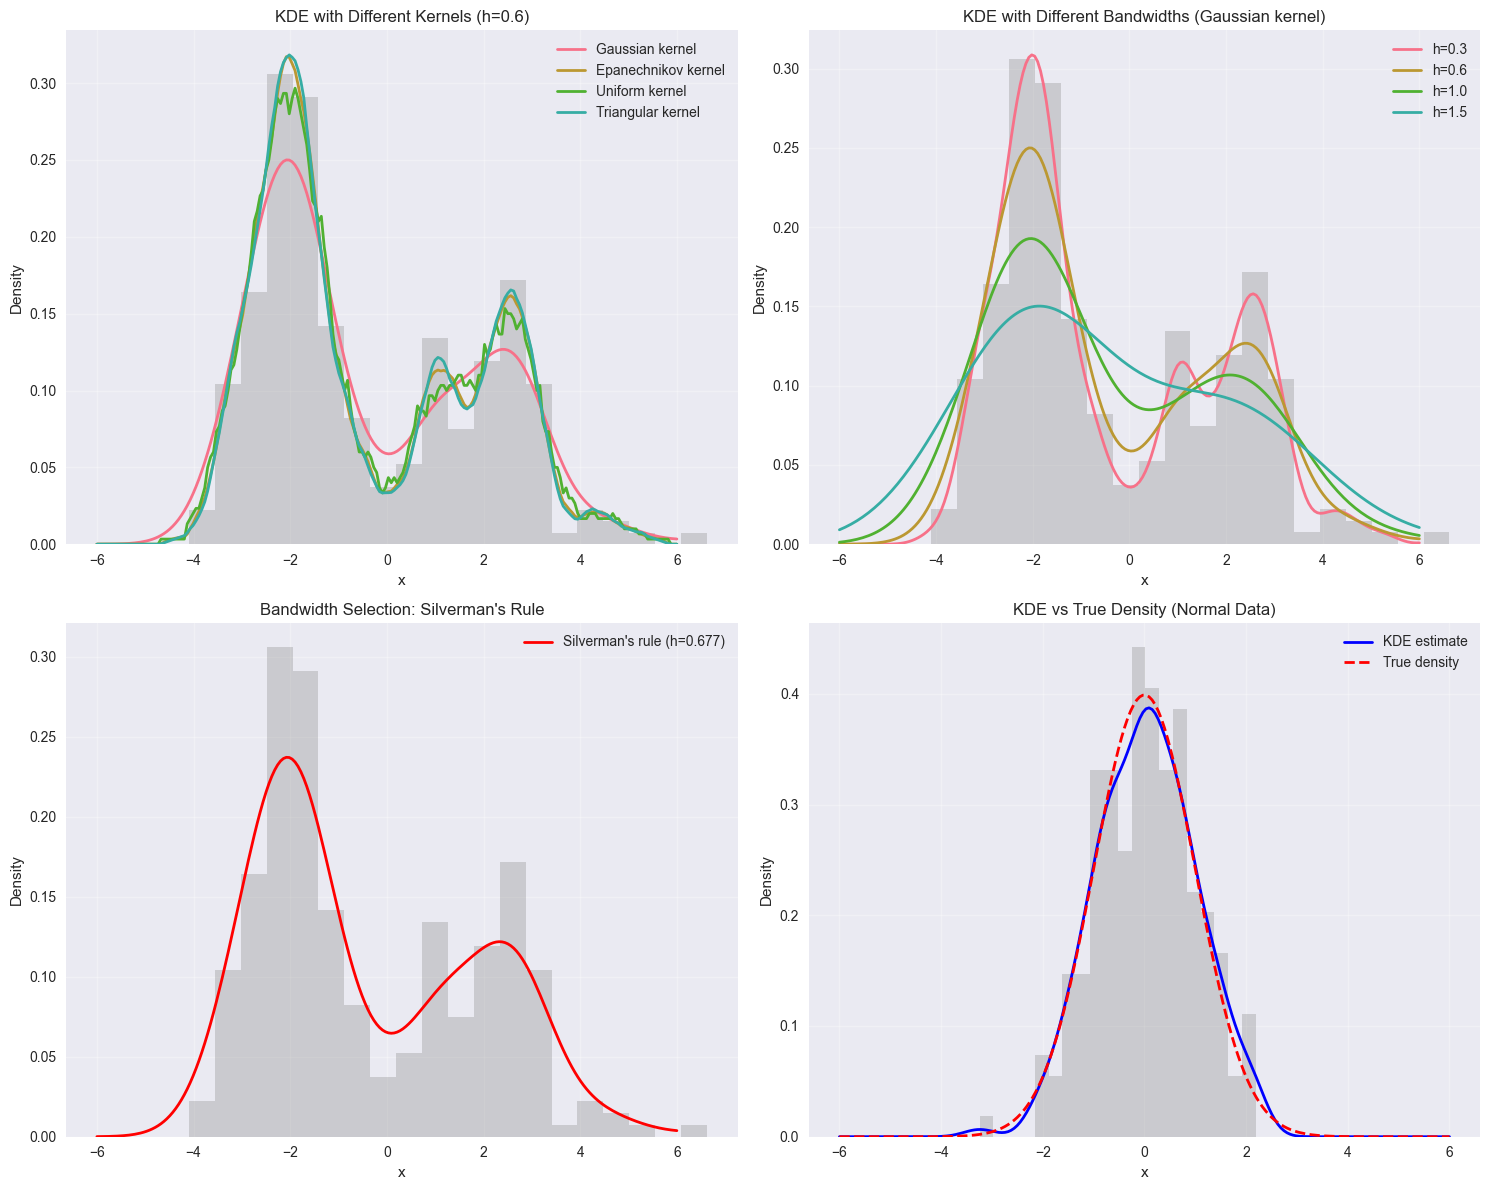

Silverman's bandwidth for mixed data: 0.6769
Silverman's bandwidth for normal data: 0.3054


In [ ]:
# Chapter 9: Nonparametric Statistics - Code Examples

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut
import warnings
warnings.filterwarnings('ignore')

print("Nonparametric Statistics Libraries Imported Successfully!")

# 9.1 Kernel Density Estimation

class KernelDensityEstimator:
    """Kernel Density Estimation from scratch"""

    def __init__(self, kernel='gaussian', bandwidth=1.0):
        self.kernel = kernel
        self.bandwidth = bandwidth
        self.data = None

    def _gaussian_kernel(self, u):
        """Gaussian kernel function"""
        return (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

    def _epanechnikov_kernel(self, u):
        """Epanechnikov kernel function"""
        return np.where(np.abs(u) <= 1, 0.75 * (1 - u**2), 0)

    def _uniform_kernel(self, u):
        """Uniform kernel function"""
        return np.where(np.abs(u) <= 1, 0.5, 0)

    def _triangular_kernel(self, u):
        """Triangular kernel function"""
        return np.where(np.abs(u) <= 1, 1 - np.abs(u), 0)

    def _kernel_function(self, u):
        """Select kernel function"""
        if self.kernel == 'gaussian':
            return self._gaussian_kernel(u)
        elif self.kernel == 'epanechnikov':
            return self._epanechnikov_kernel(u)
        elif self.kernel == 'uniform':
            return self._uniform_kernel(u)
        elif self.kernel == 'triangular':
            return self._triangular_kernel(u)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel}")

    def fit(self, data):
        """Fit the KDE to data"""
        self.data = np.array(data)
        return self

    def evaluate(self, x):
        """Evaluate density at points x"""
        x = np.array(x)
        n = len(self.data)
        h = self.bandwidth

        if x.ndim == 0:  # Single point
            density = (1.0 / (n * h)) * np.sum(self._kernel_function((x - self.data) / h))
        else:  # Array of points
            density = np.zeros_like(x)
            for i, xi in enumerate(x):
                density[i] = (1.0 / (n * h)) * np.sum(self._kernel_function((xi - self.data) / h))

        return density

    def silverman_bandwidth(self):
        """Silverman's rule of thumb for bandwidth selection"""
        n = len(self.data)
        sigma = np.std(self.data)
        iqr = np.percentile(self.data, 75) - np.percentile(self.data, 25)
        A = min(sigma, iqr / 1.34)
        return 0.9 * A * n**(-1/5)

# Generate sample data for KDE
np.random.seed(42)

# Mixture of two normal distributions
n1, n2 = 150, 100
data1 = np.random.normal(-2, 0.8, n1)
data2 = np.random.normal(2, 1.2, n2)
mixed_data = np.concatenate([data1, data2])

# Single normal distribution for comparison
normal_data = np.random.normal(0, 1, 200)

# Fit KDE with different kernels and bandwidths
x_eval = np.linspace(-6, 6, 200)

kernels = ['gaussian', 'epanechnikov', 'uniform', 'triangular']
bandwidths = [0.3, 0.6, 1.0, 1.5]

# Plot KDE results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Different kernels (fixed bandwidth)
kde_fixed_bw = KernelDensityEstimator(bandwidth=0.6)
for i, kernel in enumerate(kernels):
    kde_fixed_bw.kernel = kernel
    kde_fixed_bw.fit(mixed_data)
    density = kde_fixed_bw.evaluate(x_eval)

    axes[0, 0].plot(x_eval, density, label=f'{kernel.capitalize()} kernel', linewidth=2)

axes[0, 0].hist(mixed_data, bins=20, density=True, alpha=0.3, color='gray')
axes[0, 0].set_title('KDE with Different Kernels (h=0.6)')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Different bandwidths (fixed kernel)
kde_fixed_kernel = KernelDensityEstimator(kernel='gaussian')
for i, bandwidth in enumerate(bandwidths):
    kde_fixed_kernel.bandwidth = bandwidth
    kde_fixed_kernel.fit(mixed_data)
    density = kde_fixed_kernel.evaluate(x_eval)

    axes[0, 1].plot(x_eval, density, label=f'h={bandwidth}', linewidth=2)

axes[0, 1].hist(mixed_data, bins=20, density=True, alpha=0.3, color='gray')
axes[0, 1].set_title('KDE with Different Bandwidths (Gaussian kernel)')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Silverman's rule
kde_silverman = KernelDensityEstimator(kernel='gaussian')
kde_silverman.fit(mixed_data)
h_silverman = kde_silverman.silverman_bandwidth()
kde_silverman.bandwidth = h_silverman
density_silverman = kde_silverman.evaluate(x_eval)

axes[1, 0].plot(x_eval, density_silverman, label=f"Silverman's rule (h={h_silverman:.3f})",
                linewidth=2, color='red')
axes[1, 0].hist(mixed_data, bins=20, density=True, alpha=0.3, color='gray')
axes[1, 0].set_title("Bandwidth Selection: Silverman's Rule")
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Comparison with true density (for normal data)
kde_normal = KernelDensityEstimator(kernel='gaussian')
kde_normal.fit(normal_data)
h_normal = kde_normal.silverman_bandwidth()
kde_normal.bandwidth = h_normal
density_normal = kde_normal.evaluate(x_eval)

# True density
true_density = stats.norm.pdf(x_eval, 0, 1)

axes[1, 1].plot(x_eval, density_normal, label='KDE estimate', linewidth=2, color='blue')
axes[1, 1].plot(x_eval, true_density, label='True density', linewidth=2, color='red', linestyle='--')
axes[1, 1].hist(normal_data, bins=20, density=True, alpha=0.3, color='gray')
axes[1, 1].set_title('KDE vs True Density (Normal Data)')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Silverman's bandwidth for mixed data: {h_silverman:.4f}")
print(f"Silverman's bandwidth for normal data: {h_normal:.4f}")

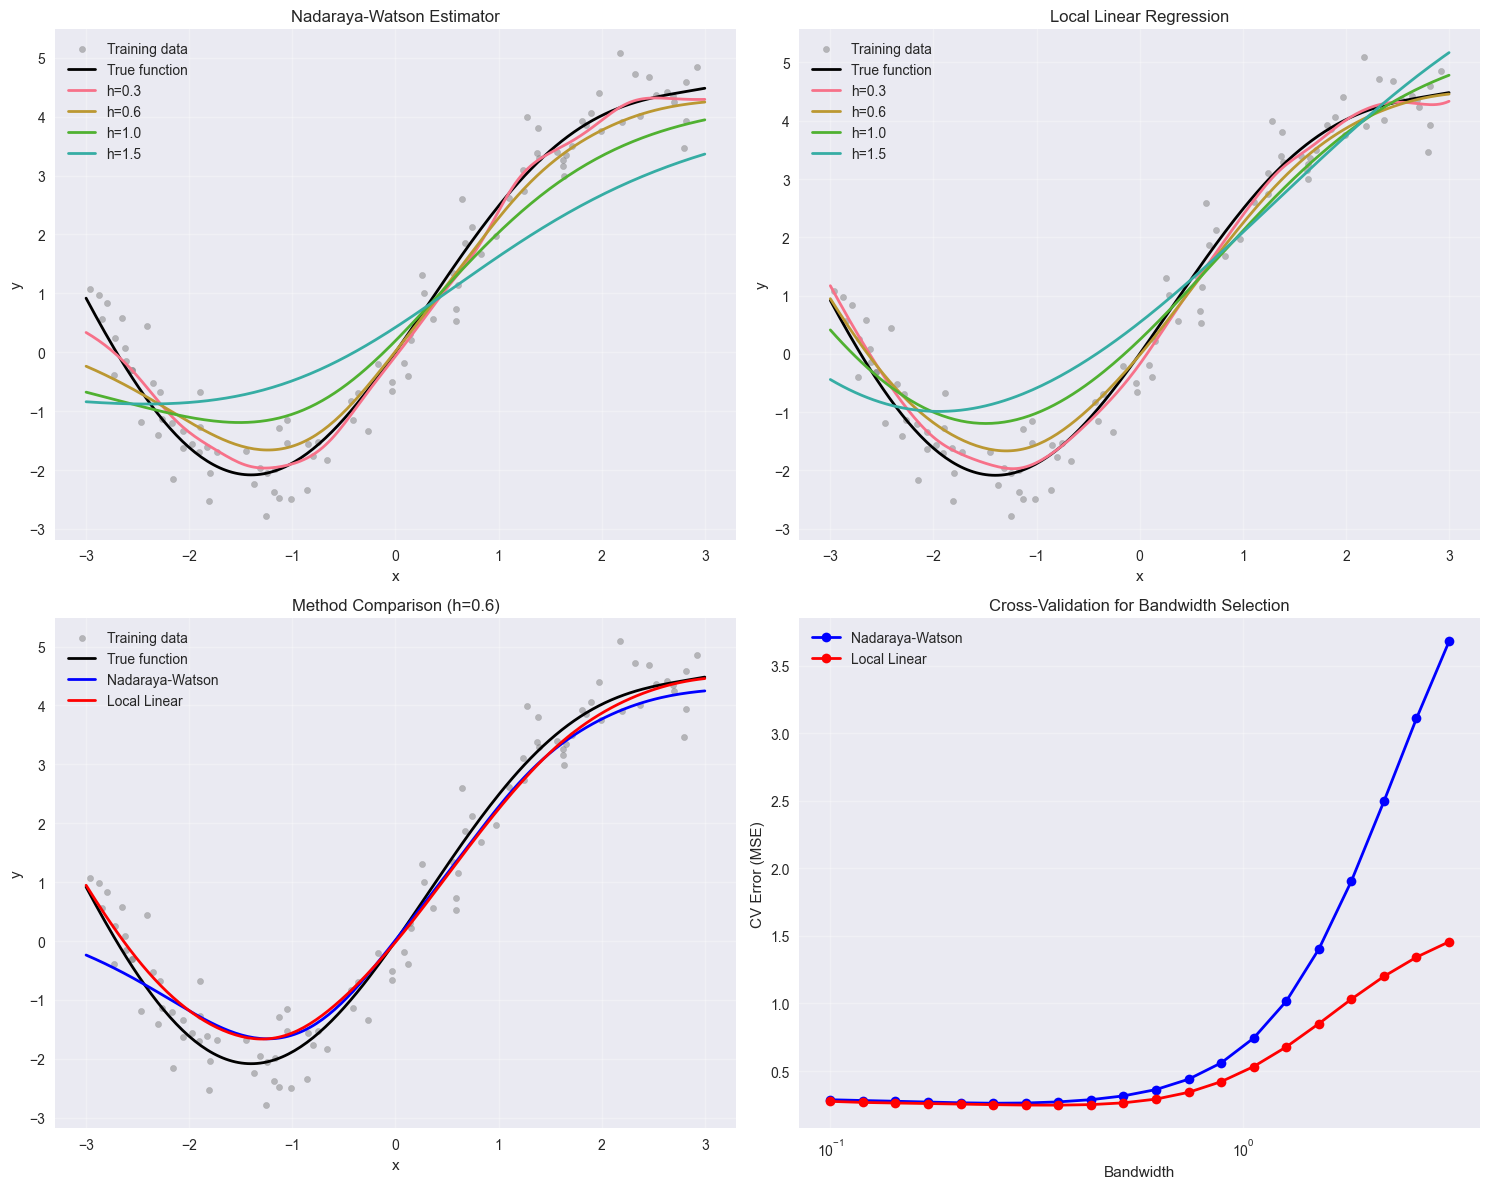

Optimal bandwidth for Nadaraya-Watson: 0.248
Optimal bandwidth for Local Linear: 0.357
Minimum CV error (NW): 0.2615
Minimum CV error (LL): 0.2472


In [ ]:
# 9.2 Nonparametric Regression

class NonparametricRegression:
    """Nonparametric regression methods"""

    def __init__(self, method='nadaraya_watson', kernel='gaussian', bandwidth=1.0):
        self.method = method
        self.kernel = kernel
        self.bandwidth = bandwidth
        self.X_train = None
        self.y_train = None

    def _gaussian_kernel(self, u):
        """Gaussian kernel"""
        return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

    def _epanechnikov_kernel(self, u):
        """Epanechnikov kernel"""
        return np.where(np.abs(u) <= 1, 0.75 * (1 - u**2), 0)

    def _kernel_function(self, u):
        """Select kernel function"""
        if self.kernel == 'gaussian':
            return self._gaussian_kernel(u)
        elif self.kernel == 'epanechnikov':
            return self._epanechnikov_kernel(u)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel}")

    def fit(self, X, y):
        """Fit the nonparametric regression"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        """Predict using fitted model"""
        X = np.array(X)
        if X.ndim == 0:
            X = X.reshape(1)

        predictions = np.zeros(len(X))

        for i, x in enumerate(X):
            if self.method == 'nadaraya_watson':
                predictions[i] = self._nadaraya_watson_predict(x)
            elif self.method == 'local_linear':
                predictions[i] = self._local_linear_predict(x)
            else:
                raise ValueError(f"Unknown method: {self.method}")

        return predictions

    def _nadaraya_watson_predict(self, x):
        """Nadaraya-Watson estimator"""
        weights = self._kernel_function((x - self.X_train) / self.bandwidth)

        if np.sum(weights) == 0:
            return np.mean(self.y_train)

        return np.sum(weights * self.y_train) / np.sum(weights)

    def _local_linear_predict(self, x):
        """Local linear regression"""
        weights = self._kernel_function((x - self.X_train) / self.bandwidth)

        if np.sum(weights) == 0:
            return np.mean(self.y_train)

        # Weighted least squares
        W = np.diag(weights)
        X_design = np.column_stack([np.ones(len(self.X_train)), self.X_train - x])

        try:
            coeffs = np.linalg.inv(X_design.T @ W @ X_design) @ X_design.T @ W @ self.y_train
            return coeffs[0]  # Return intercept (prediction at x)
        except np.linalg.LinAlgError:
            return self._nadaraya_watson_predict(x)

# Generate sample data for regression
np.random.seed(42)
n = 100

def true_function(x):
    """True regression function"""
    return 0.5 * x + 2 * np.sin(x) + 0.3 * x**2

X_train = np.random.uniform(-3, 3, n)
y_train = true_function(X_train) + np.random.normal(0, 0.5, n)

X_test = np.linspace(-3, 3, 200)
y_true = true_function(X_test)

# Fit different nonparametric regression models
bandwidths = [0.3, 0.6, 1.0, 1.5]
methods = ['nadaraya_watson', 'local_linear']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Nadaraya-Watson with different bandwidths
for i, h in enumerate(bandwidths):
    nw_reg = NonparametricRegression(method='nadaraya_watson', bandwidth=h)
    nw_reg.fit(X_train, y_train)
    y_pred = nw_reg.predict(X_test)

    if i == 0:
        axes[0, 0].scatter(X_train, y_train, alpha=0.5, color='gray', s=20, label='Training data')
        axes[0, 0].plot(X_test, y_true, 'k-', linewidth=2, label='True function')

    axes[0, 0].plot(X_test, y_pred, label=f'h={h}', linewidth=2)

axes[0, 0].set_title('Nadaraya-Watson Estimator')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Local linear with different bandwidths
for i, h in enumerate(bandwidths):
    ll_reg = NonparametricRegression(method='local_linear', bandwidth=h)
    ll_reg.fit(X_train, y_train)
    y_pred = ll_reg.predict(X_test)

    if i == 0:
        axes[0, 1].scatter(X_train, y_train, alpha=0.5, color='gray', s=20, label='Training data')
        axes[0, 1].plot(X_test, y_true, 'k-', linewidth=2, label='True function')

    axes[0, 1].plot(X_test, y_pred, label=f'h={h}', linewidth=2)

axes[0, 1].set_title('Local Linear Regression')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Compare methods with optimal bandwidth
h_opt = 0.6
nw_reg = NonparametricRegression(method='nadaraya_watson', bandwidth=h_opt)
ll_reg = NonparametricRegression(method='local_linear', bandwidth=h_opt)

nw_reg.fit(X_train, y_train)
ll_reg.fit(X_train, y_train)

y_pred_nw = nw_reg.predict(X_test)
y_pred_ll = ll_reg.predict(X_test)

axes[1, 0].scatter(X_train, y_train, alpha=0.5, color='gray', s=20, label='Training data')
axes[1, 0].plot(X_test, y_true, 'k-', linewidth=2, label='True function')
axes[1, 0].plot(X_test, y_pred_nw, 'b-', linewidth=2, label='Nadaraya-Watson')
axes[1, 0].plot(X_test, y_pred_ll, 'r-', linewidth=2, label='Local Linear')
axes[1, 0].set_title(f'Method Comparison (h={h_opt})')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Cross-validation for bandwidth selection
def cross_validate_bandwidth(X, y, bandwidths, method='nadaraya_watson', cv_folds=5):
    """Cross-validation for bandwidth selection"""
    n = len(X)
    fold_size = n // cv_folds
    cv_errors = []

    for h in bandwidths:
        fold_errors = []

        for fold in range(cv_folds):
            # Create train/validation split
            start_idx = fold * fold_size
            end_idx = (fold + 1) * fold_size if fold < cv_folds - 1 else n

            val_indices = list(range(start_idx, end_idx))
            train_indices = [i for i in range(n) if i not in val_indices]

            X_fold_train = X[train_indices]
            y_fold_train = y[train_indices]
            X_fold_val = X[val_indices]
            y_fold_val = y[val_indices]

            # Fit and predict
            reg = NonparametricRegression(method=method, bandwidth=h)
            reg.fit(X_fold_train, y_fold_train)
            y_pred = reg.predict(X_fold_val)

            # Compute MSE
            mse = np.mean((y_fold_val - y_pred)**2)
            fold_errors.append(mse)

        cv_errors.append(np.mean(fold_errors))

    return cv_errors

# Perform cross-validation
cv_bandwidths = np.logspace(-1, 0.5, 20)
cv_errors_nw = cross_validate_bandwidth(X_train, y_train, cv_bandwidths, 'nadaraya_watson')
cv_errors_ll = cross_validate_bandwidth(X_train, y_train, cv_bandwidths, 'local_linear')

axes[1, 1].semilogx(cv_bandwidths, cv_errors_nw, 'bo-', label='Nadaraya-Watson', linewidth=2)
axes[1, 1].semilogx(cv_bandwidths, cv_errors_ll, 'ro-', label='Local Linear', linewidth=2)
axes[1, 1].set_xlabel('Bandwidth')
axes[1, 1].set_ylabel('CV Error (MSE)')
axes[1, 1].set_title('Cross-Validation for Bandwidth Selection')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal bandwidths
best_h_nw = cv_bandwidths[np.argmin(cv_errors_nw)]
best_h_ll = cv_bandwidths[np.argmin(cv_errors_ll)]

print(f"Optimal bandwidth for Nadaraya-Watson: {best_h_nw:.3f}")
print(f"Optimal bandwidth for Local Linear: {best_h_ll:.3f}")
print(f"Minimum CV error (NW): {min(cv_errors_nw):.4f}")
print(f"Minimum CV error (LL): {min(cv_errors_ll):.4f}")

### 9.4 Bootstrap and Resampling Methods

#### 9.4.1 Bootstrap Principle

**Bootstrap Sample:**
From original sample $\mathbf{X} = (X_1, \ldots, X_n)$, draw $\mathbf{X}^* = (X_1^*, \ldots, X_n^*)$ by sampling with replacement.

**Bootstrap Statistic:**
$$T_n^* = t(\mathbf{X}^*)$$

**Bootstrap Distribution:**
The distribution of $T_n^*$ given $\mathbf{X}$ approximates the distribution of $T_n = t(\mathbf{X})$.

#### 9.4.2 Bootstrap Bias Correction

**Bias Estimation:**
$$\widehat{\text{Bias}} = E^*[T_n^*] - T_n = \bar{T}^* - T_n$$

Where $\bar{T}^* = \frac{1}{B} \sum_{b=1}^B T_{n,b}^*$.

**Bias-Corrected Estimator:**
$$T_n^{\text{BC}} = 2T_n - \bar{T}^*$$

#### 9.4.3 Bootstrap Confidence Intervals

**Percentile Method:**
$$CI_{\alpha} = [T_{n,(\alpha/2)}^*, T_{n,(1-\alpha/2)}^*]$$

**Basic Bootstrap (Reverse Percentile):**
$$CI_{\alpha} = [2T_n - T_{n,(1-\alpha/2)}^*, 2T_n - T_{n,(\alpha/2)}^*]$$

**Studentized Bootstrap:**
Compute $Z_b^* = \frac{T_{n,b}^* - T_n}{\hat{\text{SE}}_b^*}$ and use:
$$CI_{\alpha} = [T_n - \hat{\text{SE}} \cdot z_{(1-\alpha/2)}^*, T_n - \hat{\text{SE}} \cdot z_{(\alpha/2)}^*]$$

**BCₐ Method (Bias-Corrected and Accelerated):**
$$CI_{\alpha} = [T_{n,(\alpha_1)}^*, T_{n,(\alpha_2)}^*]$$

Where:
$$\alpha_1 = \Phi\left(\hat{z}_0 + \frac{\hat{z}_0 + z_{\alpha/2}}{1 - \hat{a}(\hat{z}_0 + z_{\alpha/2})}\right)$$
$$\alpha_2 = \Phi\left(\hat{z}_0 + \frac{\hat{z}_0 + z_{1-\alpha/2}}{1 - \hat{a}(\hat{z}_0 + z_{1-\alpha/2})}\right)$$

**Bias-Correction Constant:**
$$\hat{z}_0 = \Phi^{-1}\left(\frac{\#\{T_{n,b}^* < T_n\}}{B}\right)$$

**Acceleration Constant:**
$$\hat{a} = \frac{\sum_{i=1}^n (\bar{T}_{(\cdot)} - T_{(i)})^3}{6[\sum_{i=1}^n (\bar{T}_{(\cdot)} - T_{(i)})^2]^{3/2}}$$

Where $T_{(i)}$ is the jackknife estimate omitting the $i$-th observation.

#### 9.4.4 Jackknife Method

**Jackknife Statistic:**
$$T_{(i)} = t(\mathbf{X}_{(i)})$$

Where $\mathbf{X}_{(i)} = (X_1, \ldots, X_{i-1}, X_{i+1}, \ldots, X_n)$.

**Jackknife Bias Estimation:**
$$\widehat{\text{Bias}}_{\text{jack}} = (n-1)(\bar{T}_{(\cdot)} - T_n)$$

Where $\bar{T}_{(\cdot)} = \frac{1}{n} \sum_{i=1}^n T_{(i)}$.

**Jackknife Variance Estimation:**
$$\widehat{\text{Var}}_{\text{jack}} = \frac{n-1}{n} \sum_{i=1}^n (T_{(i)} - \bar{T}_{(\cdot)})^2$$

#### 9.4.5 Cross-Validation

**k-Fold Cross-Validation:**
1. Partition data into k folds
2. For each fold $i$, train on remaining $k-1$ folds
3. Test on fold $i$
4. Average performance across all folds

**CV Error:**
$$\text{CV}(k) = \frac{1}{k} \sum_{i=1}^k L(\mathcal{D}_i, \hat{f}^{(-i)})$$

**Leave-One-Out Cross-Validation (LOOCV):**
$$\text{CV}(n) = \frac{1}{n} \sum_{i=1}^n L((\mathbf{x}_i, y_i), \hat{f}^{(-i)})$$

**Generalized Cross-Validation (GCV):**
For linear smoothers with hat matrix $\mathbf{S}$:
$$\text{GCV}(\lambda) = \frac{1}{n} \sum_{i=1}^n \left(\frac{y_i - \hat{f}_\lambda(\mathbf{x}_i)}{1 - S_{ii}(\lambda)}\right)^2$$

### 9.5 Permutation Tests

#### 9.5.1 Permutation Test Principle

**Test Statistic:** $T = t(\mathbf{X}, \mathbf{Y})$

**Null Hypothesis:** $F_X = F_Y$ (exchangeability under $H_0$)

**Permutation Distribution:**
Under $H_0$, all $\binom{n_1 + n_2}{n_1}$ ways of dividing the combined sample are equally likely.

**p-value:**
$$p = \frac{1}{M} \sum_{m=1}^M \mathbf{1}_{T_m^* \geq T_{\text{obs}}}$$

Where $T_m^*$ is the test statistic for the $m$-th permutation.

#### 9.5.2 Two-Sample Permutation Test

**Algorithm:**
1. Compute observed test statistic $T_{\text{obs}}$
2. For $m = 1, \ldots, M$:
   - Randomly permute the combined sample
   - Assign first $n_1$ to group 1, remaining to group 2
   - Compute $T_m^*$
3. Calculate p-value as proportion of $T_m^* \geq T_{\text{obs}}$

#### 9.5.3 Permutation Test for Correlation

**Test Statistic:**
$$r = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n (X_i - \bar{X})^2 \sum_{i=1}^n (Y_i - \bar{Y})^2}}$$

**Permutation Procedure:**
1. Keep $\{X_i\}$ fixed, permute $\{Y_i\}$
2. Compute correlation for each permutation
3. Compare with observed correlation

### 9.6 Goodness-of-Fit Tests

#### 9.6.1 Kolmogorov-Smirnov Test

**One-Sample Test:**
$$D_n = \sup_x |F_n(x) - F_0(x)|$$

Where $F_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbf{1}_{X_i \leq x}$ is the empirical distribution function.

**Distribution under $H_0$:**
$$P(D_n > d) = 2 \sum_{j=1}^{\infty} (-1)^{j-1} e^{-2j^2 n d^2}$$

**Two-Sample Test:**
$$D_{n,m} = \sup_x |F_n(x) - G_m(x)|$$

**Large Sample Approximation:**
$$D_{n,m} \stackrel{d}{\to} \sup_t |B(F(t))|$$

Where $B$ is Brownian bridge.

#### 9.6.2 Anderson-Darling Test

**Test Statistic:**
$$A^2 = n \int_{-\infty}^{\infty} \frac{[F_n(x) - F_0(x)]^2}{F_0(x)(1-F_0(x))} dF_0(x)$$

**Sample Version:**
$$A^2 = -n - \frac{1}{n} \sum_{i=1}^n (2i-1)[\log F_0(X_{(i)}) + \log(1-F_0(X_{(n+1-i)}))]$$

**Critical Values depend on the null distribution $F_0$.**

#### 9.6.3 Cramér-von Mises Test

**Test Statistic:**
$$W^2 = n \int_{-\infty}^{\infty} [F_n(x) - F_0(x)]^2 dF_0(x)$$

**Sample Version:**
$$W^2 = \frac{1}{12n} + \sum_{i=1}^n \left[F_0(X_{(i)}) - \frac{2i-1}{2n}\right]^2$$

**Distribution under $H_0$:**
$$W^2 \stackrel{d}{\to} \sum_{j=1}^{\infty} \frac{Z_j^2}{j^2 \pi^2}$$

Where $Z_j$ are independent standard normal random variables.

---

## Chapter 10: Advanced Statistical Computing

### 10.1 Monte Carlo Methods

#### 10.1.1 Basic Monte Carlo Integration

**Problem:** Estimate $\theta = \int_{\mathcal{X}} h(\mathbf{x}) f(\mathbf{x}) d\mathbf{x}$

**Monte Carlo Estimator:**
$$\hat{\theta}_n = \frac{1}{n} \sum_{i=1}^n h(\mathbf{X}_i)$$

Where $\mathbf{X}_1, \ldots, \mathbf{X}_n \stackrel{\text{iid}}{\sim} f(\mathbf{x})$.

**Properties:**
- $E[\hat{\theta}_n] = \theta$ (unbiased)
- $\text{Var}(\hat{\theta}_n) = \frac{\sigma^2}{n}$ where $\sigma^2 = \text{Var}(h(\mathbf{X}))$
- $\hat{\theta}_n \stackrel{a.s.}{\to} \theta$ by Strong LLN

**Standard Error:**
$$\text{SE}(\hat{\theta}_n) = \sqrt{\frac{\hat{\sigma}^2}{n}}$$

Where $\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^n [h(\mathbf{X}_i) - \hat{\theta}_n]^2$.

#### 10.1.2 Importance Sampling

**Motivation:** When direct sampling from $f$ is difficult or $h(\mathbf{x})f(\mathbf{x})$ has most mass in small region.

**Method:** Sample from proposal density $g(\mathbf{x})$ and use:
$$\hat{\theta}_n^{\text{IS}} = \frac{1}{n} \sum_{i=1}^n h(\mathbf{X}_i) w(\mathbf{X}_i)$$

Where $w(\mathbf{x}) = \frac{f(\mathbf{x})}{g(\mathbf{x})}$ is the importance weight.

**Self-Normalized Importance Sampling:**
$$\hat{\theta}_n^{\text{SNIS}} = \frac{\sum_{i=1}^n h(\mathbf{X}_i) w(\mathbf{X}_i)}{\sum_{i=1}^n w(\mathbf{X}_i)}$$

**Effective Sample Size:**
$$\text{ESS} = \frac{(\sum_{i=1}^n w_i)^2}{\sum_{i=1}^n w_i^2}$$

#### 10.1.3 Control Variates

**Method:** Use correlated variable $c(\mathbf{X})$ with known expectation $\mu_c$.

**Control Variate Estimator:**
$$\hat{\theta}_n^{\text{CV}} = \frac{1}{n} \sum_{i=1}^n [h(\mathbf{X}_i) - \beta(c(\mathbf{X}_i) - \mu_c)]$$

**Optimal Control Coefficient:**
$$\beta^* = \frac{\text{Cov}(h(\mathbf{X}), c(\mathbf{X}))}{\text{Var}(c(\mathbf{X}))}$$

**Variance Reduction:**
$$\text{Var}(\hat{\theta}_n^{\text{CV}}) = \text{Var}(\hat{\theta}_n)(1 - \rho^2)$$

Where $\rho = \text{Corr}(h(\mathbf{X}), c(\mathbf{X}))$.

### 10.2 Markov Chain Monte Carlo (MCMC)

#### 10.2.1 Markov Chain Theory

**Markov Chain:** $\{X_t\}_{t=0}^{\infty}$ with transition kernel $P(\mathbf{x}, A) = P(X_{t+1} \in A | X_t = \mathbf{x})$.

**Stationary Distribution:** $\pi$ satisfies:
$$\pi(A) = \int P(\mathbf{x}, A) \pi(d\mathbf{x})$$

**Detailed Balance:**
$$\pi(\mathbf{x}) P(\mathbf{x}, \mathbf{y}) = \pi(\mathbf{y}) P(\mathbf{y}, \mathbf{x})$$

**Ergodic Theorem:**
$$\frac{1}{n} \sum_{t=1}^n h(X_t) \stackrel{a.s.}{\to} \int h(\mathbf{x}) \pi(d\mathbf{x})$$

#### 10.2.2 Metropolis-Hastings Algorithm

**Algorithm:**
1. Initialize $X_0$
2. For $t = 0, 1, 2, \ldots$:
   - Propose $Y \sim q(\cdot | X_t)$
   - Compute acceptance probability:
     $$\alpha(X_t, Y) = \min\left\{1, \frac{\pi(Y) q(X_t | Y)}{\pi(X_t) q(Y | X_t)}\right\}$$
   - Set $X_{t+1} = Y$ with probability $\alpha(X_t, Y)$, otherwise $X_{t+1} = X_t$

**Special Cases:**

**Metropolis Algorithm:** $q(\mathbf{y} | \mathbf{x}) = q(\mathbf{x} | \mathbf{y})$ (symmetric proposal)
$$\alpha(\mathbf{x}, \mathbf{y}) = \min\left\{1, \frac{\pi(\mathbf{y})}{\pi(\mathbf{x})}\right\}$$

**Independence Sampler:** $q(\mathbf{y} | \mathbf{x}) = q(\mathbf{y})$
$$\alpha(\mathbf{x}, \mathbf{y}) = \min\left\{1, \frac{\pi(\mathbf{y}) q(\mathbf{x})}{\pi(\mathbf{x}) q(\mathbf{y})}\right\}$$

**Random Walk Metropolis:** $q(\mathbf{y} | \mathbf{x}) = g(\mathbf{y} - \mathbf{x})$

#### 10.2.3 Gibbs Sampling

**Full Conditional Distributions:**
$$\pi(x_i | \mathbf{x}_{-i}) = \frac{\pi(\mathbf{x})}{\int \pi(x_1, \ldots, x_{i-1}, u, x_{i+1}, \ldots, x_p) du}$$

**Algorithm:**
1. Initialize $\mathbf{X}^{(0)} = (X_1^{(0)}, \ldots, X_p^{(0)})$
2. For $t = 0, 1, 2, \ldots$:
   - Sample $X_1^{(t+1)} \sim \pi(x_1 | X_2^{(t)}, \ldots, X_p^{(t)})$
   - Sample $X_2^{(t+1)} \sim \pi(x_2 | X_1^{(t+1)}, X_3^{(t)}, \ldots, X_p^{(t)})$
   - $\vdots$
   - Sample $X_p^{(t+1)} \sim \pi(x_p | X_1^{(t+1)}, \ldots, X_{p-1}^{(t+1)})$

#### 10.2.4 Hamiltonian Monte Carlo (HMC)

**Augmented Target Distribution:**
$$\tilde{\pi}(\mathbf{q}, \mathbf{p}) = \pi(\mathbf{q}) \phi(\mathbf{p})$$

Where $\mathbf{q}$ are positions and $\mathbf{p}$ are momenta.

**Hamiltonian:**
$$H(\mathbf{q}, \mathbf{p}) = -\log \pi(\mathbf{q}) + \frac{1}{2} \mathbf{p}^T \mathbf{M}^{-1} \mathbf{p}$$

**Hamilton's Equations:**
$$\frac{d\mathbf{q}}{dt} = \mathbf{M}^{-1} \mathbf{p}, \quad \frac{d\mathbf{p}}{dt} = -\nabla_{\mathbf{q}} \log \pi(\mathbf{q})$$

**Leapfrog Integration:**
$$\mathbf{p}_{t+\epsilon/2} = \mathbf{p}_t + \frac{\epsilon}{2} \nabla_{\mathbf{q}} \log \pi(\mathbf{q}_t)$$
$$\mathbf{q}_{t+\epsilon} = \mathbf{q}_t + \epsilon \mathbf{M}^{-1} \mathbf{p}_{t+\epsilon/2}$$
$$\mathbf{p}_{t+\epsilon} = \mathbf{p}_{t+\epsilon/2} + \frac{\epsilon}{2} \nabla_{\mathbf{q}} \log \pi(\mathbf{q}_{t+\epsilon})$$

### 10.3 Variational Inference

#### 10.3.1 Variational Principle

**Evidence Lower Bound (ELBO):**
$$\log p(\mathbf{x}) = \mathcal{L}(q) + \text{KL}(q(\mathbf{z}) || p(\mathbf{z} | \mathbf{x}))$$

Where:
$$\mathcal{L}(q) = E_q[\log p(\mathbf{x}, \mathbf{z})] - E_q[\log q(\mathbf{z})]$$

**Variational Objective:**
$$\max_q \mathcal{L}(q) = \max_q \left[ E_q[\log p(\mathbf{x}, \mathbf{z})] + H(q) \right]$$

#### 10.3.2 Mean Field Variational Inference

**Mean Field Assumption:**
$$q(\mathbf{z}) = \prod_{i=1}^m q_i(z_i)$$

**Coordinate Ascent Updates:**
$$\log q_j^*(z_j) = E_{-j}[\log p(\mathbf{x}, \mathbf{z})] + \text{const}$$

Where $E_{-j}$ denotes expectation w.r.t. $\prod_{i \neq j} q_i(z_i)$.

#### 10.3.3 Automatic Differentiation Variational Inference (ADVI)

**Reparameterization:**
Transform constrained variables to real coordinate system:
$$\mathbf{z} = T(\boldsymbol{\zeta})$$

**Variational Family:**
$$q(\boldsymbol{\zeta}; \boldsymbol{\lambda}) = N(\boldsymbol{\zeta}; \boldsymbol{\mu}, \boldsymbol{\Sigma})$$

**ELBO in Transformed Space:**
$$\mathcal{L}(\boldsymbol{\lambda}) = E_{q(\boldsymbol{\zeta})}[\log p(\mathbf{x}, T(\boldsymbol{\zeta})) + \log |J_T(\boldsymbol{\zeta})|] + H(q(\boldsymbol{\zeta}))$$

### 10.4 Optimization Algorithms

#### 10.4.1 Gradient-Based Methods

**Gradient Descent:**
$$\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \alpha_t \nabla f(\boldsymbol{\theta}_t)$$

**Newton's Method:**
$$\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \alpha_t [\nabla^2 f(\boldsymbol{\theta}_t)]^{-1} \nabla f(\boldsymbol{\theta}_t)$$

**Quasi-Newton Methods (BFGS):**
$$\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \alpha_t \mathbf{H}_t^{-1} \nabla f(\boldsymbol{\theta}_t)$$

Where $\mathbf{H}_t$ approximates the Hessian and is updated using:
$$\mathbf{H}_{t+1} = \mathbf{H}_t + \frac{\mathbf{y}_t \mathbf{y}_t^T}{\mathbf{y}_t^T \mathbf{s}_t} - \frac{\mathbf{H}_t \mathbf{s}_t \mathbf{s}_t^T \mathbf{H}_t}{\mathbf{s}_t^T \mathbf{H}_t \mathbf{s}_t}$$

With $\mathbf{s}_t = \boldsymbol{\theta}_{t+1} - \boldsymbol{\theta}_t$ and $\mathbf{y}_t = \nabla f(\boldsymbol{\theta}_{t+1}) - \nabla f(\boldsymbol{\theta}_t)$.

#### 10.4.2 Expectation-Maximization (EM) Algorithm

**E-Step:** Compute the Q-function:
$$Q(\boldsymbol{\theta} | \boldsymbol{\theta}^{(t)}) = E_{\mathbf{Z} | \mathbf{X}, \boldsymbol{\theta}^{(t)}}[\log p(\mathbf{X}, \mathbf{Z} | \boldsymbol{\theta})]$$

**M-Step:** Update parameters:
$$\boldsymbol{\theta}^{(t+1)} = \arg\max_{\boldsymbol{\theta}} Q(\boldsymbol{\theta} | \boldsymbol{\theta}^{(t)})$$

**Convergence Properties:**
- $L(\boldsymbol{\theta}^{(t+1)}) \geq L(\boldsymbol{\theta}^{(t)})$ (likelihood increases)
- Converges to local maximum under regularity conditions

**Information Matrix:**
$$\mathbf{I}(\boldsymbol{\theta}) = -E\left[\frac{\partial^2 \log p(\mathbf{X} | \boldsymbol{\theta})}{\partial \boldsymbol{\theta} \partial \boldsymbol{\theta}^T}\right]$$

**Missing Information Principle:**
$$\mathbf{I}_{\text{complete}}(\boldsymbol{\theta}) = \mathbf{I}_{\text{observed}}(\boldsymbol{\theta}) + \mathbf{I}_{\text{missing}}(\boldsymbol{\theta})$$

Advanced Statistical Computing Libraries Imported Successfully!
Monte Carlo Integration Examples:
True integral value: 2.420071
Basic MC estimate: 1.494486 ± 0.001797
Importance sampling estimate: 3.541214 ± 0.006252
Control variates estimate: 2.386063 ± 0.000221
Variance reduction factor: 0.015


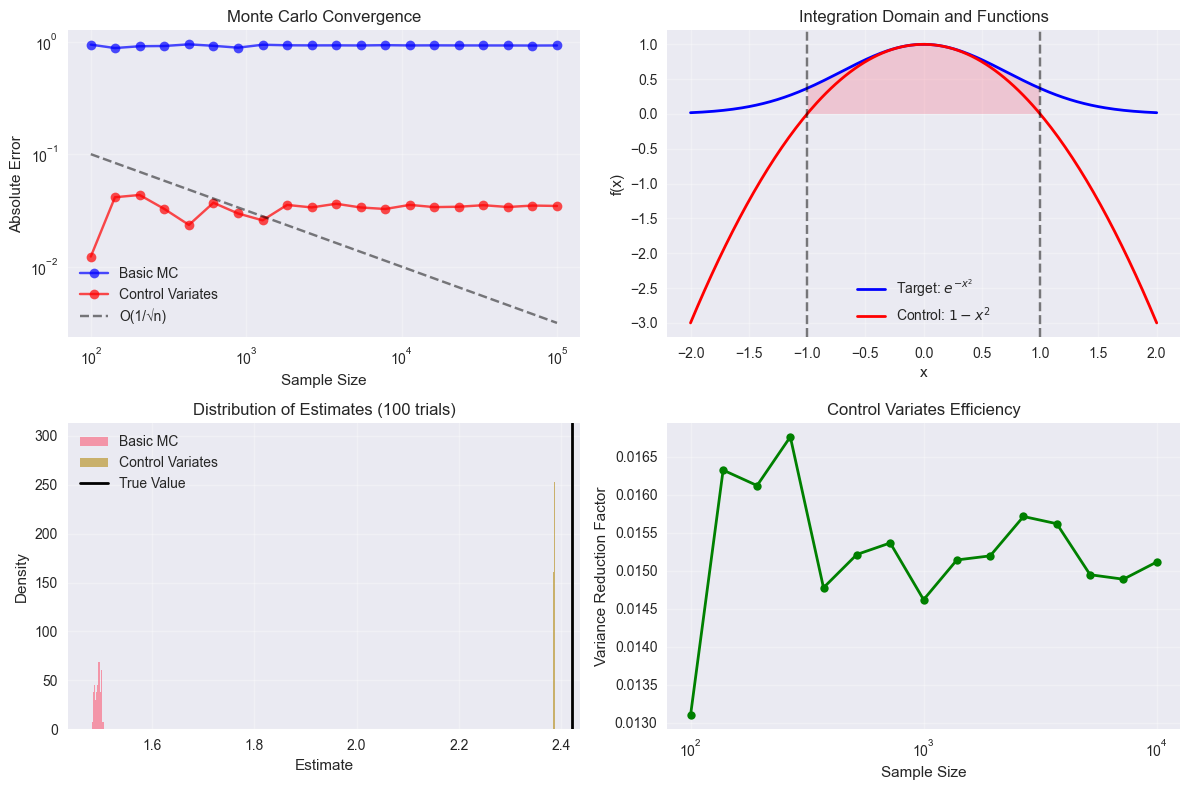


Variance reduction statistics:
Mean variance reduction: 0.015
Standard deviation of basic MC estimates: 0.005853
Standard deviation of CV estimates: 0.001713
Efficiency gain: 11.67x


In [ ]:
# Chapter 10: Advanced Statistical Computing - Code Examples

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

print("Advanced Statistical Computing Libraries Imported Successfully!")

# 10.1 Monte Carlo Integration

class MonteCarloIntegrator:
    """Monte Carlo integration methods"""

    def __init__(self, seed=42):
        self.seed = seed
        np.random.seed(seed)

    def basic_monte_carlo(self, func, n_samples=10000, domain=(-1, 1)):
        """Basic Monte Carlo integration"""
        a, b = domain
        # Generate uniform random samples
        x = np.random.uniform(a, b, n_samples)

        # Evaluate function
        y = func(x)

        # Estimate integral
        integral_estimate = (b - a) * np.mean(y)

        # Estimate standard error
        se = (b - a) * np.std(y) / np.sqrt(n_samples)

        return integral_estimate, se

    def importance_sampling(self, func, proposal_sampler, proposal_pdf, n_samples=10000):
        """Importance sampling integration"""
        # Generate samples from proposal distribution
        x = proposal_sampler(n_samples)

        # Compute importance weights
        weights = func(x) / proposal_pdf(x)

        # Handle numerical issues
        weights = weights[np.isfinite(weights)]

        # Estimate integral
        integral_estimate = np.mean(weights)

        # Estimate standard error
        se = np.std(weights) / np.sqrt(len(weights))

        return integral_estimate, se

    def control_variates(self, func, control_func, control_mean, n_samples=10000, domain=(-1, 1)):
        """Control variates method"""
        a, b = domain
        x = np.random.uniform(a, b, n_samples)

        # Evaluate both functions
        y = func(x)
        c = control_func(x)

        # Estimate optimal control coefficient
        beta = np.cov(y, c)[0, 1] / np.var(c)

        # Control variate estimator
        y_cv = y - beta * (c - control_mean)

        # Estimate integral
        integral_estimate = (b - a) * np.mean(y_cv)

        # Standard error
        se = (b - a) * np.std(y_cv) / np.sqrt(n_samples)

        # Variance reduction factor
        var_reduction = np.var(y_cv) / np.var(y)

        return integral_estimate, se, var_reduction

# Example functions for integration
def target_function(x):
    """Target function: e^(-x²)"""
    return np.exp(-x**2)

def control_function(x):
    """Control function: 1 - x²"""
    return 1 - x**2

# True value of integral of e^(-x²) from -1 to 1
true_integral = np.sqrt(np.pi) * (stats.norm.cdf(1) - stats.norm.cdf(-1)) * 2

print("Monte Carlo Integration Examples:")
print(f"True integral value: {true_integral:.6f}")

# Basic Monte Carlo
mc = MonteCarloIntegrator()
integral_basic, se_basic = mc.basic_monte_carlo(target_function, n_samples=50000)
print(f"Basic MC estimate: {integral_basic:.6f} ± {se_basic:.6f}")

# Importance sampling (using normal distribution as proposal)
def normal_sampler(n):
    return np.random.normal(0, 1, n)

def normal_pdf(x):
    return stats.norm.pdf(x, 0, 1)

def importance_func(x):
    """Integrand for importance sampling"""
    return target_function(x) * 2  # Adjust for domain [-1, 1]

integral_is, se_is = mc.importance_sampling(importance_func, normal_sampler, normal_pdf, n_samples=50000)
print(f"Importance sampling estimate: {integral_is:.6f} ± {se_is:.6f}")

# Control variates
control_mean = 2/3 * 2  # Integral of (1-x²) from -1 to 1
integral_cv, se_cv, var_red = mc.control_variates(target_function, control_function,
                                                  control_mean, n_samples=50000)
print(f"Control variates estimate: {integral_cv:.6f} ± {se_cv:.6f}")
print(f"Variance reduction factor: {var_red:.3f}")

# Convergence analysis
sample_sizes = np.logspace(2, 5, 20).astype(int)
errors_basic = []
errors_cv = []

for n in sample_sizes:
    # Basic MC
    est_basic, _ = mc.basic_monte_carlo(target_function, n_samples=n)
    errors_basic.append(abs(est_basic - true_integral))

    # Control variates
    est_cv, _, _ = mc.control_variates(target_function, control_function, control_mean, n_samples=n)
    errors_cv.append(abs(est_cv - true_integral))

# Plot convergence
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.loglog(sample_sizes, errors_basic, 'bo-', label='Basic MC', alpha=0.7)
plt.loglog(sample_sizes, errors_cv, 'ro-', label='Control Variates', alpha=0.7)
plt.loglog(sample_sizes, 1/np.sqrt(sample_sizes), 'k--', label='O(1/√n)', alpha=0.5)
plt.xlabel('Sample Size')
plt.ylabel('Absolute Error')
plt.title('Monte Carlo Convergence')
plt.legend()
plt.grid(True, alpha=0.3)

# Demonstrate different integration methods
plt.subplot(2, 2, 2)
x_plot = np.linspace(-2, 2, 200)
y_target = target_function(x_plot)
y_control = control_function(x_plot)

plt.plot(x_plot, y_target, 'b-', linewidth=2, label='Target: $e^{-x^2}$')
plt.plot(x_plot, y_control, 'r-', linewidth=2, label='Control: $1-x^2$')
plt.axvline(-1, color='k', linestyle='--', alpha=0.5)
plt.axvline(1, color='k', linestyle='--', alpha=0.5)
plt.fill_between(x_plot, 0, y_target, where=((x_plot >= -1) & (x_plot <= 1)), alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integration Domain and Functions')
plt.legend()
plt.grid(True, alpha=0.3)

# Sample efficiency comparison
plt.subplot(2, 2, 3)
n_trials = 100
estimates_basic = []
estimates_cv = []

for _ in range(n_trials):
    est_basic, _ = mc.basic_monte_carlo(target_function, n_samples=5000)
    est_cv, _, _ = mc.control_variates(target_function, control_function, control_mean, n_samples=5000)
    estimates_basic.append(est_basic)
    estimates_cv.append(est_cv)

plt.hist(estimates_basic, bins=20, alpha=0.7, label='Basic MC', density=True)
plt.hist(estimates_cv, bins=20, alpha=0.7, label='Control Variates', density=True)
plt.axvline(true_integral, color='k', linestyle='-', linewidth=2, label='True Value')
plt.xlabel('Estimate')
plt.ylabel('Density')
plt.title('Distribution of Estimates (100 trials)')
plt.legend()
plt.grid(True, alpha=0.3)

# Variance reduction visualization
plt.subplot(2, 2, 4)
n_samples_range = np.logspace(2, 4, 15).astype(int)
var_reductions = []

for n in n_samples_range:
    _, _, vr = mc.control_variates(target_function, control_function, control_mean, n_samples=n)
    var_reductions.append(vr)

plt.semilogx(n_samples_range, var_reductions, 'go-', linewidth=2, markersize=6)
plt.xlabel('Sample Size')
plt.ylabel('Variance Reduction Factor')
plt.title('Control Variates Efficiency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVariance reduction statistics:")
print(f"Mean variance reduction: {np.mean(var_reductions):.3f}")
print(f"Standard deviation of basic MC estimates: {np.std(estimates_basic):.6f}")
print(f"Standard deviation of CV estimates: {np.std(estimates_cv):.6f}")
print(f"Efficiency gain: {(np.std(estimates_basic)/np.std(estimates_cv))**2:.2f}x")

Running Metropolis-Hastings sampler...
Running HMC sampler...


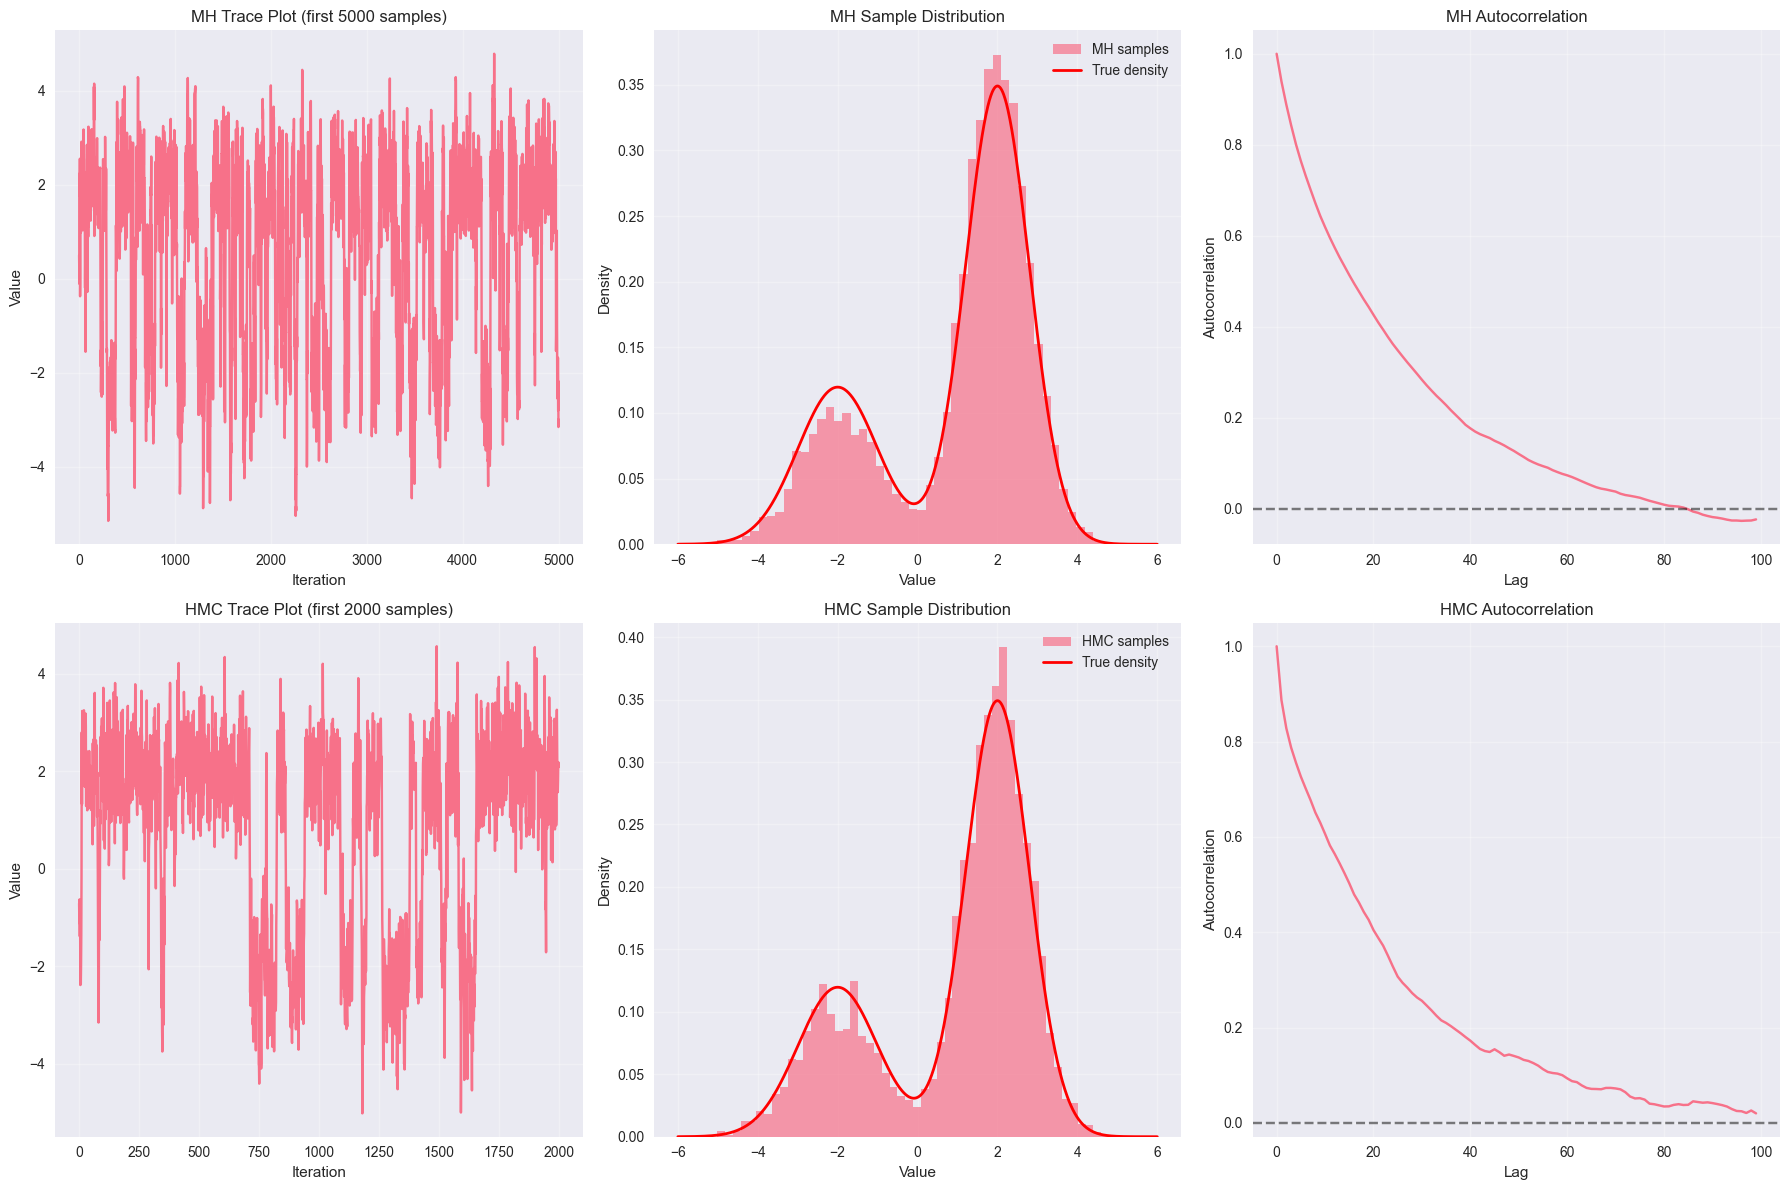


MCMC Diagnostics:
Metropolis-Hastings:
  effective_sample_size: 18000.0000
  autocorr_time: 1.0000
  acceptance_rate: 0.6925
  mean: 0.9887
  std: 1.9274

Hamiltonian Monte Carlo:
  effective_sample_size: 4500.0000
  autocorr_time: 1.0000
  acceptance_rate: 0.9990
  mean: 0.9214
  std: 1.9845

Efficiency comparison:
MH effective sample size per iteration: 0.900000
HMC effective sample size per iteration: 0.900000

True mixture moments:
Mean: 0.8000
Variance: 4.1080
Standard deviation: 2.0268


In [ ]:
# 10.2 Markov Chain Monte Carlo (MCMC)

class MCMCSampler:
    """MCMC sampling methods"""

    def __init__(self, seed=42):
        self.seed = seed
        np.random.seed(seed)
        self.samples = None
        self.acceptance_rate = None

    def metropolis_hastings(self, log_target, proposal_std, initial_value, n_samples=10000):
        """Metropolis-Hastings sampler"""
        samples = np.zeros(n_samples)
        current = initial_value
        n_accepted = 0

        for i in range(n_samples):
            # Propose new state
            proposal = current + np.random.normal(0, proposal_std)

            # Compute acceptance probability
            log_alpha = log_target(proposal) - log_target(current)
            alpha = min(1, np.exp(log_alpha))

            # Accept or reject
            if np.random.random() < alpha:
                current = proposal
                n_accepted += 1

            samples[i] = current

        self.samples = samples
        self.acceptance_rate = n_accepted / n_samples

        return samples

    def gibbs_sampler(self, conditional_samplers, initial_values, n_samples=10000):
        """Gibbs sampler for multivariate distributions"""
        n_params = len(initial_values)
        samples = np.zeros((n_samples, n_params))
        current = np.array(initial_values)

        for i in range(n_samples):
            for j in range(n_params):
                # Sample from conditional distribution
                current[j] = conditional_samplers[j](current)

            samples[i] = current.copy()

        self.samples = samples
        return samples

    def hmc_sampler(self, log_target, grad_log_target, step_size, n_steps, initial_value, n_samples=1000):
        """Hamiltonian Monte Carlo sampler"""
        samples = np.zeros(n_samples)
        current_q = initial_value
        n_accepted = 0

        for i in range(n_samples):
            # Sample momentum
            current_p = np.random.normal(0, 1)

            # Store initial values
            q, p = current_q, current_p

            # Leapfrog integration
            for _ in range(n_steps):
                p = p + step_size / 2 * grad_log_target(q)
                q = q + step_size * p
                p = p + step_size / 2 * grad_log_target(q)

            # Negate momentum for reversibility
            p = -p

            # Compute acceptance probability
            current_H = -log_target(current_q) + 0.5 * current_p**2
            proposed_H = -log_target(q) + 0.5 * p**2

            alpha = min(1, np.exp(current_H - proposed_H))

            # Accept or reject
            if np.random.random() < alpha:
                current_q = q
                n_accepted += 1

            samples[i] = current_q

        self.samples = samples
        self.acceptance_rate = n_accepted / n_samples

        return samples

    def diagnostics(self, burnin=1000):
        """Compute MCMC diagnostics"""
        if self.samples is None:
            raise ValueError("No samples available. Run a sampler first.")

        samples = self.samples[burnin:]

        # Effective sample size
        def autocorr_func(x, max_lag=None):
            if max_lag is None:
                max_lag = len(x) // 4

            n = len(x)
            x = x - np.mean(x)
            autocorr = np.correlate(x, x, mode='full')
            autocorr = autocorr[n-1:]
            autocorr = autocorr / autocorr[0]

            return autocorr[:max_lag]

        autocorr = autocorr_func(samples)

        # Find integrated autocorr time
        tau_int = 1 + 2 * np.sum(autocorr[1:autocorr.argmax()])
        eff_sample_size = len(samples) / tau_int

        return {
            'effective_sample_size': eff_sample_size,
            'autocorr_time': tau_int,
            'acceptance_rate': self.acceptance_rate,
            'mean': np.mean(samples),
            'std': np.std(samples)
        }

# Example: Sample from a mixture of normals
def log_mixture_normal(x, weights=[0.3, 0.7], means=[-2, 2], stds=[1, 0.8]):
    """Log density of mixture of normals"""
    densities = []
    for w, mu, sigma in zip(weights, means, stds):
        densities.append(w * stats.norm.pdf(x, mu, sigma))

    return np.log(sum(densities))

def grad_log_mixture_normal(x, weights=[0.3, 0.7], means=[-2, 2], stds=[1, 0.8]):
    """Gradient of log density"""
    weighted_grads = []
    densities = []

    for w, mu, sigma in zip(weights, means, stds):
        pdf = stats.norm.pdf(x, mu, sigma)
        densities.append(w * pdf)
        weighted_grads.append(w * pdf * (mu - x) / sigma**2)

    total_density = sum(densities)
    if total_density == 0:
        return 0

    return sum(weighted_grads) / total_density

# Run MCMC samplers
sampler = MCMCSampler()

# Metropolis-Hastings
print("Running Metropolis-Hastings sampler...")
mh_samples = sampler.metropolis_hastings(log_mixture_normal, proposal_std=1.0,
                                       initial_value=0, n_samples=20000)
mh_diagnostics = sampler.diagnostics(burnin=2000)

# HMC (for comparison)
print("Running HMC sampler...")
hmc_samples = sampler.hmc_sampler(log_mixture_normal, grad_log_mixture_normal,
                                step_size=0.1, n_steps=10, initial_value=0, n_samples=5000)
hmc_diagnostics = sampler.diagnostics(burnin=500)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# True density
x_true = np.linspace(-6, 6, 1000)
true_density = np.exp([log_mixture_normal(x) for x in x_true])

# Metropolis-Hastings results
axes[0, 0].plot(mh_samples[:5000])
axes[0, 0].set_title('MH Trace Plot (first 5000 samples)')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(mh_samples[2000:], bins=50, density=True, alpha=0.7, label='MH samples')
axes[0, 1].plot(x_true, true_density, 'r-', linewidth=2, label='True density')
axes[0, 1].set_title('MH Sample Distribution')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Autocorrelation
lags = np.arange(0, 100)
def compute_autocorr(x, max_lag=100):
    x = x - np.mean(x)
    autocorr = np.correlate(x, x, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    autocorr = autocorr / autocorr[0]
    return autocorr[:max_lag]

mh_autocorr = compute_autocorr(mh_samples[2000:])
axes[0, 2].plot(lags, mh_autocorr)
axes[0, 2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
axes[0, 2].set_title('MH Autocorrelation')
axes[0, 2].set_xlabel('Lag')
axes[0, 2].set_ylabel('Autocorrelation')
axes[0, 2].grid(True, alpha=0.3)

# HMC results
axes[1, 0].plot(hmc_samples[:2000])
axes[1, 0].set_title('HMC Trace Plot (first 2000 samples)')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(hmc_samples[500:], bins=50, density=True, alpha=0.7, label='HMC samples')
axes[1, 1].plot(x_true, true_density, 'r-', linewidth=2, label='True density')
axes[1, 1].set_title('HMC Sample Distribution')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

hmc_autocorr = compute_autocorr(hmc_samples[500:])
axes[1, 2].plot(lags[:len(hmc_autocorr)], hmc_autocorr)
axes[1, 2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
axes[1, 2].set_title('HMC Autocorrelation')
axes[1, 2].set_xlabel('Lag')
axes[1, 2].set_ylabel('Autocorrelation')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print diagnostics
print("\nMCMC Diagnostics:")
print("Metropolis-Hastings:")
for key, value in mh_diagnostics.items():
    print(f"  {key}: {value:.4f}")

print("\nHamiltonian Monte Carlo:")
for key, value in hmc_diagnostics.items():
    print(f"  {key}: {value:.4f}")

# Compare efficiency
print(f"\nEfficiency comparison:")
print(f"MH effective sample size per iteration: {mh_diagnostics['effective_sample_size']/20000:.6f}")
print(f"HMC effective sample size per iteration: {hmc_diagnostics['effective_sample_size']/5000:.6f}")

# True moments for comparison
true_mean = 0.3 * (-2) + 0.7 * 2  # Mixture mean
true_var = 0.3 * (1 + 4) + 0.7 * (0.64 + 4) - true_mean**2  # Mixture variance

print(f"\nTrue mixture moments:")
print(f"Mean: {true_mean:.4f}")
print(f"Variance: {true_var:.4f}")
print(f"Standard deviation: {np.sqrt(true_var):.4f}")

Fitting Gaussian Mixture Model using EM algorithm...
Converged after 26 iterations


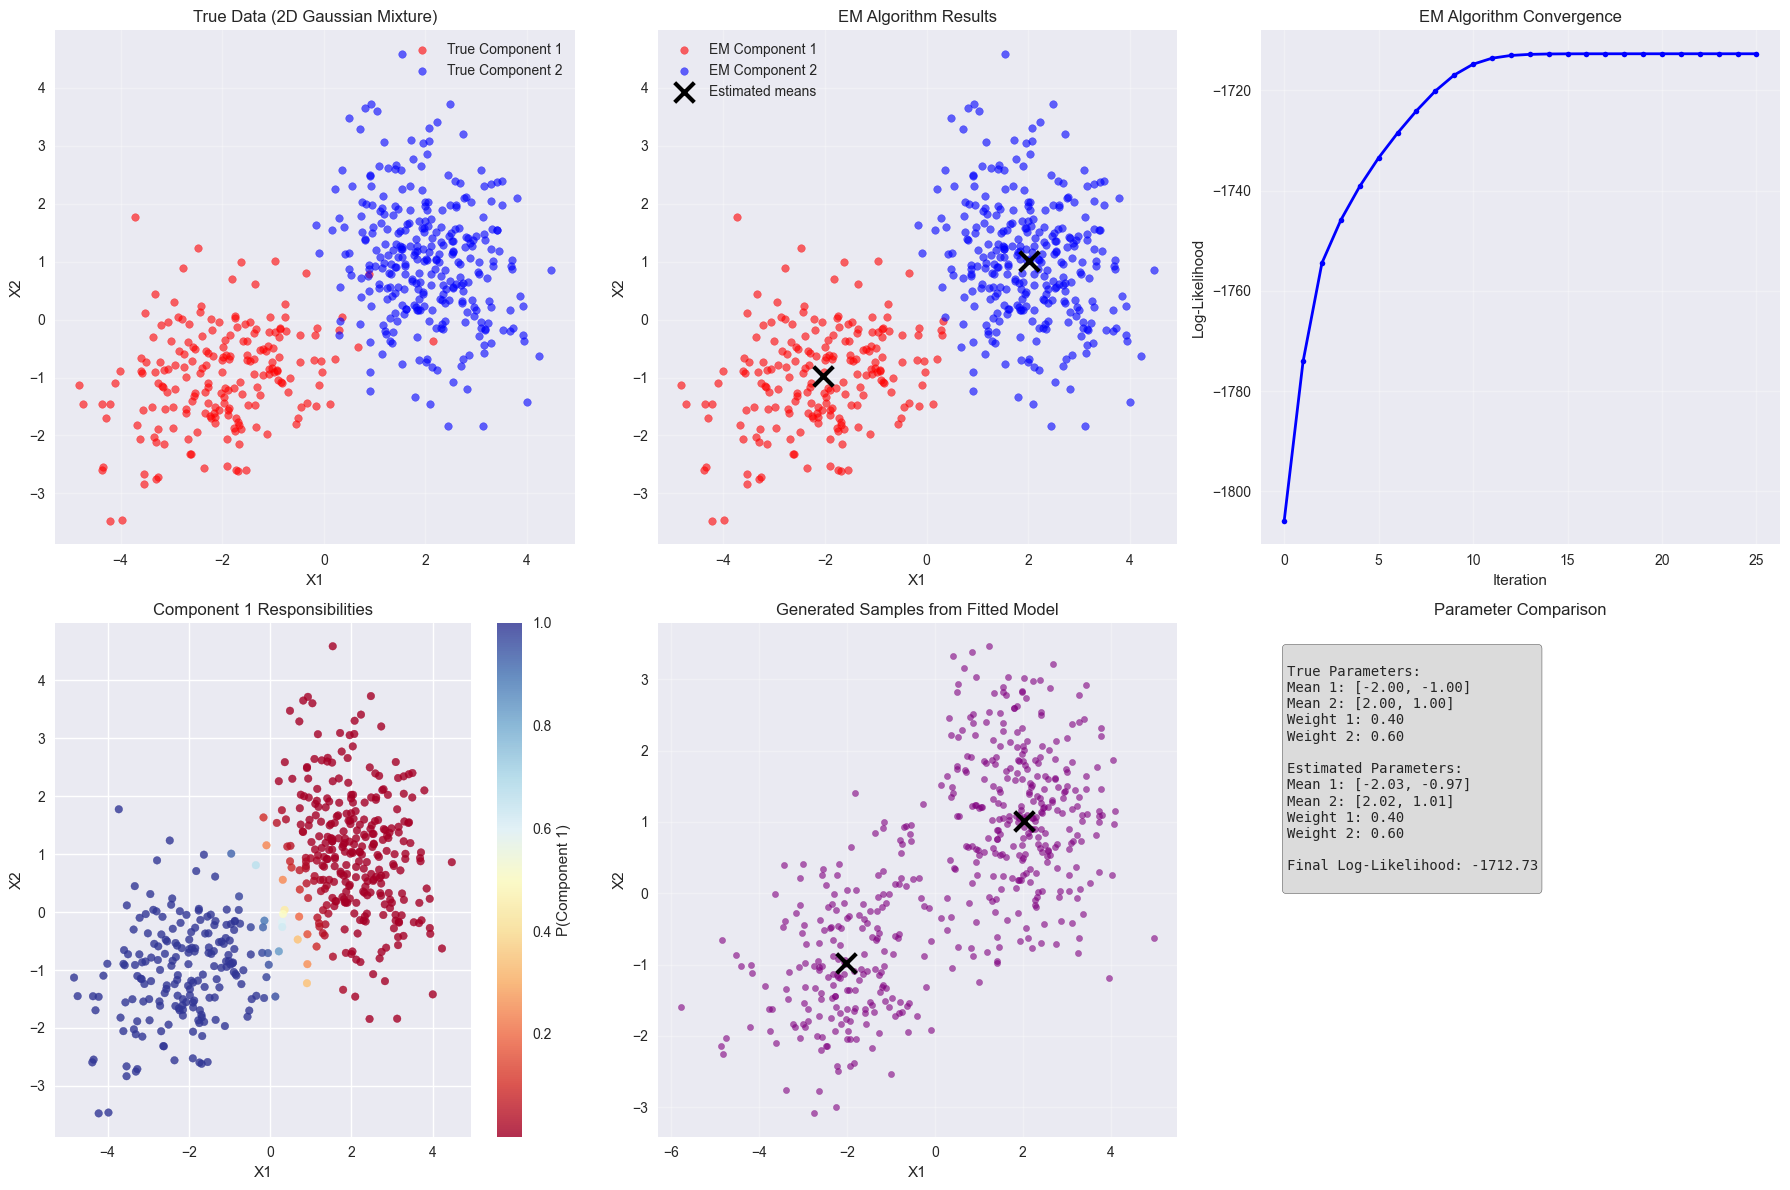


EM Algorithm Results:
Number of iterations: 26
Final log-likelihood: -1712.7289
Estimated weights: [0.39876863 0.60123137]
Estimated means:
[[-2.02937617 -0.97418452]
 [ 2.02353066  1.00939264]]
Estimated covariances:
Component 1:
[[1.30897099 0.28586431]
 [0.28586431 0.76269906]]
Component 2:
[[ 0.82470551 -0.18497264]
 [-0.18497264  1.12603071]]

Clustering accuracy: 0.988

Generated 500 new samples from the fitted mixture model.


In [ ]:
# 10.3 Expectation-Maximization (EM) Algorithm

class EMAlgorithm:
    """EM Algorithm for Gaussian Mixture Models"""

    def __init__(self, n_components=2, max_iter=100, tol=1e-6, seed=42):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.seed = seed
        np.random.seed(seed)

        # Parameters
        self.weights = None
        self.means = None
        self.covariances = None
        self.log_likelihood_history = []

    def _initialize_parameters(self, X):
        """Initialize parameters randomly"""
        n_samples, n_features = X.shape

        # Initialize mixing weights
        self.weights = np.ones(self.n_components) / self.n_components

        # Initialize means randomly
        self.means = np.random.randn(self.n_components, n_features)

        # Initialize covariances as identity matrices
        self.covariances = np.array([np.eye(n_features) for _ in range(self.n_components)])

    def _e_step(self, X):
        """E-step: Compute responsibilities"""
        n_samples = X.shape[0]
        responsibilities = np.zeros((n_samples, self.n_components))

        for k in range(self.n_components):
            # Compute multivariate normal densities
            diff = X - self.means[k]
            inv_cov = np.linalg.inv(self.covariances[k])
            det_cov = np.linalg.det(self.covariances[k])

            # Compute log densities (for numerical stability)
            log_densities = -0.5 * (
                np.sum(diff @ inv_cov * diff, axis=1) +
                X.shape[1] * np.log(2 * np.pi) +
                np.log(det_cov)
            )

            responsibilities[:, k] = self.weights[k] * np.exp(log_densities)

        # Normalize responsibilities
        total_resp = np.sum(responsibilities, axis=1, keepdims=True)
        total_resp[total_resp == 0] = 1e-8  # Avoid division by zero
        responsibilities /= total_resp

        return responsibilities

    def _m_step(self, X, responsibilities):
        """M-step: Update parameters"""
        n_samples, n_features = X.shape

        # Effective number of points assigned to each component
        N_k = np.sum(responsibilities, axis=0)

        # Update mixing weights
        self.weights = N_k / n_samples

        # Update means
        for k in range(self.n_components):
            self.means[k] = np.sum(responsibilities[:, k:k+1] * X, axis=0) / N_k[k]

        # Update covariances
        for k in range(self.n_components):
            diff = X - self.means[k]
            self.covariances[k] = (
                (responsibilities[:, k:k+1] * diff).T @ diff / N_k[k]
            )

    def _compute_log_likelihood(self, X):
        """Compute log-likelihood of the data"""
        log_likelihood = 0

        for i in range(X.shape[0]):
            likelihood_i = 0
            for k in range(self.n_components):
                diff = X[i] - self.means[k]
                inv_cov = np.linalg.inv(self.covariances[k])
                det_cov = np.linalg.det(self.covariances[k])

                density = (1.0 / np.sqrt((2 * np.pi) ** X.shape[1] * det_cov)) * \
                         np.exp(-0.5 * diff @ inv_cov @ diff)

                likelihood_i += self.weights[k] * density

            log_likelihood += np.log(likelihood_i + 1e-8)  # Avoid log(0)

        return log_likelihood

    def fit(self, X):
        """Fit the Gaussian Mixture Model using EM algorithm"""
        self._initialize_parameters(X)

        prev_log_likelihood = -np.inf

        for iteration in range(self.max_iter):
            # E-step
            responsibilities = self._e_step(X)

            # M-step
            self._m_step(X, responsibilities)

            # Compute log-likelihood
            log_likelihood = self._compute_log_likelihood(X)
            self.log_likelihood_history.append(log_likelihood)

            # Check for convergence
            if abs(log_likelihood - prev_log_likelihood) < self.tol:
                print(f"Converged after {iteration + 1} iterations")
                break

            prev_log_likelihood = log_likelihood

        return self

    def predict_proba(self, X):
        """Predict component probabilities"""
        return self._e_step(X)

    def predict(self, X):
        """Predict component assignments"""
        responsibilities = self.predict_proba(X)
        return np.argmax(responsibilities, axis=1)

    def sample(self, n_samples=100):
        """Generate samples from the fitted mixture"""
        samples = []

        # Sample component assignments
        component_assignments = np.random.choice(
            self.n_components, size=n_samples, p=self.weights
        )

        # Sample from each component
        for k in range(self.n_components):
            n_k = np.sum(component_assignments == k)
            if n_k > 0:
                samples_k = np.random.multivariate_normal(
                    self.means[k], self.covariances[k], n_k
                )
                samples.append(samples_k)

        return np.vstack(samples) if samples else np.array([])

# Generate sample data: mixture of 2D Gaussians
np.random.seed(42)
n_samples = 500

# Component 1
mean1 = np.array([-2, -1])
cov1 = np.array([[1.5, 0.3], [0.3, 0.8]])
X1 = np.random.multivariate_normal(mean1, cov1, 200)

# Component 2
mean2 = np.array([2, 1])
cov2 = np.array([[0.8, -0.2], [-0.2, 1.2]])
X2 = np.random.multivariate_normal(mean2, cov2, 300)

# Combine data
X_mixture = np.vstack([X1, X2])
true_labels = np.hstack([np.zeros(200), np.ones(300)])

# Fit EM algorithm
print("Fitting Gaussian Mixture Model using EM algorithm...")
em_gmm = EMAlgorithm(n_components=2, max_iter=100)
em_gmm.fit(X_mixture)

# Make predictions
predicted_labels = em_gmm.predict(X_mixture)
predicted_probs = em_gmm.predict_proba(X_mixture)

# Generate samples from fitted model
generated_samples = em_gmm.sample(n_samples=500)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original data
colors = ['red', 'blue']
for k in range(2):
    mask = true_labels == k
    axes[0, 0].scatter(X_mixture[mask, 0], X_mixture[mask, 1],
                      c=colors[k], alpha=0.6, s=30, label=f'True Component {k+1}')
axes[0, 0].set_title('True Data (2D Gaussian Mixture)')
axes[0, 0].set_xlabel('X1')
axes[0, 0].set_ylabel('X2')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# EM clustering results
for k in range(2):
    mask = predicted_labels == k
    axes[0, 1].scatter(X_mixture[mask, 0], X_mixture[mask, 1],
                      c=colors[k], alpha=0.6, s=30, label=f'EM Component {k+1}')

# Plot estimated means
axes[0, 1].scatter(em_gmm.means[:, 0], em_gmm.means[:, 1],
                  c='black', s=200, marker='x', linewidth=3, label='Estimated means')
axes[0, 1].set_title('EM Algorithm Results')
axes[0, 1].set_xlabel('X1')
axes[0, 1].set_ylabel('X2')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Log-likelihood convergence
axes[0, 2].plot(em_gmm.log_likelihood_history, 'bo-', linewidth=2, markersize=4)
axes[0, 2].set_title('EM Algorithm Convergence')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Log-Likelihood')
axes[0, 2].grid(True, alpha=0.3)

# Responsibility heatmap
responsibility_plot = axes[1, 0].scatter(X_mixture[:, 0], X_mixture[:, 1],
                                       c=predicted_probs[:, 0], cmap='RdYlBu',
                                       s=30, alpha=0.8)
plt.colorbar(responsibility_plot, ax=axes[1, 0], label='P(Component 1)')
axes[1, 0].set_title('Component 1 Responsibilities')
axes[1, 0].set_xlabel('X1')
axes[1, 0].set_ylabel('X2')

# Generated samples
axes[1, 1].scatter(generated_samples[:, 0], generated_samples[:, 1],
                  alpha=0.6, s=20, color='purple')
axes[1, 1].scatter(em_gmm.means[:, 0], em_gmm.means[:, 1],
                  c='black', s=200, marker='x', linewidth=3)
axes[1, 1].set_title('Generated Samples from Fitted Model')
axes[1, 1].set_xlabel('X1')
axes[1, 1].set_ylabel('X2')
axes[1, 1].grid(True, alpha=0.3)

# Parameter comparison
params_text = f"""
True Parameters:
Mean 1: [{mean1[0]:.2f}, {mean1[1]:.2f}]
Mean 2: [{mean2[0]:.2f}, {mean2[1]:.2f}]
Weight 1: {200/500:.2f}
Weight 2: {300/500:.2f}

Estimated Parameters:
Mean 1: [{em_gmm.means[0, 0]:.2f}, {em_gmm.means[0, 1]:.2f}]
Mean 2: [{em_gmm.means[1, 0]:.2f}, {em_gmm.means[1, 1]:.2f}]
Weight 1: {em_gmm.weights[0]:.2f}
Weight 2: {em_gmm.weights[1]:.2f}

Final Log-Likelihood: {em_gmm.log_likelihood_history[-1]:.2f}
"""

axes[1, 2].text(0.05, 0.95, params_text, transform=axes[1, 2].transAxes,
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
axes[1, 2].set_xlim(0, 1)
axes[1, 2].set_ylim(0, 1)
axes[1, 2].axis('off')
axes[1, 2].set_title('Parameter Comparison')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nEM Algorithm Results:")
print(f"Number of iterations: {len(em_gmm.log_likelihood_history)}")
print(f"Final log-likelihood: {em_gmm.log_likelihood_history[-1]:.4f}")
print(f"Estimated weights: {em_gmm.weights}")
print(f"Estimated means:\n{em_gmm.means}")
print(f"Estimated covariances:")
for k in range(2):
    print(f"Component {k+1}:\n{em_gmm.covariances[k]}")

# Compute clustering accuracy (considering label permutations)
from scipy.stats import mode

# Try both label assignments
accuracy1 = np.mean(predicted_labels == true_labels)
accuracy2 = np.mean(predicted_labels == 1 - true_labels)
best_accuracy = max(accuracy1, accuracy2)

print(f"\nClustering accuracy: {best_accuracy:.3f}")

print(f"\nGenerated {len(generated_samples)} new samples from the fitted mixture model.")